In [1]:
from DataParser import DataParser
import numpy as np
import scipy.sparse as sps
from sklearn.model_selection import KFold

from Data_manager.split_functions.split_train_validation_random_holdout import \
split_train_in_two_percentage_global_sample

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from SimpleEvaluator import evaluator
from Base.Evaluation.Evaluator import EvaluatorHoldout

In [2]:
from Base.NonPersonalizedRecommender import TopPop, Random
from Hybrid.HybridCombinationSearchCV import HybridCombinationSearchCV
from KNN.ItemKNNCBFRecommender import ItemKNNCBFRecommender
from KNN.UserKNNCFRecommender import UserKNNCFRecommender
from KNN.ItemKNNCFRecommender import ItemKNNCFRecommender
from KNN.SpecialItemKNNCBFRecommender import SpecialItemKNNCBFRecommender
from MatrixFactorization.IALSRecommender import IALSRecommender
from SLIM_BPR.Cython.SLIM_BPR_Cython import SLIM_BPR_Cython
from SLIM_ElasticNet.SLIMElasticNetRecommender import SLIMElasticNetRecommender
from SLIM_ElasticNet.SSLIM_ElasticNet import SSLIMElasticNet
from GraphBased.P3alphaRecommender import P3alphaRecommender
from GraphBased.RP3betaRecommender import RP3betaRecommender
from MatrixFactorization.Cython.MatrixFactorization_Cython import MatrixFactorization_BPR_Cython, MatrixFactorization_FunkSVD_Cython
from MatrixFactorization.PureSVDRecommender import PureSVDRecommender, PureSVDItemRecommender
from MatrixFactorization.NMFRecommender import NMFRecommender
from KNN.ItemKNN_CBF_CF import ItemKNN_CBF_CF

In [3]:
seed = 1666
parser = DataParser()

URM_all = parser.get_URM_all()
ICM_all = parser.get_ICM_all()

#URM_train, URM_test = split_train_in_two_percentage_global_sample(URM_all, train_percentage=0.85, seed=seed)

In [4]:
rp3b = (RP3betaRecommender, {'topK': 926, 'alpha': 0.4300109351916609, 'beta': 0.01807360750913967, 'normalize_similarity': False})
p3a = (P3alphaRecommender, {'topK': 575, 'alpha': 0.48009885897470206, 'normalize_similarity': False})
icf = (ItemKNNCFRecommender, {'topK': 1000, 'shrink': 1000, 'similarity': 'cosine', 'normalize': True, 'feature_weighting': 'TF-IDF'})
ucf = (UserKNNCFRecommender, {'topK': 163, 'shrink': 846, 'similarity': 'cosine', 'normalize': True, 'feature_weighting': 'TF-IDF'})
icb = (ItemKNNCBFRecommender, {'topK': 164, 'shrink': 8, 'similarity': 'jaccard', 'normalize': True})
sbpr = (SLIM_BPR_Cython, {'topK': 1000, 'epochs': 130, 'symmetric': False, 'sgd_mode': 'adam', 'lambda_i': 1e-05, 'lambda_j': 1e-05, 'learning_rate': 0.0001})
icfcb = (ItemKNN_CBF_CF, {'topK': 1000, 'shrink': 1000, 'similarity': 'asymmetric', 'normalize': True, 'asymmetric_alpha': 0.241892724784089, 'feature_weighting': 'TF-IDF', 'icm_weight': 1.0})
sslim = (SSLIMElasticNet, {'beta': 0.567288665094892, 'topK': 1000, 'l1_ratio': 1e-05, 'alpha': 0.001})
psvd = (PureSVDRecommender, {'num_factors': 350})
icbsup = (SpecialItemKNNCBFRecommender, {'topK': 1000, 'shrink': 1000, 'similarity': 'cosine', 'normalize': True, 'feature_weighting': 'BM25'})

In [5]:
combo_labels ={
    'combo1': 'icb, icf, p3a',
    'combo2': 'icb, icf, rp3b',
    'combo3': 'icb, icf, ucf',
    'combo4': 'icb, rp3b, p3a',
    'combo5': 'icb, ucf, p3a', 
    'combo6': 'icb, ucf, rp3b',
    'combo7': 'icb, icfcb, icf',
    'combo8': 'icb, icfcb, p3a',
    'combo9': 'icb, icfcb, rp3b',
    'combo10': 'icb, icfcb, ucf',
    'combo11': 'icb, icfcb, sbpr',
    'combo12': 'icbsup, icfcb, icf',
    'combo13': 'icbsup, icfcb, p3a',
    'combo14': 'icbsup, icfcb, rp3b',
    'combo15': 'icbsup, icfcb, ucf',
    'combo16': 'icbsup, icfcb, sbpr',
    'combo17': 'icbsup, icf, p3a',
    'combo18': 'icbsup, icf, rp3b',
    'combo19': 'icbsup, icf, ucf',
    'combo20': 'icbsup, icf, sbpr',
    'combo21': 'icbsup, p3a, rp3b',
    'combo22': 'icbsuo, ucf, p3a',
    'combo23': 'icbsup, ucf, rp3b',
    'combo24': 'icbsup, ucf, sbpr',
    'combo25': 'icbsup, sbpr, sslim',
    'combo26': 'icbsup, p3a, sslim',
    'combo27': 'icbsup, ucf, sslim',
    'combo28': 'icbsup, icf, sslim',
    'combo29': 'icbsup, icfcb, sslim',
    'combo30': 'icbsup, rp3b, sslim',
    'combo31': 'icb, sbpr, sslim',
    'combo32': 'icb, rp3b, sslim',
    'combo33': 'icb, p3a, sslim',
    'combo34': 'rp3b',
    'combo35': 'p3a',
    'combo36': 'icf',
    'combo37': 'ucf',
    'combo38': 'icb',
    'combo39': 'sbpr',
    'combo40': 'icfcb',
    'combo41': 'sslim',
    'combo42': 'psvd',
    'combo43': 'icbsup',
}

In [6]:
k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=seed)

URM_list = []
URM_test_list = []
evaluator_list = []

shape = URM_all.shape
indptr = URM_all.indptr
indices = URM_all.indices
data = URM_all.data

for train_index, test_index in kf.split(data):
    data_train = np.ones(data.shape)
    data_test = np.ones(data.shape)
    data_train[test_index] = 0
    data_test[train_index] = 0
    kf_train = sps.csr_matrix((data_train, indices, indptr), shape=shape).copy()
    kf_test = sps.csr_matrix((data_test, indices, indptr), shape=shape).copy()
    kf_train.eliminate_zeros()
    kf_test.eliminate_zeros()
    URM_list.append(kf_train)
    URM_test_list.append(kf_test)
    evaluator_list.append(EvaluatorHoldout(kf_test, cutoff_list=[10]))

In [13]:
list_rec = [([icb, icf, p3a], {'alpha': 0.44569420382449637, 'l1_ratio': 0.6168742754254437}),
            ([icb, icf, rp3b], {'alpha': 0.3033751201293658, 'l1_ratio': 0.7822655054333012}),
            ([icb, icf, ucf], {'alpha': 0.48973465405541533, 'l1_ratio': 0.3567553681370489}),
            ([icb, rp3b, p3a], {'alpha': 0.6171935935379741, 'l1_ratio': 0.4090970817953153}),
            ([icb, ucf, p3a], {'alpha': 0.6310254748569911, 'l1_ratio': 0.42318219644561506}),
            ([icb, ucf, rp3b], {'alpha': 0.5388201552532741, 'l1_ratio': 0.35597718538152645}),
            ([icb, icfcb, icf], {'alpha': 0.9457062373092435, 'l1_ratio': 0.08675668683308081}),
            ([icb, icfcb, p3a], {'alpha': 0.6904008032335807, 'l1_ratio': 0.23371348584724985}),
            ([icb, icfcb, rp3b], {'alpha': 0.8129428861277737, 'l1_ratio': 0.14069122456123387}),
            ([icb, icfcb, ucf], {'alpha': 0.8129428861277737, 'l1_ratio': 0.14069122456123387}),
            ([icb, icfcb, sbpr], {'alpha': 0.8991751672246813, 'l1_ratio': 0.11874637825106651}),
            ([icbsup, icfcb, icf], {'alpha': 0.8122492419947548, 'l1_ratio': 0.1448868067763832}),
            ([icbsup, icfcb, p3a], {'alpha': 0.6094679138906033, 'l1_ratio': 0.41715098578193194}),
            ([icbsup, icfcb, rp3b], {'alpha': 0.5369911284211629, 'l1_ratio': 0.45078644454282}),
            ([icbsup, icfcb, ucf], {'alpha': 0.7020854096807992, 'l1_ratio': 0.20749665943340362}),
            ([icbsup, icfcb, sbpr], {'alpha': 0.7949204415356104, 'l1_ratio': 0.2705694962114903}),
            ([icbsup, icf, p3a], {'alpha': 0.4973334775913678, 'l1_ratio': 0.6790274919219236}),
            ([icbsup, icf, rp3b], {'alpha': 0.45931982254221104, 'l1_ratio': 0.552400663560699}),
            ([icbsup, icf, ucf], {'alpha': 0.5934342246244017, 'l1_ratio': 0.38793882442583466}),
            ([icbsup, icf, sbpr], {'alpha': 0.8170119826252383, 'l1_ratio': 0.33586027250410305}),
            ([icbsup, p3a, rp3b], {'alpha': 0.4001101186128191, 'l1_ratio': 0.9989082076640393}),
            ([icbsup, ucf, p3a], {'alpha': 0.627349023025726, 'l1_ratio': 0.5343474311262314}),
            ([icbsup, ucf, rp3b], {'alpha': 0.5574853559798421, 'l1_ratio': 0.5221328226891215}),
            ([icbsup, ucf, sbpr], {'alpha': 0.9033873534648698, 'l1_ratio': 0.30678626017844307}),
            ([icbsup, sbpr, sslim], {'alpha': 0.6194113348305054, 'l1_ratio': 0.6156379091138154}),
            ([icbsup, p3a, sslim], {'alpha': 0.7989350513339316, 'l1_ratio': 0.4461703935735907}),
            ([icbsup, ucf, sslim], {'alpha': 0.7362031685050584, 'l1_ratio': 0.3394266517525301}),
            ([icbsup, icf, sslim], {'alpha': 0.6383024036201149, 'l1_ratio': 0.5132363657816151}),
            ([icbsup, icfcb, sslim], {'alpha': 0.8162670192627814, 'l1_ratio': 0.26730373918567046}),
            ([icbsup, rp3b, sslim], {'alpha': 0.7881737847053779, 'l1_ratio': 0.400772981812612}),
            ([icb, sbpr, sslim], {'alpha': 0.5238332406148302, 'l1_ratio': 0.5907932058981844}),
            ([icb, rp3b, sslim], {'alpha': 0.7861575718386372, 'l1_ratio': 0.34264216397962627}),
            ([icb, p3a, sslim], {'alpha': 0.6325200648079097, 'l1_ratio': 0.4685932097360991}),
            rp3b,
            p3a,
            icf,
            ucf,
            icb,
            sbpr,
            icfcb,
            sslim,
            psvd,
            icbsup,
]

In [14]:
num_combo = len(list_rec)

In [9]:
f_ranges = [
    (0,3),
    (3,5),
    (5,10),
    (10,17),
    (17,30),
    (30,100),
    (100,200),
    (200,-1)
]

MAP_combo_per_group = []
cutoff = 10

for f_range in f_ranges:
    
    
    combo_dict={}
    for k in range (num_combo):
        r = []
        for i in range (len(URM_list)):
            URM_test_group = parser.filter_URM_test_by_range(URM_list[i], URM_test_list[i], f_range)
            evaluator_test = EvaluatorHoldout(URM_test_group, cutoff_list=[cutoff])
            if not isinstance(list_rec[k][0], list):
                rec = list_rec[k][0]
                try:
                    rec = rec(URM_list[i], ICM_all, verbose = False)
                except:
                    rec = rec(URM_list[i], verbose=False)
                try:
                    rec.load_model(f'stored_recommenders/seed_{str(seed)}_hybrid_search/{rec.RECOMMENDER_NAME}/', f'{str(seed)}_fold-{str(i)}')
                    print(f"{rec.RECOMMENDER_NAME} loaded. [seed={seed}, fold={i}]")
                except:
                    print(f"Fitting {rec.RECOMMENDER_NAME} ... [seed={seed}, fold={i}]")
                    rec.fit(**list_rec[k][1])
                    print(f"done.")
                    rec.save_model(f'stored_recommenders/seed_{str(seed)}_hybrid_search/{rec.RECOMMENDER_NAME}/', f'{str(seed)}_fold-{str(i)}')
            else:
                rec = HybridCombinationSearchCV(URM_list[i], ICM_all, list_rec[k][0], seed = seed, fold = i)
                rec.fit(**list_rec[k][1])

            results, _ = evaluator_test.evaluateRecommender(rec)
            r.append(results[cutoff]["MAP"])
        combo_dict[k]=np.average(r)

    MAP_combo_per_group.append(combo_dict)

HybridCombinationSearchCV: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCV: URM Detected 2381 (9.17 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=0]
ItemKNNCFRecommender loaded. [seed=1666, fold=0]
P3alphaRecommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 1144 ( 100.00% ) in 1.04 sec. Users per second: 1096
HybridCombinationSearchCV: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCV: URM Detected 2439 (9.39 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=1]
ItemKNNCFRecommender loaded. [seed=1666, fold=1]
P3alphaRecommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 1069 ( 100.00% ) in 1.01 sec. Users per second: 1058
HybridCombinationSearchCV: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCV: URM Detected 2402 (9.25 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=2]
ItemKNNCFRecommender loaded. [seed=1666, fold=2]
P3alphaRecommender loaded. [seed=1666, fold=2]
EvaluatorH

EvaluatorHoldout: Processed 1132 ( 100.00% ) in 1.00 sec. Users per second: 1127
HybridCombinationSearchCV: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCV: URM Detected 2338 (9.00 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=3]
RP3betaRecommender loaded. [seed=1666, fold=3]
P3alphaRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 1091 ( 100.00% ) in 0.98 sec. Users per second: 1116
HybridCombinationSearchCV: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCV: URM Detected 2398 (9.23 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=4]
RP3betaRecommender loaded. [seed=1666, fold=4]
P3alphaRecommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 1059 ( 100.00% ) in 0.95 sec. Users per second: 1114
HybridCombinationSearchCV: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCV: URM Detected 2381 (9.17 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=0]
UserKNNCFRecommender loaded. 

ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=0]
P3alphaRecommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 1144 ( 100.00% ) in 1.12 sec. Users per second: 1019
HybridCombinationSearchCV: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCV: URM Detected 2439 (9.39 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=1]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=1]
P3alphaRecommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 1069 ( 100.00% ) in 1.01 sec. Users per second: 1058
HybridCombinationSearchCV: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCV: URM Detected 2402 (9.25 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=2]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=2]
P3alphaRecommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 1132 ( 100.00% ) in 1.06 sec. Users per second: 1071
HybridCombinationSearchCV: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCV: 

ItemKNNCBFRecommender loaded. [seed=1666, fold=3]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=3]
SLIM_BPR_Recommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 1091 ( 100.00% ) in 1.05 sec. Users per second: 1035
HybridCombinationSearchCV: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCV: URM Detected 2398 (9.23 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=4]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=4]
SLIM_BPR_Recommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 1059 ( 100.00% ) in 1.06 sec. Users per second: 999
HybridCombinationSearchCV: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCV: URM Detected 2381 (9.17 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=0]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=0]
ItemKNNCFRecommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 1144 ( 100.00% ) in 1.17 sec. Users per second: 980
HybridCombinationSearchCV: URM Detect

Special-ItemKNNCBFRec loaded. [seed=1666, fold=1]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=1]
UserKNNCFRecommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 1069 ( 100.00% ) in 1.05 sec. Users per second: 1015
HybridCombinationSearchCV: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCV: URM Detected 2402 (9.25 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=2]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=2]
UserKNNCFRecommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 1132 ( 100.00% ) in 1.10 sec. Users per second: 1026
HybridCombinationSearchCV: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCV: URM Detected 2338 (9.00 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=3]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=3]
UserKNNCFRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 1091 ( 100.00% ) in 1.06 sec. Users per second: 1029
HybridCombinationSearchCV: URM Dete

Special-ItemKNNCBFRec loaded. [seed=1666, fold=4]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=4]
RP3betaRecommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 1059 ( 100.00% ) in 1.04 sec. Users per second: 1020
HybridCombinationSearchCV: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCV: URM Detected 2381 (9.17 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=0]
ItemKNNCFRecommender loaded. [seed=1666, fold=0]
UserKNNCFRecommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 1144 ( 100.00% ) in 1.10 sec. Users per second: 1039
HybridCombinationSearchCV: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCV: URM Detected 2439 (9.39 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=1]
ItemKNNCFRecommender loaded. [seed=1666, fold=1]
UserKNNCFRecommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 1069 ( 100.00% ) in 1.03 sec. Users per second: 1037
HybridCombinationSearchCV: URM Detected 56 (0.70 

Special-ItemKNNCBFRec loaded. [seed=1666, fold=2]
UserKNNCFRecommender loaded. [seed=1666, fold=2]
P3alphaRecommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 1132 ( 100.00% ) in 1.09 sec. Users per second: 1040
HybridCombinationSearchCV: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCV: URM Detected 2338 (9.00 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=3]
UserKNNCFRecommender loaded. [seed=1666, fold=3]
P3alphaRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 1091 ( 100.00% ) in 1.07 sec. Users per second: 1020
HybridCombinationSearchCV: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCV: URM Detected 2398 (9.23 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=4]
UserKNNCFRecommender loaded. [seed=1666, fold=4]
P3alphaRecommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 1059 ( 100.00% ) in 1.01 sec. Users per second: 1052
HybridCombinationSearchCV: URM Detected 48 (0.60 %) cold us

Special-ItemKNNCBFRec loaded. [seed=1666, fold=0]
P3alphaRecommender loaded. [seed=1666, fold=0]
S-SLIMElasticNet loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 1144 ( 100.00% ) in 1.57 sec. Users per second: 728
HybridCombinationSearchCV: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCV: URM Detected 2439 (9.39 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=1]
P3alphaRecommender loaded. [seed=1666, fold=1]
S-SLIMElasticNet loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 1069 ( 100.00% ) in 1.44 sec. Users per second: 740
HybridCombinationSearchCV: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCV: URM Detected 2402 (9.25 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=2]
P3alphaRecommender loaded. [seed=1666, fold=2]
S-SLIMElasticNet loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 1132 ( 100.00% ) in 1.55 sec. Users per second: 730
HybridCombinationSearchCV: URM Detected 65 (0.82 %) cold users.
HybridComb

Special-ItemKNNCBFRec loaded. [seed=1666, fold=3]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=3]
S-SLIMElasticNet loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 1091 ( 100.00% ) in 1.51 sec. Users per second: 724
HybridCombinationSearchCV: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCV: URM Detected 2398 (9.23 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=4]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=4]
S-SLIMElasticNet loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 1059 ( 100.00% ) in 1.48 sec. Users per second: 717
HybridCombinationSearchCV: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCV: URM Detected 2381 (9.17 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=0]
RP3betaRecommender loaded. [seed=1666, fold=0]
S-SLIMElasticNet loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 1144 ( 100.00% ) in 1.58 sec. Users per second: 724
HybridCombinationSearchCV: URM Detected 68 (0.86 %) cold u

ItemKNNCBFRecommender loaded. [seed=1666, fold=1]
P3alphaRecommender loaded. [seed=1666, fold=1]
S-SLIMElasticNet loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 1069 ( 100.00% ) in 1.48 sec. Users per second: 725
HybridCombinationSearchCV: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCV: URM Detected 2402 (9.25 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=2]
P3alphaRecommender loaded. [seed=1666, fold=2]
S-SLIMElasticNet loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 1132 ( 100.00% ) in 1.51 sec. Users per second: 750
HybridCombinationSearchCV: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCV: URM Detected 2338 (9.00 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=3]
P3alphaRecommender loaded. [seed=1666, fold=3]
S-SLIMElasticNet loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 1091 ( 100.00% ) in 1.51 sec. Users per second: 722
HybridCombinationSearchCV: URM Detected 77 (0.97 %) cold users.
HybridComb

ItemKNNCBFRecommender loaded. [seed=1666, fold=4]
ItemKNNCFRecommender loaded. [seed=1666, fold=4]
UserKNNCFRecommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 1026 ( 100.00% ) in 1.04 sec. Users per second: 984
HybridCombinationSearchCV: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCV: URM Detected 2381 (9.17 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=0]
RP3betaRecommender loaded. [seed=1666, fold=0]
P3alphaRecommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 984 ( 100.00% ) in 0.97 sec. Users per second: 1018
HybridCombinationSearchCV: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCV: URM Detected 2439 (9.39 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=1]
RP3betaRecommender loaded. [seed=1666, fold=1]
P3alphaRecommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 1016 ( 100.00% ) in 1.00 sec. Users per second: 1014
HybridCombinationSearchCV: URM Detected 56 (0.70 %) cold users.

ItemKNNCBFRecommender loaded. [seed=1666, fold=2]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=2]
ItemKNNCFRecommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 999 ( 100.00% ) in 1.02 sec. Users per second: 984
HybridCombinationSearchCV: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCV: URM Detected 2338 (9.00 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=3]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=3]
ItemKNNCFRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 1016 ( 100.00% ) in 1.07 sec. Users per second: 950
HybridCombinationSearchCV: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCV: URM Detected 2398 (9.23 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=4]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=4]
ItemKNNCFRecommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 1026 ( 100.00% ) in 1.05 sec. Users per second: 973
HybridCombinationSearchCV: URM Detected

ItemKNNCBFRecommender loaded. [seed=1666, fold=0]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=0]
SLIM_BPR_Recommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 984 ( 100.00% ) in 1.02 sec. Users per second: 962
HybridCombinationSearchCV: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCV: URM Detected 2439 (9.39 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=1]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=1]
SLIM_BPR_Recommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 1016 ( 100.00% ) in 1.09 sec. Users per second: 936
HybridCombinationSearchCV: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCV: URM Detected 2402 (9.25 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=2]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=2]
SLIM_BPR_Recommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 999 ( 100.00% ) in 1.04 sec. Users per second: 960
HybridCombinationSearchCV: URM Detected 

Special-ItemKNNCBFRec loaded. [seed=1666, fold=3]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=3]
RP3betaRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 1016 ( 100.00% ) in 1.08 sec. Users per second: 937
HybridCombinationSearchCV: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCV: URM Detected 2398 (9.23 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=4]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=4]
RP3betaRecommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 1026 ( 100.00% ) in 1.12 sec. Users per second: 919
HybridCombinationSearchCV: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCV: URM Detected 2381 (9.17 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=0]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=0]
UserKNNCFRecommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 984 ( 100.00% ) in 1.02 sec. Users per second: 968
HybridCombinationSearchCV: URM Detected 68 

Special-ItemKNNCBFRec loaded. [seed=1666, fold=1]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=1]
RP3betaRecommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 1016 ( 100.00% ) in 1.08 sec. Users per second: 937
HybridCombinationSearchCV: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCV: URM Detected 2402 (9.25 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=2]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=2]
RP3betaRecommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 999 ( 100.00% ) in 1.04 sec. Users per second: 959
HybridCombinationSearchCV: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCV: URM Detected 2338 (9.00 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=3]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=3]
RP3betaRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 1016 ( 100.00% ) in 1.07 sec. Users per second: 949
HybridCombinationSearchCV: URM Detected 77 (0

Special-ItemKNNCBFRec loaded. [seed=1666, fold=4]
P3alphaRecommender loaded. [seed=1666, fold=4]
RP3betaRecommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 1026 ( 100.00% ) in 1.05 sec. Users per second: 973
HybridCombinationSearchCV: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCV: URM Detected 2381 (9.17 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=0]
UserKNNCFRecommender loaded. [seed=1666, fold=0]
P3alphaRecommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 984 ( 100.00% ) in 1.01 sec. Users per second: 977
HybridCombinationSearchCV: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCV: URM Detected 2439 (9.39 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=1]
UserKNNCFRecommender loaded. [seed=1666, fold=1]
P3alphaRecommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 1016 ( 100.00% ) in 1.03 sec. Users per second: 982
HybridCombinationSearchCV: URM Detected 56 (0.70 %) cold users.
H

Special-ItemKNNCBFRec loaded. [seed=1666, fold=2]
SLIM_BPR_Recommender loaded. [seed=1666, fold=2]
S-SLIMElasticNet loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 999 ( 100.00% ) in 1.42 sec. Users per second: 702
HybridCombinationSearchCV: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCV: URM Detected 2338 (9.00 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=3]
SLIM_BPR_Recommender loaded. [seed=1666, fold=3]
S-SLIMElasticNet loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 1016 ( 100.00% ) in 1.52 sec. Users per second: 669
HybridCombinationSearchCV: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCV: URM Detected 2398 (9.23 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=4]
SLIM_BPR_Recommender loaded. [seed=1666, fold=4]
S-SLIMElasticNet loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 1026 ( 100.00% ) in 1.54 sec. Users per second: 666
HybridCombinationSearchCV: URM Detected 48 (0.60 %) cold users.
Hybri

Special-ItemKNNCBFRec loaded. [seed=1666, fold=0]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=0]
S-SLIMElasticNet loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 984 ( 100.00% ) in 1.41 sec. Users per second: 700
HybridCombinationSearchCV: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCV: URM Detected 2439 (9.39 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=1]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=1]
S-SLIMElasticNet loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 1016 ( 100.00% ) in 1.56 sec. Users per second: 652
HybridCombinationSearchCV: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCV: URM Detected 2402 (9.25 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=2]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=2]
S-SLIMElasticNet loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 999 ( 100.00% ) in 1.44 sec. Users per second: 692
HybridCombinationSearchCV: URM Detected 65 (0.82 %) 

ItemKNNCBFRecommender loaded. [seed=1666, fold=3]
RP3betaRecommender loaded. [seed=1666, fold=3]
S-SLIMElasticNet loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 1016 ( 100.00% ) in 1.56 sec. Users per second: 652
HybridCombinationSearchCV: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCV: URM Detected 2398 (9.23 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=4]
RP3betaRecommender loaded. [seed=1666, fold=4]
S-SLIMElasticNet loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 1026 ( 100.00% ) in 1.47 sec. Users per second: 700
HybridCombinationSearchCV: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCV: URM Detected 2381 (9.17 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=0]
P3alphaRecommender loaded. [seed=1666, fold=0]
S-SLIMElasticNet loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 984 ( 100.00% ) in 1.32 sec. Users per second: 745
HybridCombinationSearchCV: URM Detected 68 (0.86 %) cold users.
HybridCombi

ItemKNNCBFRecommender loaded. [seed=1666, fold=1]
ItemKNNCFRecommender loaded. [seed=1666, fold=1]
UserKNNCFRecommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 1531 ( 100.00% ) in 1.63 sec. Users per second: 937
HybridCombinationSearchCV: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCV: URM Detected 2402 (9.25 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=2]
ItemKNNCFRecommender loaded. [seed=1666, fold=2]
UserKNNCFRecommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 1556 ( 100.00% ) in 1.65 sec. Users per second: 944
HybridCombinationSearchCV: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCV: URM Detected 2338 (9.00 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=3]
ItemKNNCFRecommender loaded. [seed=1666, fold=3]
UserKNNCFRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 1557 ( 100.00% ) in 1.67 sec. Users per second: 930
HybridCombinationSearchCV: URM Detected 77 (0.97 %) cold

ItemKNNCBFRecommender loaded. [seed=1666, fold=4]
UserKNNCFRecommender loaded. [seed=1666, fold=4]
RP3betaRecommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 1522 ( 100.00% ) in 1.57 sec. Users per second: 970
HybridCombinationSearchCV: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCV: URM Detected 2381 (9.17 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=0]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=0]
ItemKNNCFRecommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 1544 ( 100.00% ) in 1.73 sec. Users per second: 895
HybridCombinationSearchCV: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCV: URM Detected 2439 (9.39 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=1]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=1]
ItemKNNCFRecommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 1531 ( 100.00% ) in 1.72 sec. Users per second: 891
HybridCombinationSearchCV: URM Detected 56 (0.

ItemKNNCBFRecommender loaded. [seed=1666, fold=2]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=2]
UserKNNCFRecommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 1556 ( 100.00% ) in 1.76 sec. Users per second: 884
HybridCombinationSearchCV: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCV: URM Detected 2338 (9.00 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=3]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=3]
UserKNNCFRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 1557 ( 100.00% ) in 1.73 sec. Users per second: 901
HybridCombinationSearchCV: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCV: URM Detected 2398 (9.23 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=4]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=4]
UserKNNCFRecommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 1522 ( 100.00% ) in 1.97 sec. Users per second: 773
HybridCombinationSearchCV: URM Detecte

Special-ItemKNNCBFRec loaded. [seed=1666, fold=0]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=0]
RP3betaRecommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 1544 ( 100.00% ) in 1.99 sec. Users per second: 778
HybridCombinationSearchCV: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCV: URM Detected 2439 (9.39 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=1]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=1]
RP3betaRecommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 1531 ( 100.00% ) in 1.93 sec. Users per second: 792
HybridCombinationSearchCV: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCV: URM Detected 2402 (9.25 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=2]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=2]
RP3betaRecommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 1556 ( 100.00% ) in 1.96 sec. Users per second: 794
HybridCombinationSearchCV: URM Detected 65 (

Special-ItemKNNCBFRec loaded. [seed=1666, fold=3]
ItemKNNCFRecommender loaded. [seed=1666, fold=3]
P3alphaRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 1557 ( 100.00% ) in 1.81 sec. Users per second: 861
HybridCombinationSearchCV: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCV: URM Detected 2398 (9.23 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=4]
ItemKNNCFRecommender loaded. [seed=1666, fold=4]
P3alphaRecommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 1522 ( 100.00% ) in 1.74 sec. Users per second: 874
HybridCombinationSearchCV: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCV: URM Detected 2381 (9.17 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=0]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=0]
RP3betaRecommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 1544 ( 100.00% ) in 1.84 sec. Users per second: 839
HybridCombinationSearchCV: URM Detected 68 (0.86 %) cold

Special-ItemKNNCBFRec loaded. [seed=1666, fold=1]
P3alphaRecommender loaded. [seed=1666, fold=1]
RP3betaRecommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 1531 ( 100.00% ) in 1.82 sec. Users per second: 843
HybridCombinationSearchCV: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCV: URM Detected 2402 (9.25 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=2]
P3alphaRecommender loaded. [seed=1666, fold=2]
RP3betaRecommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 1556 ( 100.00% ) in 1.85 sec. Users per second: 843
HybridCombinationSearchCV: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCV: URM Detected 2338 (9.00 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=3]
P3alphaRecommender loaded. [seed=1666, fold=3]
RP3betaRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 1557 ( 100.00% ) in 1.92 sec. Users per second: 810
HybridCombinationSearchCV: URM Detected 77 (0.97 %) cold users.
Hybr

Special-ItemKNNCBFRec loaded. [seed=1666, fold=4]
UserKNNCFRecommender loaded. [seed=1666, fold=4]
SLIM_BPR_Recommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 1522 ( 100.00% ) in 1.75 sec. Users per second: 869
HybridCombinationSearchCV: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCV: URM Detected 2381 (9.17 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=0]
SLIM_BPR_Recommender loaded. [seed=1666, fold=0]
S-SLIMElasticNet loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 1544 ( 100.00% ) in 2.54 sec. Users per second: 607
HybridCombinationSearchCV: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCV: URM Detected 2439 (9.39 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=1]
SLIM_BPR_Recommender loaded. [seed=1666, fold=1]
S-SLIMElasticNet loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 1531 ( 100.00% ) in 2.46 sec. Users per second: 622
HybridCombinationSearchCV: URM Detected 56 (0.70 %) cold users.


Special-ItemKNNCBFRec loaded. [seed=1666, fold=2]
ItemKNNCFRecommender loaded. [seed=1666, fold=2]
S-SLIMElasticNet loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 1556 ( 100.00% ) in 2.44 sec. Users per second: 637
HybridCombinationSearchCV: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCV: URM Detected 2338 (9.00 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=3]
ItemKNNCFRecommender loaded. [seed=1666, fold=3]
S-SLIMElasticNet loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 1557 ( 100.00% ) in 2.45 sec. Users per second: 636
HybridCombinationSearchCV: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCV: URM Detected 2398 (9.23 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=4]
ItemKNNCFRecommender loaded. [seed=1666, fold=4]
S-SLIMElasticNet loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 1522 ( 100.00% ) in 2.47 sec. Users per second: 616
HybridCombinationSearchCV: URM Detected 48 (0.60 %) cold users.
Hybr

ItemKNNCBFRecommender loaded. [seed=1666, fold=0]
RP3betaRecommender loaded. [seed=1666, fold=0]
S-SLIMElasticNet loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 1544 ( 100.00% ) in 2.25 sec. Users per second: 687
HybridCombinationSearchCV: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCV: URM Detected 2439 (9.39 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=1]
RP3betaRecommender loaded. [seed=1666, fold=1]
S-SLIMElasticNet loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 1531 ( 100.00% ) in 2.51 sec. Users per second: 610
HybridCombinationSearchCV: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCV: URM Detected 2402 (9.25 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=2]
RP3betaRecommender loaded. [seed=1666, fold=2]
S-SLIMElasticNet loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 1556 ( 100.00% ) in 2.29 sec. Users per second: 680
HybridCombinationSearchCV: URM Detected 65 (0.82 %) cold users.
HybridComb

ItemKNNCBFRecommender loaded. [seed=1666, fold=3]
ItemKNNCFRecommender loaded. [seed=1666, fold=3]
RP3betaRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 804 ( 100.00% ) in 0.91 sec. Users per second: 879
HybridCombinationSearchCV: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCV: URM Detected 2398 (9.23 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=4]
ItemKNNCFRecommender loaded. [seed=1666, fold=4]
RP3betaRecommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 820 ( 100.00% ) in 0.94 sec. Users per second: 875
HybridCombinationSearchCV: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCV: URM Detected 2381 (9.17 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=0]
ItemKNNCFRecommender loaded. [seed=1666, fold=0]
UserKNNCFRecommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 812 ( 100.00% ) in 0.90 sec. Users per second: 903
HybridCombinationSearchCV: URM Detected 68 (0.86 %) cold users.

ItemKNNCBFRecommender loaded. [seed=1666, fold=1]
UserKNNCFRecommender loaded. [seed=1666, fold=1]
RP3betaRecommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 785 ( 100.00% ) in 0.86 sec. Users per second: 910
HybridCombinationSearchCV: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCV: URM Detected 2402 (9.25 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=2]
UserKNNCFRecommender loaded. [seed=1666, fold=2]
RP3betaRecommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 810 ( 100.00% ) in 0.87 sec. Users per second: 926
HybridCombinationSearchCV: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCV: URM Detected 2338 (9.00 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=3]
UserKNNCFRecommender loaded. [seed=1666, fold=3]
RP3betaRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 804 ( 100.00% ) in 0.86 sec. Users per second: 933
HybridCombinationSearchCV: URM Detected 77 (0.97 %) cold users.
H

ItemKNNCBFRecommender loaded. [seed=1666, fold=4]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=4]
RP3betaRecommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 820 ( 100.00% ) in 1.04 sec. Users per second: 788
HybridCombinationSearchCV: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCV: URM Detected 2381 (9.17 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=0]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=0]
UserKNNCFRecommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 812 ( 100.00% ) in 1.00 sec. Users per second: 810
HybridCombinationSearchCV: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCV: URM Detected 2439 (9.39 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=1]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=1]
UserKNNCFRecommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 785 ( 100.00% ) in 0.96 sec. Users per second: 814
HybridCombinationSearchCV: URM Detected 56 

Special-ItemKNNCBFRec loaded. [seed=1666, fold=2]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=2]
P3alphaRecommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 810 ( 100.00% ) in 1.15 sec. Users per second: 702
HybridCombinationSearchCV: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCV: URM Detected 2338 (9.00 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=3]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=3]
P3alphaRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 804 ( 100.00% ) in 1.17 sec. Users per second: 689
HybridCombinationSearchCV: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCV: URM Detected 2398 (9.23 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=4]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=4]
P3alphaRecommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 820 ( 100.00% ) in 1.16 sec. Users per second: 705
HybridCombinationSearchCV: URM Detected 48 (0.6

Special-ItemKNNCBFRec loaded. [seed=1666, fold=0]
ItemKNNCFRecommender loaded. [seed=1666, fold=0]
P3alphaRecommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 812 ( 100.00% ) in 1.05 sec. Users per second: 771
HybridCombinationSearchCV: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCV: URM Detected 2439 (9.39 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=1]
ItemKNNCFRecommender loaded. [seed=1666, fold=1]
P3alphaRecommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 785 ( 100.00% ) in 1.00 sec. Users per second: 783
HybridCombinationSearchCV: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCV: URM Detected 2402 (9.25 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=2]
ItemKNNCFRecommender loaded. [seed=1666, fold=2]
P3alphaRecommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 810 ( 100.00% ) in 1.04 sec. Users per second: 780
HybridCombinationSearchCV: URM Detected 65 (0.82 %) cold users.
H

Special-ItemKNNCBFRec loaded. [seed=1666, fold=3]
ItemKNNCFRecommender loaded. [seed=1666, fold=3]
SLIM_BPR_Recommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 804 ( 100.00% ) in 1.13 sec. Users per second: 710
HybridCombinationSearchCV: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCV: URM Detected 2398 (9.23 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=4]
ItemKNNCFRecommender loaded. [seed=1666, fold=4]
SLIM_BPR_Recommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 820 ( 100.00% ) in 1.13 sec. Users per second: 729
HybridCombinationSearchCV: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCV: URM Detected 2381 (9.17 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=0]
P3alphaRecommender loaded. [seed=1666, fold=0]
RP3betaRecommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 812 ( 100.00% ) in 1.18 sec. Users per second: 688
HybridCombinationSearchCV: URM Detected 68 (0.86 %) cold users.

Special-ItemKNNCBFRec loaded. [seed=1666, fold=1]
UserKNNCFRecommender loaded. [seed=1666, fold=1]
SLIM_BPR_Recommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 785 ( 100.00% ) in 1.05 sec. Users per second: 748
HybridCombinationSearchCV: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCV: URM Detected 2402 (9.25 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=2]
UserKNNCFRecommender loaded. [seed=1666, fold=2]
SLIM_BPR_Recommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 810 ( 100.00% ) in 1.08 sec. Users per second: 752
HybridCombinationSearchCV: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCV: URM Detected 2338 (9.00 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=3]
UserKNNCFRecommender loaded. [seed=1666, fold=3]
SLIM_BPR_Recommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 804 ( 100.00% ) in 1.05 sec. Users per second: 769
HybridCombinationSearchCV: URM Detected 77 (0.97 %) cold us

Special-ItemKNNCBFRec loaded. [seed=1666, fold=4]
UserKNNCFRecommender loaded. [seed=1666, fold=4]
S-SLIMElasticNet loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 820 ( 100.00% ) in 1.38 sec. Users per second: 595
HybridCombinationSearchCV: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCV: URM Detected 2381 (9.17 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=0]
ItemKNNCFRecommender loaded. [seed=1666, fold=0]
S-SLIMElasticNet loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 812 ( 100.00% ) in 1.41 sec. Users per second: 576
HybridCombinationSearchCV: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCV: URM Detected 2439 (9.39 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=1]
ItemKNNCFRecommender loaded. [seed=1666, fold=1]
S-SLIMElasticNet loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 785 ( 100.00% ) in 1.36 sec. Users per second: 576
HybridCombinationSearchCV: URM Detected 56 (0.70 %) cold users.
HybridC

ItemKNNCBFRecommender loaded. [seed=1666, fold=2]
SLIM_BPR_Recommender loaded. [seed=1666, fold=2]
S-SLIMElasticNet loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 810 ( 100.00% ) in 1.32 sec. Users per second: 612
HybridCombinationSearchCV: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCV: URM Detected 2338 (9.00 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=3]
SLIM_BPR_Recommender loaded. [seed=1666, fold=3]
S-SLIMElasticNet loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 804 ( 100.00% ) in 1.32 sec. Users per second: 610
HybridCombinationSearchCV: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCV: URM Detected 2398 (9.23 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=4]
SLIM_BPR_Recommender loaded. [seed=1666, fold=4]
S-SLIMElasticNet loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 820 ( 100.00% ) in 1.38 sec. Users per second: 592
HybridCombinationSearchCV: URM Detected 48 (0.60 %) cold users.
HybridC

ItemKNNCBFRecommender loaded. [seed=1666, fold=0]
ItemKNNCFRecommender loaded. [seed=1666, fold=0]
RP3betaRecommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 572 ( 100.00% ) in 0.71 sec. Users per second: 806
HybridCombinationSearchCV: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCV: URM Detected 2439 (9.39 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=1]
ItemKNNCFRecommender loaded. [seed=1666, fold=1]
RP3betaRecommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 597 ( 100.00% ) in 0.78 sec. Users per second: 766
HybridCombinationSearchCV: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCV: URM Detected 2402 (9.25 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=2]
ItemKNNCFRecommender loaded. [seed=1666, fold=2]
RP3betaRecommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 569 ( 100.00% ) in 0.76 sec. Users per second: 749
HybridCombinationSearchCV: URM Detected 65 (0.82 %) cold users.
H

ItemKNNCBFRecommender loaded. [seed=1666, fold=3]
UserKNNCFRecommender loaded. [seed=1666, fold=3]
P3alphaRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 582 ( 100.00% ) in 0.66 sec. Users per second: 876
HybridCombinationSearchCV: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCV: URM Detected 2398 (9.23 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=4]
UserKNNCFRecommender loaded. [seed=1666, fold=4]
P3alphaRecommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 592 ( 100.00% ) in 0.69 sec. Users per second: 863
HybridCombinationSearchCV: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCV: URM Detected 2381 (9.17 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=0]
UserKNNCFRecommender loaded. [seed=1666, fold=0]
RP3betaRecommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 572 ( 100.00% ) in 0.66 sec. Users per second: 864
HybridCombinationSearchCV: URM Detected 68 (0.86 %) cold users.
H

ItemKNNCBFRecommender loaded. [seed=1666, fold=1]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=1]
RP3betaRecommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 597 ( 100.00% ) in 0.90 sec. Users per second: 666
HybridCombinationSearchCV: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCV: URM Detected 2402 (9.25 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=2]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=2]
RP3betaRecommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 569 ( 100.00% ) in 0.89 sec. Users per second: 639
HybridCombinationSearchCV: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCV: URM Detected 2338 (9.00 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=3]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=3]
RP3betaRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 582 ( 100.00% ) in 0.94 sec. Users per second: 617
HybridCombinationSearchCV: URM Detected 77 (0.9

Special-ItemKNNCBFRec loaded. [seed=1666, fold=4]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=4]
ItemKNNCFRecommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 592 ( 100.00% ) in 1.02 sec. Users per second: 578
HybridCombinationSearchCV: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCV: URM Detected 2381 (9.17 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=0]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=0]
P3alphaRecommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 572 ( 100.00% ) in 0.94 sec. Users per second: 610
HybridCombinationSearchCV: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCV: URM Detected 2439 (9.39 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=1]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=1]
P3alphaRecommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 597 ( 100.00% ) in 1.03 sec. Users per second: 578
HybridCombinationSearchCV: URM Detected 56 (0

Special-ItemKNNCBFRec loaded. [seed=1666, fold=2]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=2]
SLIM_BPR_Recommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 569 ( 100.00% ) in 1.00 sec. Users per second: 568
HybridCombinationSearchCV: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCV: URM Detected 2338 (9.00 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=3]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=3]
SLIM_BPR_Recommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 582 ( 100.00% ) in 1.02 sec. Users per second: 571
HybridCombinationSearchCV: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCV: URM Detected 2398 (9.23 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=4]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=4]
SLIM_BPR_Recommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 592 ( 100.00% ) in 1.04 sec. Users per second: 567
HybridCombinationSearchCV: URM Detected 4

Special-ItemKNNCBFRec loaded. [seed=1666, fold=0]
ItemKNNCFRecommender loaded. [seed=1666, fold=0]
SLIM_BPR_Recommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 572 ( 100.00% ) in 1.01 sec. Users per second: 569
HybridCombinationSearchCV: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCV: URM Detected 2439 (9.39 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=1]
ItemKNNCFRecommender loaded. [seed=1666, fold=1]
SLIM_BPR_Recommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 597 ( 100.00% ) in 0.99 sec. Users per second: 604
HybridCombinationSearchCV: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCV: URM Detected 2402 (9.25 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=2]
ItemKNNCFRecommender loaded. [seed=1666, fold=2]
SLIM_BPR_Recommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 569 ( 100.00% ) in 0.92 sec. Users per second: 618
HybridCombinationSearchCV: URM Detected 65 (0.82 %) cold us

Special-ItemKNNCBFRec loaded. [seed=1666, fold=3]
UserKNNCFRecommender loaded. [seed=1666, fold=3]
RP3betaRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 582 ( 100.00% ) in 0.86 sec. Users per second: 681
HybridCombinationSearchCV: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCV: URM Detected 2398 (9.23 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=4]
UserKNNCFRecommender loaded. [seed=1666, fold=4]
RP3betaRecommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 592 ( 100.00% ) in 0.86 sec. Users per second: 687
HybridCombinationSearchCV: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCV: URM Detected 2381 (9.17 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=0]
UserKNNCFRecommender loaded. [seed=1666, fold=0]
SLIM_BPR_Recommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 572 ( 100.00% ) in 0.87 sec. Users per second: 657
HybridCombinationSearchCV: URM Detected 68 (0.86 %) cold users.

Special-ItemKNNCBFRec loaded. [seed=1666, fold=1]
UserKNNCFRecommender loaded. [seed=1666, fold=1]
S-SLIMElasticNet loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 597 ( 100.00% ) in 1.21 sec. Users per second: 494
HybridCombinationSearchCV: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCV: URM Detected 2402 (9.25 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=2]
UserKNNCFRecommender loaded. [seed=1666, fold=2]
S-SLIMElasticNet loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 569 ( 100.00% ) in 1.16 sec. Users per second: 491
HybridCombinationSearchCV: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCV: URM Detected 2338 (9.00 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=3]
UserKNNCFRecommender loaded. [seed=1666, fold=3]
S-SLIMElasticNet loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 582 ( 100.00% ) in 1.18 sec. Users per second: 492
HybridCombinationSearchCV: URM Detected 77 (0.97 %) cold users.
HybridC

Special-ItemKNNCBFRec loaded. [seed=1666, fold=4]
RP3betaRecommender loaded. [seed=1666, fold=4]
S-SLIMElasticNet loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 592 ( 100.00% ) in 1.23 sec. Users per second: 482
HybridCombinationSearchCV: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCV: URM Detected 2381 (9.17 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=0]
SLIM_BPR_Recommender loaded. [seed=1666, fold=0]
S-SLIMElasticNet loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 572 ( 100.00% ) in 1.10 sec. Users per second: 519
HybridCombinationSearchCV: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCV: URM Detected 2439 (9.39 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=1]
SLIM_BPR_Recommender loaded. [seed=1666, fold=1]
S-SLIMElasticNet loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 597 ( 100.00% ) in 1.16 sec. Users per second: 514
HybridCombinationSearchCV: URM Detected 56 (0.70 %) cold users.
HybridCom

ItemKNNCBFRecommender loaded. [seed=1666, fold=2]
ItemKNNCFRecommender loaded. [seed=1666, fold=2]
P3alphaRecommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 464 ( 100.00% ) in 0.72 sec. Users per second: 648
HybridCombinationSearchCV: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCV: URM Detected 2338 (9.00 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=3]
ItemKNNCFRecommender loaded. [seed=1666, fold=3]
P3alphaRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 452 ( 100.00% ) in 0.70 sec. Users per second: 647
HybridCombinationSearchCV: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCV: URM Detected 2398 (9.23 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=4]
ItemKNNCFRecommender loaded. [seed=1666, fold=4]
P3alphaRecommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 452 ( 100.00% ) in 0.70 sec. Users per second: 644
HybridCombinationSearchCV: URM Detected 48 (0.60 %) cold users.
H

ItemKNNCBFRecommender loaded. [seed=1666, fold=0]
UserKNNCFRecommender loaded. [seed=1666, fold=0]
P3alphaRecommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 461 ( 100.00% ) in 0.63 sec. Users per second: 729
HybridCombinationSearchCV: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCV: URM Detected 2439 (9.39 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=1]
UserKNNCFRecommender loaded. [seed=1666, fold=1]
P3alphaRecommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 447 ( 100.00% ) in 0.61 sec. Users per second: 734
HybridCombinationSearchCV: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCV: URM Detected 2402 (9.25 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=2]
UserKNNCFRecommender loaded. [seed=1666, fold=2]
P3alphaRecommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 464 ( 100.00% ) in 0.64 sec. Users per second: 727
HybridCombinationSearchCV: URM Detected 65 (0.82 %) cold users.
H

ItemKNNCBFRecommender loaded. [seed=1666, fold=3]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=3]
P3alphaRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 452 ( 100.00% ) in 0.82 sec. Users per second: 550
HybridCombinationSearchCV: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCV: URM Detected 2398 (9.23 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=4]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=4]
P3alphaRecommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 452 ( 100.00% ) in 0.84 sec. Users per second: 541
HybridCombinationSearchCV: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCV: URM Detected 2381 (9.17 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=0]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=0]
RP3betaRecommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 461 ( 100.00% ) in 0.87 sec. Users per second: 532
HybridCombinationSearchCV: URM Detected 68 (0.8

Special-ItemKNNCBFRec loaded. [seed=1666, fold=1]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=1]
ItemKNNCFRecommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 447 ( 100.00% ) in 1.03 sec. Users per second: 434
HybridCombinationSearchCV: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCV: URM Detected 2402 (9.25 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=2]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=2]
ItemKNNCFRecommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 464 ( 100.00% ) in 1.08 sec. Users per second: 428
HybridCombinationSearchCV: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCV: URM Detected 2338 (9.00 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=3]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=3]
ItemKNNCFRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 452 ( 100.00% ) in 1.05 sec. Users per second: 430
HybridCombinationSearchCV: URM Detected 7

Special-ItemKNNCBFRec loaded. [seed=1666, fold=4]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=4]
UserKNNCFRecommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 452 ( 100.00% ) in 0.98 sec. Users per second: 461
HybridCombinationSearchCV: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCV: URM Detected 2381 (9.17 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=0]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=0]
SLIM_BPR_Recommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 461 ( 100.00% ) in 1.11 sec. Users per second: 416
HybridCombinationSearchCV: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCV: URM Detected 2439 (9.39 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=1]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=1]
SLIM_BPR_Recommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 447 ( 100.00% ) in 1.09 sec. Users per second: 412
HybridCombinationSearchCV: URM Detected 5

Special-ItemKNNCBFRec loaded. [seed=1666, fold=2]
ItemKNNCFRecommender loaded. [seed=1666, fold=2]
UserKNNCFRecommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 464 ( 100.00% ) in 0.88 sec. Users per second: 528
HybridCombinationSearchCV: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCV: URM Detected 2338 (9.00 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=3]
ItemKNNCFRecommender loaded. [seed=1666, fold=3]
UserKNNCFRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 452 ( 100.00% ) in 0.84 sec. Users per second: 538
HybridCombinationSearchCV: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCV: URM Detected 2398 (9.23 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=4]
ItemKNNCFRecommender loaded. [seed=1666, fold=4]
UserKNNCFRecommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 452 ( 100.00% ) in 0.84 sec. Users per second: 536
HybridCombinationSearchCV: URM Detected 48 (0.60 %) cold us

Special-ItemKNNCBFRec loaded. [seed=1666, fold=0]
UserKNNCFRecommender loaded. [seed=1666, fold=0]
RP3betaRecommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 461 ( 100.00% ) in 0.84 sec. Users per second: 549
HybridCombinationSearchCV: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCV: URM Detected 2439 (9.39 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=1]
UserKNNCFRecommender loaded. [seed=1666, fold=1]
RP3betaRecommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 447 ( 100.00% ) in 0.82 sec. Users per second: 544
HybridCombinationSearchCV: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCV: URM Detected 2402 (9.25 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=2]
UserKNNCFRecommender loaded. [seed=1666, fold=2]
RP3betaRecommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 464 ( 100.00% ) in 0.85 sec. Users per second: 549
HybridCombinationSearchCV: URM Detected 65 (0.82 %) cold users.
H

Special-ItemKNNCBFRec loaded. [seed=1666, fold=3]
P3alphaRecommender loaded. [seed=1666, fold=3]
S-SLIMElasticNet loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 452 ( 100.00% ) in 1.18 sec. Users per second: 382
HybridCombinationSearchCV: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCV: URM Detected 2398 (9.23 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=4]
P3alphaRecommender loaded. [seed=1666, fold=4]
S-SLIMElasticNet loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 452 ( 100.00% ) in 1.20 sec. Users per second: 378
HybridCombinationSearchCV: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCV: URM Detected 2381 (9.17 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=0]
UserKNNCFRecommender loaded. [seed=1666, fold=0]
S-SLIMElasticNet loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 461 ( 100.00% ) in 1.19 sec. Users per second: 389
HybridCombinationSearchCV: URM Detected 68 (0.86 %) cold users.
HybridCombi

Special-ItemKNNCBFRec loaded. [seed=1666, fold=1]
RP3betaRecommender loaded. [seed=1666, fold=1]
S-SLIMElasticNet loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 447 ( 100.00% ) in 1.19 sec. Users per second: 375
HybridCombinationSearchCV: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCV: URM Detected 2402 (9.25 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=2]
RP3betaRecommender loaded. [seed=1666, fold=2]
S-SLIMElasticNet loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 464 ( 100.00% ) in 1.26 sec. Users per second: 368
HybridCombinationSearchCV: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCV: URM Detected 2338 (9.00 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=3]
RP3betaRecommender loaded. [seed=1666, fold=3]
S-SLIMElasticNet loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 452 ( 100.00% ) in 1.20 sec. Users per second: 378
HybridCombinationSearchCV: URM Detected 77 (0.97 %) cold users.
HybridCombina

ItemKNNCBFRecommender loaded. [seed=1666, fold=4]
P3alphaRecommender loaded. [seed=1666, fold=4]
S-SLIMElasticNet loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 452 ( 100.00% ) in 1.01 sec. Users per second: 448
HybridCombinationSearchCV: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCV: URM Detected 2381 (9.17 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=0]
ItemKNNCFRecommender loaded. [seed=1666, fold=0]
P3alphaRecommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 74 ( 100.00% ) in 0.16 sec. Users per second: 474
HybridCombinationSearchCV: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCV: URM Detected 2439 (9.39 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=1]
ItemKNNCFRecommender loaded. [seed=1666, fold=1]
P3alphaRecommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 75 ( 100.00% ) in 0.16 sec. Users per second: 480
HybridCombinationSearchCV: URM Detected 56 (0.70 %) cold users.
HybridC

ItemKNNCBFRecommender loaded. [seed=1666, fold=2]
RP3betaRecommender loaded. [seed=1666, fold=2]
P3alphaRecommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 76 ( 100.00% ) in 0.16 sec. Users per second: 486
HybridCombinationSearchCV: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCV: URM Detected 2338 (9.00 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=3]
RP3betaRecommender loaded. [seed=1666, fold=3]
P3alphaRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 79 ( 100.00% ) in 0.16 sec. Users per second: 506
HybridCombinationSearchCV: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCV: URM Detected 2398 (9.23 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=4]
RP3betaRecommender loaded. [seed=1666, fold=4]
P3alphaRecommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 75 ( 100.00% ) in 0.16 sec. Users per second: 480
HybridCombinationSearchCV: URM Detected 48 (0.60 %) cold users.
HybridComb

ItemKNNCBFRecommender loaded. [seed=1666, fold=0]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=0]
P3alphaRecommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 74 ( 100.00% ) in 0.21 sec. Users per second: 357
HybridCombinationSearchCV: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCV: URM Detected 2439 (9.39 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=1]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=1]
P3alphaRecommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 75 ( 100.00% ) in 0.21 sec. Users per second: 360
HybridCombinationSearchCV: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCV: URM Detected 2402 (9.25 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=2]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=2]
P3alphaRecommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 76 ( 100.00% ) in 0.21 sec. Users per second: 367
HybridCombinationSearchCV: URM Detected 65 (0.82 %

ItemKNNCBFRecommender loaded. [seed=1666, fold=3]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=3]
SLIM_BPR_Recommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 79 ( 100.00% ) in 0.24 sec. Users per second: 331
HybridCombinationSearchCV: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCV: URM Detected 2398 (9.23 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=4]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=4]
SLIM_BPR_Recommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 75 ( 100.00% ) in 0.24 sec. Users per second: 314
HybridCombinationSearchCV: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCV: URM Detected 2381 (9.17 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=0]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=0]
ItemKNNCFRecommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 74 ( 100.00% ) in 0.27 sec. Users per second: 274
HybridCombinationSearchCV: URM Detected 68 (

Special-ItemKNNCBFRec loaded. [seed=1666, fold=1]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=1]
UserKNNCFRecommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 75 ( 100.00% ) in 0.24 sec. Users per second: 313
HybridCombinationSearchCV: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCV: URM Detected 2402 (9.25 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=2]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=2]
UserKNNCFRecommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 76 ( 100.00% ) in 0.24 sec. Users per second: 318
HybridCombinationSearchCV: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCV: URM Detected 2338 (9.00 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=3]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=3]
UserKNNCFRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 79 ( 100.00% ) in 0.24 sec. Users per second: 325
HybridCombinationSearchCV: URM Detected 77 (

Special-ItemKNNCBFRec loaded. [seed=1666, fold=4]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=4]
RP3betaRecommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 75 ( 100.00% ) in 0.25 sec. Users per second: 302
HybridCombinationSearchCV: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCV: URM Detected 2381 (9.17 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=0]
ItemKNNCFRecommender loaded. [seed=1666, fold=0]
UserKNNCFRecommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 74 ( 100.00% ) in 0.21 sec. Users per second: 350
HybridCombinationSearchCV: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCV: URM Detected 2439 (9.39 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=1]
ItemKNNCFRecommender loaded. [seed=1666, fold=1]
UserKNNCFRecommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 75 ( 100.00% ) in 0.21 sec. Users per second: 354
HybridCombinationSearchCV: URM Detected 56 (0.70 %) cold u

Special-ItemKNNCBFRec loaded. [seed=1666, fold=2]
UserKNNCFRecommender loaded. [seed=1666, fold=2]
P3alphaRecommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 76 ( 100.00% ) in 0.19 sec. Users per second: 405
HybridCombinationSearchCV: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCV: URM Detected 2338 (9.00 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=3]
UserKNNCFRecommender loaded. [seed=1666, fold=3]
P3alphaRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 79 ( 100.00% ) in 0.20 sec. Users per second: 399
HybridCombinationSearchCV: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCV: URM Detected 2398 (9.23 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=4]
UserKNNCFRecommender loaded. [seed=1666, fold=4]
P3alphaRecommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 75 ( 100.00% ) in 0.20 sec. Users per second: 380
HybridCombinationSearchCV: URM Detected 48 (0.60 %) cold users.
Hybr

Special-ItemKNNCBFRec loaded. [seed=1666, fold=0]
P3alphaRecommender loaded. [seed=1666, fold=0]
S-SLIMElasticNet loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 74 ( 100.00% ) in 0.35 sec. Users per second: 210
HybridCombinationSearchCV: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCV: URM Detected 2439 (9.39 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=1]
P3alphaRecommender loaded. [seed=1666, fold=1]
S-SLIMElasticNet loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 75 ( 100.00% ) in 0.36 sec. Users per second: 209
HybridCombinationSearchCV: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCV: URM Detected 2402 (9.25 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=2]
P3alphaRecommender loaded. [seed=1666, fold=2]
S-SLIMElasticNet loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 76 ( 100.00% ) in 0.40 sec. Users per second: 191
HybridCombinationSearchCV: URM Detected 65 (0.82 %) cold users.
HybridCombinatio

Special-ItemKNNCBFRec loaded. [seed=1666, fold=3]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=3]
S-SLIMElasticNet loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 79 ( 100.00% ) in 0.42 sec. Users per second: 190
HybridCombinationSearchCV: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCV: URM Detected 2398 (9.23 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=4]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=4]
S-SLIMElasticNet loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 75 ( 100.00% ) in 0.41 sec. Users per second: 183
HybridCombinationSearchCV: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCV: URM Detected 2381 (9.17 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=0]
RP3betaRecommender loaded. [seed=1666, fold=0]
S-SLIMElasticNet loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 74 ( 100.00% ) in 0.38 sec. Users per second: 195
HybridCombinationSearchCV: URM Detected 68 (0.86 %) cold users.


ItemKNNCBFRecommender loaded. [seed=1666, fold=1]
P3alphaRecommender loaded. [seed=1666, fold=1]
S-SLIMElasticNet loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 75 ( 100.00% ) in 0.31 sec. Users per second: 241
HybridCombinationSearchCV: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCV: URM Detected 2402 (9.25 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=2]
P3alphaRecommender loaded. [seed=1666, fold=2]
S-SLIMElasticNet loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 76 ( 100.00% ) in 0.32 sec. Users per second: 241
HybridCombinationSearchCV: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCV: URM Detected 2338 (9.00 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=3]
P3alphaRecommender loaded. [seed=1666, fold=3]
S-SLIMElasticNet loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 79 ( 100.00% ) in 0.33 sec. Users per second: 238
HybridCombinationSearchCV: URM Detected 77 (0.97 %) cold users.
HybridCombinatio

ItemKNNCBFRecommender loaded. [seed=1666, fold=4]
ItemKNNCFRecommender loaded. [seed=1666, fold=4]
UserKNNCFRecommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 29 ( 100.00% ) in 0.09 sec. Users per second: 309
HybridCombinationSearchCV: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCV: URM Detected 2381 (9.17 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=0]
RP3betaRecommender loaded. [seed=1666, fold=0]
P3alphaRecommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 28 ( 100.00% ) in 0.09 sec. Users per second: 299
HybridCombinationSearchCV: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCV: URM Detected 2439 (9.39 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=1]
RP3betaRecommender loaded. [seed=1666, fold=1]
P3alphaRecommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 28 ( 100.00% ) in 0.11 sec. Users per second: 256
HybridCombinationSearchCV: URM Detected 56 (0.70 %) cold users.
Hybrid

ItemKNNCBFRecommender loaded. [seed=1666, fold=2]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=2]
ItemKNNCFRecommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 28 ( 100.00% ) in 0.15 sec. Users per second: 189
HybridCombinationSearchCV: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCV: URM Detected 2338 (9.00 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=3]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=3]
ItemKNNCFRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 27 ( 100.00% ) in 0.15 sec. Users per second: 178
HybridCombinationSearchCV: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCV: URM Detected 2398 (9.23 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=4]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=4]
ItemKNNCFRecommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 29 ( 100.00% ) in 0.16 sec. Users per second: 183
HybridCombinationSearchCV: URM Detected 48 (

ItemKNNCBFRecommender loaded. [seed=1666, fold=0]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=0]
SLIM_BPR_Recommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 28 ( 100.00% ) in 0.14 sec. Users per second: 202
HybridCombinationSearchCV: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCV: URM Detected 2439 (9.39 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=1]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=1]
SLIM_BPR_Recommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 28 ( 100.00% ) in 0.15 sec. Users per second: 189
HybridCombinationSearchCV: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCV: URM Detected 2402 (9.25 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=2]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=2]
SLIM_BPR_Recommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 28 ( 100.00% ) in 0.15 sec. Users per second: 193
HybridCombinationSearchCV: URM Detected 65 (

HybridCombinationSearchCV: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCV: URM Detected 2338 (9.00 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=3]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=3]
RP3betaRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 27 ( 100.00% ) in 0.17 sec. Users per second: 157
HybridCombinationSearchCV: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCV: URM Detected 2398 (9.23 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=4]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=4]
RP3betaRecommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 29 ( 100.00% ) in 0.16 sec. Users per second: 186
HybridCombinationSearchCV: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCV: URM Detected 2381 (9.17 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=0]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=0]
UserKNNCFRecommender loaded. [seed=1666, fold

HybridCombinationSearchCV: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCV: URM Detected 2439 (9.39 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=1]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=1]
RP3betaRecommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 28 ( 100.00% ) in 0.17 sec. Users per second: 162
HybridCombinationSearchCV: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCV: URM Detected 2402 (9.25 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=2]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=2]
RP3betaRecommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 28 ( 100.00% ) in 0.17 sec. Users per second: 160
HybridCombinationSearchCV: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCV: URM Detected 2338 (9.00 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=3]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=3]
RP3betaRecommender loaded. [seed=1666, fold=3

HybridCombinationSearchCV: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCV: URM Detected 2398 (9.23 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=4]
P3alphaRecommender loaded. [seed=1666, fold=4]
RP3betaRecommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 29 ( 100.00% ) in 0.14 sec. Users per second: 206
HybridCombinationSearchCV: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCV: URM Detected 2381 (9.17 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=0]
UserKNNCFRecommender loaded. [seed=1666, fold=0]
P3alphaRecommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 28 ( 100.00% ) in 0.09 sec. Users per second: 299
HybridCombinationSearchCV: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCV: URM Detected 2439 (9.39 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=1]
UserKNNCFRecommender loaded. [seed=1666, fold=1]
P3alphaRecommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: 

HybridCombinationSearchCV: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCV: URM Detected 2402 (9.25 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=2]
SLIM_BPR_Recommender loaded. [seed=1666, fold=2]
S-SLIMElasticNet loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 28 ( 100.00% ) in 0.27 sec. Users per second: 104
HybridCombinationSearchCV: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCV: URM Detected 2338 (9.00 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=3]
SLIM_BPR_Recommender loaded. [seed=1666, fold=3]
S-SLIMElasticNet loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 27 ( 100.00% ) in 0.25 sec. Users per second: 107
HybridCombinationSearchCV: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCV: URM Detected 2398 (9.23 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=4]
SLIM_BPR_Recommender loaded. [seed=1666, fold=4]
S-SLIMElasticNet loaded. [seed=1666, fold=4]
EvaluatorHoldout: Proc

HybridCombinationSearchCV: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCV: URM Detected 2381 (9.17 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=0]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=0]
S-SLIMElasticNet loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 28 ( 100.00% ) in 0.29 sec. Users per second: 98
HybridCombinationSearchCV: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCV: URM Detected 2439 (9.39 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=1]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=1]
S-SLIMElasticNet loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 28 ( 100.00% ) in 0.29 sec. Users per second: 96
HybridCombinationSearchCV: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCV: URM Detected 2402 (9.25 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=2]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=2]
S-SLIMElasticNet loaded. [seed=1666, fold=2]
Evalua

HybridCombinationSearchCV: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCV: URM Detected 2338 (9.00 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=3]
RP3betaRecommender loaded. [seed=1666, fold=3]
S-SLIMElasticNet loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 27 ( 100.00% ) in 0.22 sec. Users per second: 121
HybridCombinationSearchCV: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCV: URM Detected 2398 (9.23 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=4]
RP3betaRecommender loaded. [seed=1666, fold=4]
S-SLIMElasticNet loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 29 ( 100.00% ) in 0.23 sec. Users per second: 124
HybridCombinationSearchCV: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCV: URM Detected 2381 (9.17 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=0]
P3alphaRecommender loaded. [seed=1666, fold=0]
S-SLIMElasticNet loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 

In [10]:
def check_if_present(key_list, el):
    for key_val, combo_val in key_list:
        if key_val == el[0] and combo_val == el[1]:
            return True
    return False

In [11]:
to_be_plotted = []
for i in range(0, len (f_ranges)):
    print(f"RANGE {f_ranges[i]}")
    maxp = 0
    old_maxp = 0
    difference = 0
    old_name = ''
    max_name=''
    max_isCombo=None
    old_isCombo=None
    max_key=None
    old_key=None
    
    combo_dict = MAP_combo_per_group[i]
    for key, value in combo_dict.items():
        #value = combo_dict.get(key)
        print(f"> MAP combo-{combo_labels['combo'+str(key+1)]}:\t {value}")
        if value > maxp:
            difference=value - maxp
            old_maxp=maxp
            maxp=value
            old_name=max_name
            old_isCombo=max_isCombo
            max_name=combo_labels['combo'+str(key+1)]
            max_isCombo=True
            old_key=max_key
            max_key=key
        elif value > old_maxp:
            difference=maxp - value
            old_maxp=value
            old_name=combo_labels['combo'+str(key+1)]
            old_key=key
           
    if not check_if_present(to_be_plotted, (max_key, max_isCombo)):
        to_be_plotted.append((max_key, max_isCombo))
    
    if not old_key is None and not check_if_present(to_be_plotted, (old_key, old_isCombo)):
        to_be_plotted.append((old_key, old_isCombo))
    
    
    print(f"Max MAP is {maxp} from {max_name}({'COMBO' if max_isCombo else 'MERGED'}) with difference from previous max of {difference} from {old_name}({'COMBO' if old_isCombo else 'MERGED'}) \n")
        

RANGE (0, 3)
> MAP combo-icb, icf, p3a:	 0.06474931369262016
> MAP combo-icb, icf, rp3b:	 0.06500029236303792
> MAP combo-icb, icf, ucf:	 0.06363190600262157
> MAP combo-icb, rp3b, p3a:	 0.06510243113239321
> MAP combo-icb, ucf, p3a:	 0.06803465666239525
> MAP combo-icb, ucf, rp3b:	 0.0664798777960184
> MAP combo-icb, icfcb, icf:	 0.06869084116414374
> MAP combo-icb, icfcb, p3a:	 0.06877533145641564
> MAP combo-icb, icfcb, rp3b:	 0.06909548333186183
> MAP combo-icb, icfcb, ucf:	 0.06929929339228114
> MAP combo-icb, icfcb, sbpr:	 0.06963134653995043
> MAP combo-icbsup, icfcb, icf:	 0.06775322798478764
> MAP combo-icbsup, icfcb, p3a:	 0.06963275574616393
> MAP combo-icbsup, icfcb, rp3b:	 0.06996848023410623
> MAP combo-icbsup, icfcb, ucf:	 0.06853026425809057
> MAP combo-icbsup, icfcb, sbpr:	 0.0708910268185396
> MAP combo-icbsup, icf, p3a:	 0.06729558862627413
> MAP combo-icbsup, icfcb, rp3b:	 0.06960873049906709
> MAP combo-icbsup, icf, ucf:	 0.06539476428562532
> MAP combo-icbsup, icf

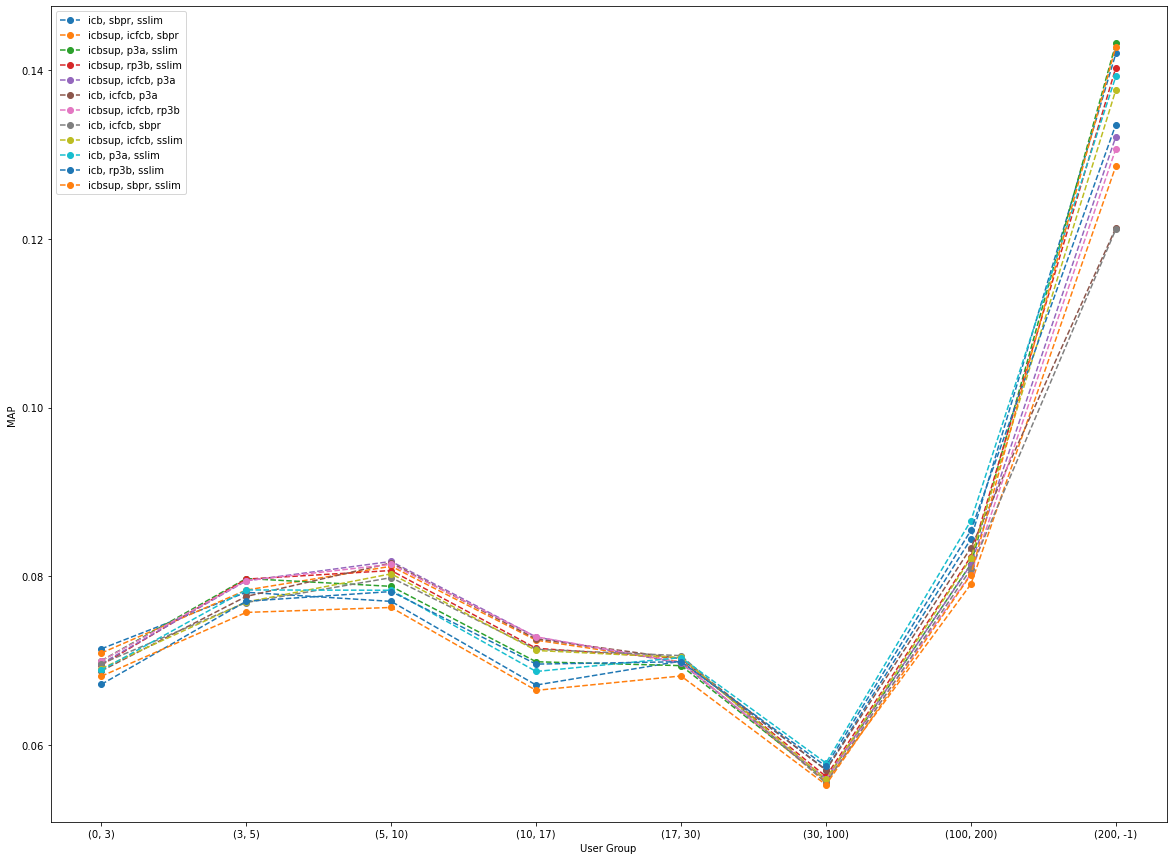

In [15]:
import matplotlib.pyplot as pyplot
%matplotlib inline  
pyplot.figure(figsize=(20,15))
for key, isCombo in to_be_plotted:
    l=[]
    if isCombo:
        for combo_dict in MAP_combo_per_group:
            l.append(combo_dict[key])
        if random.random() > 0.5:
            style = '--o'
        else:
            style = '--x'
        label = combo_labels['combo'+str(key+1)]
    """
    else:
        for merged_dict in MAP_merged_per_group:
            l.append(merged_dict[key])
        style = '--x'
        label = merged_labels[key]
        """
    pyplot.plot(l, style, label = label)

pyplot.xticks(ticks=range(0,len(f_ranges)), labels=f_ranges)
pyplot.ylabel('MAP')
pyplot.xlabel('User Group')
pyplot.legend()
pyplot.show()

In [7]:
f_ranges = [
    (0,20),
    (20,30),
    (30,40),
    (40,50),
    (50,60),
    (60,70),
    (70,80),
    (80,90),
    (90,100),
    (100,150),
    (150,-1)
]

for f_range in f_ranges:
    URM_test_group = parser.filter_URM_test_by_range(URM_list[0], URM_test_list[0], f_range)

---
### 5 balanced

In [25]:
f_ranges = [
    (0,4),
    (4,7),
    (7,13),
    (13,26),
    (26,-1)
]

MAP_combo_per_group = []
cutoff = 10

for f_range in f_ranges:
    
    
    combo_dict={}
    for k in range (num_combo):
        r = []
        for i in range (len(URM_list)):
            URM_test_group = parser.filter_URM_test_by_range(URM_list[i], URM_test_list[i], f_range)
            evaluator_test = EvaluatorHoldout(URM_test_group, cutoff_list=[cutoff])
            if not isinstance(list_rec[k][0], list):
                rec = list_rec[k][0]
                try:
                    rec = rec(URM_list[i], ICM_all, verbose = False)
                except:
                    rec = rec(URM_list[i], verbose=False)
                try:
                    rec.load_model(f'stored_recommenders/seed_{str(seed)}_hybrid_search/{rec.RECOMMENDER_NAME}/', f'{str(seed)}_fold-{str(i)}')
                    print(f"{rec.RECOMMENDER_NAME} loaded. [seed={seed}, fold={i}]")
                except:
                    print(f"Fitting {rec.RECOMMENDER_NAME} ... [seed={seed}, fold={i}]")
                    rec.fit(**list_rec[k][1])
                    print(f"done.")
                    rec.save_model(f'stored_recommenders/seed_{str(seed)}_hybrid_search/{rec.RECOMMENDER_NAME}/', f'{str(seed)}_fold-{str(i)}')
            else:
                rec = HybridCombinationSearchCV(URM_list[i], ICM_all, list_rec[k][0], seed = seed, fold = i)
                rec.fit(**list_rec[k][1])

            results, _ = evaluator_test.evaluateRecommender(rec)
            r.append(results[cutoff]["MAP"])
        combo_dict[k]=np.average(r)

    MAP_combo_per_group.append(combo_dict)

HybridCombinationSearchCV: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCV: URM Detected 2381 (9.17 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=0]
ItemKNNCFRecommender loaded. [seed=1666, fold=0]
P3alphaRecommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 1687 ( 100.00% ) in 1.63 sec. Users per second: 1032
HybridCombinationSearchCV: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCV: URM Detected 2439 (9.39 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=1]
ItemKNNCFRecommender loaded. [seed=1666, fold=1]
P3alphaRecommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 1640 ( 100.00% ) in 1.66 sec. Users per second: 985
HybridCombinationSearchCV: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCV: URM Detected 2402 (9.25 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=2]
ItemKNNCFRecommender loaded. [seed=1666, fold=2]
P3alphaRecommender loaded. [seed=1666, fold=2]
EvaluatorHo

HybridCombinationSearchCV: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCV: URM Detected 2338 (9.00 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=3]
RP3betaRecommender loaded. [seed=1666, fold=3]
P3alphaRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 1640 ( 100.00% ) in 1.79 sec. Users per second: 919
HybridCombinationSearchCV: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCV: URM Detected 2398 (9.23 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=4]
RP3betaRecommender loaded. [seed=1666, fold=4]
P3alphaRecommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 1633 ( 100.00% ) in 1.82 sec. Users per second: 899
HybridCombinationSearchCV: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCV: URM Detected 2381 (9.17 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=0]
UserKNNCFRecommender loaded. [seed=1666, fold=0]
P3alphaRecommender loaded. [seed=1666, fold=0]
EvaluatorHoldout

EvaluatorHoldout: Processed 1687 ( 100.00% ) in 2.10 sec. Users per second: 804
HybridCombinationSearchCV: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCV: URM Detected 2439 (9.39 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=1]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=1]
P3alphaRecommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 1640 ( 100.00% ) in 1.89 sec. Users per second: 868
HybridCombinationSearchCV: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCV: URM Detected 2402 (9.25 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=2]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=2]
P3alphaRecommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 1700 ( 100.00% ) in 1.93 sec. Users per second: 880
HybridCombinationSearchCV: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCV: URM Detected 2338 (9.00 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=3]
ItemKNN_CBF_CF_R

ItemKNNCBFRecommender loaded. [seed=1666, fold=3]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=3]
SLIM_BPR_Recommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 1640 ( 100.00% ) in 1.99 sec. Users per second: 825
HybridCombinationSearchCV: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCV: URM Detected 2398 (9.23 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=4]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=4]
SLIM_BPR_Recommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 1633 ( 100.00% ) in 1.94 sec. Users per second: 840
HybridCombinationSearchCV: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCV: URM Detected 2381 (9.17 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=0]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=0]
ItemKNNCFRecommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 1687 ( 100.00% ) in 2.22 sec. Users per second: 759
HybridCombinationSearchCV: URM Detecte

FileExistsError: [WinError 183] Cannot create a file when that file already exists: 'stored_recommenders/seed_1666_hybrid_search/Special-ItemKNNCBFRec/.temp_DataIO__1666_fold-4/'

In [ ]:
to_be_plotted = []
for i in range(0, len (f_ranges)):
    print(f"RANGE {f_ranges[i]}")
    maxp = 0
    difference = 0
    old_name = ''
    max_name=''
    max_isCombo=None
    old_isCombo=None
    max_key=None
    old_key=None
    
    combo_dict = MAP_combo_per_group[i]
    for key, value in combo_dict.items():
        #value = combo_dict.get(key)
        print(f"> MAP combo-{combo_labels['combo'+str(key+1)]}:\t {value}")
        if value > maxp:
            difference=value - maxp
            maxp=value
            old_name=max_name
            old_isCombo=max_isCombo
            max_name=combo_labels['combo'+str(key+1)]
            max_isCombo=True
            old_key=max_key
            max_key=key
        elif value > old_maxp:
            difference=maxp - value
            old_maxp=value
            old_name=combo_labels['combo'+str(key+1)]
            old_key=key
           
    if not check_if_present(to_be_plotted, (max_key, max_isCombo)):
        to_be_plotted.append((max_key, max_isCombo))
    
    if not old_key is None and not check_if_present(to_be_plotted, (old_key, old_isCombo)):
        to_be_plotted.append((old_key, old_isCombo))
    
    
    print(f"Max MAP is {maxp} from {max_name}({'COMBO' if max_isCombo else 'MERGED'}) with difference from previous max of {difference} from {old_name}({'COMBO' if old_isCombo else 'MERGED'}) \n")
        

In [ ]:
import matplotlib.pyplot as pyplot
%matplotlib inline  
pyplot.figure(figsize=(20,20))
for key, isCombo in to_be_plotted:
    l=[]
    if isCombo:
        for combo_dict in MAP_combo_per_group:
            l.append(combo_dict[key])
        if random.random() > 0.5:
            style = '--o'
        else:
            style = '--x'
        label = combo_labels['combo'+str(key+1)]
    """
    else:
        for merged_dict in MAP_merged_per_group:
            l.append(merged_dict[key])
        style = '--x'
        label = merged_labels[key]
        """
    pyplot.plot(l, style, label = label)

pyplot.xticks(ticks=range(0,len(f_ranges)), labels=f_ranges)
pyplot.ylabel('MAP')
pyplot.xlabel('User Group')
pyplot.legend()
pyplot.show()

In [20]:
f_ranges = [
    (0,3),
    (3,5),
    (5,8),
    (8,17),
    (17,-1)
]

MAP_combo_per_group = []
cutoff = 10

for f_range in f_ranges:
    
    
    combo_dict={}
    for k in range (num_combo):
        r = []
        for i in range (len(URM_list)):
            URM_test_group = parser.filter_URM_test_by_range(URM_list[i], URM_test_list[i], f_range)
            evaluator_test = EvaluatorHoldout(URM_test_group, cutoff_list=[cutoff])
            if not isinstance(list_rec[k][0], list):
                rec = list_rec[k][0]
                try:
                    rec = rec(URM_list[i], ICM_all, verbose = False)
                except:
                    rec = rec(URM_list[i], verbose=False)
                try:
                    rec.load_model(f'stored_recommenders/seed_{str(seed)}_hybrid_search/{rec.RECOMMENDER_NAME}/', f'{str(seed)}_fold-{str(i)}')
                    print(f"{rec.RECOMMENDER_NAME} loaded. [seed={seed}, fold={i}]")
                except:
                    print(f"Fitting {rec.RECOMMENDER_NAME} ... [seed={seed}, fold={i}]")
                    rec.fit(**list_rec[k][1])
                    print(f"done.")
                    rec.save_model(f'stored_recommenders/seed_{str(seed)}_hybrid_search/{rec.RECOMMENDER_NAME}/', f'{str(seed)}_fold-{str(i)}')
            else:
                rec = HybridCombinationSearchCV(URM_list[i], ICM_all, list_rec[k][0], seed = seed, fold = i)
                rec.fit(**list_rec[k][1])

            results, _ = evaluator_test.evaluateRecommender(rec)
            r.append(results[cutoff]["MAP"])
        combo_dict[k]=np.average(r)

    MAP_combo_per_group.append(combo_dict)

HybridCombinationSearchCV: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCV: URM Detected 2381 (9.17 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=0]
ItemKNNCFRecommender loaded. [seed=1666, fold=0]
P3alphaRecommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 1144 ( 100.00% ) in 1.10 sec. Users per second: 1039
HybridCombinationSearchCV: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCV: URM Detected 2439 (9.39 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=1]
ItemKNNCFRecommender loaded. [seed=1666, fold=1]
P3alphaRecommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 1069 ( 100.00% ) in 1.00 sec. Users per second: 1069
HybridCombinationSearchCV: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCV: URM Detected 2402 (9.25 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=2]
ItemKNNCFRecommender loaded. [seed=1666, fold=2]
P3alphaRecommender loaded. [seed=1666, fold=2]
EvaluatorH

EvaluatorHoldout: Processed 1132 ( 100.00% ) in 1.07 sec. Users per second: 1059
HybridCombinationSearchCV: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCV: URM Detected 2338 (9.00 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=3]
RP3betaRecommender loaded. [seed=1666, fold=3]
P3alphaRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 1091 ( 100.00% ) in 1.02 sec. Users per second: 1073
HybridCombinationSearchCV: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCV: URM Detected 2398 (9.23 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=4]
RP3betaRecommender loaded. [seed=1666, fold=4]
P3alphaRecommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 1059 ( 100.00% ) in 1.01 sec. Users per second: 1047
HybridCombinationSearchCV: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCV: URM Detected 2381 (9.17 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=0]
UserKNNCFRecommender loaded. 

ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=0]
P3alphaRecommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 1144 ( 100.00% ) in 1.11 sec. Users per second: 1033
HybridCombinationSearchCV: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCV: URM Detected 2439 (9.39 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=1]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=1]
P3alphaRecommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 1069 ( 100.00% ) in 1.03 sec. Users per second: 1034
HybridCombinationSearchCV: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCV: URM Detected 2402 (9.25 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=2]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=2]
P3alphaRecommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 1132 ( 100.00% ) in 1.24 sec. Users per second: 915
HybridCombinationSearchCV: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCV: U

ItemKNNCBFRecommender loaded. [seed=1666, fold=3]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=3]
SLIM_BPR_Recommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 1091 ( 100.00% ) in 1.16 sec. Users per second: 937
HybridCombinationSearchCV: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCV: URM Detected 2398 (9.23 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=4]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=4]
SLIM_BPR_Recommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 1059 ( 100.00% ) in 1.05 sec. Users per second: 1010
HybridCombinationSearchCV: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCV: URM Detected 2381 (9.17 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=0]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=0]
ItemKNNCFRecommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 1144 ( 100.00% ) in 1.15 sec. Users per second: 993
HybridCombinationSearchCV: URM Detect

Special-ItemKNNCBFRec loaded. [seed=1666, fold=1]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=1]
UserKNNCFRecommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 1069 ( 100.00% ) in 1.13 sec. Users per second: 947
HybridCombinationSearchCV: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCV: URM Detected 2402 (9.25 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=2]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=2]
UserKNNCFRecommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 1132 ( 100.00% ) in 1.17 sec. Users per second: 965
HybridCombinationSearchCV: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCV: URM Detected 2338 (9.00 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=3]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=3]
UserKNNCFRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 1091 ( 100.00% ) in 1.06 sec. Users per second: 1028
HybridCombinationSearchCV: URM Detect

Special-ItemKNNCBFRec loaded. [seed=1666, fold=4]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=4]
RP3betaRecommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 1059 ( 100.00% ) in 1.08 sec. Users per second: 981
HybridCombinationSearchCV: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCV: URM Detected 2381 (9.17 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=0]
ItemKNNCFRecommender loaded. [seed=1666, fold=0]
UserKNNCFRecommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 1144 ( 100.00% ) in 1.25 sec. Users per second: 919
HybridCombinationSearchCV: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCV: URM Detected 2439 (9.39 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=1]
ItemKNNCFRecommender loaded. [seed=1666, fold=1]
UserKNNCFRecommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 1069 ( 100.00% ) in 1.09 sec. Users per second: 985
HybridCombinationSearchCV: URM Detected 56 (0.70 %) 

Special-ItemKNNCBFRec loaded. [seed=1666, fold=2]
UserKNNCFRecommender loaded. [seed=1666, fold=2]
P3alphaRecommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 1132 ( 100.00% ) in 1.10 sec. Users per second: 1029
HybridCombinationSearchCV: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCV: URM Detected 2338 (9.00 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=3]
UserKNNCFRecommender loaded. [seed=1666, fold=3]
P3alphaRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 1091 ( 100.00% ) in 1.06 sec. Users per second: 1030
HybridCombinationSearchCV: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCV: URM Detected 2398 (9.23 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=4]
UserKNNCFRecommender loaded. [seed=1666, fold=4]
P3alphaRecommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 1059 ( 100.00% ) in 1.00 sec. Users per second: 1054
HybridCombinationSearchCV: URM Detected 48 (0.60 %) cold us

Special-ItemKNNCBFRec loaded. [seed=1666, fold=0]
P3alphaRecommender loaded. [seed=1666, fold=0]
S-SLIMElasticNet loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 1144 ( 100.00% ) in 1.59 sec. Users per second: 719
HybridCombinationSearchCV: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCV: URM Detected 2439 (9.39 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=1]
P3alphaRecommender loaded. [seed=1666, fold=1]
S-SLIMElasticNet loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 1069 ( 100.00% ) in 1.52 sec. Users per second: 703
HybridCombinationSearchCV: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCV: URM Detected 2402 (9.25 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=2]
P3alphaRecommender loaded. [seed=1666, fold=2]
S-SLIMElasticNet loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 1132 ( 100.00% ) in 1.56 sec. Users per second: 725
HybridCombinationSearchCV: URM Detected 65 (0.82 %) cold users.
HybridComb

Special-ItemKNNCBFRec loaded. [seed=1666, fold=3]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=3]
S-SLIMElasticNet loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 1091 ( 100.00% ) in 1.64 sec. Users per second: 665
HybridCombinationSearchCV: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCV: URM Detected 2398 (9.23 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=4]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=4]
S-SLIMElasticNet loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 1059 ( 100.00% ) in 1.50 sec. Users per second: 704
HybridCombinationSearchCV: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCV: URM Detected 2381 (9.17 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=0]
RP3betaRecommender loaded. [seed=1666, fold=0]
S-SLIMElasticNet loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 1144 ( 100.00% ) in 1.59 sec. Users per second: 721
HybridCombinationSearchCV: URM Detected 68 (0.86 %) cold u

ItemKNNCBFRecommender loaded. [seed=1666, fold=1]
P3alphaRecommender loaded. [seed=1666, fold=1]
S-SLIMElasticNet loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 1069 ( 100.00% ) in 1.45 sec. Users per second: 738
HybridCombinationSearchCV: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCV: URM Detected 2402 (9.25 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=2]
P3alphaRecommender loaded. [seed=1666, fold=2]
S-SLIMElasticNet loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 1132 ( 100.00% ) in 1.53 sec. Users per second: 742
HybridCombinationSearchCV: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCV: URM Detected 2338 (9.00 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=3]
P3alphaRecommender loaded. [seed=1666, fold=3]
S-SLIMElasticNet loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 1091 ( 100.00% ) in 1.52 sec. Users per second: 719
HybridCombinationSearchCV: URM Detected 77 (0.97 %) cold users.
HybridComb

SLIM_BPR_Recommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 1091 ( 100.00% ) in 0.59 sec. Users per second: 1842
SLIM_BPR_Recommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 1059 ( 100.00% ) in 0.60 sec. Users per second: 1772
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 1144 ( 100.00% ) in 0.68 sec. Users per second: 1675
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 1069 ( 100.00% ) in 0.60 sec. Users per second: 1770
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 1132 ( 100.00% ) in 0.67 sec. Users per second: 1687
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 1091 ( 100.00% ) in 0.61 sec. Users per second: 1778
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 1059 ( 100.00% ) in 0.66 sec. Users per second: 1599
S-SLIMElasticNet loaded. [seed=1666, fold=0]
EvaluatorHoldou

EvaluatorHoldout: Processed 1016 ( 100.00% ) in 1.01 sec. Users per second: 1010
HybridCombinationSearchCV: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCV: URM Detected 2402 (9.25 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=2]
ItemKNNCFRecommender loaded. [seed=1666, fold=2]
RP3betaRecommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 999 ( 100.00% ) in 0.96 sec. Users per second: 1038
HybridCombinationSearchCV: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCV: URM Detected 2338 (9.00 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=3]
ItemKNNCFRecommender loaded. [seed=1666, fold=3]
RP3betaRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 1016 ( 100.00% ) in 1.00 sec. Users per second: 1016
HybridCombinationSearchCV: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCV: URM Detected 2398 (9.23 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=4]
ItemKNNCFRecommender loade

P3alphaRecommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 1026 ( 100.00% ) in 1.00 sec. Users per second: 1024
HybridCombinationSearchCV: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCV: URM Detected 2381 (9.17 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=0]
UserKNNCFRecommender loaded. [seed=1666, fold=0]
RP3betaRecommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 984 ( 100.00% ) in 0.95 sec. Users per second: 1037
HybridCombinationSearchCV: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCV: URM Detected 2439 (9.39 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=1]
UserKNNCFRecommender loaded. [seed=1666, fold=1]
RP3betaRecommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 1016 ( 100.00% ) in 1.02 sec. Users per second: 1001
HybridCombinationSearchCV: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCV: URM Detected 2402 (9.25 %) cold items.
ItemKNNCBFRecommender loaded.

ItemKNNCBFRecommender loaded. [seed=1666, fold=2]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=2]
RP3betaRecommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 999 ( 100.00% ) in 1.06 sec. Users per second: 941
HybridCombinationSearchCV: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCV: URM Detected 2338 (9.00 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=3]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=3]
RP3betaRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 1016 ( 100.00% ) in 1.10 sec. Users per second: 924
HybridCombinationSearchCV: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCV: URM Detected 2398 (9.23 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=4]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=4]
RP3betaRecommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 1026 ( 100.00% ) in 1.15 sec. Users per second: 894
HybridCombinationSearchCV: URM Detected 48 (0

Special-ItemKNNCBFRec loaded. [seed=1666, fold=0]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=0]
P3alphaRecommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 984 ( 100.00% ) in 1.08 sec. Users per second: 908
HybridCombinationSearchCV: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCV: URM Detected 2439 (9.39 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=1]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=1]
P3alphaRecommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 1016 ( 100.00% ) in 1.11 sec. Users per second: 912
HybridCombinationSearchCV: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCV: URM Detected 2402 (9.25 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=2]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=2]
P3alphaRecommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 999 ( 100.00% ) in 1.09 sec. Users per second: 918
HybridCombinationSearchCV: URM Detected 65 (0.

Special-ItemKNNCBFRec loaded. [seed=1666, fold=3]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=3]
SLIM_BPR_Recommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 1016 ( 100.00% ) in 1.11 sec. Users per second: 918
HybridCombinationSearchCV: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCV: URM Detected 2398 (9.23 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=4]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=4]
SLIM_BPR_Recommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 1026 ( 100.00% ) in 1.09 sec. Users per second: 941
HybridCombinationSearchCV: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCV: URM Detected 2381 (9.17 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=0]
ItemKNNCFRecommender loaded. [seed=1666, fold=0]
P3alphaRecommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 984 ( 100.00% ) in 1.03 sec. Users per second: 958
HybridCombinationSearchCV: URM Detected 68 (0.8

Special-ItemKNNCBFRec loaded. [seed=1666, fold=1]
ItemKNNCFRecommender loaded. [seed=1666, fold=1]
SLIM_BPR_Recommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 1016 ( 100.00% ) in 1.11 sec. Users per second: 912
HybridCombinationSearchCV: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCV: URM Detected 2402 (9.25 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=2]
ItemKNNCFRecommender loaded. [seed=1666, fold=2]
SLIM_BPR_Recommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 999 ( 100.00% ) in 1.13 sec. Users per second: 886
HybridCombinationSearchCV: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCV: URM Detected 2338 (9.00 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=3]
ItemKNNCFRecommender loaded. [seed=1666, fold=3]
SLIM_BPR_Recommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 1016 ( 100.00% ) in 1.21 sec. Users per second: 842
HybridCombinationSearchCV: URM Detected 77 (0.97 %) cold 

Special-ItemKNNCBFRec loaded. [seed=1666, fold=4]
UserKNNCFRecommender loaded. [seed=1666, fold=4]
RP3betaRecommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 1026 ( 100.00% ) in 1.18 sec. Users per second: 868
HybridCombinationSearchCV: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCV: URM Detected 2381 (9.17 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=0]
UserKNNCFRecommender loaded. [seed=1666, fold=0]
SLIM_BPR_Recommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 984 ( 100.00% ) in 1.02 sec. Users per second: 961
HybridCombinationSearchCV: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCV: URM Detected 2439 (9.39 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=1]
UserKNNCFRecommender loaded. [seed=1666, fold=1]
SLIM_BPR_Recommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 1016 ( 100.00% ) in 1.10 sec. Users per second: 924
HybridCombinationSearchCV: URM Detected 56 (0.70 %) cold us

Special-ItemKNNCBFRec loaded. [seed=1666, fold=2]
UserKNNCFRecommender loaded. [seed=1666, fold=2]
S-SLIMElasticNet loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 999 ( 100.00% ) in 1.38 sec. Users per second: 723
HybridCombinationSearchCV: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCV: URM Detected 2338 (9.00 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=3]
UserKNNCFRecommender loaded. [seed=1666, fold=3]
S-SLIMElasticNet loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 1016 ( 100.00% ) in 1.55 sec. Users per second: 656
HybridCombinationSearchCV: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCV: URM Detected 2398 (9.23 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=4]
UserKNNCFRecommender loaded. [seed=1666, fold=4]
S-SLIMElasticNet loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 1026 ( 100.00% ) in 1.63 sec. Users per second: 630
HybridCombinationSearchCV: URM Detected 48 (0.60 %) cold users.
Hybri

ItemKNNCBFRecommender loaded. [seed=1666, fold=0]
SLIM_BPR_Recommender loaded. [seed=1666, fold=0]
S-SLIMElasticNet loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 984 ( 100.00% ) in 1.47 sec. Users per second: 671
HybridCombinationSearchCV: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCV: URM Detected 2439 (9.39 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=1]
SLIM_BPR_Recommender loaded. [seed=1666, fold=1]
S-SLIMElasticNet loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 1016 ( 100.00% ) in 1.67 sec. Users per second: 610
HybridCombinationSearchCV: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCV: URM Detected 2402 (9.25 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=2]
SLIM_BPR_Recommender loaded. [seed=1666, fold=2]
S-SLIMElasticNet loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 999 ( 100.00% ) in 1.42 sec. Users per second: 705
HybridCombinationSearchCV: URM Detected 65 (0.82 %) cold users.
Hybrid

P3alphaRecommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 999 ( 100.00% ) in 0.57 sec. Users per second: 1766
P3alphaRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 1016 ( 100.00% ) in 0.59 sec. Users per second: 1733
P3alphaRecommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 1026 ( 100.00% ) in 0.64 sec. Users per second: 1596
ItemKNNCFRecommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 984 ( 100.00% ) in 0.62 sec. Users per second: 1584
ItemKNNCFRecommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 1016 ( 100.00% ) in 0.59 sec. Users per second: 1734
ItemKNNCFRecommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 999 ( 100.00% ) in 0.63 sec. Users per second: 1598
ItemKNNCFRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 1016 ( 100.00% ) in 0.60 sec. Users per second: 1703
ItemKNNCFRecommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 1026 ( 100.00% ) in 0.

PureSVDRecommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 999 ( 100.00% ) in 0.75 sec. Users per second: 1334
PureSVDRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 1016 ( 100.00% ) in 0.80 sec. Users per second: 1278
PureSVDRecommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 1026 ( 100.00% ) in 0.76 sec. Users per second: 1348
Special-ItemKNNCBFRec loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 984 ( 100.00% ) in 0.64 sec. Users per second: 1526
Special-ItemKNNCBFRec loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 1016 ( 100.00% ) in 0.67 sec. Users per second: 1519
Special-ItemKNNCBFRec loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 999 ( 100.00% ) in 0.63 sec. Users per second: 1578
Special-ItemKNNCBFRec loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 1016 ( 100.00% ) in 0.65 sec. Users per second: 1567
Special-ItemKNNCBFRec loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 1026 ( 100.00% ) 

ItemKNNCBFRecommender loaded. [seed=1666, fold=4]
ItemKNNCFRecommender loaded. [seed=1666, fold=4]
UserKNNCFRecommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 1175 ( 100.00% ) in 1.19 sec. Users per second: 984
HybridCombinationSearchCV: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCV: URM Detected 2381 (9.17 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=0]
RP3betaRecommender loaded. [seed=1666, fold=0]
P3alphaRecommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 1159 ( 100.00% ) in 1.28 sec. Users per second: 907
HybridCombinationSearchCV: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCV: URM Detected 2439 (9.39 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=1]
RP3betaRecommender loaded. [seed=1666, fold=1]
P3alphaRecommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 1171 ( 100.00% ) in 1.24 sec. Users per second: 948
HybridCombinationSearchCV: URM Detected 56 (0.70 %) cold users.


ItemKNNCBFRecommender loaded. [seed=1666, fold=2]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=2]
ItemKNNCFRecommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 1181 ( 100.00% ) in 1.36 sec. Users per second: 871
HybridCombinationSearchCV: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCV: URM Detected 2338 (9.00 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=3]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=3]
ItemKNNCFRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 1193 ( 100.00% ) in 1.61 sec. Users per second: 742
HybridCombinationSearchCV: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCV: URM Detected 2398 (9.23 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=4]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=4]
ItemKNNCFRecommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 1175 ( 100.00% ) in 1.39 sec. Users per second: 844
HybridCombinationSearchCV: URM Detecte

ItemKNNCBFRecommender loaded. [seed=1666, fold=0]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=0]
SLIM_BPR_Recommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 1159 ( 100.00% ) in 1.36 sec. Users per second: 851
HybridCombinationSearchCV: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCV: URM Detected 2439 (9.39 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=1]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=1]
SLIM_BPR_Recommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 1171 ( 100.00% ) in 1.38 sec. Users per second: 850
HybridCombinationSearchCV: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCV: URM Detected 2402 (9.25 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=2]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=2]
SLIM_BPR_Recommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 1181 ( 100.00% ) in 1.41 sec. Users per second: 839
HybridCombinationSearchCV: URM Detecte

Special-ItemKNNCBFRec loaded. [seed=1666, fold=3]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=3]
RP3betaRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 1193 ( 100.00% ) in 1.41 sec. Users per second: 848
HybridCombinationSearchCV: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCV: URM Detected 2398 (9.23 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=4]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=4]
RP3betaRecommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 1175 ( 100.00% ) in 1.45 sec. Users per second: 811
HybridCombinationSearchCV: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCV: URM Detected 2381 (9.17 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=0]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=0]
UserKNNCFRecommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 1159 ( 100.00% ) in 1.43 sec. Users per second: 812
HybridCombinationSearchCV: URM Detected 68

Special-ItemKNNCBFRec loaded. [seed=1666, fold=1]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=1]
RP3betaRecommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 1171 ( 100.00% ) in 1.42 sec. Users per second: 823
HybridCombinationSearchCV: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCV: URM Detected 2402 (9.25 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=2]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=2]
RP3betaRecommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 1181 ( 100.00% ) in 1.42 sec. Users per second: 833
HybridCombinationSearchCV: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCV: URM Detected 2338 (9.00 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=3]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=3]
RP3betaRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 1193 ( 100.00% ) in 1.46 sec. Users per second: 818
HybridCombinationSearchCV: URM Detected 77 (

Special-ItemKNNCBFRec loaded. [seed=1666, fold=4]
P3alphaRecommender loaded. [seed=1666, fold=4]
RP3betaRecommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 1175 ( 100.00% ) in 1.35 sec. Users per second: 870
HybridCombinationSearchCV: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCV: URM Detected 2381 (9.17 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=0]
UserKNNCFRecommender loaded. [seed=1666, fold=0]
P3alphaRecommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 1159 ( 100.00% ) in 1.32 sec. Users per second: 876
HybridCombinationSearchCV: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCV: URM Detected 2439 (9.39 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=1]
UserKNNCFRecommender loaded. [seed=1666, fold=1]
P3alphaRecommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 1171 ( 100.00% ) in 1.32 sec. Users per second: 888
HybridCombinationSearchCV: URM Detected 56 (0.70 %) cold users.


Special-ItemKNNCBFRec loaded. [seed=1666, fold=2]
SLIM_BPR_Recommender loaded. [seed=1666, fold=2]
S-SLIMElasticNet loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 1181 ( 100.00% ) in 1.88 sec. Users per second: 628
HybridCombinationSearchCV: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCV: URM Detected 2338 (9.00 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=3]
SLIM_BPR_Recommender loaded. [seed=1666, fold=3]
S-SLIMElasticNet loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 1193 ( 100.00% ) in 2.01 sec. Users per second: 594
HybridCombinationSearchCV: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCV: URM Detected 2398 (9.23 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=4]
SLIM_BPR_Recommender loaded. [seed=1666, fold=4]
S-SLIMElasticNet loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 1175 ( 100.00% ) in 2.07 sec. Users per second: 567
HybridCombinationSearchCV: URM Detected 48 (0.60 %) cold users.
Hybr

Special-ItemKNNCBFRec loaded. [seed=1666, fold=0]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=0]
S-SLIMElasticNet loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 1159 ( 100.00% ) in 2.06 sec. Users per second: 562
HybridCombinationSearchCV: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCV: URM Detected 2439 (9.39 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=1]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=1]
S-SLIMElasticNet loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 1171 ( 100.00% ) in 2.03 sec. Users per second: 578
HybridCombinationSearchCV: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCV: URM Detected 2402 (9.25 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=2]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=2]
S-SLIMElasticNet loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 1181 ( 100.00% ) in 1.95 sec. Users per second: 604
HybridCombinationSearchCV: URM Detected 65 (0.82 %

ItemKNNCBFRecommender loaded. [seed=1666, fold=3]
RP3betaRecommender loaded. [seed=1666, fold=3]
S-SLIMElasticNet loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 1193 ( 100.00% ) in 1.86 sec. Users per second: 641
HybridCombinationSearchCV: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCV: URM Detected 2398 (9.23 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=4]
RP3betaRecommender loaded. [seed=1666, fold=4]
S-SLIMElasticNet loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 1175 ( 100.00% ) in 1.80 sec. Users per second: 652
HybridCombinationSearchCV: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCV: URM Detected 2381 (9.17 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=0]
P3alphaRecommender loaded. [seed=1666, fold=0]
S-SLIMElasticNet loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 1159 ( 100.00% ) in 1.75 sec. Users per second: 662
HybridCombinationSearchCV: URM Detected 68 (0.86 %) cold users.
HybridComb

EvaluatorHoldout: Processed 1181 ( 100.00% ) in 0.67 sec. Users per second: 1764
ItemKNNCBFRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 1193 ( 100.00% ) in 0.67 sec. Users per second: 1780
ItemKNNCBFRecommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 1175 ( 100.00% ) in 0.66 sec. Users per second: 1783
SLIM_BPR_Recommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 1159 ( 100.00% ) in 0.70 sec. Users per second: 1666
SLIM_BPR_Recommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 1171 ( 100.00% ) in 0.70 sec. Users per second: 1670
SLIM_BPR_Recommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 1181 ( 100.00% ) in 0.70 sec. Users per second: 1690
SLIM_BPR_Recommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 1193 ( 100.00% ) in 0.74 sec. Users per second: 1610
SLIM_BPR_Recommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 1175 ( 100.00% ) in 0.77 sec. Users per second: 1532
ItemKNN

HybridCombinationSearchCV: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCV: URM Detected 2398 (9.23 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=4]
ItemKNNCFRecommender loaded. [seed=1666, fold=4]
P3alphaRecommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 1167 ( 100.00% ) in 1.43 sec. Users per second: 815
HybridCombinationSearchCV: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCV: URM Detected 2381 (9.17 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=0]
ItemKNNCFRecommender loaded. [seed=1666, fold=0]
RP3betaRecommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 1197 ( 100.00% ) in 1.37 sec. Users per second: 873
HybridCombinationSearchCV: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCV: URM Detected 2439 (9.39 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=1]
ItemKNNCFRecommender loaded. [seed=1666, fold=1]
RP3betaRecommender loaded. [seed=1666, fold=1]
EvaluatorHol

EvaluatorHoldout: Processed 1145 ( 100.00% ) in 1.22 sec. Users per second: 939
HybridCombinationSearchCV: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCV: URM Detected 2402 (9.25 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=2]
UserKNNCFRecommender loaded. [seed=1666, fold=2]
P3alphaRecommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 1185 ( 100.00% ) in 1.29 sec. Users per second: 921
HybridCombinationSearchCV: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCV: URM Detected 2338 (9.00 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=3]
UserKNNCFRecommender loaded. [seed=1666, fold=3]
P3alphaRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 1168 ( 100.00% ) in 1.26 sec. Users per second: 929
HybridCombinationSearchCV: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCV: URM Detected 2398 (9.23 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=4]
UserKNNCFRecommender loaded.

ItemKNNCBFRecommender loaded. [seed=1666, fold=4]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=4]
P3alphaRecommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 1167 ( 100.00% ) in 1.52 sec. Users per second: 767
HybridCombinationSearchCV: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCV: URM Detected 2381 (9.17 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=0]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=0]
RP3betaRecommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 1197 ( 100.00% ) in 1.67 sec. Users per second: 717
HybridCombinationSearchCV: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCV: URM Detected 2439 (9.39 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=1]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=1]
RP3betaRecommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 1145 ( 100.00% ) in 1.47 sec. Users per second: 779
HybridCombinationSearchCV: URM Detected 56 (

Special-ItemKNNCBFRec loaded. [seed=1666, fold=2]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=2]
ItemKNNCFRecommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 1185 ( 100.00% ) in 1.72 sec. Users per second: 688
HybridCombinationSearchCV: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCV: URM Detected 2338 (9.00 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=3]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=3]
ItemKNNCFRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 1168 ( 100.00% ) in 1.65 sec. Users per second: 706
HybridCombinationSearchCV: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCV: URM Detected 2398 (9.23 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=4]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=4]
ItemKNNCFRecommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 1167 ( 100.00% ) in 1.65 sec. Users per second: 708
HybridCombinationSearchCV: URM Detecte

Special-ItemKNNCBFRec loaded. [seed=1666, fold=0]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=0]
SLIM_BPR_Recommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 1197 ( 100.00% ) in 1.69 sec. Users per second: 708
HybridCombinationSearchCV: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCV: URM Detected 2439 (9.39 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=1]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=1]
SLIM_BPR_Recommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 1145 ( 100.00% ) in 1.66 sec. Users per second: 690
HybridCombinationSearchCV: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCV: URM Detected 2402 (9.25 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=2]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=2]
SLIM_BPR_Recommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 1185 ( 100.00% ) in 1.71 sec. Users per second: 693
HybridCombinationSearchCV: URM Detecte

Special-ItemKNNCBFRec loaded. [seed=1666, fold=3]
ItemKNNCFRecommender loaded. [seed=1666, fold=3]
UserKNNCFRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 1168 ( 100.00% ) in 1.61 sec. Users per second: 724
HybridCombinationSearchCV: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCV: URM Detected 2398 (9.23 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=4]
ItemKNNCFRecommender loaded. [seed=1666, fold=4]
UserKNNCFRecommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 1167 ( 100.00% ) in 1.63 sec. Users per second: 717
HybridCombinationSearchCV: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCV: URM Detected 2381 (9.17 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=0]
ItemKNNCFRecommender loaded. [seed=1666, fold=0]
SLIM_BPR_Recommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 1197 ( 100.00% ) in 1.59 sec. Users per second: 755
HybridCombinationSearchCV: URM Detected 68 (0.86 %) cold

Special-ItemKNNCBFRec loaded. [seed=1666, fold=1]
UserKNNCFRecommender loaded. [seed=1666, fold=1]
RP3betaRecommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 1145 ( 100.00% ) in 1.51 sec. Users per second: 760
HybridCombinationSearchCV: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCV: URM Detected 2402 (9.25 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=2]
UserKNNCFRecommender loaded. [seed=1666, fold=2]
RP3betaRecommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 1185 ( 100.00% ) in 1.49 sec. Users per second: 793
HybridCombinationSearchCV: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCV: URM Detected 2338 (9.00 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=3]
UserKNNCFRecommender loaded. [seed=1666, fold=3]
RP3betaRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 1168 ( 100.00% ) in 1.48 sec. Users per second: 790
HybridCombinationSearchCV: URM Detected 77 (0.97 %) cold users

Special-ItemKNNCBFRec loaded. [seed=1666, fold=4]
P3alphaRecommender loaded. [seed=1666, fold=4]
S-SLIMElasticNet loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 1167 ( 100.00% ) in 2.05 sec. Users per second: 569
HybridCombinationSearchCV: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCV: URM Detected 2381 (9.17 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=0]
UserKNNCFRecommender loaded. [seed=1666, fold=0]
S-SLIMElasticNet loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 1197 ( 100.00% ) in 2.09 sec. Users per second: 574
HybridCombinationSearchCV: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCV: URM Detected 2439 (9.39 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=1]
UserKNNCFRecommender loaded. [seed=1666, fold=1]
S-SLIMElasticNet loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 1145 ( 100.00% ) in 2.05 sec. Users per second: 559
HybridCombinationSearchCV: URM Detected 56 (0.70 %) cold users.
Hybrid

Special-ItemKNNCBFRec loaded. [seed=1666, fold=2]
RP3betaRecommender loaded. [seed=1666, fold=2]
S-SLIMElasticNet loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 1185 ( 100.00% ) in 2.32 sec. Users per second: 511
HybridCombinationSearchCV: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCV: URM Detected 2338 (9.00 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=3]
RP3betaRecommender loaded. [seed=1666, fold=3]
S-SLIMElasticNet loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 1168 ( 100.00% ) in 2.16 sec. Users per second: 542
HybridCombinationSearchCV: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCV: URM Detected 2398 (9.23 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=4]
RP3betaRecommender loaded. [seed=1666, fold=4]
S-SLIMElasticNet loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 1167 ( 100.00% ) in 2.18 sec. Users per second: 534
HybridCombinationSearchCV: URM Detected 48 (0.60 %) cold users.
HybridComb

RP3betaRecommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 1145 ( 100.00% ) in 0.71 sec. Users per second: 1610
RP3betaRecommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 1185 ( 100.00% ) in 0.74 sec. Users per second: 1598
RP3betaRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 1168 ( 100.00% ) in 0.72 sec. Users per second: 1626
RP3betaRecommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 1167 ( 100.00% ) in 0.76 sec. Users per second: 1541
P3alphaRecommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 1197 ( 100.00% ) in 0.74 sec. Users per second: 1612
P3alphaRecommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 1145 ( 100.00% ) in 0.68 sec. Users per second: 1684
P3alphaRecommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 1185 ( 100.00% ) in 0.71 sec. Users per second: 1668
P3alphaRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 1168 ( 100.00% ) in 0.67 sec.

S-SLIMElasticNet loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 1145 ( 100.00% ) in 1.20 sec. Users per second: 956
S-SLIMElasticNet loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 1185 ( 100.00% ) in 1.24 sec. Users per second: 953
S-SLIMElasticNet loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 1168 ( 100.00% ) in 1.21 sec. Users per second: 966
S-SLIMElasticNet loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 1167 ( 100.00% ) in 1.21 sec. Users per second: 962
PureSVDRecommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 1197 ( 100.00% ) in 0.85 sec. Users per second: 1411
PureSVDRecommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 1145 ( 100.00% ) in 0.82 sec. Users per second: 1391
PureSVDRecommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 1185 ( 100.00% ) in 0.86 sec. Users per second: 1386
PureSVDRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 1168 ( 100.00% ) in 0.84 sec. Users per s

EvaluatorHoldout: Processed 1135 ( 100.00% ) in 1.81 sec. Users per second: 626
HybridCombinationSearchCV: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCV: URM Detected 2439 (9.39 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=1]
ItemKNNCFRecommender loaded. [seed=1666, fold=1]
UserKNNCFRecommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 1147 ( 100.00% ) in 1.76 sec. Users per second: 653
HybridCombinationSearchCV: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCV: URM Detected 2402 (9.25 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=2]
ItemKNNCFRecommender loaded. [seed=1666, fold=2]
UserKNNCFRecommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 1137 ( 100.00% ) in 1.70 sec. Users per second: 670
HybridCombinationSearchCV: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCV: URM Detected 2338 (9.00 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=3]
ItemKNNCFRecommender loa

RP3betaRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 1140 ( 100.00% ) in 1.65 sec. Users per second: 692
HybridCombinationSearchCV: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCV: URM Detected 2398 (9.23 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=4]
UserKNNCFRecommender loaded. [seed=1666, fold=4]
RP3betaRecommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 1148 ( 100.00% ) in 1.57 sec. Users per second: 731
HybridCombinationSearchCV: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCV: URM Detected 2381 (9.17 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=0]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=0]
ItemKNNCFRecommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 1135 ( 100.00% ) in 2.15 sec. Users per second: 527
HybridCombinationSearchCV: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCV: URM Detected 2439 (9.39 %) cold items.
ItemKNNCBFRecommender l

ItemKNNCBFRecommender loaded. [seed=1666, fold=1]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=1]
UserKNNCFRecommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 1147 ( 100.00% ) in 2.00 sec. Users per second: 574
HybridCombinationSearchCV: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCV: URM Detected 2402 (9.25 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=2]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=2]
UserKNNCFRecommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 1137 ( 100.00% ) in 2.08 sec. Users per second: 546
HybridCombinationSearchCV: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCV: URM Detected 2338 (9.00 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=3]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=3]
UserKNNCFRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 1140 ( 100.00% ) in 2.10 sec. Users per second: 543
HybridCombinationSearchCV: URM Detecte

HybridCombinationSearchCV: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCV: URM Detected 2398 (9.23 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=4]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=4]
P3alphaRecommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 1148 ( 100.00% ) in 2.46 sec. Users per second: 466
HybridCombinationSearchCV: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCV: URM Detected 2381 (9.17 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=0]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=0]
RP3betaRecommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 1135 ( 100.00% ) in 2.47 sec. Users per second: 460
HybridCombinationSearchCV: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCV: URM Detected 2439 (9.39 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=1]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=1]
RP3betaRecommender loaded. [seed=1666, fo

ItemKNNCFRecommender loaded. [seed=1666, fold=1]
P3alphaRecommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 1147 ( 100.00% ) in 2.15 sec. Users per second: 533
HybridCombinationSearchCV: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCV: URM Detected 2402 (9.25 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=2]
ItemKNNCFRecommender loaded. [seed=1666, fold=2]
P3alphaRecommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 1137 ( 100.00% ) in 2.10 sec. Users per second: 541
HybridCombinationSearchCV: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCV: URM Detected 2338 (9.00 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=3]
ItemKNNCFRecommender loaded. [seed=1666, fold=3]
P3alphaRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 1140 ( 100.00% ) in 2.12 sec. Users per second: 538
HybridCombinationSearchCV: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCV: URM Detected 2398 (9.

Special-ItemKNNCBFRec loaded. [seed=1666, fold=4]
ItemKNNCFRecommender loaded. [seed=1666, fold=4]
SLIM_BPR_Recommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 1148 ( 100.00% ) in 2.43 sec. Users per second: 472
HybridCombinationSearchCV: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCV: URM Detected 2381 (9.17 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=0]
P3alphaRecommender loaded. [seed=1666, fold=0]
RP3betaRecommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 1135 ( 100.00% ) in 2.21 sec. Users per second: 514
HybridCombinationSearchCV: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCV: URM Detected 2439 (9.39 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=1]
P3alphaRecommender loaded. [seed=1666, fold=1]
RP3betaRecommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 1147 ( 100.00% ) in 2.17 sec. Users per second: 530
HybridCombinationSearchCV: URM Detected 56 (0.70 %) cold users.


Special-ItemKNNCBFRec loaded. [seed=1666, fold=2]
UserKNNCFRecommender loaded. [seed=1666, fold=2]
SLIM_BPR_Recommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 1137 ( 100.00% ) in 2.12 sec. Users per second: 537
HybridCombinationSearchCV: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCV: URM Detected 2338 (9.00 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=3]
UserKNNCFRecommender loaded. [seed=1666, fold=3]
SLIM_BPR_Recommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 1140 ( 100.00% ) in 2.13 sec. Users per second: 535
HybridCombinationSearchCV: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCV: URM Detected 2398 (9.23 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=4]
UserKNNCFRecommender loaded. [seed=1666, fold=4]
SLIM_BPR_Recommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 1148 ( 100.00% ) in 2.13 sec. Users per second: 539
HybridCombinationSearchCV: URM Detected 48 (0.60 %) cold

Special-ItemKNNCBFRec loaded. [seed=1666, fold=0]
ItemKNNCFRecommender loaded. [seed=1666, fold=0]
S-SLIMElasticNet loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 1135 ( 100.00% ) in 3.13 sec. Users per second: 362
HybridCombinationSearchCV: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCV: URM Detected 2439 (9.39 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=1]
ItemKNNCFRecommender loaded. [seed=1666, fold=1]
S-SLIMElasticNet loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 1147 ( 100.00% ) in 2.94 sec. Users per second: 390
HybridCombinationSearchCV: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCV: URM Detected 2402 (9.25 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=2]
ItemKNNCFRecommender loaded. [seed=1666, fold=2]
S-SLIMElasticNet loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 1137 ( 100.00% ) in 2.98 sec. Users per second: 381
HybridCombinationSearchCV: URM Detected 65 (0.82 %) cold users.
Hybr

ItemKNNCBFRecommender loaded. [seed=1666, fold=3]
SLIM_BPR_Recommender loaded. [seed=1666, fold=3]
S-SLIMElasticNet loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 1140 ( 100.00% ) in 2.58 sec. Users per second: 441
HybridCombinationSearchCV: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCV: URM Detected 2398 (9.23 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=4]
SLIM_BPR_Recommender loaded. [seed=1666, fold=4]
S-SLIMElasticNet loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 1148 ( 100.00% ) in 2.64 sec. Users per second: 435
HybridCombinationSearchCV: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCV: URM Detected 2381 (9.17 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=0]
RP3betaRecommender loaded. [seed=1666, fold=0]
S-SLIMElasticNet loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 1135 ( 100.00% ) in 2.46 sec. Users per second: 461
HybridCombinationSearchCV: URM Detected 68 (0.86 %) cold users.
Hybrid

EvaluatorHoldout: Processed 1137 ( 100.00% ) in 0.98 sec. Users per second: 1165
ItemKNNCFRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 1140 ( 100.00% ) in 0.97 sec. Users per second: 1179
ItemKNNCFRecommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 1148 ( 100.00% ) in 0.98 sec. Users per second: 1176
UserKNNCFRecommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 1135 ( 100.00% ) in 0.74 sec. Users per second: 1530
UserKNNCFRecommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 1147 ( 100.00% ) in 0.74 sec. Users per second: 1545
UserKNNCFRecommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 1137 ( 100.00% ) in 0.74 sec. Users per second: 1527
UserKNNCFRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 1140 ( 100.00% ) in 0.74 sec. Users per second: 1538
UserKNNCFRecommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 1148 ( 100.00% ) in 0.74 sec. Users per second: 1547
ItemKNNCB

EvaluatorHoldout: Processed 1137 ( 100.00% ) in 1.27 sec. Users per second: 893
Special-ItemKNNCBFRec loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 1140 ( 100.00% ) in 1.29 sec. Users per second: 884
Special-ItemKNNCBFRec loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 1148 ( 100.00% ) in 1.37 sec. Users per second: 836


In [21]:
to_be_plotted = []
for i in range(0, len (f_ranges)):
    print(f"RANGE {f_ranges[i]}")
    maxp = 0
    difference = 0
    old_name = ''
    max_name=''
    max_isCombo=None
    old_isCombo=None
    max_key=None
    old_key=None
    
    combo_dict = MAP_combo_per_group[i]
    for key, value in combo_dict.items():
        #value = combo_dict.get(key)
        print(f"> MAP combo-{combo_labels['combo'+str(key+1)]}:\t {value}")
        if value > maxp:
            difference=value - maxp
            maxp=value
            old_name=max_name
            old_isCombo=max_isCombo
            max_name=combo_labels['combo'+str(key+1)]
            max_isCombo=True
            old_key=max_key
            max_key=key
        elif value > old_maxp:
            difference=maxp - value
            old_maxp=value
            old_name=combo_labels['combo'+str(key+1)]
            old_key=key
           
    if not check_if_present(to_be_plotted, (max_key, max_isCombo)):
        to_be_plotted.append((max_key, max_isCombo))
    
    if not old_key is None and not check_if_present(to_be_plotted, (old_key, old_isCombo)):
        to_be_plotted.append((old_key, old_isCombo))
    
    
    print(f"Max MAP is {maxp} from {max_name}({'COMBO' if max_isCombo else 'MERGED'}) with difference from previous max of {difference} from {old_name}({'COMBO' if old_isCombo else 'MERGED'}) \n")
        

RANGE (0, 3)
> MAP combo-icb, icf, p3a:	 0.06474931369262016
> MAP combo-icb, icf, rp3b:	 0.06500029236303792
> MAP combo-icb, icf, ucf:	 0.06363190600262157
> MAP combo-icb, rp3b, p3a:	 0.06510243113239321
> MAP combo-icb, ucf, p3a:	 0.06803465666239525
> MAP combo-icb, ucf, rp3b:	 0.0664798777960184
> MAP combo-icb, icfcb, icf:	 0.06869084116414374
> MAP combo-icb, icfcb, p3a:	 0.06877533145641564
> MAP combo-icb, icfcb, rp3b:	 0.06909548333186183
> MAP combo-icb, icfcb, ucf:	 0.06929929339228114
> MAP combo-icb, icfcb, sbpr:	 0.06963134653995043
> MAP combo-icbsup, icfcb, icf:	 0.06775322798478764
> MAP combo-icbsup, icfcb, p3a:	 0.06963275574616393
> MAP combo-icbsup, icfcb, rp3b:	 0.06996848023410623
> MAP combo-icbsup, icfcb, ucf:	 0.06853026425809057
> MAP combo-icbsup, icfcb, sbpr:	 0.0708910268185396
> MAP combo-icbsup, icf, p3a:	 0.06729558862627413
> MAP combo-icbsup, icfcb, rp3b:	 0.06960873049906709
> MAP combo-icbsup, icf, ucf:	 0.06539476428562532
> MAP combo-icbsup, icf

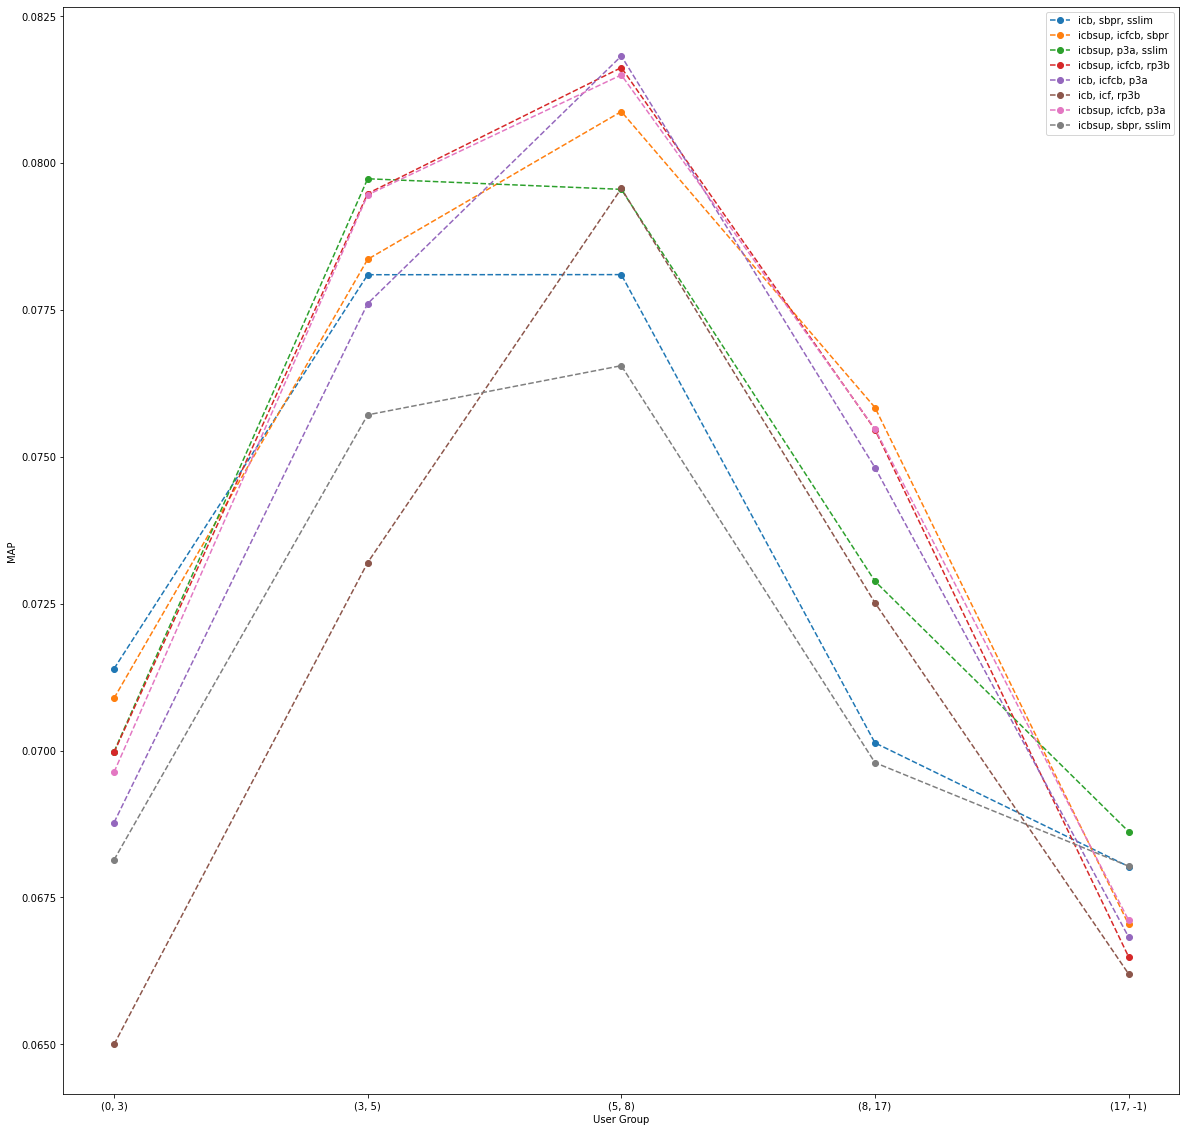

In [22]:
import matplotlib.pyplot as pyplot
%matplotlib inline  
pyplot.figure(figsize=(20,20))
for key, isCombo in to_be_plotted:
    l=[]
    if isCombo:
        for combo_dict in MAP_combo_per_group:
            l.append(combo_dict[key])
        if random.random() > 0.5:
            style = '--o'
        else:
            style = '--x'
        label = combo_labels['combo'+str(key+1)]
    """
    else:
        for merged_dict in MAP_merged_per_group:
            l.append(merged_dict[key])
        style = '--x'
        label = merged_labels[key]
        """
    pyplot.plot(l, style, label = label)

pyplot.xticks(ticks=range(0,len(f_ranges)), labels=f_ranges)
pyplot.ylabel('MAP')
pyplot.xlabel('User Group')
pyplot.legend()
pyplot.show()

In [19]:
f_ranges = [
    (0,3),
    (3,6),
    (6,12),
    (12,100),
    (100,-1)
]

MAP_combo_per_group = []
cutoff = 10

for f_range in f_ranges:
    
    
    combo_dict={}
    for k in range (num_combo):
        r = []
        for i in range (len(URM_list)):
            URM_test_group = parser.filter_URM_test_by_range(URM_list[i], URM_test_list[i], f_range)
            evaluator_test = EvaluatorHoldout(URM_test_group, cutoff_list=[cutoff])
            if not isinstance(list_rec[k][0], list):
                rec = list_rec[k][0]
                try:
                    rec = rec(URM_list[i], ICM_all, verbose = False)
                except:
                    rec = rec(URM_list[i], verbose=False)
                try:
                    rec.load_model(f'stored_recommenders/seed_{str(seed)}_hybrid_search3/{rec.RECOMMENDER_NAME}/', f'{str(seed)}_fold-{str(i)}')
                    print(f"{rec.RECOMMENDER_NAME} loaded. [seed={seed}, fold={i}]")
                except:
                    print(f"Fitting {rec.RECOMMENDER_NAME} ... [seed={seed}, fold={i}]")
                    rec.fit(**list_rec[k][1])
                    print(f"done.")
                    rec.save_model(f'stored_recommenders/seed_{str(seed)}_hybrid_search3/{rec.RECOMMENDER_NAME}/', f'{str(seed)}_fold-{str(i)}')
            else:
                rec = HybridCombinationSearchCV3(URM_list[i], ICM_all, list_rec[k][0], seed = seed, fold = i)
                rec.fit(**list_rec[k][1])

            results, _ = evaluator_test.evaluateRecommender(rec)
            r.append(results[cutoff]["MAP"])
        combo_dict[k]=np.average(r)

    MAP_combo_per_group.append(combo_dict)

HybridCombinationSearchCV3: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCV3: URM Detected 2381 (9.17 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=0]
ItemKNNCFRecommender loaded. [seed=1666, fold=0]
P3alphaRecommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 1144 ( 100.00% ) in 1.30 sec. Users per second: 881
HybridCombinationSearchCV3: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCV3: URM Detected 2439 (9.39 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=1]
ItemKNNCFRecommender loaded. [seed=1666, fold=1]
P3alphaRecommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 1069 ( 100.00% ) in 1.27 sec. Users per second: 843
HybridCombinationSearchCV3: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCV3: URM Detected 2402 (9.25 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=2]
ItemKNNCFRecommender loaded. [seed=1666, fold=2]
P3alphaRecommender loaded. [seed=1666, fold=2]
Evalua

EvaluatorHoldout: Processed 1132 ( 100.00% ) in 1.26 sec. Users per second: 900
HybridCombinationSearchCV3: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCV3: URM Detected 2338 (9.00 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=3]
RP3betaRecommender loaded. [seed=1666, fold=3]
P3alphaRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 1091 ( 100.00% ) in 1.24 sec. Users per second: 883
HybridCombinationSearchCV3: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCV3: URM Detected 2398 (9.23 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=4]
RP3betaRecommender loaded. [seed=1666, fold=4]
P3alphaRecommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 1059 ( 100.00% ) in 1.17 sec. Users per second: 902
HybridCombinationSearchCV3: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCV3: URM Detected 2381 (9.17 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=0]
UserKNNCFRecommender loade

ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=0]
P3alphaRecommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 1144 ( 100.00% ) in 1.33 sec. Users per second: 857
HybridCombinationSearchCV3: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCV3: URM Detected 2439 (9.39 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=1]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=1]
P3alphaRecommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 1069 ( 100.00% ) in 1.24 sec. Users per second: 864
HybridCombinationSearchCV3: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCV3: URM Detected 2402 (9.25 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=2]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=2]
P3alphaRecommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 1132 ( 100.00% ) in 1.34 sec. Users per second: 846
HybridCombinationSearchCV3: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCV

ItemKNNCBFRecommender loaded. [seed=1666, fold=3]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=3]
SLIM_BPR_Recommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 1091 ( 100.00% ) in 1.29 sec. Users per second: 846
HybridCombinationSearchCV3: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCV3: URM Detected 2398 (9.23 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=4]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=4]
SLIM_BPR_Recommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 1059 ( 100.00% ) in 1.32 sec. Users per second: 801
HybridCombinationSearchCV3: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCV3: URM Detected 2381 (9.17 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=0]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=0]
ItemKNNCFRecommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 1144 ( 100.00% ) in 1.37 sec. Users per second: 837
HybridCombinationSearchCV3: URM De

Special-ItemKNNCBFRec loaded. [seed=1666, fold=1]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=1]
UserKNNCFRecommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 1069 ( 100.00% ) in 1.21 sec. Users per second: 886
HybridCombinationSearchCV3: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCV3: URM Detected 2402 (9.25 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=2]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=2]
UserKNNCFRecommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 1132 ( 100.00% ) in 1.22 sec. Users per second: 929
HybridCombinationSearchCV3: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCV3: URM Detected 2338 (9.00 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=3]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=3]
UserKNNCFRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 1091 ( 100.00% ) in 1.21 sec. Users per second: 901
HybridCombinationSearchCV3: URM De

Special-ItemKNNCBFRec loaded. [seed=1666, fold=4]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=4]
RP3betaRecommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 1059 ( 100.00% ) in 1.10 sec. Users per second: 962
HybridCombinationSearchCV3: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCV3: URM Detected 2381 (9.17 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=0]
ItemKNNCFRecommender loaded. [seed=1666, fold=0]
UserKNNCFRecommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 1144 ( 100.00% ) in 1.34 sec. Users per second: 851
HybridCombinationSearchCV3: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCV3: URM Detected 2439 (9.39 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=1]
ItemKNNCFRecommender loaded. [seed=1666, fold=1]
UserKNNCFRecommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 1069 ( 100.00% ) in 1.14 sec. Users per second: 942
HybridCombinationSearchCV3: URM Detected 56 (0.7

Special-ItemKNNCBFRec loaded. [seed=1666, fold=2]
UserKNNCFRecommender loaded. [seed=1666, fold=2]
P3alphaRecommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 1132 ( 100.00% ) in 1.32 sec. Users per second: 857
HybridCombinationSearchCV3: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCV3: URM Detected 2338 (9.00 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=3]
UserKNNCFRecommender loaded. [seed=1666, fold=3]
P3alphaRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 1091 ( 100.00% ) in 1.37 sec. Users per second: 796
HybridCombinationSearchCV3: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCV3: URM Detected 2398 (9.23 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=4]
UserKNNCFRecommender loaded. [seed=1666, fold=4]
P3alphaRecommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 1059 ( 100.00% ) in 1.16 sec. Users per second: 911
HybridCombinationSearchCV3: URM Detected 48 (0.60 %) cold 

Special-ItemKNNCBFRec loaded. [seed=1666, fold=0]
P3alphaRecommender loaded. [seed=1666, fold=0]
S-SLIMElasticNet loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 1144 ( 100.00% ) in 1.85 sec. Users per second: 620
HybridCombinationSearchCV3: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCV3: URM Detected 2439 (9.39 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=1]
P3alphaRecommender loaded. [seed=1666, fold=1]
S-SLIMElasticNet loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 1069 ( 100.00% ) in 1.78 sec. Users per second: 600
HybridCombinationSearchCV3: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCV3: URM Detected 2402 (9.25 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=2]
P3alphaRecommender loaded. [seed=1666, fold=2]
S-SLIMElasticNet loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 1132 ( 100.00% ) in 1.77 sec. Users per second: 640
HybridCombinationSearchCV3: URM Detected 65 (0.82 %) cold users.
Hybri

Special-ItemKNNCBFRec loaded. [seed=1666, fold=3]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=3]
S-SLIMElasticNet loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 1091 ( 100.00% ) in 1.84 sec. Users per second: 593
HybridCombinationSearchCV3: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCV3: URM Detected 2398 (9.23 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=4]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=4]
S-SLIMElasticNet loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 1059 ( 100.00% ) in 1.72 sec. Users per second: 614
HybridCombinationSearchCV3: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCV3: URM Detected 2381 (9.17 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=0]
RP3betaRecommender loaded. [seed=1666, fold=0]
S-SLIMElasticNet loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 1144 ( 100.00% ) in 1.72 sec. Users per second: 664
HybridCombinationSearchCV3: URM Detected 68 (0.86 %) c

ItemKNNCBFRecommender loaded. [seed=1666, fold=1]
P3alphaRecommender loaded. [seed=1666, fold=1]
S-SLIMElasticNet loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 1069 ( 100.00% ) in 1.60 sec. Users per second: 669
HybridCombinationSearchCV3: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCV3: URM Detected 2402 (9.25 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=2]
P3alphaRecommender loaded. [seed=1666, fold=2]
S-SLIMElasticNet loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 1132 ( 100.00% ) in 1.65 sec. Users per second: 686
HybridCombinationSearchCV3: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCV3: URM Detected 2338 (9.00 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=3]
P3alphaRecommender loaded. [seed=1666, fold=3]
S-SLIMElasticNet loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 1091 ( 100.00% ) in 1.65 sec. Users per second: 660
HybridCombinationSearchCV3: URM Detected 77 (0.97 %) cold users.
Hybri

SLIM_BPR_Recommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 1091 ( 100.00% ) in 0.68 sec. Users per second: 1604
SLIM_BPR_Recommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 1059 ( 100.00% ) in 0.64 sec. Users per second: 1650
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 1144 ( 100.00% ) in 0.73 sec. Users per second: 1564
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 1069 ( 100.00% ) in 0.67 sec. Users per second: 1590
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 1132 ( 100.00% ) in 0.70 sec. Users per second: 1613
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 1091 ( 100.00% ) in 0.78 sec. Users per second: 1403
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 1059 ( 100.00% ) in 0.65 sec. Users per second: 1631
S-SLIMElasticNet loaded. [seed=1666, fold=0]
EvaluatorHoldou

HybridCombinationSearchCV3: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCV3: URM Detected 2402 (9.25 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=2]
ItemKNNCFRecommender loaded. [seed=1666, fold=2]
RP3betaRecommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 1426 ( 100.00% ) in 1.65 sec. Users per second: 863
HybridCombinationSearchCV3: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCV3: URM Detected 2338 (9.00 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=3]
ItemKNNCFRecommender loaded. [seed=1666, fold=3]
RP3betaRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 1451 ( 100.00% ) in 1.63 sec. Users per second: 888
HybridCombinationSearchCV3: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCV3: URM Detected 2398 (9.23 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=4]
ItemKNNCFRecommender loaded. [seed=1666, fold=4]
RP3betaRecommender loaded. [seed=1666, fold=4]
Evalua

EvaluatorHoldout: Processed 1470 ( 100.00% ) in 1.64 sec. Users per second: 895
HybridCombinationSearchCV3: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCV3: URM Detected 2381 (9.17 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=0]
UserKNNCFRecommender loaded. [seed=1666, fold=0]
RP3betaRecommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 1402 ( 100.00% ) in 1.50 sec. Users per second: 936
HybridCombinationSearchCV3: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCV3: URM Detected 2439 (9.39 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=1]
UserKNNCFRecommender loaded. [seed=1666, fold=1]
RP3betaRecommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 1452 ( 100.00% ) in 1.51 sec. Users per second: 963
HybridCombinationSearchCV3: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCV3: URM Detected 2402 (9.25 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=2]
UserKNNCFRecommender l

ItemKNNCBFRecommender loaded. [seed=1666, fold=2]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=2]
RP3betaRecommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 1426 ( 100.00% ) in 1.69 sec. Users per second: 846
HybridCombinationSearchCV3: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCV3: URM Detected 2338 (9.00 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=3]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=3]
RP3betaRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 1451 ( 100.00% ) in 1.67 sec. Users per second: 866
HybridCombinationSearchCV3: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCV3: URM Detected 2398 (9.23 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=4]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=4]
RP3betaRecommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 1470 ( 100.00% ) in 1.69 sec. Users per second: 867
HybridCombinationSearchCV3: URM Detected

HybridCombinationSearchCV3: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCV3: URM Detected 2381 (9.17 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=0]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=0]
P3alphaRecommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 1402 ( 100.00% ) in 1.76 sec. Users per second: 797
HybridCombinationSearchCV3: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCV3: URM Detected 2439 (9.39 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=1]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=1]
P3alphaRecommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 1452 ( 100.00% ) in 1.81 sec. Users per second: 802
HybridCombinationSearchCV3: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCV3: URM Detected 2402 (9.25 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=2]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=2]
P3alphaRecommender loaded. [seed=16

ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=2]
SLIM_BPR_Recommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 1426 ( 100.00% ) in 1.82 sec. Users per second: 783
HybridCombinationSearchCV3: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCV3: URM Detected 2338 (9.00 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=3]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=3]
SLIM_BPR_Recommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 1451 ( 100.00% ) in 1.79 sec. Users per second: 810
HybridCombinationSearchCV3: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCV3: URM Detected 2398 (9.23 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=4]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=4]
SLIM_BPR_Recommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 1470 ( 100.00% ) in 1.84 sec. Users per second: 800
HybridCombinationSearchCV3: URM Detected 48 (0.60 %) cold users.
HybridCombinationSe

Special-ItemKNNCBFRec loaded. [seed=1666, fold=0]
ItemKNNCFRecommender loaded. [seed=1666, fold=0]
SLIM_BPR_Recommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 1402 ( 100.00% ) in 1.68 sec. Users per second: 833
HybridCombinationSearchCV3: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCV3: URM Detected 2439 (9.39 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=1]
ItemKNNCFRecommender loaded. [seed=1666, fold=1]
SLIM_BPR_Recommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 1452 ( 100.00% ) in 1.77 sec. Users per second: 819
HybridCombinationSearchCV3: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCV3: URM Detected 2402 (9.25 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=2]
ItemKNNCFRecommender loaded. [seed=1666, fold=2]
SLIM_BPR_Recommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 1426 ( 100.00% ) in 1.74 sec. Users per second: 821
HybridCombinationSearchCV3: URM Detected 65 (0.82 %)

Special-ItemKNNCBFRec loaded. [seed=1666, fold=3]
UserKNNCFRecommender loaded. [seed=1666, fold=3]
RP3betaRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 1451 ( 100.00% ) in 1.72 sec. Users per second: 843
HybridCombinationSearchCV3: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCV3: URM Detected 2398 (9.23 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=4]
UserKNNCFRecommender loaded. [seed=1666, fold=4]
RP3betaRecommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 1470 ( 100.00% ) in 1.75 sec. Users per second: 838
HybridCombinationSearchCV3: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCV3: URM Detected 2381 (9.17 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=0]
UserKNNCFRecommender loaded. [seed=1666, fold=0]
SLIM_BPR_Recommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 1402 ( 100.00% ) in 1.73 sec. Users per second: 812
HybridCombinationSearchCV3: URM Detected 68 (0.86 %) col

Special-ItemKNNCBFRec loaded. [seed=1666, fold=1]
UserKNNCFRecommender loaded. [seed=1666, fold=1]
S-SLIMElasticNet loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 1452 ( 100.00% ) in 2.35 sec. Users per second: 617
HybridCombinationSearchCV3: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCV3: URM Detected 2402 (9.25 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=2]
UserKNNCFRecommender loaded. [seed=1666, fold=2]
S-SLIMElasticNet loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 1426 ( 100.00% ) in 2.38 sec. Users per second: 598
HybridCombinationSearchCV3: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCV3: URM Detected 2338 (9.00 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=3]
UserKNNCFRecommender loaded. [seed=1666, fold=3]
S-SLIMElasticNet loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 1451 ( 100.00% ) in 2.41 sec. Users per second: 603
HybridCombinationSearchCV3: URM Detected 77 (0.97 %) cold users.

Special-ItemKNNCBFRec loaded. [seed=1666, fold=4]
RP3betaRecommender loaded. [seed=1666, fold=4]
S-SLIMElasticNet loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 1470 ( 100.00% ) in 2.38 sec. Users per second: 618
HybridCombinationSearchCV3: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCV3: URM Detected 2381 (9.17 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=0]
SLIM_BPR_Recommender loaded. [seed=1666, fold=0]
S-SLIMElasticNet loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 1402 ( 100.00% ) in 2.26 sec. Users per second: 620
HybridCombinationSearchCV3: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCV3: URM Detected 2439 (9.39 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=1]
SLIM_BPR_Recommender loaded. [seed=1666, fold=1]
S-SLIMElasticNet loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 1452 ( 100.00% ) in 2.41 sec. Users per second: 603
HybridCombinationSearchCV3: URM Detected 56 (0.70 %) cold users.
H

P3alphaRecommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 1402 ( 100.00% ) in 0.89 sec. Users per second: 1584
P3alphaRecommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 1452 ( 100.00% ) in 0.93 sec. Users per second: 1568
P3alphaRecommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 1426 ( 100.00% ) in 0.86 sec. Users per second: 1649
P3alphaRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 1451 ( 100.00% ) in 0.85 sec. Users per second: 1697
P3alphaRecommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 1470 ( 100.00% ) in 0.86 sec. Users per second: 1702
ItemKNNCFRecommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 1402 ( 100.00% ) in 0.91 sec. Users per second: 1540
ItemKNNCFRecommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 1452 ( 100.00% ) in 0.91 sec. Users per second: 1588
ItemKNNCFRecommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 1426 ( 100.00% ) in 0.8

PureSVDRecommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 1402 ( 100.00% ) in 1.13 sec. Users per second: 1237
PureSVDRecommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 1452 ( 100.00% ) in 1.19 sec. Users per second: 1217
PureSVDRecommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 1426 ( 100.00% ) in 1.17 sec. Users per second: 1219
PureSVDRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 1451 ( 100.00% ) in 1.18 sec. Users per second: 1229
PureSVDRecommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 1470 ( 100.00% ) in 1.23 sec. Users per second: 1199
Special-ItemKNNCBFRec loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 1402 ( 100.00% ) in 0.99 sec. Users per second: 1412
Special-ItemKNNCBFRec loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 1452 ( 100.00% ) in 1.07 sec. Users per second: 1357
Special-ItemKNNCBFRec loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 1426 ( 100.00% ) in 

HybridCombinationSearchCV3: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCV3: URM Detected 2338 (9.00 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=3]
ItemKNNCFRecommender loaded. [seed=1666, fold=3]
UserKNNCFRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 1443 ( 100.00% ) in 1.69 sec. Users per second: 852
HybridCombinationSearchCV3: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCV3: URM Detected 2398 (9.23 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=4]
ItemKNNCFRecommender loaded. [seed=1666, fold=4]
UserKNNCFRecommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 1399 ( 100.00% ) in 1.63 sec. Users per second: 856
HybridCombinationSearchCV3: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCV3: URM Detected 2381 (9.17 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=0]
RP3betaRecommender loaded. [seed=1666, fold=0]
P3alphaRecommender loaded. [seed=1666, fold=0]
Eval

EvaluatorHoldout: Processed 1424 ( 100.00% ) in 1.86 sec. Users per second: 764
HybridCombinationSearchCV3: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCV3: URM Detected 2439 (9.39 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=1]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=1]
ItemKNNCFRecommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 1393 ( 100.00% ) in 1.86 sec. Users per second: 748
HybridCombinationSearchCV3: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCV3: URM Detected 2402 (9.25 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=2]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=2]
ItemKNNCFRecommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 1435 ( 100.00% ) in 1.87 sec. Users per second: 769
HybridCombinationSearchCV3: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCV3: URM Detected 2338 (9.00 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=3]
ItemKN

ItemKNNCBFRecommender loaded. [seed=1666, fold=3]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=3]
UserKNNCFRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 1443 ( 100.00% ) in 2.02 sec. Users per second: 713
HybridCombinationSearchCV3: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCV3: URM Detected 2398 (9.23 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=4]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=4]
UserKNNCFRecommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 1399 ( 100.00% ) in 1.82 sec. Users per second: 767
HybridCombinationSearchCV3: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCV3: URM Detected 2381 (9.17 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=0]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=0]
SLIM_BPR_Recommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 1424 ( 100.00% ) in 1.94 sec. Users per second: 734
HybridCombinationSearchCV3: URM De

HybridCombinationSearchCV3: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCV3: URM Detected 2439 (9.39 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=1]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=1]
RP3betaRecommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 1393 ( 100.00% ) in 1.91 sec. Users per second: 731
HybridCombinationSearchCV3: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCV3: URM Detected 2402 (9.25 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=2]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=2]
RP3betaRecommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 1435 ( 100.00% ) in 2.09 sec. Users per second: 688
HybridCombinationSearchCV3: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCV3: URM Detected 2338 (9.00 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=3]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=3]
RP3betaRecommender loaded. [seed=16

Special-ItemKNNCBFRec loaded. [seed=1666, fold=3]
ItemKNNCFRecommender loaded. [seed=1666, fold=3]
P3alphaRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 1443 ( 100.00% ) in 1.88 sec. Users per second: 766
HybridCombinationSearchCV3: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCV3: URM Detected 2398 (9.23 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=4]
ItemKNNCFRecommender loaded. [seed=1666, fold=4]
P3alphaRecommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 1399 ( 100.00% ) in 1.88 sec. Users per second: 745
HybridCombinationSearchCV3: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCV3: URM Detected 2381 (9.17 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=0]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=0]
RP3betaRecommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 1424 ( 100.00% ) in 2.06 sec. Users per second: 690
HybridCombinationSearchCV3: URM Detected 68 (0.86 %)

Special-ItemKNNCBFRec loaded. [seed=1666, fold=1]
P3alphaRecommender loaded. [seed=1666, fold=1]
RP3betaRecommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 1393 ( 100.00% ) in 1.85 sec. Users per second: 752
HybridCombinationSearchCV3: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCV3: URM Detected 2402 (9.25 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=2]
P3alphaRecommender loaded. [seed=1666, fold=2]
RP3betaRecommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 1435 ( 100.00% ) in 1.92 sec. Users per second: 746
HybridCombinationSearchCV3: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCV3: URM Detected 2338 (9.00 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=3]
P3alphaRecommender loaded. [seed=1666, fold=3]
RP3betaRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 1443 ( 100.00% ) in 1.86 sec. Users per second: 774
HybridCombinationSearchCV3: URM Detected 77 (0.97 %) cold users.

Special-ItemKNNCBFRec loaded. [seed=1666, fold=4]
UserKNNCFRecommender loaded. [seed=1666, fold=4]
SLIM_BPR_Recommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 1399 ( 100.00% ) in 1.86 sec. Users per second: 751
HybridCombinationSearchCV3: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCV3: URM Detected 2381 (9.17 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=0]
SLIM_BPR_Recommender loaded. [seed=1666, fold=0]
S-SLIMElasticNet loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 1424 ( 100.00% ) in 2.61 sec. Users per second: 546
HybridCombinationSearchCV3: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCV3: URM Detected 2439 (9.39 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=1]
SLIM_BPR_Recommender loaded. [seed=1666, fold=1]
S-SLIMElasticNet loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 1393 ( 100.00% ) in 2.76 sec. Users per second: 504
HybridCombinationSearchCV3: URM Detected 56 (0.70 %) cold us

Special-ItemKNNCBFRec loaded. [seed=1666, fold=2]
ItemKNNCFRecommender loaded. [seed=1666, fold=2]
S-SLIMElasticNet loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 1435 ( 100.00% ) in 2.71 sec. Users per second: 530
HybridCombinationSearchCV3: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCV3: URM Detected 2338 (9.00 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=3]
ItemKNNCFRecommender loaded. [seed=1666, fold=3]
S-SLIMElasticNet loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 1443 ( 100.00% ) in 2.73 sec. Users per second: 529
HybridCombinationSearchCV3: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCV3: URM Detected 2398 (9.23 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=4]
ItemKNNCFRecommender loaded. [seed=1666, fold=4]
S-SLIMElasticNet loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 1399 ( 100.00% ) in 2.55 sec. Users per second: 549
HybridCombinationSearchCV3: URM Detected 48 (0.60 %) cold users.

ItemKNNCBFRecommender loaded. [seed=1666, fold=0]
RP3betaRecommender loaded. [seed=1666, fold=0]
S-SLIMElasticNet loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 1424 ( 100.00% ) in 2.35 sec. Users per second: 607
HybridCombinationSearchCV3: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCV3: URM Detected 2439 (9.39 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=1]
RP3betaRecommender loaded. [seed=1666, fold=1]
S-SLIMElasticNet loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 1393 ( 100.00% ) in 2.39 sec. Users per second: 583
HybridCombinationSearchCV3: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCV3: URM Detected 2402 (9.25 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=2]
RP3betaRecommender loaded. [seed=1666, fold=2]
S-SLIMElasticNet loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 1435 ( 100.00% ) in 2.49 sec. Users per second: 577
HybridCombinationSearchCV3: URM Detected 65 (0.82 %) cold users.
Hybri

EvaluatorHoldout: Processed 1393 ( 100.00% ) in 0.85 sec. Users per second: 1632
UserKNNCFRecommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 1435 ( 100.00% ) in 0.88 sec. Users per second: 1632
UserKNNCFRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 1443 ( 100.00% ) in 0.92 sec. Users per second: 1568
UserKNNCFRecommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 1399 ( 100.00% ) in 0.88 sec. Users per second: 1584
ItemKNNCBFRecommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 1424 ( 100.00% ) in 0.86 sec. Users per second: 1657
ItemKNNCBFRecommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 1393 ( 100.00% ) in 0.84 sec. Users per second: 1659
ItemKNNCBFRecommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 1435 ( 100.00% ) in 0.92 sec. Users per second: 1563
ItemKNNCBFRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 1443 ( 100.00% ) in 0.92 sec. Users per second: 1568
ItemK

HybridCombinationSearchCV3: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCV3: URM Detected 2439 (9.39 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=1]
ItemKNNCFRecommender loaded. [seed=1666, fold=1]
P3alphaRecommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 1531 ( 100.00% ) in 2.32 sec. Users per second: 660
HybridCombinationSearchCV3: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCV3: URM Detected 2402 (9.25 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=2]
ItemKNNCFRecommender loaded. [seed=1666, fold=2]
P3alphaRecommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 1537 ( 100.00% ) in 2.31 sec. Users per second: 665
HybridCombinationSearchCV3: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCV3: URM Detected 2338 (9.00 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=3]
ItemKNNCFRecommender loaded. [seed=1666, fold=3]
P3alphaRecommender loaded. [seed=1666, fold=3]
Evalua

P3alphaRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 1517 ( 100.00% ) in 2.20 sec. Users per second: 689
HybridCombinationSearchCV3: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCV3: URM Detected 2398 (9.23 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=4]
RP3betaRecommender loaded. [seed=1666, fold=4]
P3alphaRecommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 1543 ( 100.00% ) in 2.18 sec. Users per second: 708
HybridCombinationSearchCV3: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCV3: URM Detected 2381 (9.17 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=0]
UserKNNCFRecommender loaded. [seed=1666, fold=0]
P3alphaRecommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 1547 ( 100.00% ) in 2.14 sec. Users per second: 723
HybridCombinationSearchCV3: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCV3: URM Detected 2439 (9.39 %) cold items.
ItemKNNCBFRecommender loade

ItemKNNCBFRecommender loaded. [seed=1666, fold=1]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=1]
P3alphaRecommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 1531 ( 100.00% ) in 2.57 sec. Users per second: 596
HybridCombinationSearchCV3: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCV3: URM Detected 2402 (9.25 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=2]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=2]
P3alphaRecommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 1537 ( 100.00% ) in 2.57 sec. Users per second: 598
HybridCombinationSearchCV3: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCV3: URM Detected 2338 (9.00 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=3]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=3]
P3alphaRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 1517 ( 100.00% ) in 2.57 sec. Users per second: 591
HybridCombinationSearchCV3: URM Detected

HybridCombinationSearchCV3: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCV3: URM Detected 2398 (9.23 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=4]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=4]
SLIM_BPR_Recommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 1543 ( 100.00% ) in 2.75 sec. Users per second: 560
HybridCombinationSearchCV3: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCV3: URM Detected 2381 (9.17 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=0]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=0]
ItemKNNCFRecommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 1547 ( 100.00% ) in 3.08 sec. Users per second: 502
HybridCombinationSearchCV3: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCV3: URM Detected 2439 (9.39 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=1]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=1]
ItemKNNCFRecommender loaded. [s

Special-ItemKNNCBFRec loaded. [seed=1666, fold=1]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=1]
UserKNNCFRecommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 1531 ( 100.00% ) in 3.06 sec. Users per second: 500
HybridCombinationSearchCV3: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCV3: URM Detected 2402 (9.25 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=2]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=2]
UserKNNCFRecommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 1537 ( 100.00% ) in 3.07 sec. Users per second: 501
HybridCombinationSearchCV3: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCV3: URM Detected 2338 (9.00 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=3]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=3]
UserKNNCFRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 1517 ( 100.00% ) in 2.96 sec. Users per second: 512
HybridCombinationSearchCV3: URM De

HybridCombinationSearchCV3: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCV3: URM Detected 2398 (9.23 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=4]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=4]
RP3betaRecommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 1543 ( 100.00% ) in 3.05 sec. Users per second: 506
HybridCombinationSearchCV3: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCV3: URM Detected 2381 (9.17 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=0]
ItemKNNCFRecommender loaded. [seed=1666, fold=0]
UserKNNCFRecommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 1547 ( 100.00% ) in 2.68 sec. Users per second: 577
HybridCombinationSearchCV3: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCV3: URM Detected 2439 (9.39 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=1]
ItemKNNCFRecommender loaded. [seed=1666, fold=1]
UserKNNCFRecommender loaded. [seed=1666, fold

P3alphaRecommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 1531 ( 100.00% ) in 2.56 sec. Users per second: 598
HybridCombinationSearchCV3: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCV3: URM Detected 2402 (9.25 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=2]
UserKNNCFRecommender loaded. [seed=1666, fold=2]
P3alphaRecommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 1537 ( 100.00% ) in 2.56 sec. Users per second: 601
HybridCombinationSearchCV3: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCV3: URM Detected 2338 (9.00 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=3]
UserKNNCFRecommender loaded. [seed=1666, fold=3]
P3alphaRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 1517 ( 100.00% ) in 2.51 sec. Users per second: 603
HybridCombinationSearchCV3: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCV3: URM Detected 2398 (9.23 %) cold items.
Special-ItemKNNCBFRec loa

Special-ItemKNNCBFRec loaded. [seed=1666, fold=4]
SLIM_BPR_Recommender loaded. [seed=1666, fold=4]
S-SLIMElasticNet loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 1543 ( 100.00% ) in 3.98 sec. Users per second: 388
HybridCombinationSearchCV3: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCV3: URM Detected 2381 (9.17 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=0]
P3alphaRecommender loaded. [seed=1666, fold=0]
S-SLIMElasticNet loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 1547 ( 100.00% ) in 3.77 sec. Users per second: 411
HybridCombinationSearchCV3: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCV3: URM Detected 2439 (9.39 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=1]
P3alphaRecommender loaded. [seed=1666, fold=1]
S-SLIMElasticNet loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 1531 ( 100.00% ) in 3.59 sec. Users per second: 427
HybridCombinationSearchCV3: URM Detected 56 (0.70 %) cold users.
Hyb

Special-ItemKNNCBFRec loaded. [seed=1666, fold=2]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=2]
S-SLIMElasticNet loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 1537 ( 100.00% ) in 4.14 sec. Users per second: 371
HybridCombinationSearchCV3: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCV3: URM Detected 2338 (9.00 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=3]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=3]
S-SLIMElasticNet loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 1517 ( 100.00% ) in 4.10 sec. Users per second: 370
HybridCombinationSearchCV3: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCV3: URM Detected 2398 (9.23 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=4]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=4]
S-SLIMElasticNet loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 1543 ( 100.00% ) in 4.20 sec. Users per second: 367
HybridCombinationSearchCV3: URM Detected 48 (0

ItemKNNCBFRecommender loaded. [seed=1666, fold=0]
P3alphaRecommender loaded. [seed=1666, fold=0]
S-SLIMElasticNet loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 1547 ( 100.00% ) in 3.44 sec. Users per second: 450
HybridCombinationSearchCV3: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCV3: URM Detected 2439 (9.39 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=1]
P3alphaRecommender loaded. [seed=1666, fold=1]
S-SLIMElasticNet loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 1531 ( 100.00% ) in 3.25 sec. Users per second: 471
HybridCombinationSearchCV3: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCV3: URM Detected 2402 (9.25 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=2]
P3alphaRecommender loaded. [seed=1666, fold=2]
S-SLIMElasticNet loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 1537 ( 100.00% ) in 3.18 sec. Users per second: 484
HybridCombinationSearchCV3: URM Detected 65 (0.82 %) cold users.
Hybri

SLIM_BPR_Recommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 1531 ( 100.00% ) in 1.31 sec. Users per second: 1167
SLIM_BPR_Recommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 1537 ( 100.00% ) in 1.41 sec. Users per second: 1087
SLIM_BPR_Recommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 1517 ( 100.00% ) in 1.39 sec. Users per second: 1093
SLIM_BPR_Recommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 1543 ( 100.00% ) in 1.47 sec. Users per second: 1048
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 1547 ( 100.00% ) in 1.74 sec. Users per second: 888
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 1531 ( 100.00% ) in 1.69 sec. Users per second: 904
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 1537 ( 100.00% ) in 1.68 sec. Users per second: 914
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Pr

RP3betaRecommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 102 ( 100.00% ) in 0.32 sec. Users per second: 322
HybridCombinationSearchCV3: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCV3: URM Detected 2439 (9.39 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=1]
ItemKNNCFRecommender loaded. [seed=1666, fold=1]
RP3betaRecommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 103 ( 100.00% ) in 0.34 sec. Users per second: 302
HybridCombinationSearchCV3: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCV3: URM Detected 2402 (9.25 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=2]
ItemKNNCFRecommender loaded. [seed=1666, fold=2]
RP3betaRecommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 104 ( 100.00% ) in 0.38 sec. Users per second: 277
HybridCombinationSearchCV3: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCV3: URM Detected 2338 (9.00 %) cold items.
ItemKNNCBFRecommender loaded

ItemKNNCBFRecommender loaded. [seed=1666, fold=3]
UserKNNCFRecommender loaded. [seed=1666, fold=3]
P3alphaRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 106 ( 100.00% ) in 0.25 sec. Users per second: 422
HybridCombinationSearchCV3: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCV3: URM Detected 2398 (9.23 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=4]
UserKNNCFRecommender loaded. [seed=1666, fold=4]
P3alphaRecommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 104 ( 100.00% ) in 0.24 sec. Users per second: 437
HybridCombinationSearchCV3: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCV3: URM Detected 2381 (9.17 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=0]
UserKNNCFRecommender loaded. [seed=1666, fold=0]
RP3betaRecommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 102 ( 100.00% ) in 0.25 sec. Users per second: 407
HybridCombinationSearchCV3: URM Detected 68 (0.86 %) cold use

ItemKNNCBFRecommender loaded. [seed=1666, fold=1]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=1]
RP3betaRecommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 103 ( 100.00% ) in 0.38 sec. Users per second: 272
HybridCombinationSearchCV3: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCV3: URM Detected 2402 (9.25 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=2]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=2]
RP3betaRecommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 104 ( 100.00% ) in 0.39 sec. Users per second: 264
HybridCombinationSearchCV3: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCV3: URM Detected 2338 (9.00 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=3]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=3]
RP3betaRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 106 ( 100.00% ) in 0.38 sec. Users per second: 278
HybridCombinationSearchCV3: URM Detected 77

HybridCombinationSearchCV3: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCV3: URM Detected 2398 (9.23 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=4]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=4]
ItemKNNCFRecommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 104 ( 100.00% ) in 0.48 sec. Users per second: 215
HybridCombinationSearchCV3: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCV3: URM Detected 2381 (9.17 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=0]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=0]
P3alphaRecommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 102 ( 100.00% ) in 0.45 sec. Users per second: 227
HybridCombinationSearchCV3: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCV3: URM Detected 2439 (9.39 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=1]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=1]
P3alphaRecommender loaded. [seed=16

Special-ItemKNNCBFRec loaded. [seed=1666, fold=1]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=1]
SLIM_BPR_Recommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 103 ( 100.00% ) in 0.51 sec. Users per second: 204
HybridCombinationSearchCV3: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCV3: URM Detected 2402 (9.25 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=2]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=2]
SLIM_BPR_Recommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 104 ( 100.00% ) in 0.49 sec. Users per second: 211
HybridCombinationSearchCV3: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCV3: URM Detected 2338 (9.00 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=3]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=3]
SLIM_BPR_Recommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 106 ( 100.00% ) in 0.51 sec. Users per second: 208
HybridCombinationSearchCV3: URM Detec

Special-ItemKNNCBFRec loaded. [seed=1666, fold=4]
ItemKNNCFRecommender loaded. [seed=1666, fold=4]
UserKNNCFRecommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 104 ( 100.00% ) in 0.37 sec. Users per second: 282
HybridCombinationSearchCV3: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCV3: URM Detected 2381 (9.17 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=0]
ItemKNNCFRecommender loaded. [seed=1666, fold=0]
SLIM_BPR_Recommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 102 ( 100.00% ) in 0.41 sec. Users per second: 246
HybridCombinationSearchCV3: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCV3: URM Detected 2439 (9.39 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=1]
ItemKNNCFRecommender loaded. [seed=1666, fold=1]
SLIM_BPR_Recommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 103 ( 100.00% ) in 0.43 sec. Users per second: 242
HybridCombinationSearchCV3: URM Detected 56 (0.70 %) co

Special-ItemKNNCBFRec loaded. [seed=1666, fold=2]
UserKNNCFRecommender loaded. [seed=1666, fold=2]
RP3betaRecommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 104 ( 100.00% ) in 0.36 sec. Users per second: 287
HybridCombinationSearchCV3: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCV3: URM Detected 2338 (9.00 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=3]
UserKNNCFRecommender loaded. [seed=1666, fold=3]
RP3betaRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 106 ( 100.00% ) in 0.36 sec. Users per second: 294
HybridCombinationSearchCV3: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCV3: URM Detected 2398 (9.23 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=4]
UserKNNCFRecommender loaded. [seed=1666, fold=4]
RP3betaRecommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 104 ( 100.00% ) in 0.35 sec. Users per second: 299
HybridCombinationSearchCV3: URM Detected 48 (0.60 %) cold use

Special-ItemKNNCBFRec loaded. [seed=1666, fold=0]
UserKNNCFRecommender loaded. [seed=1666, fold=0]
S-SLIMElasticNet loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 102 ( 100.00% ) in 0.54 sec. Users per second: 188
HybridCombinationSearchCV3: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCV3: URM Detected 2439 (9.39 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=1]
UserKNNCFRecommender loaded. [seed=1666, fold=1]
S-SLIMElasticNet loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 103 ( 100.00% ) in 0.54 sec. Users per second: 189
HybridCombinationSearchCV3: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCV3: URM Detected 2402 (9.25 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=2]
UserKNNCFRecommender loaded. [seed=1666, fold=2]
S-SLIMElasticNet loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 104 ( 100.00% ) in 0.52 sec. Users per second: 200
HybridCombinationSearchCV3: URM Detected 65 (0.82 %) cold users.
Hy

Special-ItemKNNCBFRec loaded. [seed=1666, fold=3]
RP3betaRecommender loaded. [seed=1666, fold=3]
S-SLIMElasticNet loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 106 ( 100.00% ) in 0.59 sec. Users per second: 180
HybridCombinationSearchCV3: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCV3: URM Detected 2398 (9.23 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=4]
RP3betaRecommender loaded. [seed=1666, fold=4]
S-SLIMElasticNet loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 104 ( 100.00% ) in 0.59 sec. Users per second: 176
HybridCombinationSearchCV3: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCV3: URM Detected 2381 (9.17 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=0]
SLIM_BPR_Recommender loaded. [seed=1666, fold=0]
S-SLIMElasticNet loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 102 ( 100.00% ) in 0.54 sec. Users per second: 189
HybridCombinationSearchCV3: URM Detected 68 (0.86 %) cold users.
Hybrid

RP3betaRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 106 ( 100.00% ) in 0.16 sec. Users per second: 683
RP3betaRecommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 104 ( 100.00% ) in 0.16 sec. Users per second: 666
P3alphaRecommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 102 ( 100.00% ) in 0.14 sec. Users per second: 713
P3alphaRecommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 103 ( 100.00% ) in 0.15 sec. Users per second: 684
P3alphaRecommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 104 ( 100.00% ) in 0.15 sec. Users per second: 686
P3alphaRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 106 ( 100.00% ) in 0.14 sec. Users per second: 753
P3alphaRecommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 104 ( 100.00% ) in 0.14 sec. Users per second: 740
ItemKNNCFRecommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 102 ( 100.00% ) in 0.18 sec. Users per se

S-SLIMElasticNet loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 106 ( 100.00% ) in 0.36 sec. Users per second: 298
S-SLIMElasticNet loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 104 ( 100.00% ) in 0.32 sec. Users per second: 322
PureSVDRecommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 102 ( 100.00% ) in 0.09 sec. Users per second: 1088
PureSVDRecommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 103 ( 100.00% ) in 0.08 sec. Users per second: 1318
PureSVDRecommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 104 ( 100.00% ) in 0.08 sec. Users per second: 1331
PureSVDRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 106 ( 100.00% ) in 0.09 sec. Users per second: 1131
PureSVDRecommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 104 ( 100.00% ) in 0.08 sec. Users per second: 1271
Special-ItemKNNCBFRec loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 102 ( 100.00% ) in 0.22 sec. Users per 

In [23]:
to_be_plotted = []
for i in range(0, len (f_ranges)):
    print(f"RANGE {f_ranges[i]}")
    maxp = 0
    difference = 0
    old_name = ''
    max_name=''
    max_isCombo=None
    old_isCombo=None
    max_key=None
    old_key=None
    old_maxp=0
    
    combo_dict = MAP_combo_per_group[i]
    for key, value in combo_dict.items():
        #value = combo_dict.get(key)
        print(f"> MAP combo-{combo_labels['combo'+str(key+1)]}:\t {value}")
        if value > maxp:
            difference=value - maxp
            maxp=value
            old_name=max_name
            old_isCombo=max_isCombo
            max_name=combo_labels['combo'+str(key+1)]
            max_isCombo=True
            old_key=max_key
            max_key=key
        elif value > old_maxp:
            difference=maxp - value
            old_maxp=value
            old_name=combo_labels['combo'+str(key+1)]
            old_key=key
           
    if not check_if_present(to_be_plotted, (max_key, max_isCombo)):
        to_be_plotted.append((max_key, max_isCombo))
    
    if not old_key is None and not check_if_present(to_be_plotted, (old_key, old_isCombo)):
        to_be_plotted.append((old_key, old_isCombo))
    
    
    print(f"Max MAP is {maxp} from {max_name}({'COMBO' if max_isCombo else 'MERGED'}) with difference from previous max of {difference} from {old_name}({'COMBO' if old_isCombo else 'MERGED'}) \n")
        

RANGE (0, 3)
> MAP combo-icb, icf, p3a:	 0.06474931369262016
> MAP combo-icb, icf, rp3b:	 0.06500029236303792
> MAP combo-icb, icf, ucf:	 0.06363190600262157
> MAP combo-icb, rp3b, p3a:	 0.06510243113239321
> MAP combo-icb, ucf, p3a:	 0.06803465666239525
> MAP combo-icb, ucf, rp3b:	 0.0664798777960184
> MAP combo-icb, icfcb, icf:	 0.06869084116414374
> MAP combo-icb, icfcb, p3a:	 0.06877533145641564
> MAP combo-icb, icfcb, rp3b:	 0.06909548333186183
> MAP combo-icb, icfcb, ucf:	 0.06929929339228114
> MAP combo-icb, icfcb, sbpr:	 0.06963134653995043
> MAP combo-icbsup, icfcb, icf:	 0.06775322798478764
> MAP combo-icbsup, icfcb, p3a:	 0.06963275574616393
> MAP combo-icbsup, icfcb, rp3b:	 0.06996848023410623
> MAP combo-icbsup, icfcb, ucf:	 0.06853026425809057
> MAP combo-icbsup, icfcb, sbpr:	 0.0708910268185396
> MAP combo-icbsup, icf, p3a:	 0.06729558862627413
> MAP combo-icbsup, icfcb, rp3b:	 0.06960873049906709
> MAP combo-icbsup, icf, ucf:	 0.06539476428562532
> MAP combo-icbsup, icf

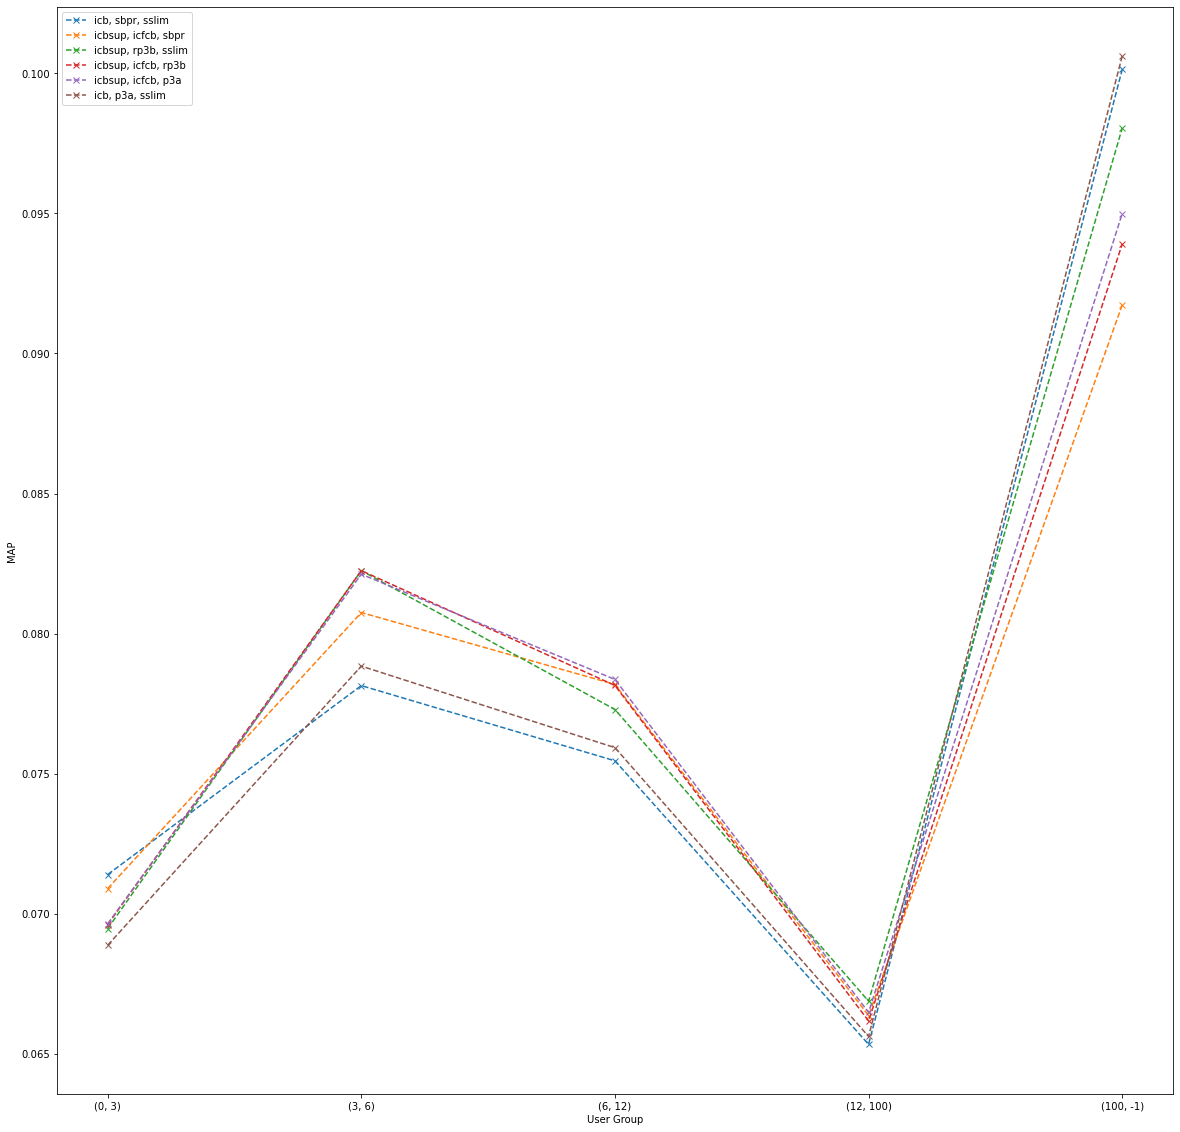

In [26]:
import matplotlib.pyplot as pyplot
%matplotlib inline  
pyplot.figure(figsize=(20,20))
for key, isCombo in to_be_plotted:
    l=[]
    if isCombo:
        for combo_dict in MAP_combo_per_group:
            l.append(combo_dict[key])
        if random.random() > 0.5:
            style = '--o'
        else:
            style = '--x'
        label = combo_labels['combo'+str(key+1)]
    """
    else:
        for merged_dict in MAP_merged_per_group:
            l.append(merged_dict[key])
        style = '--x'
        label = merged_labels[key]
        """
    pyplot.plot(l, style, label = label)

pyplot.xticks(ticks=range(0,len(f_ranges)), labels=f_ranges)
pyplot.ylabel('MAP')
pyplot.xlabel('User Group')
pyplot.legend()
pyplot.show()

---
### 4 Range

In [27]:
f_ranges = [
    (0,5),
    (5,10),
    (10,22),
    (22,-1)
]

MAP_combo_per_group = []
cutoff = 10

for f_range in f_ranges:
    
    
    combo_dict={}
    for k in range (num_combo):
        r = []
        for i in range (len(URM_list)):
            URM_test_group = parser.filter_URM_test_by_range(URM_list[i], URM_test_list[i], f_range)
            evaluator_test = EvaluatorHoldout(URM_test_group, cutoff_list=[cutoff])
            if not isinstance(list_rec[k][0], list):
                rec = list_rec[k][0]
                try:
                    rec = rec(URM_list[i], ICM_all, verbose = False)
                except:
                    rec = rec(URM_list[i], verbose=False)
                try:
                    rec.load_model(f'stored_recommenders/seed_{str(seed)}_hybrid_search3/{rec.RECOMMENDER_NAME}/', f'{str(seed)}_fold-{str(i)}')
                    print(f"{rec.RECOMMENDER_NAME} loaded. [seed={seed}, fold={i}]")
                except:
                    print(f"Fitting {rec.RECOMMENDER_NAME} ... [seed={seed}, fold={i}]")
                    rec.fit(**list_rec[k][1])
                    print(f"done.")
                    rec.save_model(f'stored_recommenders/seed_{str(seed)}_hybrid_search3/{rec.RECOMMENDER_NAME}/', f'{str(seed)}_fold-{str(i)}')
            else:
                rec = HybridCombinationSearchCV3(URM_list[i], ICM_all, list_rec[k][0], seed = seed, fold = i)
                rec.fit(**list_rec[k][1])

            results, _ = evaluator_test.evaluateRecommender(rec)
            r.append(results[cutoff]["MAP"])
        combo_dict[k]=np.average(r)

    MAP_combo_per_group.append(combo_dict)

HybridCombinationSearchCV3: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCV3: URM Detected 2381 (9.17 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=0]
ItemKNNCFRecommender loaded. [seed=1666, fold=0]
P3alphaRecommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 2128 ( 100.00% ) in 2.34 sec. Users per second: 909
HybridCombinationSearchCV3: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCV3: URM Detected 2439 (9.39 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=1]
ItemKNNCFRecommender loaded. [seed=1666, fold=1]
P3alphaRecommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 2085 ( 100.00% ) in 2.30 sec. Users per second: 907
HybridCombinationSearchCV3: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCV3: URM Detected 2402 (9.25 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=2]
ItemKNNCFRecommender loaded. [seed=1666, fold=2]
P3alphaRecommender loaded. [seed=1666, fold=2]
Evalua

EvaluatorHoldout: Processed 2131 ( 100.00% ) in 2.18 sec. Users per second: 977
HybridCombinationSearchCV3: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCV3: URM Detected 2338 (9.00 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=3]
RP3betaRecommender loaded. [seed=1666, fold=3]
P3alphaRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 2107 ( 100.00% ) in 2.23 sec. Users per second: 944
HybridCombinationSearchCV3: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCV3: URM Detected 2398 (9.23 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=4]
RP3betaRecommender loaded. [seed=1666, fold=4]
P3alphaRecommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 2085 ( 100.00% ) in 2.16 sec. Users per second: 963
HybridCombinationSearchCV3: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCV3: URM Detected 2381 (9.17 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=0]
UserKNNCFRecommender loade

ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=0]
P3alphaRecommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 2128 ( 100.00% ) in 2.41 sec. Users per second: 881
HybridCombinationSearchCV3: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCV3: URM Detected 2439 (9.39 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=1]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=1]
P3alphaRecommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 2085 ( 100.00% ) in 2.23 sec. Users per second: 934
HybridCombinationSearchCV3: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCV3: URM Detected 2402 (9.25 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=2]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=2]
P3alphaRecommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 2131 ( 100.00% ) in 2.28 sec. Users per second: 937
HybridCombinationSearchCV3: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCV

ItemKNNCBFRecommender loaded. [seed=1666, fold=3]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=3]
SLIM_BPR_Recommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 2107 ( 100.00% ) in 2.30 sec. Users per second: 915
HybridCombinationSearchCV3: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCV3: URM Detected 2398 (9.23 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=4]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=4]
SLIM_BPR_Recommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 2085 ( 100.00% ) in 2.35 sec. Users per second: 886
HybridCombinationSearchCV3: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCV3: URM Detected 2381 (9.17 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=0]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=0]
ItemKNNCFRecommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 2128 ( 100.00% ) in 2.41 sec. Users per second: 881
HybridCombinationSearchCV3: URM De

Special-ItemKNNCBFRec loaded. [seed=1666, fold=1]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=1]
UserKNNCFRecommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 2085 ( 100.00% ) in 2.41 sec. Users per second: 863
HybridCombinationSearchCV3: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCV3: URM Detected 2402 (9.25 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=2]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=2]
UserKNNCFRecommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 2131 ( 100.00% ) in 2.48 sec. Users per second: 860
HybridCombinationSearchCV3: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCV3: URM Detected 2338 (9.00 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=3]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=3]
UserKNNCFRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 2107 ( 100.00% ) in 2.46 sec. Users per second: 857
HybridCombinationSearchCV3: URM De

Special-ItemKNNCBFRec loaded. [seed=1666, fold=4]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=4]
RP3betaRecommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 2085 ( 100.00% ) in 2.38 sec. Users per second: 878
HybridCombinationSearchCV3: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCV3: URM Detected 2381 (9.17 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=0]
ItemKNNCFRecommender loaded. [seed=1666, fold=0]
UserKNNCFRecommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 2128 ( 100.00% ) in 2.38 sec. Users per second: 893
HybridCombinationSearchCV3: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCV3: URM Detected 2439 (9.39 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=1]
ItemKNNCFRecommender loaded. [seed=1666, fold=1]
UserKNNCFRecommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 2085 ( 100.00% ) in 2.30 sec. Users per second: 906
HybridCombinationSearchCV3: URM Detected 56 (0.7

Special-ItemKNNCBFRec loaded. [seed=1666, fold=2]
UserKNNCFRecommender loaded. [seed=1666, fold=2]
P3alphaRecommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 2131 ( 100.00% ) in 2.30 sec. Users per second: 928
HybridCombinationSearchCV3: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCV3: URM Detected 2338 (9.00 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=3]
UserKNNCFRecommender loaded. [seed=1666, fold=3]
P3alphaRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 2107 ( 100.00% ) in 2.37 sec. Users per second: 891
HybridCombinationSearchCV3: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCV3: URM Detected 2398 (9.23 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=4]
UserKNNCFRecommender loaded. [seed=1666, fold=4]
P3alphaRecommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 2085 ( 100.00% ) in 2.34 sec. Users per second: 891
HybridCombinationSearchCV3: URM Detected 48 (0.60 %) cold 

Special-ItemKNNCBFRec loaded. [seed=1666, fold=0]
P3alphaRecommender loaded. [seed=1666, fold=0]
S-SLIMElasticNet loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 2128 ( 100.00% ) in 3.21 sec. Users per second: 663
HybridCombinationSearchCV3: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCV3: URM Detected 2439 (9.39 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=1]
P3alphaRecommender loaded. [seed=1666, fold=1]
S-SLIMElasticNet loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 2085 ( 100.00% ) in 3.21 sec. Users per second: 650
HybridCombinationSearchCV3: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCV3: URM Detected 2402 (9.25 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=2]
P3alphaRecommender loaded. [seed=1666, fold=2]
S-SLIMElasticNet loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 2131 ( 100.00% ) in 3.31 sec. Users per second: 643
HybridCombinationSearchCV3: URM Detected 65 (0.82 %) cold users.
Hybri

Special-ItemKNNCBFRec loaded. [seed=1666, fold=3]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=3]
S-SLIMElasticNet loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 2107 ( 100.00% ) in 3.30 sec. Users per second: 638
HybridCombinationSearchCV3: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCV3: URM Detected 2398 (9.23 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=4]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=4]
S-SLIMElasticNet loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 2085 ( 100.00% ) in 3.24 sec. Users per second: 644
HybridCombinationSearchCV3: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCV3: URM Detected 2381 (9.17 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=0]
RP3betaRecommender loaded. [seed=1666, fold=0]
S-SLIMElasticNet loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 2128 ( 100.00% ) in 3.20 sec. Users per second: 665
HybridCombinationSearchCV3: URM Detected 68 (0.86 %) c

ItemKNNCBFRecommender loaded. [seed=1666, fold=1]
P3alphaRecommender loaded. [seed=1666, fold=1]
S-SLIMElasticNet loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 2085 ( 100.00% ) in 3.03 sec. Users per second: 688
HybridCombinationSearchCV3: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCV3: URM Detected 2402 (9.25 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=2]
P3alphaRecommender loaded. [seed=1666, fold=2]
S-SLIMElasticNet loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 2131 ( 100.00% ) in 3.20 sec. Users per second: 665
HybridCombinationSearchCV3: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCV3: URM Detected 2338 (9.00 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=3]
P3alphaRecommender loaded. [seed=1666, fold=3]
S-SLIMElasticNet loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 2107 ( 100.00% ) in 3.21 sec. Users per second: 657
HybridCombinationSearchCV3: URM Detected 77 (0.97 %) cold users.
Hybri

SLIM_BPR_Recommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 2107 ( 100.00% ) in 1.22 sec. Users per second: 1722
SLIM_BPR_Recommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 2085 ( 100.00% ) in 1.24 sec. Users per second: 1686
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 2128 ( 100.00% ) in 1.36 sec. Users per second: 1569
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 2085 ( 100.00% ) in 1.36 sec. Users per second: 1529
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 2131 ( 100.00% ) in 1.35 sec. Users per second: 1581
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 2107 ( 100.00% ) in 1.36 sec. Users per second: 1545
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 2085 ( 100.00% ) in 1.30 sec. Users per second: 1603
S-SLIMElasticNet loaded. [seed=1666, fold=0]
EvaluatorHoldou

HybridCombinationSearchCV3: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCV3: URM Detected 2402 (9.25 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=2]
ItemKNNCFRecommender loaded. [seed=1666, fold=2]
RP3betaRecommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 1556 ( 100.00% ) in 1.82 sec. Users per second: 853
HybridCombinationSearchCV3: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCV3: URM Detected 2338 (9.00 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=3]
ItemKNNCFRecommender loaded. [seed=1666, fold=3]
RP3betaRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 1557 ( 100.00% ) in 1.85 sec. Users per second: 842
HybridCombinationSearchCV3: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCV3: URM Detected 2398 (9.23 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=4]
ItemKNNCFRecommender loaded. [seed=1666, fold=4]
RP3betaRecommender loaded. [seed=1666, fold=4]
Evalua

EvaluatorHoldout: Processed 1522 ( 100.00% ) in 1.65 sec. Users per second: 922
HybridCombinationSearchCV3: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCV3: URM Detected 2381 (9.17 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=0]
UserKNNCFRecommender loaded. [seed=1666, fold=0]
RP3betaRecommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 1544 ( 100.00% ) in 1.77 sec. Users per second: 872
HybridCombinationSearchCV3: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCV3: URM Detected 2439 (9.39 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=1]
UserKNNCFRecommender loaded. [seed=1666, fold=1]
RP3betaRecommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 1531 ( 100.00% ) in 1.68 sec. Users per second: 913
HybridCombinationSearchCV3: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCV3: URM Detected 2402 (9.25 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=2]
UserKNNCFRecommender l

ItemKNNCBFRecommender loaded. [seed=1666, fold=2]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=2]
RP3betaRecommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 1556 ( 100.00% ) in 1.92 sec. Users per second: 809
HybridCombinationSearchCV3: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCV3: URM Detected 2338 (9.00 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=3]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=3]
RP3betaRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 1557 ( 100.00% ) in 2.04 sec. Users per second: 762
HybridCombinationSearchCV3: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCV3: URM Detected 2398 (9.23 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=4]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=4]
RP3betaRecommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 1522 ( 100.00% ) in 1.94 sec. Users per second: 783
HybridCombinationSearchCV3: URM Detected

HybridCombinationSearchCV3: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCV3: URM Detected 2381 (9.17 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=0]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=0]
P3alphaRecommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 1544 ( 100.00% ) in 2.14 sec. Users per second: 723
HybridCombinationSearchCV3: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCV3: URM Detected 2439 (9.39 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=1]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=1]
P3alphaRecommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 1531 ( 100.00% ) in 1.99 sec. Users per second: 770
HybridCombinationSearchCV3: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCV3: URM Detected 2402 (9.25 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=2]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=2]
P3alphaRecommender loaded. [seed=16

Special-ItemKNNCBFRec loaded. [seed=1666, fold=2]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=2]
SLIM_BPR_Recommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 1556 ( 100.00% ) in 2.13 sec. Users per second: 730
HybridCombinationSearchCV3: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCV3: URM Detected 2338 (9.00 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=3]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=3]
SLIM_BPR_Recommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 1557 ( 100.00% ) in 2.06 sec. Users per second: 755
HybridCombinationSearchCV3: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCV3: URM Detected 2398 (9.23 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=4]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=4]
SLIM_BPR_Recommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 1522 ( 100.00% ) in 2.01 sec. Users per second: 757
HybridCombinationSearchCV3: URM De

Special-ItemKNNCBFRec loaded. [seed=1666, fold=0]
ItemKNNCFRecommender loaded. [seed=1666, fold=0]
SLIM_BPR_Recommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 1544 ( 100.00% ) in 2.17 sec. Users per second: 713
HybridCombinationSearchCV3: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCV3: URM Detected 2439 (9.39 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=1]
ItemKNNCFRecommender loaded. [seed=1666, fold=1]
SLIM_BPR_Recommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 1531 ( 100.00% ) in 2.01 sec. Users per second: 763
HybridCombinationSearchCV3: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCV3: URM Detected 2402 (9.25 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=2]
ItemKNNCFRecommender loaded. [seed=1666, fold=2]
SLIM_BPR_Recommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 1556 ( 100.00% ) in 2.16 sec. Users per second: 719
HybridCombinationSearchCV3: URM Detected 65 (0.82 %)

Special-ItemKNNCBFRec loaded. [seed=1666, fold=3]
UserKNNCFRecommender loaded. [seed=1666, fold=3]
RP3betaRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 1557 ( 100.00% ) in 2.06 sec. Users per second: 757
HybridCombinationSearchCV3: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCV3: URM Detected 2398 (9.23 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=4]
UserKNNCFRecommender loaded. [seed=1666, fold=4]
RP3betaRecommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 1522 ( 100.00% ) in 2.02 sec. Users per second: 755
HybridCombinationSearchCV3: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCV3: URM Detected 2381 (9.17 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=0]
UserKNNCFRecommender loaded. [seed=1666, fold=0]
SLIM_BPR_Recommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 1544 ( 100.00% ) in 1.98 sec. Users per second: 781
HybridCombinationSearchCV3: URM Detected 68 (0.86 %) col

Special-ItemKNNCBFRec loaded. [seed=1666, fold=1]
UserKNNCFRecommender loaded. [seed=1666, fold=1]
S-SLIMElasticNet loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 1531 ( 100.00% ) in 2.73 sec. Users per second: 561
HybridCombinationSearchCV3: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCV3: URM Detected 2402 (9.25 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=2]
UserKNNCFRecommender loaded. [seed=1666, fold=2]
S-SLIMElasticNet loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 1556 ( 100.00% ) in 2.65 sec. Users per second: 588
HybridCombinationSearchCV3: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCV3: URM Detected 2338 (9.00 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=3]
UserKNNCFRecommender loaded. [seed=1666, fold=3]
S-SLIMElasticNet loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 1557 ( 100.00% ) in 2.71 sec. Users per second: 575
HybridCombinationSearchCV3: URM Detected 77 (0.97 %) cold users.

Special-ItemKNNCBFRec loaded. [seed=1666, fold=4]
RP3betaRecommender loaded. [seed=1666, fold=4]
S-SLIMElasticNet loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 1522 ( 100.00% ) in 2.68 sec. Users per second: 568
HybridCombinationSearchCV3: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCV3: URM Detected 2381 (9.17 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=0]
SLIM_BPR_Recommender loaded. [seed=1666, fold=0]
S-SLIMElasticNet loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 1544 ( 100.00% ) in 2.48 sec. Users per second: 621
HybridCombinationSearchCV3: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCV3: URM Detected 2439 (9.39 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=1]
SLIM_BPR_Recommender loaded. [seed=1666, fold=1]
S-SLIMElasticNet loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 1531 ( 100.00% ) in 2.48 sec. Users per second: 618
HybridCombinationSearchCV3: URM Detected 56 (0.70 %) cold users.
H

P3alphaRecommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 1544 ( 100.00% ) in 0.93 sec. Users per second: 1661
P3alphaRecommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 1531 ( 100.00% ) in 0.93 sec. Users per second: 1647
P3alphaRecommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 1556 ( 100.00% ) in 0.97 sec. Users per second: 1609
P3alphaRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 1557 ( 100.00% ) in 0.93 sec. Users per second: 1682
P3alphaRecommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 1522 ( 100.00% ) in 0.92 sec. Users per second: 1653
ItemKNNCFRecommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 1544 ( 100.00% ) in 1.02 sec. Users per second: 1514
ItemKNNCFRecommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 1531 ( 100.00% ) in 1.00 sec. Users per second: 1529
ItemKNNCFRecommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 1556 ( 100.00% ) in 1.0

PureSVDRecommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 1544 ( 100.00% ) in 1.22 sec. Users per second: 1262
PureSVDRecommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 1531 ( 100.00% ) in 1.29 sec. Users per second: 1191
PureSVDRecommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 1556 ( 100.00% ) in 1.26 sec. Users per second: 1237
PureSVDRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 1557 ( 100.00% ) in 1.24 sec. Users per second: 1255
PureSVDRecommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 1522 ( 100.00% ) in 1.19 sec. Users per second: 1277
Special-ItemKNNCBFRec loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 1544 ( 100.00% ) in 1.13 sec. Users per second: 1363
Special-ItemKNNCBFRec loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 1531 ( 100.00% ) in 1.18 sec. Users per second: 1299
Special-ItemKNNCBFRec loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 1556 ( 100.00% ) in 

EvaluatorHoldout: Processed 1096 ( 100.00% ) in 1.39 sec. Users per second: 790
HybridCombinationSearchCV3: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCV3: URM Detected 2338 (9.00 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=3]
ItemKNNCFRecommender loaded. [seed=1666, fold=3]
UserKNNCFRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 1103 ( 100.00% ) in 1.40 sec. Users per second: 788
HybridCombinationSearchCV3: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCV3: URM Detected 2398 (9.23 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=4]
ItemKNNCFRecommender loaded. [seed=1666, fold=4]
UserKNNCFRecommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 1130 ( 100.00% ) in 1.42 sec. Users per second: 797
HybridCombinationSearchCV3: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCV3: URM Detected 2381 (9.17 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=0]
RP3betaRecommender

ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=0]
ItemKNNCFRecommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 1107 ( 100.00% ) in 1.64 sec. Users per second: 677
HybridCombinationSearchCV3: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCV3: URM Detected 2439 (9.39 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=1]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=1]
ItemKNNCFRecommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 1103 ( 100.00% ) in 1.66 sec. Users per second: 664
HybridCombinationSearchCV3: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCV3: URM Detected 2402 (9.25 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=2]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=2]
ItemKNNCFRecommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 1096 ( 100.00% ) in 1.63 sec. Users per second: 671
HybridCombinationSearchCV3: URM Detected 65 (0.82 %) cold users.
HybridCombinationSe

ItemKNNCBFRecommender loaded. [seed=1666, fold=3]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=3]
UserKNNCFRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 1103 ( 100.00% ) in 1.60 sec. Users per second: 690
HybridCombinationSearchCV3: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCV3: URM Detected 2398 (9.23 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=4]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=4]
UserKNNCFRecommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 1130 ( 100.00% ) in 1.65 sec. Users per second: 685
HybridCombinationSearchCV3: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCV3: URM Detected 2381 (9.17 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=0]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=0]
SLIM_BPR_Recommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 1107 ( 100.00% ) in 1.69 sec. Users per second: 655
HybridCombinationSearchCV3: URM De

HybridCombinationSearchCV3: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCV3: URM Detected 2439 (9.39 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=1]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=1]
RP3betaRecommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 1103 ( 100.00% ) in 1.82 sec. Users per second: 607
HybridCombinationSearchCV3: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCV3: URM Detected 2402 (9.25 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=2]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=2]
RP3betaRecommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 1096 ( 100.00% ) in 1.73 sec. Users per second: 632
HybridCombinationSearchCV3: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCV3: URM Detected 2338 (9.00 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=3]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=3]
RP3betaRecommender loaded. [seed=16

Special-ItemKNNCBFRec loaded. [seed=1666, fold=3]
ItemKNNCFRecommender loaded. [seed=1666, fold=3]
P3alphaRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 1103 ( 100.00% ) in 1.61 sec. Users per second: 683
HybridCombinationSearchCV3: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCV3: URM Detected 2398 (9.23 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=4]
ItemKNNCFRecommender loaded. [seed=1666, fold=4]
P3alphaRecommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 1130 ( 100.00% ) in 1.71 sec. Users per second: 661
HybridCombinationSearchCV3: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCV3: URM Detected 2381 (9.17 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=0]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=0]
RP3betaRecommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 1107 ( 100.00% ) in 1.78 sec. Users per second: 623
HybridCombinationSearchCV3: URM Detected 68 (0.86 %)

Special-ItemKNNCBFRec loaded. [seed=1666, fold=1]
P3alphaRecommender loaded. [seed=1666, fold=1]
RP3betaRecommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 1103 ( 100.00% ) in 1.92 sec. Users per second: 573
HybridCombinationSearchCV3: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCV3: URM Detected 2402 (9.25 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=2]
P3alphaRecommender loaded. [seed=1666, fold=2]
RP3betaRecommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 1096 ( 100.00% ) in 1.70 sec. Users per second: 645
HybridCombinationSearchCV3: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCV3: URM Detected 2338 (9.00 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=3]
P3alphaRecommender loaded. [seed=1666, fold=3]
RP3betaRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 1103 ( 100.00% ) in 1.78 sec. Users per second: 619
HybridCombinationSearchCV3: URM Detected 77 (0.97 %) cold users.

Special-ItemKNNCBFRec loaded. [seed=1666, fold=4]
UserKNNCFRecommender loaded. [seed=1666, fold=4]
SLIM_BPR_Recommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 1130 ( 100.00% ) in 1.88 sec. Users per second: 602
HybridCombinationSearchCV3: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCV3: URM Detected 2381 (9.17 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=0]
SLIM_BPR_Recommender loaded. [seed=1666, fold=0]
S-SLIMElasticNet loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 1107 ( 100.00% ) in 2.47 sec. Users per second: 447
HybridCombinationSearchCV3: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCV3: URM Detected 2439 (9.39 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=1]
SLIM_BPR_Recommender loaded. [seed=1666, fold=1]
S-SLIMElasticNet loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 1103 ( 100.00% ) in 2.48 sec. Users per second: 445
HybridCombinationSearchCV3: URM Detected 56 (0.70 %) cold us

Special-ItemKNNCBFRec loaded. [seed=1666, fold=2]
ItemKNNCFRecommender loaded. [seed=1666, fold=2]
S-SLIMElasticNet loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 1096 ( 100.00% ) in 2.38 sec. Users per second: 460
HybridCombinationSearchCV3: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCV3: URM Detected 2338 (9.00 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=3]
ItemKNNCFRecommender loaded. [seed=1666, fold=3]
S-SLIMElasticNet loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 1103 ( 100.00% ) in 2.33 sec. Users per second: 473
HybridCombinationSearchCV3: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCV3: URM Detected 2398 (9.23 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=4]
ItemKNNCFRecommender loaded. [seed=1666, fold=4]
S-SLIMElasticNet loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 1130 ( 100.00% ) in 2.34 sec. Users per second: 483
HybridCombinationSearchCV3: URM Detected 48 (0.60 %) cold users.

ItemKNNCBFRecommender loaded. [seed=1666, fold=0]
RP3betaRecommender loaded. [seed=1666, fold=0]
S-SLIMElasticNet loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 1107 ( 100.00% ) in 2.14 sec. Users per second: 516
HybridCombinationSearchCV3: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCV3: URM Detected 2439 (9.39 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=1]
RP3betaRecommender loaded. [seed=1666, fold=1]
S-SLIMElasticNet loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 1103 ( 100.00% ) in 2.28 sec. Users per second: 483
HybridCombinationSearchCV3: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCV3: URM Detected 2402 (9.25 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=2]
RP3betaRecommender loaded. [seed=1666, fold=2]
S-SLIMElasticNet loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 1096 ( 100.00% ) in 2.14 sec. Users per second: 511
HybridCombinationSearchCV3: URM Detected 65 (0.82 %) cold users.
Hybri

EvaluatorHoldout: Processed 1103 ( 100.00% ) in 0.79 sec. Users per second: 1395
UserKNNCFRecommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 1096 ( 100.00% ) in 0.74 sec. Users per second: 1486
UserKNNCFRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 1103 ( 100.00% ) in 0.71 sec. Users per second: 1552
UserKNNCFRecommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 1130 ( 100.00% ) in 0.73 sec. Users per second: 1550
ItemKNNCBFRecommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 1107 ( 100.00% ) in 0.78 sec. Users per second: 1426
ItemKNNCBFRecommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 1103 ( 100.00% ) in 0.75 sec. Users per second: 1478
ItemKNNCBFRecommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 1096 ( 100.00% ) in 0.73 sec. Users per second: 1512
ItemKNNCBFRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 1103 ( 100.00% ) in 0.76 sec. Users per second: 1455
ItemK

EvaluatorHoldout: Processed 840 ( 100.00% ) in 1.47 sec. Users per second: 570
HybridCombinationSearchCV3: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCV3: URM Detected 2439 (9.39 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=1]
ItemKNNCFRecommender loaded. [seed=1666, fold=1]
P3alphaRecommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 829 ( 100.00% ) in 1.51 sec. Users per second: 550
HybridCombinationSearchCV3: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCV3: URM Detected 2402 (9.25 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=2]
ItemKNNCFRecommender loaded. [seed=1666, fold=2]
P3alphaRecommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 851 ( 100.00% ) in 1.66 sec. Users per second: 514
HybridCombinationSearchCV3: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCV3: URM Detected 2338 (9.00 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=3]
ItemKNNCFRecommender load

RP3betaRecommender loaded. [seed=1666, fold=3]
P3alphaRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 841 ( 100.00% ) in 1.40 sec. Users per second: 603
HybridCombinationSearchCV3: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCV3: URM Detected 2398 (9.23 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=4]
RP3betaRecommender loaded. [seed=1666, fold=4]
P3alphaRecommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 838 ( 100.00% ) in 1.43 sec. Users per second: 586
HybridCombinationSearchCV3: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCV3: URM Detected 2381 (9.17 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=0]
UserKNNCFRecommender loaded. [seed=1666, fold=0]
P3alphaRecommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 840 ( 100.00% ) in 1.27 sec. Users per second: 660
HybridCombinationSearchCV3: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCV3: URM Detected 2439 (9.3

ItemKNNCBFRecommender loaded. [seed=1666, fold=1]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=1]
P3alphaRecommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 829 ( 100.00% ) in 1.73 sec. Users per second: 480
HybridCombinationSearchCV3: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCV3: URM Detected 2402 (9.25 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=2]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=2]
P3alphaRecommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 851 ( 100.00% ) in 1.81 sec. Users per second: 470
HybridCombinationSearchCV3: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCV3: URM Detected 2338 (9.00 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=3]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=3]
P3alphaRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 841 ( 100.00% ) in 1.71 sec. Users per second: 491
HybridCombinationSearchCV3: URM Detected 77

ItemKNNCBFRecommender loaded. [seed=1666, fold=4]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=4]
SLIM_BPR_Recommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 838 ( 100.00% ) in 2.16 sec. Users per second: 388
HybridCombinationSearchCV3: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCV3: URM Detected 2381 (9.17 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=0]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=0]
ItemKNNCFRecommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 840 ( 100.00% ) in 2.33 sec. Users per second: 360
HybridCombinationSearchCV3: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCV3: URM Detected 2439 (9.39 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=1]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=1]
ItemKNNCFRecommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 829 ( 100.00% ) in 2.27 sec. Users per second: 366
HybridCombinationSearchCV3: URM Detec

Special-ItemKNNCBFRec loaded. [seed=1666, fold=2]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=2]
UserKNNCFRecommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 851 ( 100.00% ) in 2.18 sec. Users per second: 390
HybridCombinationSearchCV3: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCV3: URM Detected 2338 (9.00 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=3]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=3]
UserKNNCFRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 841 ( 100.00% ) in 2.05 sec. Users per second: 411
HybridCombinationSearchCV3: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCV3: URM Detected 2398 (9.23 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=4]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=4]
UserKNNCFRecommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 838 ( 100.00% ) in 2.07 sec. Users per second: 405
HybridCombinationSearchCV3: URM Detec

Special-ItemKNNCBFRec loaded. [seed=1666, fold=0]
ItemKNNCFRecommender loaded. [seed=1666, fold=0]
UserKNNCFRecommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 840 ( 100.00% ) in 1.81 sec. Users per second: 463
HybridCombinationSearchCV3: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCV3: URM Detected 2439 (9.39 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=1]
ItemKNNCFRecommender loaded. [seed=1666, fold=1]
UserKNNCFRecommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 829 ( 100.00% ) in 1.77 sec. Users per second: 469
HybridCombinationSearchCV3: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCV3: URM Detected 2402 (9.25 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=2]
ItemKNNCFRecommender loaded. [seed=1666, fold=2]
UserKNNCFRecommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 851 ( 100.00% ) in 1.93 sec. Users per second: 441
HybridCombinationSearchCV3: URM Detected 65 (0.82 %) co

Special-ItemKNNCBFRec loaded. [seed=1666, fold=3]
UserKNNCFRecommender loaded. [seed=1666, fold=3]
P3alphaRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 841 ( 100.00% ) in 1.87 sec. Users per second: 451
HybridCombinationSearchCV3: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCV3: URM Detected 2398 (9.23 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=4]
UserKNNCFRecommender loaded. [seed=1666, fold=4]
P3alphaRecommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 838 ( 100.00% ) in 1.82 sec. Users per second: 462
HybridCombinationSearchCV3: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCV3: URM Detected 2381 (9.17 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=0]
UserKNNCFRecommender loaded. [seed=1666, fold=0]
RP3betaRecommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 840 ( 100.00% ) in 1.92 sec. Users per second: 437
HybridCombinationSearchCV3: URM Detected 68 (0.86 %) cold use

Special-ItemKNNCBFRec loaded. [seed=1666, fold=1]
P3alphaRecommender loaded. [seed=1666, fold=1]
S-SLIMElasticNet loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 829 ( 100.00% ) in 2.41 sec. Users per second: 344
HybridCombinationSearchCV3: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCV3: URM Detected 2402 (9.25 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=2]
P3alphaRecommender loaded. [seed=1666, fold=2]
S-SLIMElasticNet loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 851 ( 100.00% ) in 2.46 sec. Users per second: 346
HybridCombinationSearchCV3: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCV3: URM Detected 2338 (9.00 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=3]
P3alphaRecommender loaded. [seed=1666, fold=3]
S-SLIMElasticNet loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 841 ( 100.00% ) in 2.42 sec. Users per second: 347
HybridCombinationSearchCV3: URM Detected 77 (0.97 %) cold users.
HybridCo

Special-ItemKNNCBFRec loaded. [seed=1666, fold=4]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=4]
S-SLIMElasticNet loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 838 ( 100.00% ) in 2.80 sec. Users per second: 299
HybridCombinationSearchCV3: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCV3: URM Detected 2381 (9.17 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=0]
RP3betaRecommender loaded. [seed=1666, fold=0]
S-SLIMElasticNet loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 840 ( 100.00% ) in 2.58 sec. Users per second: 325
HybridCombinationSearchCV3: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCV3: URM Detected 2439 (9.39 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=1]
RP3betaRecommender loaded. [seed=1666, fold=1]
S-SLIMElasticNet loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 829 ( 100.00% ) in 2.48 sec. Users per second: 335
HybridCombinationSearchCV3: URM Detected 56 (0.70 %) cold users.


ItemKNNCBFRecommender loaded. [seed=1666, fold=2]
P3alphaRecommender loaded. [seed=1666, fold=2]
S-SLIMElasticNet loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 851 ( 100.00% ) in 2.21 sec. Users per second: 386
HybridCombinationSearchCV3: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCV3: URM Detected 2338 (9.00 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=3]
P3alphaRecommender loaded. [seed=1666, fold=3]
S-SLIMElasticNet loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 841 ( 100.00% ) in 2.15 sec. Users per second: 392
HybridCombinationSearchCV3: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCV3: URM Detected 2398 (9.23 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=4]
P3alphaRecommender loaded. [seed=1666, fold=4]
S-SLIMElasticNet loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 838 ( 100.00% ) in 2.04 sec. Users per second: 410
RP3betaRecommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processe

ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 840 ( 100.00% ) in 1.16 sec. Users per second: 725
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 829 ( 100.00% ) in 1.08 sec. Users per second: 766
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 851 ( 100.00% ) in 1.13 sec. Users per second: 751
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 841 ( 100.00% ) in 1.10 sec. Users per second: 766
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 838 ( 100.00% ) in 1.22 sec. Users per second: 689
S-SLIMElasticNet loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 840 ( 100.00% ) in 1.30 sec. Users per second: 645
S-SLIMElasticNet loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 829 ( 100.00% ) in 1.35 sec. Users per second: 613
S-SLIMElasticNet loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 851 ( 100

In [28]:
to_be_plotted = []
for i in range(0, len (f_ranges)):
    print(f"RANGE {f_ranges[i]}")
    maxp = 0
    difference = 0
    old_name = ''
    max_name=''
    max_isCombo=None
    old_isCombo=None
    max_key=None
    old_key=None
    old_maxp=0
    
    combo_dict = MAP_combo_per_group[i]
    for key, value in combo_dict.items():
        #value = combo_dict.get(key)
        print(f"> MAP combo-{combo_labels['combo'+str(key+1)]}:\t {value}")
        if value > maxp:
            difference=value - maxp
            maxp=value
            old_name=max_name
            old_isCombo=max_isCombo
            max_name=combo_labels['combo'+str(key+1)]
            max_isCombo=True
            old_key=max_key
            max_key=key
        elif value > old_maxp:
            difference=maxp - value
            old_maxp=value
            old_name=combo_labels['combo'+str(key+1)]
            old_key=key
           
    if not check_if_present(to_be_plotted, (max_key, max_isCombo)):
        to_be_plotted.append((max_key, max_isCombo))
    
    if not old_key is None and not check_if_present(to_be_plotted, (old_key, old_isCombo)):
        to_be_plotted.append((old_key, old_isCombo))
    
    
    print(f"Max MAP is {maxp} from {max_name}({'COMBO' if max_isCombo else 'MERGED'}) with difference from previous max of {difference} from {old_name}({'COMBO' if old_isCombo else 'MERGED'}) \n")
        

RANGE (0, 5)
> MAP combo-icb, icf, p3a:	 0.06952926761728087
> MAP combo-icb, icf, rp3b:	 0.06929604869093683
> MAP combo-icb, icf, ucf:	 0.06813045616110953
> MAP combo-icb, rp3b, p3a:	 0.06926572000015238
> MAP combo-icb, ucf, p3a:	 0.07104663156709558
> MAP combo-icb, ucf, rp3b:	 0.07047161317827338
> MAP combo-icb, icfcb, icf:	 0.07235379367055042
> MAP combo-icb, icfcb, p3a:	 0.07315049424580614
> MAP combo-icb, icfcb, rp3b:	 0.07346281805585686
> MAP combo-icb, icfcb, ucf:	 0.07315280370017478
> MAP combo-icb, icfcb, sbpr:	 0.07338104203163517
> MAP combo-icbsup, icfcb, icf:	 0.07193623410399017
> MAP combo-icbsup, icfcb, p3a:	 0.0744120174932406
> MAP combo-icbsup, icfcb, rp3b:	 0.07445055238888965
> MAP combo-icbsup, icfcb, ucf:	 0.07254720592340981
> MAP combo-icbsup, icfcb, sbpr:	 0.07424196889134516
> MAP combo-icbsup, icf, p3a:	 0.07319654543970452
> MAP combo-icbsup, icfcb, rp3b:	 0.07442066376388037
> MAP combo-icbsup, icf, ucf:	 0.07096845812199129
> MAP combo-icbsup, ic

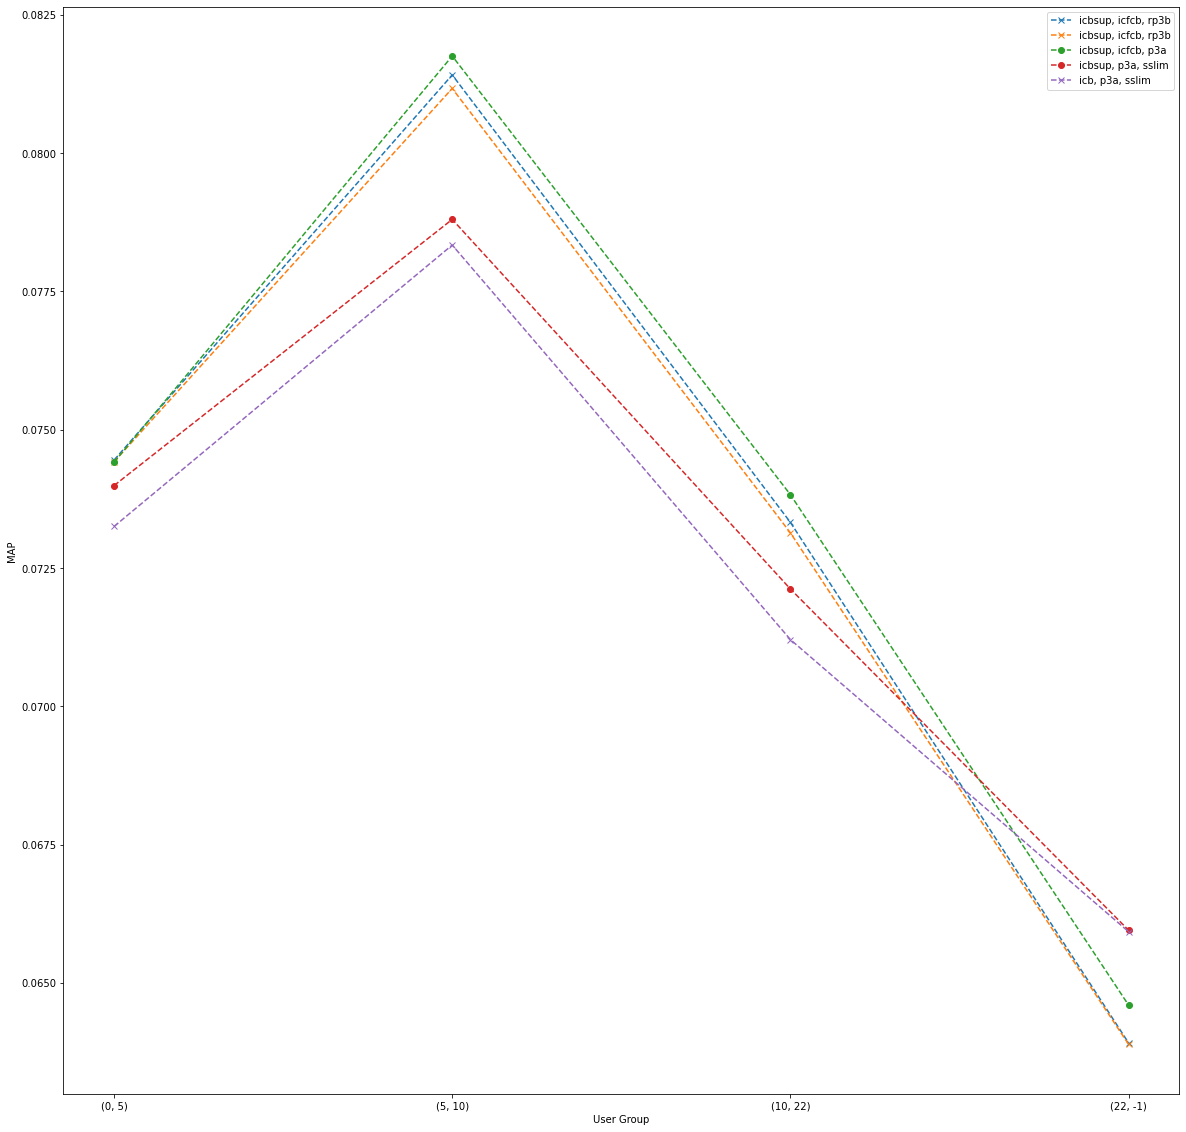

In [29]:
import matplotlib.pyplot as pyplot
%matplotlib inline  
pyplot.figure(figsize=(20,20))
for key, isCombo in to_be_plotted:
    l=[]
    if isCombo:
        for combo_dict in MAP_combo_per_group:
            l.append(combo_dict[key])
        if random.random() > 0.5:
            style = '--o'
        else:
            style = '--x'
        label = combo_labels['combo'+str(key+1)]
    """
    else:
        for merged_dict in MAP_merged_per_group:
            l.append(merged_dict[key])
        style = '--x'
        label = merged_labels[key]
        """
    pyplot.plot(l, style, label = label)

pyplot.xticks(ticks=range(0,len(f_ranges)), labels=f_ranges)
pyplot.ylabel('MAP')
pyplot.xlabel('User Group')
pyplot.legend()
pyplot.show()

---
### Fine-grained ranges

In [21]:
f_ranges = [
    (0,2),
    (2,3),
    (3,4),
    (4,5),
    (5,6),
    (6,7),
    (7,8),
    (9,10),
    (10,11),
    (11,12),
    (12,13),
    (13,14),
    (14,15),
    (15,16),
    (16,17),
    (17,18),
    (18,20),
    (20,22),
    (22,25),
    (25,30),
    (30,35),
    (35,40),
    (40,50),
    (50,75),
    (75,100),
    (100,200),
    (200,-1)
]

MAP_combo_per_group = []
cutoff = 10

for f_range in f_ranges:
    
    
    combo_dict={}
    for k in range (num_combo):
        r = []
        for i in range (len(URM_list)):
            URM_test_group = parser.filter_URM_test_by_range(URM_list[i], URM_test_list[i], f_range)
            evaluator_test = EvaluatorHoldout(URM_test_group, cutoff_list=[cutoff])
            if not isinstance(list_rec[k][0], list):
                rec = list_rec[k][0]
                try:
                    rec = rec(URM_list[i], ICM_all, verbose = False)
                except:
                    rec = rec(URM_list[i], verbose=False)
                try:
                    rec.load_model(f'stored_recommenders/seed_{str(seed)}_hybrid_search2/{rec.RECOMMENDER_NAME}/', f'{str(seed)}_fold-{str(i)}')
                    print(f"{rec.RECOMMENDER_NAME} loaded. [seed={seed}, fold={i}]")
                except:
                    print(f"Fitting {rec.RECOMMENDER_NAME} ... [seed={seed}, fold={i}]")
                    rec.fit(**list_rec[k][1])
                    print(f"done.")
                    rec.save_model(f'stored_recommenders/seed_{str(seed)}_hybrid_search2/{rec.RECOMMENDER_NAME}/', f'{str(seed)}_fold-{str(i)}')
            else:
                rec = HybridCombinationSearchCV2(URM_list[i], ICM_all, list_rec[k][0], seed = seed, fold = i)
                rec.fit(**list_rec[k][1])

            results, _ = evaluator_test.evaluateRecommender(rec)
            r.append(results[cutoff]["MAP"])
        combo_dict[k]=np.average(r)

    MAP_combo_per_group.append(combo_dict)

HybridCombinationSearchCV2: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCV2: URM Detected 2381 (9.17 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=0]
ItemKNNCFRecommender loaded. [seed=1666, fold=0]
P3alphaRecommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 470 ( 100.00% ) in 0.42 sec. Users per second: 1128
HybridCombinationSearchCV2: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCV2: URM Detected 2439 (9.39 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=1]
ItemKNNCFRecommender loaded. [seed=1666, fold=1]
P3alphaRecommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 458 ( 100.00% ) in 0.41 sec. Users per second: 1125
HybridCombinationSearchCV2: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCV2: URM Detected 2402 (9.25 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=2]
ItemKNNCFRecommender loaded. [seed=1666, fold=2]
P3alphaRecommender loaded. [seed=1666, fold=2]
Evalua

EvaluatorHoldout: Processed 492 ( 100.00% ) in 0.48 sec. Users per second: 1035
HybridCombinationSearchCV2: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCV2: URM Detected 2338 (9.00 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=3]
RP3betaRecommender loaded. [seed=1666, fold=3]
P3alphaRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 451 ( 100.00% ) in 0.44 sec. Users per second: 1033
HybridCombinationSearchCV2: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCV2: URM Detected 2398 (9.23 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=4]
RP3betaRecommender loaded. [seed=1666, fold=4]
P3alphaRecommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 463 ( 100.00% ) in 0.46 sec. Users per second: 1002
HybridCombinationSearchCV2: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCV2: URM Detected 2381 (9.17 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=0]
UserKNNCFRecommender loade

ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=0]
P3alphaRecommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 470 ( 100.00% ) in 0.52 sec. Users per second: 911
HybridCombinationSearchCV2: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCV2: URM Detected 2439 (9.39 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=1]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=1]
P3alphaRecommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 458 ( 100.00% ) in 0.51 sec. Users per second: 902
HybridCombinationSearchCV2: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCV2: URM Detected 2402 (9.25 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=2]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=2]
P3alphaRecommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 492 ( 100.00% ) in 0.56 sec. Users per second: 886
HybridCombinationSearchCV2: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCV2: 

ItemKNNCBFRecommender loaded. [seed=1666, fold=3]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=3]
SLIM_BPR_Recommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 451 ( 100.00% ) in 0.53 sec. Users per second: 850
HybridCombinationSearchCV2: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCV2: URM Detected 2398 (9.23 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=4]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=4]
SLIM_BPR_Recommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 463 ( 100.00% ) in 0.51 sec. Users per second: 903
HybridCombinationSearchCV2: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCV2: URM Detected 2381 (9.17 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=0]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=0]
ItemKNNCFRecommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 470 ( 100.00% ) in 0.53 sec. Users per second: 891
HybridCombinationSearchCV2: URM Detec

Special-ItemKNNCBFRec loaded. [seed=1666, fold=1]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=1]
UserKNNCFRecommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 458 ( 100.00% ) in 0.58 sec. Users per second: 785
HybridCombinationSearchCV2: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCV2: URM Detected 2402 (9.25 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=2]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=2]
UserKNNCFRecommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 492 ( 100.00% ) in 0.61 sec. Users per second: 813
HybridCombinationSearchCV2: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCV2: URM Detected 2338 (9.00 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=3]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=3]
UserKNNCFRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 451 ( 100.00% ) in 0.55 sec. Users per second: 819
HybridCombinationSearchCV2: URM Detec

Special-ItemKNNCBFRec loaded. [seed=1666, fold=4]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=4]
RP3betaRecommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 463 ( 100.00% ) in 0.53 sec. Users per second: 875
HybridCombinationSearchCV2: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCV2: URM Detected 2381 (9.17 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=0]
ItemKNNCFRecommender loaded. [seed=1666, fold=0]
UserKNNCFRecommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 470 ( 100.00% ) in 0.49 sec. Users per second: 963
HybridCombinationSearchCV2: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCV2: URM Detected 2439 (9.39 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=1]
ItemKNNCFRecommender loaded. [seed=1666, fold=1]
UserKNNCFRecommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 458 ( 100.00% ) in 0.47 sec. Users per second: 970
HybridCombinationSearchCV2: URM Detected 56 (0.70 %

Special-ItemKNNCBFRec loaded. [seed=1666, fold=2]
UserKNNCFRecommender loaded. [seed=1666, fold=2]
P3alphaRecommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 492 ( 100.00% ) in 0.53 sec. Users per second: 920
HybridCombinationSearchCV2: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCV2: URM Detected 2338 (9.00 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=3]
UserKNNCFRecommender loaded. [seed=1666, fold=3]
P3alphaRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 451 ( 100.00% ) in 0.45 sec. Users per second: 992
HybridCombinationSearchCV2: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCV2: URM Detected 2398 (9.23 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=4]
UserKNNCFRecommender loaded. [seed=1666, fold=4]
P3alphaRecommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 463 ( 100.00% ) in 0.50 sec. Users per second: 919
HybridCombinationSearchCV2: URM Detected 48 (0.60 %) cold use

Special-ItemKNNCBFRec loaded. [seed=1666, fold=0]
P3alphaRecommender loaded. [seed=1666, fold=0]
S-SLIMElasticNet loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 470 ( 100.00% ) in 0.71 sec. Users per second: 666
HybridCombinationSearchCV2: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCV2: URM Detected 2439 (9.39 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=1]
P3alphaRecommender loaded. [seed=1666, fold=1]
S-SLIMElasticNet loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 458 ( 100.00% ) in 0.95 sec. Users per second: 483
HybridCombinationSearchCV2: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCV2: URM Detected 2402 (9.25 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=2]
P3alphaRecommender loaded. [seed=1666, fold=2]
S-SLIMElasticNet loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 492 ( 100.00% ) in 0.86 sec. Users per second: 571
HybridCombinationSearchCV2: URM Detected 65 (0.82 %) cold users.
HybridCo

Special-ItemKNNCBFRec loaded. [seed=1666, fold=3]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=3]
S-SLIMElasticNet loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 451 ( 100.00% ) in 0.78 sec. Users per second: 575
HybridCombinationSearchCV2: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCV2: URM Detected 2398 (9.23 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=4]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=4]
S-SLIMElasticNet loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 463 ( 100.00% ) in 0.75 sec. Users per second: 614
HybridCombinationSearchCV2: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCV2: URM Detected 2381 (9.17 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=0]
RP3betaRecommender loaded. [seed=1666, fold=0]
S-SLIMElasticNet loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 470 ( 100.00% ) in 0.76 sec. Users per second: 621
HybridCombinationSearchCV2: URM Detected 68 (0.86 %) cold

ItemKNNCBFRecommender loaded. [seed=1666, fold=1]
P3alphaRecommender loaded. [seed=1666, fold=1]
S-SLIMElasticNet loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 458 ( 100.00% ) in 0.70 sec. Users per second: 655
HybridCombinationSearchCV2: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCV2: URM Detected 2402 (9.25 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=2]
P3alphaRecommender loaded. [seed=1666, fold=2]
S-SLIMElasticNet loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 492 ( 100.00% ) in 0.82 sec. Users per second: 596
HybridCombinationSearchCV2: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCV2: URM Detected 2338 (9.00 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=3]
P3alphaRecommender loaded. [seed=1666, fold=3]
S-SLIMElasticNet loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 451 ( 100.00% ) in 0.72 sec. Users per second: 623
HybridCombinationSearchCV2: URM Detected 77 (0.97 %) cold users.
HybridCo

SLIM_BPR_Recommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 463 ( 100.00% ) in 0.28 sec. Users per second: 1668
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 470 ( 100.00% ) in 0.26 sec. Users per second: 1788
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 458 ( 100.00% ) in 0.30 sec. Users per second: 1511
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 492 ( 100.00% ) in 0.32 sec. Users per second: 1514
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 451 ( 100.00% ) in 0.30 sec. Users per second: 1529
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 463 ( 100.00% ) in 0.30 sec. Users per second: 1551
S-SLIMElasticNet loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 470 ( 100.00% ) in 0.45 sec. Users per second: 1044
S-SLIMElasticNet loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processe

ItemKNNCBFRecommender loaded. [seed=1666, fold=2]
ItemKNNCFRecommender loaded. [seed=1666, fold=2]
RP3betaRecommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 640 ( 100.00% ) in 0.72 sec. Users per second: 894
HybridCombinationSearchCV2: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCV2: URM Detected 2338 (9.00 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=3]
ItemKNNCFRecommender loaded. [seed=1666, fold=3]
RP3betaRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 640 ( 100.00% ) in 0.66 sec. Users per second: 965
HybridCombinationSearchCV2: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCV2: URM Detected 2398 (9.23 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=4]
ItemKNNCFRecommender loaded. [seed=1666, fold=4]
RP3betaRecommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 596 ( 100.00% ) in 0.64 sec. Users per second: 931
HybridCombinationSearchCV2: URM Detected 48 (0.60 %) cold use

ItemKNNCBFRecommender loaded. [seed=1666, fold=0]
UserKNNCFRecommender loaded. [seed=1666, fold=0]
RP3betaRecommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 674 ( 100.00% ) in 0.78 sec. Users per second: 862
HybridCombinationSearchCV2: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCV2: URM Detected 2439 (9.39 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=1]
UserKNNCFRecommender loaded. [seed=1666, fold=1]
RP3betaRecommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 611 ( 100.00% ) in 0.63 sec. Users per second: 972
HybridCombinationSearchCV2: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCV2: URM Detected 2402 (9.25 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=2]
UserKNNCFRecommender loaded. [seed=1666, fold=2]
RP3betaRecommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 640 ( 100.00% ) in 0.69 sec. Users per second: 928
HybridCombinationSearchCV2: URM Detected 65 (0.82 %) cold use

ItemKNNCBFRecommender loaded. [seed=1666, fold=3]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=3]
RP3betaRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 640 ( 100.00% ) in 0.69 sec. Users per second: 931
HybridCombinationSearchCV2: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCV2: URM Detected 2398 (9.23 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=4]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=4]
RP3betaRecommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 596 ( 100.00% ) in 0.65 sec. Users per second: 919
HybridCombinationSearchCV2: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCV2: URM Detected 2381 (9.17 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=0]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=0]
UserKNNCFRecommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 674 ( 100.00% ) in 0.72 sec. Users per second: 934
HybridCombinationSearchCV2: URM Detected 

Special-ItemKNNCBFRec loaded. [seed=1666, fold=1]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=1]
P3alphaRecommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 611 ( 100.00% ) in 0.66 sec. Users per second: 922
HybridCombinationSearchCV2: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCV2: URM Detected 2402 (9.25 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=2]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=2]
P3alphaRecommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 640 ( 100.00% ) in 0.72 sec. Users per second: 890
HybridCombinationSearchCV2: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCV2: URM Detected 2338 (9.00 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=3]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=3]
P3alphaRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 640 ( 100.00% ) in 0.72 sec. Users per second: 886
HybridCombinationSearchCV2: URM Detected 77

Special-ItemKNNCBFRec loaded. [seed=1666, fold=4]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=4]
SLIM_BPR_Recommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 596 ( 100.00% ) in 0.67 sec. Users per second: 891
HybridCombinationSearchCV2: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCV2: URM Detected 2381 (9.17 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=0]
ItemKNNCFRecommender loaded. [seed=1666, fold=0]
P3alphaRecommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 674 ( 100.00% ) in 0.72 sec. Users per second: 935
HybridCombinationSearchCV2: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCV2: URM Detected 2439 (9.39 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=1]
ItemKNNCFRecommender loaded. [seed=1666, fold=1]
P3alphaRecommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 611 ( 100.00% ) in 0.64 sec. Users per second: 949
HybridCombinationSearchCV2: URM Detected 56 (0.70 %) 

Special-ItemKNNCBFRec loaded. [seed=1666, fold=2]
ItemKNNCFRecommender loaded. [seed=1666, fold=2]
SLIM_BPR_Recommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 640 ( 100.00% ) in 0.70 sec. Users per second: 921
HybridCombinationSearchCV2: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCV2: URM Detected 2338 (9.00 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=3]
ItemKNNCFRecommender loaded. [seed=1666, fold=3]
SLIM_BPR_Recommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 640 ( 100.00% ) in 0.72 sec. Users per second: 893
HybridCombinationSearchCV2: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCV2: URM Detected 2398 (9.23 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=4]
ItemKNNCFRecommender loaded. [seed=1666, fold=4]
SLIM_BPR_Recommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 596 ( 100.00% ) in 0.64 sec. Users per second: 936
HybridCombinationSearchCV2: URM Detected 48 (0.60 %) co

Special-ItemKNNCBFRec loaded. [seed=1666, fold=0]
UserKNNCFRecommender loaded. [seed=1666, fold=0]
SLIM_BPR_Recommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 674 ( 100.00% ) in 0.74 sec. Users per second: 913
HybridCombinationSearchCV2: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCV2: URM Detected 2439 (9.39 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=1]
UserKNNCFRecommender loaded. [seed=1666, fold=1]
SLIM_BPR_Recommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 611 ( 100.00% ) in 0.72 sec. Users per second: 847
HybridCombinationSearchCV2: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCV2: URM Detected 2402 (9.25 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=2]
UserKNNCFRecommender loaded. [seed=1666, fold=2]
SLIM_BPR_Recommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 640 ( 100.00% ) in 0.73 sec. Users per second: 879
HybridCombinationSearchCV2: URM Detected 65 (0.82 %) co

Special-ItemKNNCBFRec loaded. [seed=1666, fold=3]
UserKNNCFRecommender loaded. [seed=1666, fold=3]
S-SLIMElasticNet loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 640 ( 100.00% ) in 0.98 sec. Users per second: 650
HybridCombinationSearchCV2: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCV2: URM Detected 2398 (9.23 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=4]
UserKNNCFRecommender loaded. [seed=1666, fold=4]
S-SLIMElasticNet loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 596 ( 100.00% ) in 0.91 sec. Users per second: 655
HybridCombinationSearchCV2: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCV2: URM Detected 2381 (9.17 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=0]
ItemKNNCFRecommender loaded. [seed=1666, fold=0]
S-SLIMElasticNet loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 674 ( 100.00% ) in 1.09 sec. Users per second: 619
HybridCombinationSearchCV2: URM Detected 68 (0.86 %) cold users.
Hy

ItemKNNCBFRecommender loaded. [seed=1666, fold=1]
SLIM_BPR_Recommender loaded. [seed=1666, fold=1]
S-SLIMElasticNet loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 611 ( 100.00% ) in 0.88 sec. Users per second: 694
HybridCombinationSearchCV2: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCV2: URM Detected 2402 (9.25 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=2]
SLIM_BPR_Recommender loaded. [seed=1666, fold=2]
S-SLIMElasticNet loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 640 ( 100.00% ) in 0.96 sec. Users per second: 666
HybridCombinationSearchCV2: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCV2: URM Detected 2338 (9.00 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=3]
SLIM_BPR_Recommender loaded. [seed=1666, fold=3]
S-SLIMElasticNet loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 640 ( 100.00% ) in 0.99 sec. Users per second: 648
HybridCombinationSearchCV2: URM Detected 77 (0.97 %) cold users.
Hy

P3alphaRecommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 596 ( 100.00% ) in 0.36 sec. Users per second: 1637
ItemKNNCFRecommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 674 ( 100.00% ) in 0.44 sec. Users per second: 1536
ItemKNNCFRecommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 611 ( 100.00% ) in 0.39 sec. Users per second: 1559
ItemKNNCFRecommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 640 ( 100.00% ) in 0.38 sec. Users per second: 1690
ItemKNNCFRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 640 ( 100.00% ) in 0.40 sec. Users per second: 1601
ItemKNNCFRecommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 596 ( 100.00% ) in 0.35 sec. Users per second: 1712
UserKNNCFRecommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 674 ( 100.00% ) in 0.43 sec. Users per second: 1574
UserKNNCFRecommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 611 ( 100.00% ) in 0.3

EvaluatorHoldout: Processed 596 ( 100.00% ) in 0.51 sec. Users per second: 1159
Special-ItemKNNCBFRec loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 674 ( 100.00% ) in 0.43 sec. Users per second: 1585
Special-ItemKNNCBFRec loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 611 ( 100.00% ) in 0.37 sec. Users per second: 1637
Special-ItemKNNCBFRec loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 640 ( 100.00% ) in 0.41 sec. Users per second: 1564
Special-ItemKNNCBFRec loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 640 ( 100.00% ) in 0.41 sec. Users per second: 1557
Special-ItemKNNCBFRec loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 596 ( 100.00% ) in 0.38 sec. Users per second: 1565
HybridCombinationSearchCV2: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCV2: URM Detected 2381 (9.17 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=0]
ItemKNNCFRecommender loaded. [seed=1666, fold=0]
P3alphaRecommender loaded. [seed=1666, 

ItemKNNCBFRecommender loaded. [seed=1666, fold=0]
RP3betaRecommender loaded. [seed=1666, fold=0]
P3alphaRecommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 543 ( 100.00% ) in 0.58 sec. Users per second: 933
HybridCombinationSearchCV2: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCV2: URM Detected 2439 (9.39 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=1]
RP3betaRecommender loaded. [seed=1666, fold=1]
P3alphaRecommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 571 ( 100.00% ) in 0.63 sec. Users per second: 913
HybridCombinationSearchCV2: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCV2: URM Detected 2402 (9.25 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=2]
RP3betaRecommender loaded. [seed=1666, fold=2]
P3alphaRecommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 568 ( 100.00% ) in 0.60 sec. Users per second: 946
HybridCombinationSearchCV2: URM Detected 65 (0.82 %) cold users.
Hy

ItemKNNCBFRecommender loaded. [seed=1666, fold=3]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=3]
ItemKNNCFRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 549 ( 100.00% ) in 0.62 sec. Users per second: 891
HybridCombinationSearchCV2: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCV2: URM Detected 2398 (9.23 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=4]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=4]
ItemKNNCFRecommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 574 ( 100.00% ) in 0.68 sec. Users per second: 839
HybridCombinationSearchCV2: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCV2: URM Detected 2381 (9.17 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=0]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=0]
P3alphaRecommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 543 ( 100.00% ) in 0.66 sec. Users per second: 820
HybridCombinationSearchCV2: URM Detecte

ItemKNNCBFRecommender loaded. [seed=1666, fold=1]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=1]
SLIM_BPR_Recommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 571 ( 100.00% ) in 0.63 sec. Users per second: 903
HybridCombinationSearchCV2: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCV2: URM Detected 2402 (9.25 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=2]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=2]
SLIM_BPR_Recommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 568 ( 100.00% ) in 0.62 sec. Users per second: 913
HybridCombinationSearchCV2: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCV2: URM Detected 2338 (9.00 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=3]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=3]
SLIM_BPR_Recommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 549 ( 100.00% ) in 0.64 sec. Users per second: 863
HybridCombinationSearchCV2: URM Detec

Special-ItemKNNCBFRec loaded. [seed=1666, fold=4]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=4]
RP3betaRecommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 574 ( 100.00% ) in 0.68 sec. Users per second: 845
HybridCombinationSearchCV2: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCV2: URM Detected 2381 (9.17 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=0]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=0]
UserKNNCFRecommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 543 ( 100.00% ) in 0.69 sec. Users per second: 786
HybridCombinationSearchCV2: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCV2: URM Detected 2439 (9.39 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=1]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=1]
UserKNNCFRecommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 571 ( 100.00% ) in 0.71 sec. Users per second: 800
HybridCombinationSearchCV2: URM Detecte

Special-ItemKNNCBFRec loaded. [seed=1666, fold=2]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=2]
RP3betaRecommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 568 ( 100.00% ) in 0.65 sec. Users per second: 876
HybridCombinationSearchCV2: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCV2: URM Detected 2338 (9.00 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=3]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=3]
RP3betaRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 549 ( 100.00% ) in 0.64 sec. Users per second: 851
HybridCombinationSearchCV2: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCV2: URM Detected 2398 (9.23 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=4]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=4]
RP3betaRecommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 574 ( 100.00% ) in 0.67 sec. Users per second: 853
HybridCombinationSearchCV2: URM Detected 48

Special-ItemKNNCBFRec loaded. [seed=1666, fold=0]
UserKNNCFRecommender loaded. [seed=1666, fold=0]
P3alphaRecommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 543 ( 100.00% ) in 0.61 sec. Users per second: 893
HybridCombinationSearchCV2: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCV2: URM Detected 2439 (9.39 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=1]
UserKNNCFRecommender loaded. [seed=1666, fold=1]
P3alphaRecommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 571 ( 100.00% ) in 0.70 sec. Users per second: 815
HybridCombinationSearchCV2: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCV2: URM Detected 2402 (9.25 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=2]
UserKNNCFRecommender loaded. [seed=1666, fold=2]
P3alphaRecommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 568 ( 100.00% ) in 0.76 sec. Users per second: 744
HybridCombinationSearchCV2: URM Detected 65 (0.82 %) cold use

Special-ItemKNNCBFRec loaded. [seed=1666, fold=3]
SLIM_BPR_Recommender loaded. [seed=1666, fold=3]
S-SLIMElasticNet loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 549 ( 100.00% ) in 0.90 sec. Users per second: 610
HybridCombinationSearchCV2: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCV2: URM Detected 2398 (9.23 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=4]
SLIM_BPR_Recommender loaded. [seed=1666, fold=4]
S-SLIMElasticNet loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 574 ( 100.00% ) in 0.92 sec. Users per second: 624
HybridCombinationSearchCV2: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCV2: URM Detected 2381 (9.17 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=0]
P3alphaRecommender loaded. [seed=1666, fold=0]
S-SLIMElasticNet loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 543 ( 100.00% ) in 0.87 sec. Users per second: 623
HybridCombinationSearchCV2: URM Detected 68 (0.86 %) cold users.
Hybr

Special-ItemKNNCBFRec loaded. [seed=1666, fold=1]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=1]
S-SLIMElasticNet loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 571 ( 100.00% ) in 0.92 sec. Users per second: 623
HybridCombinationSearchCV2: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCV2: URM Detected 2402 (9.25 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=2]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=2]
S-SLIMElasticNet loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 568 ( 100.00% ) in 0.91 sec. Users per second: 623
HybridCombinationSearchCV2: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCV2: URM Detected 2338 (9.00 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=3]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=3]
S-SLIMElasticNet loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 549 ( 100.00% ) in 0.96 sec. Users per second: 572
HybridCombinationSearchCV2: URM Detected 77 (0.97

ItemKNNCBFRecommender loaded. [seed=1666, fold=4]
RP3betaRecommender loaded. [seed=1666, fold=4]
S-SLIMElasticNet loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 574 ( 100.00% ) in 0.90 sec. Users per second: 637
HybridCombinationSearchCV2: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCV2: URM Detected 2381 (9.17 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=0]
P3alphaRecommender loaded. [seed=1666, fold=0]
S-SLIMElasticNet loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 543 ( 100.00% ) in 0.90 sec. Users per second: 600
HybridCombinationSearchCV2: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCV2: URM Detected 2439 (9.39 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=1]
P3alphaRecommender loaded. [seed=1666, fold=1]
S-SLIMElasticNet loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 571 ( 100.00% ) in 0.91 sec. Users per second: 628
HybridCombinationSearchCV2: URM Detected 56 (0.70 %) cold users.
HybridCo

SLIM_BPR_Recommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 543 ( 100.00% ) in 0.35 sec. Users per second: 1559
SLIM_BPR_Recommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 571 ( 100.00% ) in 0.40 sec. Users per second: 1439
SLIM_BPR_Recommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 568 ( 100.00% ) in 0.33 sec. Users per second: 1705
SLIM_BPR_Recommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 549 ( 100.00% ) in 0.32 sec. Users per second: 1704
SLIM_BPR_Recommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 574 ( 100.00% ) in 0.34 sec. Users per second: 1679
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 543 ( 100.00% ) in 0.38 sec. Users per second: 1431
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 571 ( 100.00% ) in 0.40 sec. Users per second: 1417
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 56

ItemKNNCBFRecommender loaded. [seed=1666, fold=0]
ItemKNNCFRecommender loaded. [seed=1666, fold=0]
RP3betaRecommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 441 ( 100.00% ) in 0.47 sec. Users per second: 935
HybridCombinationSearchCV2: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCV2: URM Detected 2439 (9.39 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=1]
ItemKNNCFRecommender loaded. [seed=1666, fold=1]
RP3betaRecommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 445 ( 100.00% ) in 0.50 sec. Users per second: 889
HybridCombinationSearchCV2: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCV2: URM Detected 2402 (9.25 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=2]
ItemKNNCFRecommender loaded. [seed=1666, fold=2]
RP3betaRecommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 431 ( 100.00% ) in 0.46 sec. Users per second: 938
HybridCombinationSearchCV2: URM Detected 65 (0.82 %) cold use

ItemKNNCBFRecommender loaded. [seed=1666, fold=3]
UserKNNCFRecommender loaded. [seed=1666, fold=3]
P3alphaRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 467 ( 100.00% ) in 0.51 sec. Users per second: 915
HybridCombinationSearchCV2: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCV2: URM Detected 2398 (9.23 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=4]
UserKNNCFRecommender loaded. [seed=1666, fold=4]
P3alphaRecommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 452 ( 100.00% ) in 0.49 sec. Users per second: 914
HybridCombinationSearchCV2: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCV2: URM Detected 2381 (9.17 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=0]
UserKNNCFRecommender loaded. [seed=1666, fold=0]
RP3betaRecommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 441 ( 100.00% ) in 0.47 sec. Users per second: 934
HybridCombinationSearchCV2: URM Detected 68 (0.86 %) cold use

ItemKNNCBFRecommender loaded. [seed=1666, fold=1]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=1]
RP3betaRecommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 445 ( 100.00% ) in 0.52 sec. Users per second: 851
HybridCombinationSearchCV2: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCV2: URM Detected 2402 (9.25 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=2]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=2]
RP3betaRecommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 431 ( 100.00% ) in 0.49 sec. Users per second: 875
HybridCombinationSearchCV2: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCV2: URM Detected 2338 (9.00 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=3]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=3]
RP3betaRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 467 ( 100.00% ) in 0.53 sec. Users per second: 880
HybridCombinationSearchCV2: URM Detected 77

Special-ItemKNNCBFRec loaded. [seed=1666, fold=4]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=4]
ItemKNNCFRecommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 452 ( 100.00% ) in 0.55 sec. Users per second: 826
HybridCombinationSearchCV2: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCV2: URM Detected 2381 (9.17 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=0]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=0]
P3alphaRecommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 441 ( 100.00% ) in 0.56 sec. Users per second: 789
HybridCombinationSearchCV2: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCV2: URM Detected 2439 (9.39 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=1]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=1]
P3alphaRecommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 445 ( 100.00% ) in 0.56 sec. Users per second: 798
HybridCombinationSearchCV2: URM Detected 

Special-ItemKNNCBFRec loaded. [seed=1666, fold=2]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=2]
SLIM_BPR_Recommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 431 ( 100.00% ) in 0.56 sec. Users per second: 774
HybridCombinationSearchCV2: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCV2: URM Detected 2338 (9.00 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=3]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=3]
SLIM_BPR_Recommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 467 ( 100.00% ) in 0.57 sec. Users per second: 822
HybridCombinationSearchCV2: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCV2: URM Detected 2398 (9.23 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=4]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=4]
SLIM_BPR_Recommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 452 ( 100.00% ) in 0.57 sec. Users per second: 787
HybridCombinationSearchCV2: URM Detec

Special-ItemKNNCBFRec loaded. [seed=1666, fold=0]
ItemKNNCFRecommender loaded. [seed=1666, fold=0]
SLIM_BPR_Recommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 441 ( 100.00% ) in 0.54 sec. Users per second: 821
HybridCombinationSearchCV2: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCV2: URM Detected 2439 (9.39 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=1]
ItemKNNCFRecommender loaded. [seed=1666, fold=1]
SLIM_BPR_Recommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 445 ( 100.00% ) in 0.53 sec. Users per second: 839
HybridCombinationSearchCV2: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCV2: URM Detected 2402 (9.25 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=2]
ItemKNNCFRecommender loaded. [seed=1666, fold=2]
SLIM_BPR_Recommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 431 ( 100.00% ) in 0.53 sec. Users per second: 814
HybridCombinationSearchCV2: URM Detected 65 (0.82 %) co

Special-ItemKNNCBFRec loaded. [seed=1666, fold=3]
UserKNNCFRecommender loaded. [seed=1666, fold=3]
RP3betaRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 467 ( 100.00% ) in 0.53 sec. Users per second: 873
HybridCombinationSearchCV2: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCV2: URM Detected 2398 (9.23 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=4]
UserKNNCFRecommender loaded. [seed=1666, fold=4]
RP3betaRecommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 452 ( 100.00% ) in 0.53 sec. Users per second: 845
HybridCombinationSearchCV2: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCV2: URM Detected 2381 (9.17 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=0]
UserKNNCFRecommender loaded. [seed=1666, fold=0]
SLIM_BPR_Recommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 441 ( 100.00% ) in 0.53 sec. Users per second: 824
HybridCombinationSearchCV2: URM Detected 68 (0.86 %) cold u

Special-ItemKNNCBFRec loaded. [seed=1666, fold=1]
UserKNNCFRecommender loaded. [seed=1666, fold=1]
S-SLIMElasticNet loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 445 ( 100.00% ) in 0.74 sec. Users per second: 603
HybridCombinationSearchCV2: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCV2: URM Detected 2402 (9.25 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=2]
UserKNNCFRecommender loaded. [seed=1666, fold=2]
S-SLIMElasticNet loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 431 ( 100.00% ) in 0.75 sec. Users per second: 572
HybridCombinationSearchCV2: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCV2: URM Detected 2338 (9.00 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=3]
UserKNNCFRecommender loaded. [seed=1666, fold=3]
S-SLIMElasticNet loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 467 ( 100.00% ) in 0.78 sec. Users per second: 602
HybridCombinationSearchCV2: URM Detected 77 (0.97 %) cold users.
Hy

Special-ItemKNNCBFRec loaded. [seed=1666, fold=4]
RP3betaRecommender loaded. [seed=1666, fold=4]
S-SLIMElasticNet loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 452 ( 100.00% ) in 0.77 sec. Users per second: 588
HybridCombinationSearchCV2: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCV2: URM Detected 2381 (9.17 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=0]
SLIM_BPR_Recommender loaded. [seed=1666, fold=0]
S-SLIMElasticNet loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 441 ( 100.00% ) in 0.75 sec. Users per second: 585
HybridCombinationSearchCV2: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCV2: URM Detected 2439 (9.39 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=1]
SLIM_BPR_Recommender loaded. [seed=1666, fold=1]
S-SLIMElasticNet loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 445 ( 100.00% ) in 0.75 sec. Users per second: 590
HybridCombinationSearchCV2: URM Detected 56 (0.70 %) cold users.
Hybr

P3alphaRecommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 441 ( 100.00% ) in 0.25 sec. Users per second: 1732
P3alphaRecommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 445 ( 100.00% ) in 0.29 sec. Users per second: 1553
P3alphaRecommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 431 ( 100.00% ) in 0.26 sec. Users per second: 1688
P3alphaRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 467 ( 100.00% ) in 0.29 sec. Users per second: 1610
P3alphaRecommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 452 ( 100.00% ) in 0.30 sec. Users per second: 1531
ItemKNNCFRecommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 441 ( 100.00% ) in 0.27 sec. Users per second: 1633
ItemKNNCFRecommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 445 ( 100.00% ) in 0.25 sec. Users per second: 1746
ItemKNNCFRecommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 431 ( 100.00% ) in 0.26 sec. U

EvaluatorHoldout: Processed 441 ( 100.00% ) in 0.36 sec. Users per second: 1215
PureSVDRecommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 445 ( 100.00% ) in 0.35 sec. Users per second: 1261
PureSVDRecommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 431 ( 100.00% ) in 0.33 sec. Users per second: 1300
PureSVDRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 467 ( 100.00% ) in 0.38 sec. Users per second: 1234
PureSVDRecommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 452 ( 100.00% ) in 0.36 sec. Users per second: 1246
Special-ItemKNNCBFRec loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 441 ( 100.00% ) in 0.30 sec. Users per second: 1461
Special-ItemKNNCBFRec loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 445 ( 100.00% ) in 0.32 sec. Users per second: 1377
Special-ItemKNNCBFRec loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 431 ( 100.00% ) in 0.29 sec. Users per second: 1479
Special-ItemKNNCBFRec 

ItemKNNCBFRecommender loaded. [seed=1666, fold=3]
ItemKNNCFRecommender loaded. [seed=1666, fold=3]
UserKNNCFRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 435 ( 100.00% ) in 0.48 sec. Users per second: 908
HybridCombinationSearchCV2: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCV2: URM Detected 2398 (9.23 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=4]
ItemKNNCFRecommender loaded. [seed=1666, fold=4]
UserKNNCFRecommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 444 ( 100.00% ) in 0.50 sec. Users per second: 882
HybridCombinationSearchCV2: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCV2: URM Detected 2381 (9.17 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=0]
RP3betaRecommender loaded. [seed=1666, fold=0]
P3alphaRecommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 418 ( 100.00% ) in 0.46 sec. Users per second: 902
HybridCombinationSearchCV2: URM Detected 68 (0.86 %) cold u

ItemKNNCBFRecommender loaded. [seed=1666, fold=1]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=1]
ItemKNNCFRecommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 436 ( 100.00% ) in 0.53 sec. Users per second: 815
HybridCombinationSearchCV2: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCV2: URM Detected 2402 (9.25 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=2]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=2]
ItemKNNCFRecommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 427 ( 100.00% ) in 0.50 sec. Users per second: 860
HybridCombinationSearchCV2: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCV2: URM Detected 2338 (9.00 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=3]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=3]
ItemKNNCFRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 435 ( 100.00% ) in 0.55 sec. Users per second: 791
HybridCombinationSearchCV2: URM Detec

ItemKNNCBFRecommender loaded. [seed=1666, fold=4]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=4]
UserKNNCFRecommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 444 ( 100.00% ) in 0.54 sec. Users per second: 820
HybridCombinationSearchCV2: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCV2: URM Detected 2381 (9.17 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=0]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=0]
SLIM_BPR_Recommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 418 ( 100.00% ) in 0.51 sec. Users per second: 824
HybridCombinationSearchCV2: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCV2: URM Detected 2439 (9.39 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=1]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=1]
SLIM_BPR_Recommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 436 ( 100.00% ) in 0.54 sec. Users per second: 803
HybridCombinationSearchCV2: URM Detec

Special-ItemKNNCBFRec loaded. [seed=1666, fold=2]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=2]
RP3betaRecommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 427 ( 100.00% ) in 0.54 sec. Users per second: 784
HybridCombinationSearchCV2: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCV2: URM Detected 2338 (9.00 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=3]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=3]
RP3betaRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 435 ( 100.00% ) in 0.53 sec. Users per second: 825
HybridCombinationSearchCV2: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCV2: URM Detected 2398 (9.23 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=4]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=4]
RP3betaRecommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 444 ( 100.00% ) in 0.58 sec. Users per second: 771
HybridCombinationSearchCV2: URM Detected 48

Special-ItemKNNCBFRec loaded. [seed=1666, fold=0]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=0]
RP3betaRecommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 418 ( 100.00% ) in 0.53 sec. Users per second: 781
HybridCombinationSearchCV2: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCV2: URM Detected 2439 (9.39 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=1]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=1]
RP3betaRecommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 436 ( 100.00% ) in 0.59 sec. Users per second: 744
HybridCombinationSearchCV2: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCV2: URM Detected 2402 (9.25 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=2]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=2]
RP3betaRecommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 427 ( 100.00% ) in 0.57 sec. Users per second: 754
HybridCombinationSearchCV2: URM Detected 65

Special-ItemKNNCBFRec loaded. [seed=1666, fold=3]
P3alphaRecommender loaded. [seed=1666, fold=3]
RP3betaRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 435 ( 100.00% ) in 0.52 sec. Users per second: 836
HybridCombinationSearchCV2: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCV2: URM Detected 2398 (9.23 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=4]
P3alphaRecommender loaded. [seed=1666, fold=4]
RP3betaRecommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 444 ( 100.00% ) in 0.53 sec. Users per second: 844
HybridCombinationSearchCV2: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCV2: URM Detected 2381 (9.17 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=0]
UserKNNCFRecommender loaded. [seed=1666, fold=0]
P3alphaRecommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 418 ( 100.00% ) in 0.49 sec. Users per second: 851
HybridCombinationSearchCV2: URM Detected 68 (0.86 %) cold users.


Special-ItemKNNCBFRec loaded. [seed=1666, fold=1]
SLIM_BPR_Recommender loaded. [seed=1666, fold=1]
S-SLIMElasticNet loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 436 ( 100.00% ) in 0.77 sec. Users per second: 567
HybridCombinationSearchCV2: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCV2: URM Detected 2402 (9.25 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=2]
SLIM_BPR_Recommender loaded. [seed=1666, fold=2]
S-SLIMElasticNet loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 427 ( 100.00% ) in 0.78 sec. Users per second: 544
HybridCombinationSearchCV2: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCV2: URM Detected 2338 (9.00 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=3]
SLIM_BPR_Recommender loaded. [seed=1666, fold=3]
S-SLIMElasticNet loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 435 ( 100.00% ) in 0.77 sec. Users per second: 564
HybridCombinationSearchCV2: URM Detected 77 (0.97 %) cold users.
Hy

Special-ItemKNNCBFRec loaded. [seed=1666, fold=4]
ItemKNNCFRecommender loaded. [seed=1666, fold=4]
S-SLIMElasticNet loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 444 ( 100.00% ) in 0.79 sec. Users per second: 559
HybridCombinationSearchCV2: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCV2: URM Detected 2381 (9.17 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=0]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=0]
S-SLIMElasticNet loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 418 ( 100.00% ) in 0.76 sec. Users per second: 553
HybridCombinationSearchCV2: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCV2: URM Detected 2439 (9.39 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=1]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=1]
S-SLIMElasticNet loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 436 ( 100.00% ) in 0.80 sec. Users per second: 543
HybridCombinationSearchCV2: URM Detected 56 (0.70 %) co

ItemKNNCBFRecommender loaded. [seed=1666, fold=2]
RP3betaRecommender loaded. [seed=1666, fold=2]
S-SLIMElasticNet loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 427 ( 100.00% ) in 0.80 sec. Users per second: 534
HybridCombinationSearchCV2: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCV2: URM Detected 2338 (9.00 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=3]
RP3betaRecommender loaded. [seed=1666, fold=3]
S-SLIMElasticNet loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 435 ( 100.00% ) in 0.77 sec. Users per second: 565
HybridCombinationSearchCV2: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCV2: URM Detected 2398 (9.23 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=4]
RP3betaRecommender loaded. [seed=1666, fold=4]
S-SLIMElasticNet loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 444 ( 100.00% ) in 0.72 sec. Users per second: 619
HybridCombinationSearchCV2: URM Detected 48 (0.60 %) cold users.
HybridCo

ItemKNNCBFRecommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 436 ( 100.00% ) in 0.29 sec. Users per second: 1524
ItemKNNCBFRecommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 427 ( 100.00% ) in 0.25 sec. Users per second: 1675
ItemKNNCBFRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 435 ( 100.00% ) in 0.27 sec. Users per second: 1602
ItemKNNCBFRecommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 444 ( 100.00% ) in 0.27 sec. Users per second: 1638
SLIM_BPR_Recommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 418 ( 100.00% ) in 0.27 sec. Users per second: 1543
SLIM_BPR_Recommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 436 ( 100.00% ) in 0.29 sec. Users per second: 1526
SLIM_BPR_Recommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 427 ( 100.00% ) in 0.27 sec. Users per second: 1572
SLIM_BPR_Recommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 435 ( 100.00% ) 

ItemKNNCBFRecommender loaded. [seed=1666, fold=3]
ItemKNNCFRecommender loaded. [seed=1666, fold=3]
P3alphaRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 393 ( 100.00% ) in 0.46 sec. Users per second: 847
HybridCombinationSearchCV2: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCV2: URM Detected 2398 (9.23 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=4]
ItemKNNCFRecommender loaded. [seed=1666, fold=4]
P3alphaRecommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 399 ( 100.00% ) in 0.44 sec. Users per second: 901
HybridCombinationSearchCV2: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCV2: URM Detected 2381 (9.17 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=0]
ItemKNNCFRecommender loaded. [seed=1666, fold=0]
RP3betaRecommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 386 ( 100.00% ) in 0.46 sec. Users per second: 845
HybridCombinationSearchCV2: URM Detected 68 (0.86 %) cold use

ItemKNNCBFRecommender loaded. [seed=1666, fold=1]
UserKNNCFRecommender loaded. [seed=1666, fold=1]
P3alphaRecommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 396 ( 100.00% ) in 0.50 sec. Users per second: 791
HybridCombinationSearchCV2: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCV2: URM Detected 2402 (9.25 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=2]
UserKNNCFRecommender loaded. [seed=1666, fold=2]
P3alphaRecommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 416 ( 100.00% ) in 0.46 sec. Users per second: 897
HybridCombinationSearchCV2: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCV2: URM Detected 2338 (9.00 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=3]
UserKNNCFRecommender loaded. [seed=1666, fold=3]
P3alphaRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 393 ( 100.00% ) in 0.42 sec. Users per second: 935
HybridCombinationSearchCV2: URM Detected 77 (0.97 %) cold use

ItemKNNCBFRecommender loaded. [seed=1666, fold=4]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=4]
P3alphaRecommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 399 ( 100.00% ) in 0.54 sec. Users per second: 743
HybridCombinationSearchCV2: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCV2: URM Detected 2381 (9.17 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=0]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=0]
RP3betaRecommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 386 ( 100.00% ) in 0.51 sec. Users per second: 755
HybridCombinationSearchCV2: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCV2: URM Detected 2439 (9.39 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=1]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=1]
RP3betaRecommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 396 ( 100.00% ) in 0.48 sec. Users per second: 826
HybridCombinationSearchCV2: URM Detected 56

Special-ItemKNNCBFRec loaded. [seed=1666, fold=2]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=2]
ItemKNNCFRecommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 416 ( 100.00% ) in 0.60 sec. Users per second: 694
HybridCombinationSearchCV2: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCV2: URM Detected 2338 (9.00 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=3]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=3]
ItemKNNCFRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 393 ( 100.00% ) in 0.54 sec. Users per second: 729
HybridCombinationSearchCV2: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCV2: URM Detected 2398 (9.23 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=4]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=4]
ItemKNNCFRecommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 399 ( 100.00% ) in 0.54 sec. Users per second: 741
HybridCombinationSearchCV2: URM Detec

Special-ItemKNNCBFRec loaded. [seed=1666, fold=0]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=0]
SLIM_BPR_Recommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 386 ( 100.00% ) in 0.50 sec. Users per second: 767
HybridCombinationSearchCV2: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCV2: URM Detected 2439 (9.39 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=1]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=1]
SLIM_BPR_Recommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 396 ( 100.00% ) in 0.54 sec. Users per second: 730
HybridCombinationSearchCV2: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCV2: URM Detected 2402 (9.25 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=2]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=2]
SLIM_BPR_Recommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 416 ( 100.00% ) in 0.56 sec. Users per second: 745
HybridCombinationSearchCV2: URM Detec

Special-ItemKNNCBFRec loaded. [seed=1666, fold=3]
ItemKNNCFRecommender loaded. [seed=1666, fold=3]
UserKNNCFRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 393 ( 100.00% ) in 0.53 sec. Users per second: 745
HybridCombinationSearchCV2: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCV2: URM Detected 2398 (9.23 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=4]
ItemKNNCFRecommender loaded. [seed=1666, fold=4]
UserKNNCFRecommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 399 ( 100.00% ) in 0.48 sec. Users per second: 828
HybridCombinationSearchCV2: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCV2: URM Detected 2381 (9.17 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=0]
ItemKNNCFRecommender loaded. [seed=1666, fold=0]
SLIM_BPR_Recommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 386 ( 100.00% ) in 0.51 sec. Users per second: 762
HybridCombinationSearchCV2: URM Detected 68 (0.86 %) co

Special-ItemKNNCBFRec loaded. [seed=1666, fold=1]
UserKNNCFRecommender loaded. [seed=1666, fold=1]
RP3betaRecommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 396 ( 100.00% ) in 0.54 sec. Users per second: 736
HybridCombinationSearchCV2: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCV2: URM Detected 2402 (9.25 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=2]
UserKNNCFRecommender loaded. [seed=1666, fold=2]
RP3betaRecommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 416 ( 100.00% ) in 0.50 sec. Users per second: 826
HybridCombinationSearchCV2: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCV2: URM Detected 2338 (9.00 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=3]
UserKNNCFRecommender loaded. [seed=1666, fold=3]
RP3betaRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 393 ( 100.00% ) in 0.47 sec. Users per second: 832
HybridCombinationSearchCV2: URM Detected 77 (0.97 %) cold use

Special-ItemKNNCBFRec loaded. [seed=1666, fold=4]
P3alphaRecommender loaded. [seed=1666, fold=4]
S-SLIMElasticNet loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 399 ( 100.00% ) in 0.72 sec. Users per second: 552
HybridCombinationSearchCV2: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCV2: URM Detected 2381 (9.17 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=0]
UserKNNCFRecommender loaded. [seed=1666, fold=0]
S-SLIMElasticNet loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 386 ( 100.00% ) in 0.78 sec. Users per second: 492
HybridCombinationSearchCV2: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCV2: URM Detected 2439 (9.39 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=1]
UserKNNCFRecommender loaded. [seed=1666, fold=1]
S-SLIMElasticNet loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 396 ( 100.00% ) in 0.77 sec. Users per second: 516
HybridCombinationSearchCV2: URM Detected 56 (0.70 %) cold users.
Hybr

Special-ItemKNNCBFRec loaded. [seed=1666, fold=2]
RP3betaRecommender loaded. [seed=1666, fold=2]
S-SLIMElasticNet loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 416 ( 100.00% ) in 0.79 sec. Users per second: 524
HybridCombinationSearchCV2: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCV2: URM Detected 2338 (9.00 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=3]
RP3betaRecommender loaded. [seed=1666, fold=3]
S-SLIMElasticNet loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 393 ( 100.00% ) in 0.72 sec. Users per second: 544
HybridCombinationSearchCV2: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCV2: URM Detected 2398 (9.23 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=4]
RP3betaRecommender loaded. [seed=1666, fold=4]
S-SLIMElasticNet loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 399 ( 100.00% ) in 0.75 sec. Users per second: 531
HybridCombinationSearchCV2: URM Detected 48 (0.60 %) cold users.
HybridCo

RP3betaRecommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 396 ( 100.00% ) in 0.27 sec. Users per second: 1463
RP3betaRecommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 416 ( 100.00% ) in 0.29 sec. Users per second: 1425
RP3betaRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 393 ( 100.00% ) in 0.27 sec. Users per second: 1439
RP3betaRecommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 399 ( 100.00% ) in 0.28 sec. Users per second: 1447
P3alphaRecommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 386 ( 100.00% ) in 0.25 sec. Users per second: 1516
P3alphaRecommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 396 ( 100.00% ) in 0.26 sec. Users per second: 1524
P3alphaRecommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 416 ( 100.00% ) in 0.27 sec. Users per second: 1519
P3alphaRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 393 ( 100.00% ) in 0.26 sec. Users p

S-SLIMElasticNet loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 396 ( 100.00% ) in 0.44 sec. Users per second: 898
S-SLIMElasticNet loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 416 ( 100.00% ) in 0.47 sec. Users per second: 881
S-SLIMElasticNet loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 393 ( 100.00% ) in 0.44 sec. Users per second: 885
S-SLIMElasticNet loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 399 ( 100.00% ) in 0.48 sec. Users per second: 833
PureSVDRecommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 386 ( 100.00% ) in 0.33 sec. Users per second: 1173
PureSVDRecommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 396 ( 100.00% ) in 0.36 sec. Users per second: 1103
PureSVDRecommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 416 ( 100.00% ) in 0.34 sec. Users per second: 1219
PureSVDRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 393 ( 100.00% ) in 0.30 sec. Users per second: 1

ItemKNNCBFRecommender loaded. [seed=1666, fold=1]
ItemKNNCFRecommender loaded. [seed=1666, fold=1]
UserKNNCFRecommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 339 ( 100.00% ) in 0.39 sec. Users per second: 860
HybridCombinationSearchCV2: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCV2: URM Detected 2402 (9.25 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=2]
ItemKNNCFRecommender loaded. [seed=1666, fold=2]
UserKNNCFRecommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 338 ( 100.00% ) in 0.42 sec. Users per second: 814
HybridCombinationSearchCV2: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCV2: URM Detected 2338 (9.00 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=3]
ItemKNNCFRecommender loaded. [seed=1666, fold=3]
UserKNNCFRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 365 ( 100.00% ) in 0.43 sec. Users per second: 858
HybridCombinationSearchCV2: URM Detected 77 (0.97 %) co

ItemKNNCBFRecommender loaded. [seed=1666, fold=4]
UserKNNCFRecommender loaded. [seed=1666, fold=4]
RP3betaRecommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 332 ( 100.00% ) in 0.42 sec. Users per second: 791
HybridCombinationSearchCV2: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCV2: URM Detected 2381 (9.17 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=0]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=0]
ItemKNNCFRecommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 355 ( 100.00% ) in 0.48 sec. Users per second: 745
HybridCombinationSearchCV2: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCV2: URM Detected 2439 (9.39 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=1]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=1]
ItemKNNCFRecommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 339 ( 100.00% ) in 0.41 sec. Users per second: 819
HybridCombinationSearchCV2: URM Detected 56 (

ItemKNNCBFRecommender loaded. [seed=1666, fold=2]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=2]
UserKNNCFRecommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 338 ( 100.00% ) in 0.42 sec. Users per second: 805
HybridCombinationSearchCV2: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCV2: URM Detected 2338 (9.00 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=3]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=3]
UserKNNCFRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 365 ( 100.00% ) in 0.45 sec. Users per second: 813
HybridCombinationSearchCV2: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCV2: URM Detected 2398 (9.23 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=4]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=4]
UserKNNCFRecommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 332 ( 100.00% ) in 0.41 sec. Users per second: 802
HybridCombinationSearchCV2: URM Detec

Special-ItemKNNCBFRec loaded. [seed=1666, fold=0]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=0]
RP3betaRecommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 355 ( 100.00% ) in 0.48 sec. Users per second: 738
HybridCombinationSearchCV2: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCV2: URM Detected 2439 (9.39 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=1]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=1]
RP3betaRecommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 339 ( 100.00% ) in 0.45 sec. Users per second: 760
HybridCombinationSearchCV2: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCV2: URM Detected 2402 (9.25 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=2]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=2]
RP3betaRecommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 338 ( 100.00% ) in 0.47 sec. Users per second: 716
HybridCombinationSearchCV2: URM Detected 65

Special-ItemKNNCBFRec loaded. [seed=1666, fold=3]
ItemKNNCFRecommender loaded. [seed=1666, fold=3]
P3alphaRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 365 ( 100.00% ) in 0.43 sec. Users per second: 841
HybridCombinationSearchCV2: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCV2: URM Detected 2398 (9.23 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=4]
ItemKNNCFRecommender loaded. [seed=1666, fold=4]
P3alphaRecommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 332 ( 100.00% ) in 0.40 sec. Users per second: 835
HybridCombinationSearchCV2: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCV2: URM Detected 2381 (9.17 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=0]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=0]
RP3betaRecommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 355 ( 100.00% ) in 0.44 sec. Users per second: 805
HybridCombinationSearchCV2: URM Detected 68 (0.86 %) co

Special-ItemKNNCBFRec loaded. [seed=1666, fold=1]
P3alphaRecommender loaded. [seed=1666, fold=1]
RP3betaRecommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 339 ( 100.00% ) in 0.42 sec. Users per second: 809
HybridCombinationSearchCV2: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCV2: URM Detected 2402 (9.25 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=2]
P3alphaRecommender loaded. [seed=1666, fold=2]
RP3betaRecommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 338 ( 100.00% ) in 0.41 sec. Users per second: 831
HybridCombinationSearchCV2: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCV2: URM Detected 2338 (9.00 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=3]
P3alphaRecommender loaded. [seed=1666, fold=3]
RP3betaRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 365 ( 100.00% ) in 0.42 sec. Users per second: 860
HybridCombinationSearchCV2: URM Detected 77 (0.97 %) cold users.
Hy

Special-ItemKNNCBFRec loaded. [seed=1666, fold=4]
UserKNNCFRecommender loaded. [seed=1666, fold=4]
SLIM_BPR_Recommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 332 ( 100.00% ) in 0.43 sec. Users per second: 772
HybridCombinationSearchCV2: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCV2: URM Detected 2381 (9.17 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=0]
SLIM_BPR_Recommender loaded. [seed=1666, fold=0]
S-SLIMElasticNet loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 355 ( 100.00% ) in 0.68 sec. Users per second: 524
HybridCombinationSearchCV2: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCV2: URM Detected 2439 (9.39 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=1]
SLIM_BPR_Recommender loaded. [seed=1666, fold=1]
S-SLIMElasticNet loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 339 ( 100.00% ) in 0.64 sec. Users per second: 526
HybridCombinationSearchCV2: URM Detected 56 (0.70 %) cold users

Special-ItemKNNCBFRec loaded. [seed=1666, fold=2]
ItemKNNCFRecommender loaded. [seed=1666, fold=2]
S-SLIMElasticNet loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 338 ( 100.00% ) in 0.64 sec. Users per second: 528
HybridCombinationSearchCV2: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCV2: URM Detected 2338 (9.00 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=3]
ItemKNNCFRecommender loaded. [seed=1666, fold=3]
S-SLIMElasticNet loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 365 ( 100.00% ) in 0.66 sec. Users per second: 552
HybridCombinationSearchCV2: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCV2: URM Detected 2398 (9.23 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=4]
ItemKNNCFRecommender loaded. [seed=1666, fold=4]
S-SLIMElasticNet loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 332 ( 100.00% ) in 0.58 sec. Users per second: 577
HybridCombinationSearchCV2: URM Detected 48 (0.60 %) cold users.
Hy

ItemKNNCBFRecommender loaded. [seed=1666, fold=0]
RP3betaRecommender loaded. [seed=1666, fold=0]
S-SLIMElasticNet loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 355 ( 100.00% ) in 0.67 sec. Users per second: 527
HybridCombinationSearchCV2: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCV2: URM Detected 2439 (9.39 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=1]
RP3betaRecommender loaded. [seed=1666, fold=1]
S-SLIMElasticNet loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 339 ( 100.00% ) in 0.61 sec. Users per second: 558
HybridCombinationSearchCV2: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCV2: URM Detected 2402 (9.25 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=2]
RP3betaRecommender loaded. [seed=1666, fold=2]
S-SLIMElasticNet loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 338 ( 100.00% ) in 0.58 sec. Users per second: 580
HybridCombinationSearchCV2: URM Detected 65 (0.82 %) cold users.
HybridCo

UserKNNCFRecommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 338 ( 100.00% ) in 0.20 sec. Users per second: 1698
UserKNNCFRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 365 ( 100.00% ) in 0.21 sec. Users per second: 1752
UserKNNCFRecommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 332 ( 100.00% ) in 0.21 sec. Users per second: 1555
ItemKNNCBFRecommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 355 ( 100.00% ) in 0.21 sec. Users per second: 1729
ItemKNNCBFRecommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 339 ( 100.00% ) in 0.20 sec. Users per second: 1710
ItemKNNCBFRecommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 338 ( 100.00% ) in 0.21 sec. Users per second: 1593
ItemKNNCBFRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 365 ( 100.00% ) in 0.22 sec. Users per second: 1637
ItemKNNCBFRecommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 332 ( 100.00% )

ItemKNNCBFRecommender loaded. [seed=1666, fold=1]
ItemKNNCFRecommender loaded. [seed=1666, fold=1]
P3alphaRecommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 180 ( 100.00% ) in 0.19 sec. Users per second: 963
HybridCombinationSearchCV2: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCV2: URM Detected 2402 (9.25 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=2]
ItemKNNCFRecommender loaded. [seed=1666, fold=2]
P3alphaRecommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 166 ( 100.00% ) in 0.20 sec. Users per second: 811
HybridCombinationSearchCV2: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCV2: URM Detected 2338 (9.00 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=3]
ItemKNNCFRecommender loaded. [seed=1666, fold=3]
P3alphaRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 164 ( 100.00% ) in 0.18 sec. Users per second: 901
HybridCombinationSearchCV2: URM Detected 77 (0.97 %) cold use

ItemKNNCBFRecommender loaded. [seed=1666, fold=4]
RP3betaRecommender loaded. [seed=1666, fold=4]
P3alphaRecommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 174 ( 100.00% ) in 0.21 sec. Users per second: 823
HybridCombinationSearchCV2: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCV2: URM Detected 2381 (9.17 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=0]
UserKNNCFRecommender loaded. [seed=1666, fold=0]
P3alphaRecommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 166 ( 100.00% ) in 0.20 sec. Users per second: 831
HybridCombinationSearchCV2: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCV2: URM Detected 2439 (9.39 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=1]
UserKNNCFRecommender loaded. [seed=1666, fold=1]
P3alphaRecommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 180 ( 100.00% ) in 0.22 sec. Users per second: 806
HybridCombinationSearchCV2: URM Detected 56 (0.70 %) cold users

ItemKNNCBFRecommender loaded. [seed=1666, fold=2]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=2]
P3alphaRecommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 166 ( 100.00% ) in 0.21 sec. Users per second: 803
HybridCombinationSearchCV2: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCV2: URM Detected 2338 (9.00 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=3]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=3]
P3alphaRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 164 ( 100.00% ) in 0.22 sec. Users per second: 762
HybridCombinationSearchCV2: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCV2: URM Detected 2398 (9.23 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=4]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=4]
P3alphaRecommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 174 ( 100.00% ) in 0.21 sec. Users per second: 829
HybridCombinationSearchCV2: URM Detected 48

Special-ItemKNNCBFRec loaded. [seed=1666, fold=0]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=0]
ItemKNNCFRecommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 166 ( 100.00% ) in 0.29 sec. Users per second: 574
HybridCombinationSearchCV2: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCV2: URM Detected 2439 (9.39 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=1]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=1]
ItemKNNCFRecommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 180 ( 100.00% ) in 0.26 sec. Users per second: 688
HybridCombinationSearchCV2: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCV2: URM Detected 2402 (9.25 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=2]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=2]
ItemKNNCFRecommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 166 ( 100.00% ) in 0.26 sec. Users per second: 633
HybridCombinationSearchCV2: URM Detec

Special-ItemKNNCBFRec loaded. [seed=1666, fold=3]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=3]
UserKNNCFRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 164 ( 100.00% ) in 0.23 sec. Users per second: 716
HybridCombinationSearchCV2: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCV2: URM Detected 2398 (9.23 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=4]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=4]
UserKNNCFRecommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 174 ( 100.00% ) in 0.23 sec. Users per second: 745
HybridCombinationSearchCV2: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCV2: URM Detected 2381 (9.17 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=0]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=0]
SLIM_BPR_Recommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 166 ( 100.00% ) in 0.25 sec. Users per second: 666
HybridCombinationSearchCV2: URM Detec

Special-ItemKNNCBFRec loaded. [seed=1666, fold=1]
ItemKNNCFRecommender loaded. [seed=1666, fold=1]
UserKNNCFRecommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 180 ( 100.00% ) in 0.27 sec. Users per second: 677
HybridCombinationSearchCV2: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCV2: URM Detected 2402 (9.25 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=2]
ItemKNNCFRecommender loaded. [seed=1666, fold=2]
UserKNNCFRecommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 166 ( 100.00% ) in 0.23 sec. Users per second: 735
HybridCombinationSearchCV2: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCV2: URM Detected 2338 (9.00 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=3]
ItemKNNCFRecommender loaded. [seed=1666, fold=3]
UserKNNCFRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 164 ( 100.00% ) in 0.22 sec. Users per second: 729
HybridCombinationSearchCV2: URM Detected 77 (0.97 %) co

Special-ItemKNNCBFRec loaded. [seed=1666, fold=4]
UserKNNCFRecommender loaded. [seed=1666, fold=4]
P3alphaRecommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 174 ( 100.00% ) in 0.22 sec. Users per second: 780
HybridCombinationSearchCV2: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCV2: URM Detected 2381 (9.17 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=0]
UserKNNCFRecommender loaded. [seed=1666, fold=0]
RP3betaRecommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 166 ( 100.00% ) in 0.21 sec. Users per second: 798
HybridCombinationSearchCV2: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCV2: URM Detected 2439 (9.39 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=1]
UserKNNCFRecommender loaded. [seed=1666, fold=1]
RP3betaRecommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 180 ( 100.00% ) in 0.23 sec. Users per second: 798
HybridCombinationSearchCV2: URM Detected 56 (0.70 %) cold use

Special-ItemKNNCBFRec loaded. [seed=1666, fold=2]
P3alphaRecommender loaded. [seed=1666, fold=2]
S-SLIMElasticNet loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 166 ( 100.00% ) in 0.40 sec. Users per second: 416
HybridCombinationSearchCV2: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCV2: URM Detected 2338 (9.00 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=3]
P3alphaRecommender loaded. [seed=1666, fold=3]
S-SLIMElasticNet loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 164 ( 100.00% ) in 0.39 sec. Users per second: 422
HybridCombinationSearchCV2: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCV2: URM Detected 2398 (9.23 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=4]
P3alphaRecommender loaded. [seed=1666, fold=4]
S-SLIMElasticNet loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 174 ( 100.00% ) in 0.38 sec. Users per second: 455
HybridCombinationSearchCV2: URM Detected 48 (0.60 %) cold users.
HybridCo

Special-ItemKNNCBFRec loaded. [seed=1666, fold=0]
RP3betaRecommender loaded. [seed=1666, fold=0]
S-SLIMElasticNet loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 166 ( 100.00% ) in 0.62 sec. Users per second: 268
HybridCombinationSearchCV2: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCV2: URM Detected 2439 (9.39 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=1]
RP3betaRecommender loaded. [seed=1666, fold=1]
S-SLIMElasticNet loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 180 ( 100.00% ) in 0.42 sec. Users per second: 431
HybridCombinationSearchCV2: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCV2: URM Detected 2402 (9.25 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=2]
RP3betaRecommender loaded. [seed=1666, fold=2]
S-SLIMElasticNet loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 166 ( 100.00% ) in 0.39 sec. Users per second: 421
HybridCombinationSearchCV2: URM Detected 65 (0.82 %) cold users.
HybridCo

ItemKNNCBFRecommender loaded. [seed=1666, fold=3]
P3alphaRecommender loaded. [seed=1666, fold=3]
S-SLIMElasticNet loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 164 ( 100.00% ) in 0.37 sec. Users per second: 448
HybridCombinationSearchCV2: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCV2: URM Detected 2398 (9.23 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=4]
P3alphaRecommender loaded. [seed=1666, fold=4]
S-SLIMElasticNet loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 174 ( 100.00% ) in 0.38 sec. Users per second: 453
RP3betaRecommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 166 ( 100.00% ) in 0.11 sec. Users per second: 1518
RP3betaRecommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 180 ( 100.00% ) in 0.11 sec. Users per second: 1590
RP3betaRecommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 166 ( 100.00% ) in 0.11 sec. Users per second: 1518
RP3betaRecommender loaded. [seed=1666, fold=3

ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 166 ( 100.00% ) in 0.14 sec. Users per second: 1180
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 164 ( 100.00% ) in 0.14 sec. Users per second: 1166
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 174 ( 100.00% ) in 0.14 sec. Users per second: 1238
S-SLIMElasticNet loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 166 ( 100.00% ) in 0.25 sec. Users per second: 663
S-SLIMElasticNet loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 180 ( 100.00% ) in 0.26 sec. Users per second: 691
S-SLIMElasticNet loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 166 ( 100.00% ) in 0.27 sec. Users per second: 608
S-SLIMElasticNet loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 164 ( 100.00% ) in 0.26 sec. Users per second: 630
S-SLIMElasticNet loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 174 ( 100.00% ) in 0.25 se

HybridCombinationSearchCV2: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCV2: URM Detected 2398 (9.23 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=4]
ItemKNNCFRecommender loaded. [seed=1666, fold=4]
RP3betaRecommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 172 ( 100.00% ) in 0.21 sec. Users per second: 808
HybridCombinationSearchCV2: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCV2: URM Detected 2381 (9.17 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=0]
ItemKNNCFRecommender loaded. [seed=1666, fold=0]
UserKNNCFRecommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 154 ( 100.00% ) in 0.18 sec. Users per second: 844
HybridCombinationSearchCV2: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCV2: URM Detected 2439 (9.39 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=1]
ItemKNNCFRecommender loaded. [seed=1666, fold=1]
UserKNNCFRecommender loaded. [seed=1666, fold=1]
Eval

HybridCombinationSearchCV2: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCV2: URM Detected 2402 (9.25 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=2]
UserKNNCFRecommender loaded. [seed=1666, fold=2]
RP3betaRecommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 158 ( 100.00% ) in 0.19 sec. Users per second: 843
HybridCombinationSearchCV2: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCV2: URM Detected 2338 (9.00 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=3]
UserKNNCFRecommender loaded. [seed=1666, fold=3]
RP3betaRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 169 ( 100.00% ) in 0.22 sec. Users per second: 779
HybridCombinationSearchCV2: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCV2: URM Detected 2398 (9.23 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=4]
UserKNNCFRecommender loaded. [seed=1666, fold=4]
RP3betaRecommender loaded. [seed=1666, fold=4]
Evaluato

ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=4]
RP3betaRecommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 172 ( 100.00% ) in 0.24 sec. Users per second: 731
HybridCombinationSearchCV2: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCV2: URM Detected 2381 (9.17 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=0]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=0]
UserKNNCFRecommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 154 ( 100.00% ) in 0.19 sec. Users per second: 806
HybridCombinationSearchCV2: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCV2: URM Detected 2439 (9.39 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=1]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=1]
UserKNNCFRecommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 146 ( 100.00% ) in 0.21 sec. Users per second: 706
HybridCombinationSearchCV2: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchC

Special-ItemKNNCBFRec loaded. [seed=1666, fold=2]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=2]
P3alphaRecommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 158 ( 100.00% ) in 0.24 sec. Users per second: 659
HybridCombinationSearchCV2: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCV2: URM Detected 2338 (9.00 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=3]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=3]
P3alphaRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 169 ( 100.00% ) in 0.26 sec. Users per second: 661
HybridCombinationSearchCV2: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCV2: URM Detected 2398 (9.23 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=4]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=4]
P3alphaRecommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 172 ( 100.00% ) in 0.24 sec. Users per second: 710
HybridCombinationSearchCV2: URM Detected 48

Special-ItemKNNCBFRec loaded. [seed=1666, fold=0]
ItemKNNCFRecommender loaded. [seed=1666, fold=0]
P3alphaRecommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 154 ( 100.00% ) in 0.22 sec. Users per second: 703
HybridCombinationSearchCV2: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCV2: URM Detected 2439 (9.39 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=1]
ItemKNNCFRecommender loaded. [seed=1666, fold=1]
P3alphaRecommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 146 ( 100.00% ) in 0.23 sec. Users per second: 646
HybridCombinationSearchCV2: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCV2: URM Detected 2402 (9.25 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=2]
ItemKNNCFRecommender loaded. [seed=1666, fold=2]
P3alphaRecommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 158 ( 100.00% ) in 0.22 sec. Users per second: 725
HybridCombinationSearchCV2: URM Detected 65 (0.82 %) cold use

Special-ItemKNNCBFRec loaded. [seed=1666, fold=3]
ItemKNNCFRecommender loaded. [seed=1666, fold=3]
SLIM_BPR_Recommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 169 ( 100.00% ) in 0.24 sec. Users per second: 699
HybridCombinationSearchCV2: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCV2: URM Detected 2398 (9.23 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=4]
ItemKNNCFRecommender loaded. [seed=1666, fold=4]
SLIM_BPR_Recommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 172 ( 100.00% ) in 0.25 sec. Users per second: 685
HybridCombinationSearchCV2: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCV2: URM Detected 2381 (9.17 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=0]
P3alphaRecommender loaded. [seed=1666, fold=0]
RP3betaRecommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 154 ( 100.00% ) in 0.23 sec. Users per second: 684
HybridCombinationSearchCV2: URM Detected 68 (0.86 %) cold u

Special-ItemKNNCBFRec loaded. [seed=1666, fold=1]
UserKNNCFRecommender loaded. [seed=1666, fold=1]
SLIM_BPR_Recommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 146 ( 100.00% ) in 0.21 sec. Users per second: 682
HybridCombinationSearchCV2: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCV2: URM Detected 2402 (9.25 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=2]
UserKNNCFRecommender loaded. [seed=1666, fold=2]
SLIM_BPR_Recommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 158 ( 100.00% ) in 0.23 sec. Users per second: 702
HybridCombinationSearchCV2: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCV2: URM Detected 2338 (9.00 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=3]
UserKNNCFRecommender loaded. [seed=1666, fold=3]
SLIM_BPR_Recommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 169 ( 100.00% ) in 0.29 sec. Users per second: 584
HybridCombinationSearchCV2: URM Detected 77 (0.97 %) co

Special-ItemKNNCBFRec loaded. [seed=1666, fold=4]
UserKNNCFRecommender loaded. [seed=1666, fold=4]
S-SLIMElasticNet loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 172 ( 100.00% ) in 0.41 sec. Users per second: 423
HybridCombinationSearchCV2: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCV2: URM Detected 2381 (9.17 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=0]
ItemKNNCFRecommender loaded. [seed=1666, fold=0]
S-SLIMElasticNet loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 154 ( 100.00% ) in 0.38 sec. Users per second: 402
HybridCombinationSearchCV2: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCV2: URM Detected 2439 (9.39 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=1]
ItemKNNCFRecommender loaded. [seed=1666, fold=1]
S-SLIMElasticNet loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 146 ( 100.00% ) in 0.39 sec. Users per second: 378
HybridCombinationSearchCV2: URM Detected 56 (0.70 %) cold users.
Hy

ItemKNNCBFRecommender loaded. [seed=1666, fold=2]
SLIM_BPR_Recommender loaded. [seed=1666, fold=2]
S-SLIMElasticNet loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 158 ( 100.00% ) in 0.37 sec. Users per second: 430
HybridCombinationSearchCV2: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCV2: URM Detected 2338 (9.00 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=3]
SLIM_BPR_Recommender loaded. [seed=1666, fold=3]
S-SLIMElasticNet loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 169 ( 100.00% ) in 0.36 sec. Users per second: 465
HybridCombinationSearchCV2: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCV2: URM Detected 2398 (9.23 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=4]
SLIM_BPR_Recommender loaded. [seed=1666, fold=4]
S-SLIMElasticNet loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 172 ( 100.00% ) in 0.39 sec. Users per second: 443
HybridCombinationSearchCV2: URM Detected 48 (0.60 %) cold users.
Hy

ItemKNNCFRecommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 146 ( 100.00% ) in 0.11 sec. Users per second: 1335
ItemKNNCFRecommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 158 ( 100.00% ) in 0.11 sec. Users per second: 1444
ItemKNNCFRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 169 ( 100.00% ) in 0.12 sec. Users per second: 1352
ItemKNNCFRecommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 172 ( 100.00% ) in 0.12 sec. Users per second: 1376
UserKNNCFRecommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 154 ( 100.00% ) in 0.09 sec. Users per second: 1642
UserKNNCFRecommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 146 ( 100.00% ) in 0.10 sec. Users per second: 1501
UserKNNCFRecommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 158 ( 100.00% ) in 0.10 sec. Users per second: 1622
UserKNNCFRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 169 ( 100.00% ) in 0

Special-ItemKNNCBFRec loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 146 ( 100.00% ) in 0.11 sec. Users per second: 1335
Special-ItemKNNCBFRec loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 158 ( 100.00% ) in 0.14 sec. Users per second: 1123
Special-ItemKNNCBFRec loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 169 ( 100.00% ) in 0.14 sec. Users per second: 1202
Special-ItemKNNCBFRec loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 172 ( 100.00% ) in 0.15 sec. Users per second: 1180
HybridCombinationSearchCV2: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCV2: URM Detected 2381 (9.17 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=0]
ItemKNNCFRecommender loaded. [seed=1666, fold=0]
P3alphaRecommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 144 ( 100.00% ) in 0.19 sec. Users per second: 768
HybridCombinationSearchCV2: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCV2: URM Detected 2439 (9.39 %) col

HybridCombinationSearchCV2: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCV2: URM Detected 2439 (9.39 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=1]
RP3betaRecommender loaded. [seed=1666, fold=1]
P3alphaRecommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 152 ( 100.00% ) in 0.19 sec. Users per second: 811
HybridCombinationSearchCV2: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCV2: URM Detected 2402 (9.25 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=2]
RP3betaRecommender loaded. [seed=1666, fold=2]
P3alphaRecommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 148 ( 100.00% ) in 0.17 sec. Users per second: 861
HybridCombinationSearchCV2: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCV2: URM Detected 2338 (9.00 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=3]
RP3betaRecommender loaded. [seed=1666, fold=3]
P3alphaRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldo

ItemKNNCFRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 152 ( 100.00% ) in 0.23 sec. Users per second: 667
HybridCombinationSearchCV2: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCV2: URM Detected 2398 (9.23 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=4]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=4]
ItemKNNCFRecommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 149 ( 100.00% ) in 0.25 sec. Users per second: 608
HybridCombinationSearchCV2: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCV2: URM Detected 2381 (9.17 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=0]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=0]
P3alphaRecommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 144 ( 100.00% ) in 0.21 sec. Users per second: 694
HybridCombinationSearchCV2: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCV2: URM Detected 2439 (9.39 %) cold items.
ItemKNNCBFRe

ItemKNNCBFRecommender loaded. [seed=1666, fold=1]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=1]
SLIM_BPR_Recommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 152 ( 100.00% ) in 0.21 sec. Users per second: 730
HybridCombinationSearchCV2: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCV2: URM Detected 2402 (9.25 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=2]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=2]
SLIM_BPR_Recommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 148 ( 100.00% ) in 0.21 sec. Users per second: 714
HybridCombinationSearchCV2: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCV2: URM Detected 2338 (9.00 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=3]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=3]
SLIM_BPR_Recommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 152 ( 100.00% ) in 0.21 sec. Users per second: 715
HybridCombinationSearchCV2: URM Detec

Special-ItemKNNCBFRec loaded. [seed=1666, fold=4]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=4]
RP3betaRecommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 149 ( 100.00% ) in 0.24 sec. Users per second: 616
HybridCombinationSearchCV2: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCV2: URM Detected 2381 (9.17 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=0]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=0]
UserKNNCFRecommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 144 ( 100.00% ) in 0.23 sec. Users per second: 622
HybridCombinationSearchCV2: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCV2: URM Detected 2439 (9.39 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=1]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=1]
UserKNNCFRecommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 152 ( 100.00% ) in 0.24 sec. Users per second: 646
HybridCombinationSearchCV2: URM Detecte

Special-ItemKNNCBFRec loaded. [seed=1666, fold=2]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=2]
RP3betaRecommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 148 ( 100.00% ) in 0.24 sec. Users per second: 613
HybridCombinationSearchCV2: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCV2: URM Detected 2338 (9.00 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=3]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=3]
RP3betaRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 152 ( 100.00% ) in 0.24 sec. Users per second: 631
HybridCombinationSearchCV2: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCV2: URM Detected 2398 (9.23 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=4]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=4]
RP3betaRecommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 149 ( 100.00% ) in 0.29 sec. Users per second: 519
HybridCombinationSearchCV2: URM Detected 48

Special-ItemKNNCBFRec loaded. [seed=1666, fold=0]
UserKNNCFRecommender loaded. [seed=1666, fold=0]
P3alphaRecommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 144 ( 100.00% ) in 0.21 sec. Users per second: 695
HybridCombinationSearchCV2: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCV2: URM Detected 2439 (9.39 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=1]
UserKNNCFRecommender loaded. [seed=1666, fold=1]
P3alphaRecommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 152 ( 100.00% ) in 0.22 sec. Users per second: 677
HybridCombinationSearchCV2: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCV2: URM Detected 2402 (9.25 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=2]
UserKNNCFRecommender loaded. [seed=1666, fold=2]
P3alphaRecommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 148 ( 100.00% ) in 0.21 sec. Users per second: 713
HybridCombinationSearchCV2: URM Detected 65 (0.82 %) cold use

Special-ItemKNNCBFRec loaded. [seed=1666, fold=3]
SLIM_BPR_Recommender loaded. [seed=1666, fold=3]
S-SLIMElasticNet loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 152 ( 100.00% ) in 0.38 sec. Users per second: 401
HybridCombinationSearchCV2: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCV2: URM Detected 2398 (9.23 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=4]
SLIM_BPR_Recommender loaded. [seed=1666, fold=4]
S-SLIMElasticNet loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 149 ( 100.00% ) in 0.38 sec. Users per second: 392
HybridCombinationSearchCV2: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCV2: URM Detected 2381 (9.17 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=0]
P3alphaRecommender loaded. [seed=1666, fold=0]
S-SLIMElasticNet loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 144 ( 100.00% ) in 0.33 sec. Users per second: 434
HybridCombinationSearchCV2: URM Detected 68 (0.86 %) cold users.
Hybr

Special-ItemKNNCBFRec loaded. [seed=1666, fold=1]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=1]
S-SLIMElasticNet loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 152 ( 100.00% ) in 0.39 sec. Users per second: 393
HybridCombinationSearchCV2: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCV2: URM Detected 2402 (9.25 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=2]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=2]
S-SLIMElasticNet loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 148 ( 100.00% ) in 0.39 sec. Users per second: 375
HybridCombinationSearchCV2: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCV2: URM Detected 2338 (9.00 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=3]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=3]
S-SLIMElasticNet loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 152 ( 100.00% ) in 0.40 sec. Users per second: 381
HybridCombinationSearchCV2: URM Detected 77 (0.97

ItemKNNCBFRecommender loaded. [seed=1666, fold=4]
RP3betaRecommender loaded. [seed=1666, fold=4]
S-SLIMElasticNet loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 149 ( 100.00% ) in 0.34 sec. Users per second: 443
HybridCombinationSearchCV2: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCV2: URM Detected 2381 (9.17 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=0]
P3alphaRecommender loaded. [seed=1666, fold=0]
S-SLIMElasticNet loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 144 ( 100.00% ) in 0.35 sec. Users per second: 414
HybridCombinationSearchCV2: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCV2: URM Detected 2439 (9.39 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=1]
P3alphaRecommender loaded. [seed=1666, fold=1]
S-SLIMElasticNet loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 152 ( 100.00% ) in 0.34 sec. Users per second: 453
HybridCombinationSearchCV2: URM Detected 56 (0.70 %) cold users.
HybridCo

SLIM_BPR_Recommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 144 ( 100.00% ) in 0.10 sec. Users per second: 1426
SLIM_BPR_Recommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 152 ( 100.00% ) in 0.11 sec. Users per second: 1345
SLIM_BPR_Recommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 148 ( 100.00% ) in 0.11 sec. Users per second: 1353
SLIM_BPR_Recommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 152 ( 100.00% ) in 0.11 sec. Users per second: 1390
SLIM_BPR_Recommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 149 ( 100.00% ) in 0.11 sec. Users per second: 1362
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 144 ( 100.00% ) in 0.12 sec. Users per second: 1152
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 152 ( 100.00% ) in 0.14 sec. Users per second: 1081
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 14

ItemKNNCBFRecommender loaded. [seed=1666, fold=0]
ItemKNNCFRecommender loaded. [seed=1666, fold=0]
RP3betaRecommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 155 ( 100.00% ) in 0.19 sec. Users per second: 827
HybridCombinationSearchCV2: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCV2: URM Detected 2439 (9.39 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=1]
ItemKNNCFRecommender loaded. [seed=1666, fold=1]
RP3betaRecommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 115 ( 100.00% ) in 0.14 sec. Users per second: 795
HybridCombinationSearchCV2: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCV2: URM Detected 2402 (9.25 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=2]
ItemKNNCFRecommender loaded. [seed=1666, fold=2]
RP3betaRecommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 136 ( 100.00% ) in 0.17 sec. Users per second: 791
HybridCombinationSearchCV2: URM Detected 65 (0.82 %) cold use

ItemKNNCBFRecommender loaded. [seed=1666, fold=3]
UserKNNCFRecommender loaded. [seed=1666, fold=3]
P3alphaRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 114 ( 100.00% ) in 0.14 sec. Users per second: 835
HybridCombinationSearchCV2: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCV2: URM Detected 2398 (9.23 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=4]
UserKNNCFRecommender loaded. [seed=1666, fold=4]
P3alphaRecommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 127 ( 100.00% ) in 0.14 sec. Users per second: 903
HybridCombinationSearchCV2: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCV2: URM Detected 2381 (9.17 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=0]
UserKNNCFRecommender loaded. [seed=1666, fold=0]
RP3betaRecommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 155 ( 100.00% ) in 0.20 sec. Users per second: 763
HybridCombinationSearchCV2: URM Detected 68 (0.86 %) cold use

ItemKNNCBFRecommender loaded. [seed=1666, fold=1]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=1]
RP3betaRecommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 115 ( 100.00% ) in 0.16 sec. Users per second: 718
HybridCombinationSearchCV2: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCV2: URM Detected 2402 (9.25 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=2]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=2]
RP3betaRecommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 136 ( 100.00% ) in 0.17 sec. Users per second: 791
HybridCombinationSearchCV2: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCV2: URM Detected 2338 (9.00 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=3]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=3]
RP3betaRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 114 ( 100.00% ) in 0.17 sec. Users per second: 663
HybridCombinationSearchCV2: URM Detected 77

HybridCombinationSearchCV2: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCV2: URM Detected 2398 (9.23 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=4]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=4]
ItemKNNCFRecommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 127 ( 100.00% ) in 0.19 sec. Users per second: 652
HybridCombinationSearchCV2: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCV2: URM Detected 2381 (9.17 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=0]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=0]
P3alphaRecommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 155 ( 100.00% ) in 0.24 sec. Users per second: 644
HybridCombinationSearchCV2: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCV2: URM Detected 2439 (9.39 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=1]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=1]
P3alphaRecommender loaded. [seed=16

ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=1]
SLIM_BPR_Recommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 115 ( 100.00% ) in 0.19 sec. Users per second: 613
HybridCombinationSearchCV2: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCV2: URM Detected 2402 (9.25 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=2]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=2]
SLIM_BPR_Recommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 136 ( 100.00% ) in 0.23 sec. Users per second: 582
HybridCombinationSearchCV2: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCV2: URM Detected 2338 (9.00 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=3]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=3]
SLIM_BPR_Recommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 114 ( 100.00% ) in 0.19 sec. Users per second: 608
HybridCombinationSearchCV2: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearc

Special-ItemKNNCBFRec loaded. [seed=1666, fold=4]
ItemKNNCFRecommender loaded. [seed=1666, fold=4]
UserKNNCFRecommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 127 ( 100.00% ) in 0.18 sec. Users per second: 724
HybridCombinationSearchCV2: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCV2: URM Detected 2381 (9.17 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=0]
ItemKNNCFRecommender loaded. [seed=1666, fold=0]
SLIM_BPR_Recommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 155 ( 100.00% ) in 0.24 sec. Users per second: 649
HybridCombinationSearchCV2: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCV2: URM Detected 2439 (9.39 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=1]
ItemKNNCFRecommender loaded. [seed=1666, fold=1]
SLIM_BPR_Recommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 115 ( 100.00% ) in 0.17 sec. Users per second: 669
HybridCombinationSearchCV2: URM Detected 56 (0.70 %) co

Special-ItemKNNCBFRec loaded. [seed=1666, fold=2]
UserKNNCFRecommender loaded. [seed=1666, fold=2]
RP3betaRecommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 136 ( 100.00% ) in 0.18 sec. Users per second: 771
HybridCombinationSearchCV2: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCV2: URM Detected 2338 (9.00 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=3]
UserKNNCFRecommender loaded. [seed=1666, fold=3]
RP3betaRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 114 ( 100.00% ) in 0.16 sec. Users per second: 730
HybridCombinationSearchCV2: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCV2: URM Detected 2398 (9.23 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=4]
UserKNNCFRecommender loaded. [seed=1666, fold=4]
RP3betaRecommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 127 ( 100.00% ) in 0.19 sec. Users per second: 677
HybridCombinationSearchCV2: URM Detected 48 (0.60 %) cold use

Special-ItemKNNCBFRec loaded. [seed=1666, fold=0]
UserKNNCFRecommender loaded. [seed=1666, fold=0]
S-SLIMElasticNet loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 155 ( 100.00% ) in 0.39 sec. Users per second: 393
HybridCombinationSearchCV2: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCV2: URM Detected 2439 (9.39 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=1]
UserKNNCFRecommender loaded. [seed=1666, fold=1]
S-SLIMElasticNet loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 115 ( 100.00% ) in 0.30 sec. Users per second: 382
HybridCombinationSearchCV2: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCV2: URM Detected 2402 (9.25 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=2]
UserKNNCFRecommender loaded. [seed=1666, fold=2]
S-SLIMElasticNet loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 136 ( 100.00% ) in 0.34 sec. Users per second: 399
HybridCombinationSearchCV2: URM Detected 65 (0.82 %) cold users.
Hy

Special-ItemKNNCBFRec loaded. [seed=1666, fold=3]
RP3betaRecommender loaded. [seed=1666, fold=3]
S-SLIMElasticNet loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 114 ( 100.00% ) in 0.32 sec. Users per second: 359
HybridCombinationSearchCV2: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCV2: URM Detected 2398 (9.23 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=4]
RP3betaRecommender loaded. [seed=1666, fold=4]
S-SLIMElasticNet loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 127 ( 100.00% ) in 0.37 sec. Users per second: 339
HybridCombinationSearchCV2: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCV2: URM Detected 2381 (9.17 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=0]
SLIM_BPR_Recommender loaded. [seed=1666, fold=0]
S-SLIMElasticNet loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 155 ( 100.00% ) in 0.38 sec. Users per second: 403
HybridCombinationSearchCV2: URM Detected 68 (0.86 %) cold users.
Hybrid

RP3betaRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 114 ( 100.00% ) in 0.09 sec. Users per second: 1225
RP3betaRecommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 127 ( 100.00% ) in 0.11 sec. Users per second: 1137
P3alphaRecommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 155 ( 100.00% ) in 0.11 sec. Users per second: 1467
P3alphaRecommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 115 ( 100.00% ) in 0.08 sec. Users per second: 1386
P3alphaRecommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 136 ( 100.00% ) in 0.10 sec. Users per second: 1302
P3alphaRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 114 ( 100.00% ) in 0.08 sec. Users per second: 1374
P3alphaRecommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 127 ( 100.00% ) in 0.10 sec. Users per second: 1283
ItemKNNCFRecommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 155 ( 100.00% ) in 0.13 sec. Users

S-SLIMElasticNet loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 114 ( 100.00% ) in 0.24 sec. Users per second: 475
S-SLIMElasticNet loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 127 ( 100.00% ) in 0.25 sec. Users per second: 511
PureSVDRecommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 155 ( 100.00% ) in 0.14 sec. Users per second: 1098
PureSVDRecommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 115 ( 100.00% ) in 0.09 sec. Users per second: 1323
PureSVDRecommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 136 ( 100.00% ) in 0.12 sec. Users per second: 1170
PureSVDRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 114 ( 100.00% ) in 0.09 sec. Users per second: 1234
PureSVDRecommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 127 ( 100.00% ) in 0.11 sec. Users per second: 1188
Special-ItemKNNCBFRec loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 155 ( 100.00% ) in 0.14 sec. Users per 

HybridCombinationSearchCV2: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCV2: URM Detected 2402 (9.25 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=2]
ItemKNNCFRecommender loaded. [seed=1666, fold=2]
UserKNNCFRecommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 128 ( 100.00% ) in 0.18 sec. Users per second: 723
HybridCombinationSearchCV2: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCV2: URM Detected 2338 (9.00 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=3]
ItemKNNCFRecommender loaded. [seed=1666, fold=3]
UserKNNCFRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 121 ( 100.00% ) in 0.16 sec. Users per second: 749
HybridCombinationSearchCV2: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCV2: URM Detected 2398 (9.23 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=4]
ItemKNNCFRecommender loaded. [seed=1666, fold=4]
UserKNNCFRecommender loaded. [seed=1666, fold=4]
Ev

HybridCombinationSearchCV2: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCV2: URM Detected 2381 (9.17 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=0]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=0]
ItemKNNCFRecommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 118 ( 100.00% ) in 0.17 sec. Users per second: 687
HybridCombinationSearchCV2: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCV2: URM Detected 2439 (9.39 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=1]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=1]
ItemKNNCFRecommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 115 ( 100.00% ) in 0.16 sec. Users per second: 736
HybridCombinationSearchCV2: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCV2: URM Detected 2402 (9.25 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=2]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=2]
ItemKNNCFRecommender loaded. [see

ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=2]
UserKNNCFRecommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 128 ( 100.00% ) in 0.17 sec. Users per second: 752
HybridCombinationSearchCV2: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCV2: URM Detected 2338 (9.00 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=3]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=3]
UserKNNCFRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 121 ( 100.00% ) in 0.16 sec. Users per second: 751
HybridCombinationSearchCV2: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCV2: URM Detected 2398 (9.23 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=4]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=4]
UserKNNCFRecommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 124 ( 100.00% ) in 0.16 sec. Users per second: 759
HybridCombinationSearchCV2: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearc

Special-ItemKNNCBFRec loaded. [seed=1666, fold=0]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=0]
RP3betaRecommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 118 ( 100.00% ) in 0.19 sec. Users per second: 629
HybridCombinationSearchCV2: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCV2: URM Detected 2439 (9.39 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=1]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=1]
RP3betaRecommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 115 ( 100.00% ) in 0.17 sec. Users per second: 669
HybridCombinationSearchCV2: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCV2: URM Detected 2402 (9.25 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=2]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=2]
RP3betaRecommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 128 ( 100.00% ) in 0.22 sec. Users per second: 578
HybridCombinationSearchCV2: URM Detected 65

Special-ItemKNNCBFRec loaded. [seed=1666, fold=3]
ItemKNNCFRecommender loaded. [seed=1666, fold=3]
P3alphaRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 121 ( 100.00% ) in 0.20 sec. Users per second: 615
HybridCombinationSearchCV2: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCV2: URM Detected 2398 (9.23 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=4]
ItemKNNCFRecommender loaded. [seed=1666, fold=4]
P3alphaRecommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 124 ( 100.00% ) in 0.19 sec. Users per second: 654
HybridCombinationSearchCV2: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCV2: URM Detected 2381 (9.17 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=0]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=0]
RP3betaRecommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 118 ( 100.00% ) in 0.21 sec. Users per second: 556
HybridCombinationSearchCV2: URM Detected 68 (0.86 %) co

HybridCombinationSearchCV2: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCV2: URM Detected 2439 (9.39 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=1]
P3alphaRecommender loaded. [seed=1666, fold=1]
RP3betaRecommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 115 ( 100.00% ) in 0.16 sec. Users per second: 736
HybridCombinationSearchCV2: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCV2: URM Detected 2402 (9.25 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=2]
P3alphaRecommender loaded. [seed=1666, fold=2]
RP3betaRecommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 128 ( 100.00% ) in 0.19 sec. Users per second: 668
HybridCombinationSearchCV2: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCV2: URM Detected 2338 (9.00 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=3]
P3alphaRecommender loaded. [seed=1666, fold=3]
RP3betaRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldo

HybridCombinationSearchCV2: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCV2: URM Detected 2398 (9.23 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=4]
UserKNNCFRecommender loaded. [seed=1666, fold=4]
SLIM_BPR_Recommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 124 ( 100.00% ) in 0.19 sec. Users per second: 661
HybridCombinationSearchCV2: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCV2: URM Detected 2381 (9.17 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=0]
SLIM_BPR_Recommender loaded. [seed=1666, fold=0]
S-SLIMElasticNet loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 118 ( 100.00% ) in 0.32 sec. Users per second: 367
HybridCombinationSearchCV2: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCV2: URM Detected 2439 (9.39 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=1]
SLIM_BPR_Recommender loaded. [seed=1666, fold=1]
S-SLIMElasticNet loaded. [seed=1666, fold=1]
EvaluatorH

HybridCombinationSearchCV2: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCV2: URM Detected 2402 (9.25 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=2]
ItemKNNCFRecommender loaded. [seed=1666, fold=2]
S-SLIMElasticNet loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 128 ( 100.00% ) in 0.37 sec. Users per second: 345
HybridCombinationSearchCV2: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCV2: URM Detected 2338 (9.00 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=3]
ItemKNNCFRecommender loaded. [seed=1666, fold=3]
S-SLIMElasticNet loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 121 ( 100.00% ) in 0.33 sec. Users per second: 365
HybridCombinationSearchCV2: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCV2: URM Detected 2398 (9.23 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=4]
ItemKNNCFRecommender loaded. [seed=1666, fold=4]
S-SLIMElasticNet loaded. [seed=1666, fold=4]
EvaluatorHoldo

EvaluatorHoldout: Processed 124 ( 100.00% ) in 0.30 sec. Users per second: 412
HybridCombinationSearchCV2: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCV2: URM Detected 2381 (9.17 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=0]
RP3betaRecommender loaded. [seed=1666, fold=0]
S-SLIMElasticNet loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 118 ( 100.00% ) in 0.31 sec. Users per second: 379
HybridCombinationSearchCV2: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCV2: URM Detected 2439 (9.39 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=1]
RP3betaRecommender loaded. [seed=1666, fold=1]
S-SLIMElasticNet loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 115 ( 100.00% ) in 0.33 sec. Users per second: 350
HybridCombinationSearchCV2: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCV2: URM Detected 2402 (9.25 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=2]
RP3betaRecommender loaded. [seed=

EvaluatorHoldout: Processed 118 ( 100.00% ) in 0.07 sec. Users per second: 1781
UserKNNCFRecommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 115 ( 100.00% ) in 0.08 sec. Users per second: 1472
UserKNNCFRecommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 128 ( 100.00% ) in 0.10 sec. Users per second: 1257
UserKNNCFRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 121 ( 100.00% ) in 0.08 sec. Users per second: 1481
UserKNNCFRecommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 124 ( 100.00% ) in 0.08 sec. Users per second: 1516
ItemKNNCBFRecommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 118 ( 100.00% ) in 0.07 sec. Users per second: 1645
ItemKNNCBFRecommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 115 ( 100.00% ) in 0.08 sec. Users per second: 1382
ItemKNNCBFRecommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 128 ( 100.00% ) in 0.08 sec. Users per second: 1638
ItemKNNCBFReco

ItemKNNCBFRecommender loaded. [seed=1666, fold=0]
ItemKNNCFRecommender loaded. [seed=1666, fold=0]
P3alphaRecommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 67 ( 100.00% ) in 0.08 sec. Users per second: 802
HybridCombinationSearchCV2: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCV2: URM Detected 2439 (9.39 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=1]
ItemKNNCFRecommender loaded. [seed=1666, fold=1]
P3alphaRecommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 79 ( 100.00% ) in 0.12 sec. Users per second: 685
HybridCombinationSearchCV2: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCV2: URM Detected 2402 (9.25 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=2]
ItemKNNCFRecommender loaded. [seed=1666, fold=2]
P3alphaRecommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 86 ( 100.00% ) in 0.10 sec. Users per second: 861
HybridCombinationSearchCV2: URM Detected 65 (0.82 %) cold users.

ItemKNNCBFRecommender loaded. [seed=1666, fold=3]
RP3betaRecommender loaded. [seed=1666, fold=3]
P3alphaRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 99 ( 100.00% ) in 0.14 sec. Users per second: 724
HybridCombinationSearchCV2: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCV2: URM Detected 2398 (9.23 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=4]
RP3betaRecommender loaded. [seed=1666, fold=4]
P3alphaRecommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 78 ( 100.00% ) in 0.10 sec. Users per second: 752
HybridCombinationSearchCV2: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCV2: URM Detected 2381 (9.17 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=0]
UserKNNCFRecommender loaded. [seed=1666, fold=0]
P3alphaRecommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 67 ( 100.00% ) in 0.09 sec. Users per second: 715
HybridCombinationSearchCV2: URM Detected 68 (0.86 %) cold users.
Hyb

ItemKNNCBFRecommender loaded. [seed=1666, fold=1]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=1]
P3alphaRecommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 79 ( 100.00% ) in 0.12 sec. Users per second: 667
HybridCombinationSearchCV2: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCV2: URM Detected 2402 (9.25 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=2]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=2]
P3alphaRecommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 86 ( 100.00% ) in 0.13 sec. Users per second: 679
HybridCombinationSearchCV2: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCV2: URM Detected 2338 (9.00 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=3]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=3]
P3alphaRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 99 ( 100.00% ) in 0.14 sec. Users per second: 704
HybridCombinationSearchCV2: URM Detected 77 (0

HybridCombinationSearchCV2: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCV2: URM Detected 2398 (9.23 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=4]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=4]
SLIM_BPR_Recommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 78 ( 100.00% ) in 0.12 sec. Users per second: 639
HybridCombinationSearchCV2: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCV2: URM Detected 2381 (9.17 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=0]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=0]
ItemKNNCFRecommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 67 ( 100.00% ) in 0.12 sec. Users per second: 548
HybridCombinationSearchCV2: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCV2: URM Detected 2439 (9.39 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=1]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=1]
ItemKNNCFRecommender loaded. [seed=

EvaluatorHoldout: Processed 79 ( 100.00% ) in 0.13 sec. Users per second: 594
HybridCombinationSearchCV2: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCV2: URM Detected 2402 (9.25 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=2]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=2]
UserKNNCFRecommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 86 ( 100.00% ) in 0.15 sec. Users per second: 574
HybridCombinationSearchCV2: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCV2: URM Detected 2338 (9.00 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=3]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=3]
UserKNNCFRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 99 ( 100.00% ) in 0.16 sec. Users per second: 618
HybridCombinationSearchCV2: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCV2: URM Detected 2398 (9.23 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=4]
ItemKNN_CBF_

Special-ItemKNNCBFRec loaded. [seed=1666, fold=4]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=4]
RP3betaRecommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 78 ( 100.00% ) in 0.14 sec. Users per second: 555
HybridCombinationSearchCV2: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCV2: URM Detected 2381 (9.17 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=0]
ItemKNNCFRecommender loaded. [seed=1666, fold=0]
UserKNNCFRecommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 67 ( 100.00% ) in 0.11 sec. Users per second: 590
HybridCombinationSearchCV2: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCV2: URM Detected 2439 (9.39 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=1]
ItemKNNCFRecommender loaded. [seed=1666, fold=1]
UserKNNCFRecommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 79 ( 100.00% ) in 0.12 sec. Users per second: 632
HybridCombinationSearchCV2: URM Detected 56 (0.70 %) c

Special-ItemKNNCBFRec loaded. [seed=1666, fold=2]
UserKNNCFRecommender loaded. [seed=1666, fold=2]
P3alphaRecommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 86 ( 100.00% ) in 0.14 sec. Users per second: 611
HybridCombinationSearchCV2: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCV2: URM Detected 2338 (9.00 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=3]
UserKNNCFRecommender loaded. [seed=1666, fold=3]
P3alphaRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 99 ( 100.00% ) in 0.14 sec. Users per second: 704
HybridCombinationSearchCV2: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCV2: URM Detected 2398 (9.23 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=4]
UserKNNCFRecommender loaded. [seed=1666, fold=4]
P3alphaRecommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 78 ( 100.00% ) in 0.14 sec. Users per second: 574
HybridCombinationSearchCV2: URM Detected 48 (0.60 %) cold users.

Special-ItemKNNCBFRec loaded. [seed=1666, fold=0]
P3alphaRecommender loaded. [seed=1666, fold=0]
S-SLIMElasticNet loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 67 ( 100.00% ) in 0.22 sec. Users per second: 301
HybridCombinationSearchCV2: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCV2: URM Detected 2439 (9.39 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=1]
P3alphaRecommender loaded. [seed=1666, fold=1]
S-SLIMElasticNet loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 79 ( 100.00% ) in 0.27 sec. Users per second: 293
HybridCombinationSearchCV2: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCV2: URM Detected 2402 (9.25 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=2]
P3alphaRecommender loaded. [seed=1666, fold=2]
S-SLIMElasticNet loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 86 ( 100.00% ) in 0.25 sec. Users per second: 339
HybridCombinationSearchCV2: URM Detected 65 (0.82 %) cold users.
HybridCombi

Special-ItemKNNCBFRec loaded. [seed=1666, fold=3]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=3]
S-SLIMElasticNet loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 99 ( 100.00% ) in 0.32 sec. Users per second: 309
HybridCombinationSearchCV2: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCV2: URM Detected 2398 (9.23 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=4]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=4]
S-SLIMElasticNet loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 78 ( 100.00% ) in 0.27 sec. Users per second: 288
HybridCombinationSearchCV2: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCV2: URM Detected 2381 (9.17 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=0]
RP3betaRecommender loaded. [seed=1666, fold=0]
S-SLIMElasticNet loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 67 ( 100.00% ) in 0.22 sec. Users per second: 301
HybridCombinationSearchCV2: URM Detected 68 (0.86 %) cold us

ItemKNNCBFRecommender loaded. [seed=1666, fold=1]
P3alphaRecommender loaded. [seed=1666, fold=1]
S-SLIMElasticNet loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 79 ( 100.00% ) in 0.24 sec. Users per second: 332
HybridCombinationSearchCV2: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCV2: URM Detected 2402 (9.25 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=2]
P3alphaRecommender loaded. [seed=1666, fold=2]
S-SLIMElasticNet loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 86 ( 100.00% ) in 0.25 sec. Users per second: 347
HybridCombinationSearchCV2: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCV2: URM Detected 2338 (9.00 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=3]
P3alphaRecommender loaded. [seed=1666, fold=3]
S-SLIMElasticNet loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 99 ( 100.00% ) in 0.27 sec. Users per second: 363
HybridCombinationSearchCV2: URM Detected 77 (0.97 %) cold users.
HybridCombi

SLIM_BPR_Recommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 78 ( 100.00% ) in 0.06 sec. Users per second: 1300
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 67 ( 100.00% ) in 0.06 sec. Users per second: 1072
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 79 ( 100.00% ) in 0.08 sec. Users per second: 1011
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 86 ( 100.00% ) in 0.09 sec. Users per second: 917
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 99 ( 100.00% ) in 0.08 sec. Users per second: 1267
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 78 ( 100.00% ) in 0.08 sec. Users per second: 962
S-SLIMElasticNet loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 67 ( 100.00% ) in 0.18 sec. Users per second: 368
S-SLIMElasticNet loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 79 ( 100

ItemKNNCBFRecommender loaded. [seed=1666, fold=2]
ItemKNNCFRecommender loaded. [seed=1666, fold=2]
RP3betaRecommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 86 ( 100.00% ) in 0.12 sec. Users per second: 688
HybridCombinationSearchCV2: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCV2: URM Detected 2338 (9.00 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=3]
ItemKNNCFRecommender loaded. [seed=1666, fold=3]
RP3betaRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 84 ( 100.00% ) in 0.11 sec. Users per second: 768
HybridCombinationSearchCV2: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCV2: URM Detected 2398 (9.23 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=4]
ItemKNNCFRecommender loaded. [seed=1666, fold=4]
RP3betaRecommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 93 ( 100.00% ) in 0.11 sec. Users per second: 850
HybridCombinationSearchCV2: URM Detected 48 (0.60 %) cold users.

ItemKNNCBFRecommender loaded. [seed=1666, fold=0]
UserKNNCFRecommender loaded. [seed=1666, fold=0]
RP3betaRecommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 87 ( 100.00% ) in 0.09 sec. Users per second: 961
HybridCombinationSearchCV2: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCV2: URM Detected 2439 (9.39 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=1]
UserKNNCFRecommender loaded. [seed=1666, fold=1]
RP3betaRecommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 104 ( 100.00% ) in 0.12 sec. Users per second: 835
HybridCombinationSearchCV2: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCV2: URM Detected 2402 (9.25 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=2]
UserKNNCFRecommender loaded. [seed=1666, fold=2]
RP3betaRecommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 86 ( 100.00% ) in 0.09 sec. Users per second: 917
HybridCombinationSearchCV2: URM Detected 65 (0.82 %) cold users

ItemKNNCBFRecommender loaded. [seed=1666, fold=3]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=3]
RP3betaRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 84 ( 100.00% ) in 0.11 sec. Users per second: 768
HybridCombinationSearchCV2: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCV2: URM Detected 2398 (9.23 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=4]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=4]
RP3betaRecommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 93 ( 100.00% ) in 0.13 sec. Users per second: 744
HybridCombinationSearchCV2: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCV2: URM Detected 2381 (9.17 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=0]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=0]
UserKNNCFRecommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 87 ( 100.00% ) in 0.11 sec. Users per second: 762
HybridCombinationSearchCV2: URM Detected 68 

Special-ItemKNNCBFRec loaded. [seed=1666, fold=1]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=1]
P3alphaRecommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 104 ( 100.00% ) in 0.16 sec. Users per second: 666
HybridCombinationSearchCV2: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCV2: URM Detected 2402 (9.25 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=2]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=2]
P3alphaRecommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 86 ( 100.00% ) in 0.13 sec. Users per second: 673
HybridCombinationSearchCV2: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCV2: URM Detected 2338 (9.00 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=3]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=3]
P3alphaRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 84 ( 100.00% ) in 0.14 sec. Users per second: 595
HybridCombinationSearchCV2: URM Detected 77 (

Special-ItemKNNCBFRec loaded. [seed=1666, fold=4]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=4]
SLIM_BPR_Recommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 93 ( 100.00% ) in 0.14 sec. Users per second: 675
HybridCombinationSearchCV2: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCV2: URM Detected 2381 (9.17 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=0]
ItemKNNCFRecommender loaded. [seed=1666, fold=0]
P3alphaRecommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 87 ( 100.00% ) in 0.15 sec. Users per second: 587
HybridCombinationSearchCV2: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCV2: URM Detected 2439 (9.39 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=1]
ItemKNNCFRecommender loaded. [seed=1666, fold=1]
P3alphaRecommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 104 ( 100.00% ) in 0.16 sec. Users per second: 666
HybridCombinationSearchCV2: URM Detected 56 (0.70 %) co

Special-ItemKNNCBFRec loaded. [seed=1666, fold=2]
ItemKNNCFRecommender loaded. [seed=1666, fold=2]
SLIM_BPR_Recommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 86 ( 100.00% ) in 0.13 sec. Users per second: 688
HybridCombinationSearchCV2: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCV2: URM Detected 2338 (9.00 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=3]
ItemKNNCFRecommender loaded. [seed=1666, fold=3]
SLIM_BPR_Recommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 84 ( 100.00% ) in 0.12 sec. Users per second: 672
HybridCombinationSearchCV2: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCV2: URM Detected 2398 (9.23 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=4]
ItemKNNCFRecommender loaded. [seed=1666, fold=4]
SLIM_BPR_Recommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 93 ( 100.00% ) in 0.15 sec. Users per second: 625
HybridCombinationSearchCV2: URM Detected 48 (0.60 %) cold 

Special-ItemKNNCBFRec loaded. [seed=1666, fold=0]
UserKNNCFRecommender loaded. [seed=1666, fold=0]
SLIM_BPR_Recommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 87 ( 100.00% ) in 0.12 sec. Users per second: 696
HybridCombinationSearchCV2: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCV2: URM Detected 2439 (9.39 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=1]
UserKNNCFRecommender loaded. [seed=1666, fold=1]
SLIM_BPR_Recommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 104 ( 100.00% ) in 0.15 sec. Users per second: 716
HybridCombinationSearchCV2: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCV2: URM Detected 2402 (9.25 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=2]
UserKNNCFRecommender loaded. [seed=1666, fold=2]
SLIM_BPR_Recommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 86 ( 100.00% ) in 0.13 sec. Users per second: 688
HybridCombinationSearchCV2: URM Detected 65 (0.82 %) cold

Special-ItemKNNCBFRec loaded. [seed=1666, fold=3]
UserKNNCFRecommender loaded. [seed=1666, fold=3]
S-SLIMElasticNet loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 84 ( 100.00% ) in 0.24 sec. Users per second: 353
HybridCombinationSearchCV2: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCV2: URM Detected 2398 (9.23 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=4]
UserKNNCFRecommender loaded. [seed=1666, fold=4]
S-SLIMElasticNet loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 93 ( 100.00% ) in 0.27 sec. Users per second: 346
HybridCombinationSearchCV2: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCV2: URM Detected 2381 (9.17 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=0]
ItemKNNCFRecommender loaded. [seed=1666, fold=0]
S-SLIMElasticNet loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 87 ( 100.00% ) in 0.27 sec. Users per second: 326
HybridCombinationSearchCV2: URM Detected 68 (0.86 %) cold users.
Hybri

ItemKNNCBFRecommender loaded. [seed=1666, fold=1]
SLIM_BPR_Recommender loaded. [seed=1666, fold=1]
S-SLIMElasticNet loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 104 ( 100.00% ) in 0.29 sec. Users per second: 362
HybridCombinationSearchCV2: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCV2: URM Detected 2402 (9.25 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=2]
SLIM_BPR_Recommender loaded. [seed=1666, fold=2]
S-SLIMElasticNet loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 86 ( 100.00% ) in 0.27 sec. Users per second: 322
HybridCombinationSearchCV2: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCV2: URM Detected 2338 (9.00 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=3]
SLIM_BPR_Recommender loaded. [seed=1666, fold=3]
S-SLIMElasticNet loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 84 ( 100.00% ) in 0.29 sec. Users per second: 295
HybridCombinationSearchCV2: URM Detected 77 (0.97 %) cold users.
Hybr

P3alphaRecommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 93 ( 100.00% ) in 0.07 sec. Users per second: 1374
ItemKNNCFRecommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 87 ( 100.00% ) in 0.06 sec. Users per second: 1391
ItemKNNCFRecommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 104 ( 100.00% ) in 0.08 sec. Users per second: 1331
ItemKNNCFRecommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 86 ( 100.00% ) in 0.08 sec. Users per second: 1075
ItemKNNCFRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 84 ( 100.00% ) in 0.08 sec. Users per second: 1052
ItemKNNCFRecommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 93 ( 100.00% ) in 0.09 sec. Users per second: 1034
UserKNNCFRecommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 87 ( 100.00% ) in 0.06 sec. Users per second: 1426
UserKNNCFRecommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 104 ( 100.00% ) in 0.08 sec.

PureSVDRecommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 93 ( 100.00% ) in 0.08 sec. Users per second: 1104
Special-ItemKNNCBFRec loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 87 ( 100.00% ) in 0.10 sec. Users per second: 911
Special-ItemKNNCBFRec loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 104 ( 100.00% ) in 0.12 sec. Users per second: 898
Special-ItemKNNCBFRec loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 86 ( 100.00% ) in 0.10 sec. Users per second: 885
Special-ItemKNNCBFRec loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 84 ( 100.00% ) in 0.09 sec. Users per second: 955
Special-ItemKNNCBFRec loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 93 ( 100.00% ) in 0.08 sec. Users per second: 1105
HybridCombinationSearchCV2: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCV2: URM Detected 2381 (9.17 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=0]
ItemKNNCFRecommender loaded. [seed=1666, fold=0]
P

ItemKNNCBFRecommender loaded. [seed=1666, fold=0]
RP3betaRecommender loaded. [seed=1666, fold=0]
P3alphaRecommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 87 ( 100.00% ) in 0.11 sec. Users per second: 795
HybridCombinationSearchCV2: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCV2: URM Detected 2439 (9.39 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=1]
RP3betaRecommender loaded. [seed=1666, fold=1]
P3alphaRecommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 74 ( 100.00% ) in 0.11 sec. Users per second: 677
HybridCombinationSearchCV2: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCV2: URM Detected 2402 (9.25 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=2]
RP3betaRecommender loaded. [seed=1666, fold=2]
P3alphaRecommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 68 ( 100.00% ) in 0.09 sec. Users per second: 725
HybridCombinationSearchCV2: URM Detected 65 (0.82 %) cold users.
Hybri

ItemKNNCBFRecommender loaded. [seed=1666, fold=3]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=3]
ItemKNNCFRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 65 ( 100.00% ) in 0.11 sec. Users per second: 594
HybridCombinationSearchCV2: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCV2: URM Detected 2398 (9.23 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=4]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=4]
ItemKNNCFRecommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 77 ( 100.00% ) in 0.14 sec. Users per second: 538
HybridCombinationSearchCV2: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCV2: URM Detected 2381 (9.17 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=0]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=0]
P3alphaRecommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 87 ( 100.00% ) in 0.14 sec. Users per second: 625
HybridCombinationSearchCV2: URM Detected 6

ItemKNNCBFRecommender loaded. [seed=1666, fold=1]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=1]
SLIM_BPR_Recommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 74 ( 100.00% ) in 0.13 sec. Users per second: 560
HybridCombinationSearchCV2: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCV2: URM Detected 2402 (9.25 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=2]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=2]
SLIM_BPR_Recommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 68 ( 100.00% ) in 0.11 sec. Users per second: 622
HybridCombinationSearchCV2: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCV2: URM Detected 2338 (9.00 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=3]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=3]
SLIM_BPR_Recommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 65 ( 100.00% ) in 0.10 sec. Users per second: 638
HybridCombinationSearchCV2: URM Detected

Special-ItemKNNCBFRec loaded. [seed=1666, fold=4]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=4]
RP3betaRecommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 77 ( 100.00% ) in 0.12 sec. Users per second: 616
HybridCombinationSearchCV2: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCV2: URM Detected 2381 (9.17 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=0]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=0]
UserKNNCFRecommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 87 ( 100.00% ) in 0.15 sec. Users per second: 583
HybridCombinationSearchCV2: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCV2: URM Detected 2439 (9.39 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=1]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=1]
UserKNNCFRecommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 74 ( 100.00% ) in 0.13 sec. Users per second: 592
HybridCombinationSearchCV2: URM Detected 5

Special-ItemKNNCBFRec loaded. [seed=1666, fold=2]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=2]
RP3betaRecommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 68 ( 100.00% ) in 0.13 sec. Users per second: 544
HybridCombinationSearchCV2: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCV2: URM Detected 2338 (9.00 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=3]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=3]
RP3betaRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 65 ( 100.00% ) in 0.11 sec. Users per second: 594
HybridCombinationSearchCV2: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCV2: URM Detected 2398 (9.23 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=4]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=4]
RP3betaRecommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 77 ( 100.00% ) in 0.14 sec. Users per second: 548
HybridCombinationSearchCV2: URM Detected 48 (0

Special-ItemKNNCBFRec loaded. [seed=1666, fold=0]
UserKNNCFRecommender loaded. [seed=1666, fold=0]
P3alphaRecommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 87 ( 100.00% ) in 0.12 sec. Users per second: 696
HybridCombinationSearchCV2: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCV2: URM Detected 2439 (9.39 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=1]
UserKNNCFRecommender loaded. [seed=1666, fold=1]
P3alphaRecommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 74 ( 100.00% ) in 0.11 sec. Users per second: 677
HybridCombinationSearchCV2: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCV2: URM Detected 2402 (9.25 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=2]
UserKNNCFRecommender loaded. [seed=1666, fold=2]
P3alphaRecommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 68 ( 100.00% ) in 0.09 sec. Users per second: 726
HybridCombinationSearchCV2: URM Detected 65 (0.82 %) cold users.

Special-ItemKNNCBFRec loaded. [seed=1666, fold=3]
SLIM_BPR_Recommender loaded. [seed=1666, fold=3]
S-SLIMElasticNet loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 65 ( 100.00% ) in 0.31 sec. Users per second: 211
HybridCombinationSearchCV2: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCV2: URM Detected 2398 (9.23 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=4]
SLIM_BPR_Recommender loaded. [seed=1666, fold=4]
S-SLIMElasticNet loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 77 ( 100.00% ) in 0.27 sec. Users per second: 290
HybridCombinationSearchCV2: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCV2: URM Detected 2381 (9.17 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=0]
P3alphaRecommender loaded. [seed=1666, fold=0]
S-SLIMElasticNet loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 87 ( 100.00% ) in 0.28 sec. Users per second: 312
HybridCombinationSearchCV2: URM Detected 68 (0.86 %) cold users.
HybridC

Special-ItemKNNCBFRec loaded. [seed=1666, fold=1]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=1]
S-SLIMElasticNet loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 74 ( 100.00% ) in 0.27 sec. Users per second: 275
HybridCombinationSearchCV2: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCV2: URM Detected 2402 (9.25 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=2]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=2]
S-SLIMElasticNet loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 68 ( 100.00% ) in 0.24 sec. Users per second: 278
HybridCombinationSearchCV2: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCV2: URM Detected 2338 (9.00 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=3]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=3]
S-SLIMElasticNet loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 65 ( 100.00% ) in 0.24 sec. Users per second: 273
HybridCombinationSearchCV2: URM Detected 77 (0.97 %)

ItemKNNCBFRecommender loaded. [seed=1666, fold=4]
RP3betaRecommender loaded. [seed=1666, fold=4]
S-SLIMElasticNet loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 77 ( 100.00% ) in 0.22 sec. Users per second: 346
HybridCombinationSearchCV2: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCV2: URM Detected 2381 (9.17 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=0]
P3alphaRecommender loaded. [seed=1666, fold=0]
S-SLIMElasticNet loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 87 ( 100.00% ) in 0.26 sec. Users per second: 336
HybridCombinationSearchCV2: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCV2: URM Detected 2439 (9.39 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=1]
P3alphaRecommender loaded. [seed=1666, fold=1]
S-SLIMElasticNet loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 74 ( 100.00% ) in 0.22 sec. Users per second: 333
HybridCombinationSearchCV2: URM Detected 56 (0.70 %) cold users.
HybridCombi

SLIM_BPR_Recommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 87 ( 100.00% ) in 0.08 sec. Users per second: 1113
SLIM_BPR_Recommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 74 ( 100.00% ) in 0.05 sec. Users per second: 1579
SLIM_BPR_Recommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 68 ( 100.00% ) in 0.05 sec. Users per second: 1450
SLIM_BPR_Recommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 65 ( 100.00% ) in 0.06 sec. Users per second: 1040
SLIM_BPR_Recommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 77 ( 100.00% ) in 0.06 sec. Users per second: 1232
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 87 ( 100.00% ) in 0.09 sec. Users per second: 928
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 74 ( 100.00% ) in 0.09 sec. Users per second: 789
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 68 ( 100.00

ItemKNNCBFRecommender loaded. [seed=1666, fold=0]
ItemKNNCFRecommender loaded. [seed=1666, fold=0]
RP3betaRecommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 80 ( 100.00% ) in 0.11 sec. Users per second: 732
HybridCombinationSearchCV2: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCV2: URM Detected 2439 (9.39 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=1]
ItemKNNCFRecommender loaded. [seed=1666, fold=1]
RP3betaRecommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 81 ( 100.00% ) in 0.11 sec. Users per second: 706
HybridCombinationSearchCV2: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCV2: URM Detected 2402 (9.25 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=2]
ItemKNNCFRecommender loaded. [seed=1666, fold=2]
RP3betaRecommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 70 ( 100.00% ) in 0.09 sec. Users per second: 747
HybridCombinationSearchCV2: URM Detected 65 (0.82 %) cold users.

ItemKNNCBFRecommender loaded. [seed=1666, fold=3]
UserKNNCFRecommender loaded. [seed=1666, fold=3]
P3alphaRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 69 ( 100.00% ) in 0.09 sec. Users per second: 736
HybridCombinationSearchCV2: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCV2: URM Detected 2398 (9.23 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=4]
UserKNNCFRecommender loaded. [seed=1666, fold=4]
P3alphaRecommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 69 ( 100.00% ) in 0.09 sec. Users per second: 736
HybridCombinationSearchCV2: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCV2: URM Detected 2381 (9.17 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=0]
UserKNNCFRecommender loaded. [seed=1666, fold=0]
RP3betaRecommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 80 ( 100.00% ) in 0.09 sec. Users per second: 853
HybridCombinationSearchCV2: URM Detected 68 (0.86 %) cold users.

ItemKNNCBFRecommender loaded. [seed=1666, fold=1]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=1]
RP3betaRecommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 81 ( 100.00% ) in 0.14 sec. Users per second: 576
HybridCombinationSearchCV2: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCV2: URM Detected 2402 (9.25 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=2]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=2]
RP3betaRecommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 70 ( 100.00% ) in 0.12 sec. Users per second: 560
HybridCombinationSearchCV2: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCV2: URM Detected 2338 (9.00 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=3]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=3]
RP3betaRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 69 ( 100.00% ) in 0.11 sec. Users per second: 631
HybridCombinationSearchCV2: URM Detected 77 (0

Special-ItemKNNCBFRec loaded. [seed=1666, fold=4]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=4]
ItemKNNCFRecommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 69 ( 100.00% ) in 0.12 sec. Users per second: 552
HybridCombinationSearchCV2: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCV2: URM Detected 2381 (9.17 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=0]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=0]
P3alphaRecommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 80 ( 100.00% ) in 0.12 sec. Users per second: 640
HybridCombinationSearchCV2: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCV2: URM Detected 2439 (9.39 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=1]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=1]
P3alphaRecommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 81 ( 100.00% ) in 0.15 sec. Users per second: 551
HybridCombinationSearchCV2: URM Detected 56 

Special-ItemKNNCBFRec loaded. [seed=1666, fold=2]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=2]
SLIM_BPR_Recommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 70 ( 100.00% ) in 0.14 sec. Users per second: 498
HybridCombinationSearchCV2: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCV2: URM Detected 2338 (9.00 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=3]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=3]
SLIM_BPR_Recommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 69 ( 100.00% ) in 0.18 sec. Users per second: 392
HybridCombinationSearchCV2: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCV2: URM Detected 2398 (9.23 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=4]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=4]
SLIM_BPR_Recommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 69 ( 100.00% ) in 0.13 sec. Users per second: 552
HybridCombinationSearchCV2: URM Detected

HybridCombinationSearchCV2: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCV2: URM Detected 2381 (9.17 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=0]
ItemKNNCFRecommender loaded. [seed=1666, fold=0]
SLIM_BPR_Recommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 80 ( 100.00% ) in 0.13 sec. Users per second: 640
HybridCombinationSearchCV2: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCV2: URM Detected 2439 (9.39 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=1]
ItemKNNCFRecommender loaded. [seed=1666, fold=1]
SLIM_BPR_Recommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 81 ( 100.00% ) in 0.14 sec. Users per second: 576
HybridCombinationSearchCV2: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCV2: URM Detected 2402 (9.25 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=2]
ItemKNNCFRecommender loaded. [seed=1666, fold=2]
SLIM_BPR_Recommender loaded. [seed=1666, fold=2]
Eval

Special-ItemKNNCBFRec loaded. [seed=1666, fold=3]
UserKNNCFRecommender loaded. [seed=1666, fold=3]
RP3betaRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 69 ( 100.00% ) in 0.11 sec. Users per second: 631
HybridCombinationSearchCV2: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCV2: URM Detected 2398 (9.23 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=4]
UserKNNCFRecommender loaded. [seed=1666, fold=4]
RP3betaRecommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 69 ( 100.00% ) in 0.13 sec. Users per second: 531
HybridCombinationSearchCV2: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCV2: URM Detected 2381 (9.17 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=0]
UserKNNCFRecommender loaded. [seed=1666, fold=0]
SLIM_BPR_Recommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 80 ( 100.00% ) in 0.13 sec. Users per second: 594
HybridCombinationSearchCV2: URM Detected 68 (0.86 %) cold user

Special-ItemKNNCBFRec loaded. [seed=1666, fold=1]
UserKNNCFRecommender loaded. [seed=1666, fold=1]
S-SLIMElasticNet loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 81 ( 100.00% ) in 0.26 sec. Users per second: 314
HybridCombinationSearchCV2: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCV2: URM Detected 2402 (9.25 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=2]
UserKNNCFRecommender loaded. [seed=1666, fold=2]
S-SLIMElasticNet loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 70 ( 100.00% ) in 0.25 sec. Users per second: 276
HybridCombinationSearchCV2: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCV2: URM Detected 2338 (9.00 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=3]
UserKNNCFRecommender loaded. [seed=1666, fold=3]
S-SLIMElasticNet loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 69 ( 100.00% ) in 0.26 sec. Users per second: 269
HybridCombinationSearchCV2: URM Detected 77 (0.97 %) cold users.
Hybri

Special-ItemKNNCBFRec loaded. [seed=1666, fold=4]
RP3betaRecommender loaded. [seed=1666, fold=4]
S-SLIMElasticNet loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 69 ( 100.00% ) in 0.25 sec. Users per second: 279
HybridCombinationSearchCV2: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCV2: URM Detected 2381 (9.17 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=0]
SLIM_BPR_Recommender loaded. [seed=1666, fold=0]
S-SLIMElasticNet loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 80 ( 100.00% ) in 0.28 sec. Users per second: 285
HybridCombinationSearchCV2: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCV2: URM Detected 2439 (9.39 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=1]
SLIM_BPR_Recommender loaded. [seed=1666, fold=1]
S-SLIMElasticNet loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 81 ( 100.00% ) in 0.28 sec. Users per second: 285
HybridCombinationSearchCV2: URM Detected 56 (0.70 %) cold users.
HybridC

P3alphaRecommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 80 ( 100.00% ) in 0.06 sec. Users per second: 1280
P3alphaRecommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 81 ( 100.00% ) in 0.06 sec. Users per second: 1266
P3alphaRecommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 70 ( 100.00% ) in 0.05 sec. Users per second: 1494
P3alphaRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 69 ( 100.00% ) in 0.04 sec. Users per second: 1783
P3alphaRecommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 69 ( 100.00% ) in 0.04 sec. Users per second: 1641
ItemKNNCFRecommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 80 ( 100.00% ) in 0.06 sec. Users per second: 1269
ItemKNNCFRecommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 81 ( 100.00% ) in 0.07 sec. Users per second: 1100
ItemKNNCFRecommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 70 ( 100.00% ) in 0.06 sec. Users per

PureSVDRecommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 81 ( 100.00% ) in 0.08 sec. Users per second: 1037
PureSVDRecommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 70 ( 100.00% ) in 0.08 sec. Users per second: 895
PureSVDRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 69 ( 100.00% ) in 0.06 sec. Users per second: 1104
PureSVDRecommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 69 ( 100.00% ) in 0.06 sec. Users per second: 1104
Special-ItemKNNCBFRec loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 80 ( 100.00% ) in 0.10 sec. Users per second: 817
Special-ItemKNNCBFRec loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 81 ( 100.00% ) in 0.08 sec. Users per second: 1000
Special-ItemKNNCBFRec loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 70 ( 100.00% ) in 0.08 sec. Users per second: 896
Special-ItemKNNCBFRec loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 69 ( 100.00% ) in 0.08 sec. Users 

ItemKNNCBFRecommender loaded. [seed=1666, fold=3]
ItemKNNCFRecommender loaded. [seed=1666, fold=3]
UserKNNCFRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 130 ( 100.00% ) in 0.19 sec. Users per second: 669
HybridCombinationSearchCV2: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCV2: URM Detected 2398 (9.23 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=4]
ItemKNNCFRecommender loaded. [seed=1666, fold=4]
UserKNNCFRecommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 145 ( 100.00% ) in 0.21 sec. Users per second: 701
HybridCombinationSearchCV2: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCV2: URM Detected 2381 (9.17 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=0]
RP3betaRecommender loaded. [seed=1666, fold=0]
P3alphaRecommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 111 ( 100.00% ) in 0.17 sec. Users per second: 663
HybridCombinationSearchCV2: URM Detected 68 (0.86 %) cold u

ItemKNNCBFRecommender loaded. [seed=1666, fold=1]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=1]
ItemKNNCFRecommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 130 ( 100.00% ) in 0.22 sec. Users per second: 603
HybridCombinationSearchCV2: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCV2: URM Detected 2402 (9.25 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=2]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=2]
ItemKNNCFRecommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 135 ( 100.00% ) in 0.24 sec. Users per second: 563
HybridCombinationSearchCV2: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCV2: URM Detected 2338 (9.00 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=3]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=3]
ItemKNNCFRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 130 ( 100.00% ) in 0.22 sec. Users per second: 580
HybridCombinationSearchCV2: URM Detec

ItemKNNCBFRecommender loaded. [seed=1666, fold=4]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=4]
UserKNNCFRecommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 145 ( 100.00% ) in 0.22 sec. Users per second: 674
HybridCombinationSearchCV2: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCV2: URM Detected 2381 (9.17 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=0]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=0]
SLIM_BPR_Recommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 111 ( 100.00% ) in 0.19 sec. Users per second: 592
HybridCombinationSearchCV2: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCV2: URM Detected 2439 (9.39 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=1]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=1]
SLIM_BPR_Recommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 130 ( 100.00% ) in 0.23 sec. Users per second: 572
HybridCombinationSearchCV2: URM Detec

Special-ItemKNNCBFRec loaded. [seed=1666, fold=2]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=2]
RP3betaRecommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 135 ( 100.00% ) in 0.28 sec. Users per second: 476
HybridCombinationSearchCV2: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCV2: URM Detected 2338 (9.00 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=3]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=3]
RP3betaRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 130 ( 100.00% ) in 0.24 sec. Users per second: 543
HybridCombinationSearchCV2: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCV2: URM Detected 2398 (9.23 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=4]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=4]
RP3betaRecommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 145 ( 100.00% ) in 0.27 sec. Users per second: 537
HybridCombinationSearchCV2: URM Detected 48

Special-ItemKNNCBFRec loaded. [seed=1666, fold=0]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=0]
RP3betaRecommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 111 ( 100.00% ) in 0.21 sec. Users per second: 535
HybridCombinationSearchCV2: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCV2: URM Detected 2439 (9.39 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=1]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=1]
RP3betaRecommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 130 ( 100.00% ) in 0.24 sec. Users per second: 542
HybridCombinationSearchCV2: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCV2: URM Detected 2402 (9.25 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=2]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=2]
RP3betaRecommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 135 ( 100.00% ) in 0.25 sec. Users per second: 539
HybridCombinationSearchCV2: URM Detected 65

Special-ItemKNNCBFRec loaded. [seed=1666, fold=3]
P3alphaRecommender loaded. [seed=1666, fold=3]
RP3betaRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 130 ( 100.00% ) in 0.22 sec. Users per second: 601
HybridCombinationSearchCV2: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCV2: URM Detected 2398 (9.23 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=4]
P3alphaRecommender loaded. [seed=1666, fold=4]
RP3betaRecommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 145 ( 100.00% ) in 0.23 sec. Users per second: 634
HybridCombinationSearchCV2: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCV2: URM Detected 2381 (9.17 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=0]
UserKNNCFRecommender loaded. [seed=1666, fold=0]
P3alphaRecommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 111 ( 100.00% ) in 0.17 sec. Users per second: 646
HybridCombinationSearchCV2: URM Detected 68 (0.86 %) cold users.


Special-ItemKNNCBFRec loaded. [seed=1666, fold=1]
SLIM_BPR_Recommender loaded. [seed=1666, fold=1]
S-SLIMElasticNet loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 130 ( 100.00% ) in 0.37 sec. Users per second: 350
HybridCombinationSearchCV2: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCV2: URM Detected 2402 (9.25 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=2]
SLIM_BPR_Recommender loaded. [seed=1666, fold=2]
S-SLIMElasticNet loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 135 ( 100.00% ) in 0.39 sec. Users per second: 342
HybridCombinationSearchCV2: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCV2: URM Detected 2338 (9.00 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=3]
SLIM_BPR_Recommender loaded. [seed=1666, fold=3]
S-SLIMElasticNet loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 130 ( 100.00% ) in 0.37 sec. Users per second: 354
HybridCombinationSearchCV2: URM Detected 77 (0.97 %) cold users.
Hy

Special-ItemKNNCBFRec loaded. [seed=1666, fold=4]
ItemKNNCFRecommender loaded. [seed=1666, fold=4]
S-SLIMElasticNet loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 145 ( 100.00% ) in 0.45 sec. Users per second: 324
HybridCombinationSearchCV2: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCV2: URM Detected 2381 (9.17 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=0]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=0]
S-SLIMElasticNet loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 111 ( 100.00% ) in 0.36 sec. Users per second: 306
HybridCombinationSearchCV2: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCV2: URM Detected 2439 (9.39 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=1]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=1]
S-SLIMElasticNet loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 130 ( 100.00% ) in 0.38 sec. Users per second: 343
HybridCombinationSearchCV2: URM Detected 56 (0.70 %) co

ItemKNNCBFRecommender loaded. [seed=1666, fold=2]
RP3betaRecommender loaded. [seed=1666, fold=2]
S-SLIMElasticNet loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 135 ( 100.00% ) in 0.35 sec. Users per second: 389
HybridCombinationSearchCV2: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCV2: URM Detected 2338 (9.00 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=3]
RP3betaRecommender loaded. [seed=1666, fold=3]
S-SLIMElasticNet loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 130 ( 100.00% ) in 0.35 sec. Users per second: 374
HybridCombinationSearchCV2: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCV2: URM Detected 2398 (9.23 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=4]
RP3betaRecommender loaded. [seed=1666, fold=4]
S-SLIMElasticNet loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 145 ( 100.00% ) in 0.37 sec. Users per second: 390
HybridCombinationSearchCV2: URM Detected 48 (0.60 %) cold users.
HybridCo

ItemKNNCBFRecommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 130 ( 100.00% ) in 0.10 sec. Users per second: 1296
ItemKNNCBFRecommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 135 ( 100.00% ) in 0.09 sec. Users per second: 1441
ItemKNNCBFRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 130 ( 100.00% ) in 0.08 sec. Users per second: 1664
ItemKNNCBFRecommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 145 ( 100.00% ) in 0.11 sec. Users per second: 1326
SLIM_BPR_Recommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 111 ( 100.00% ) in 0.10 sec. Users per second: 1099
SLIM_BPR_Recommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 130 ( 100.00% ) in 0.12 sec. Users per second: 1083
SLIM_BPR_Recommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 135 ( 100.00% ) in 0.12 sec. Users per second: 1132
SLIM_BPR_Recommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 130 ( 100.00% ) 

ItemKNNCBFRecommender loaded. [seed=1666, fold=3]
ItemKNNCFRecommender loaded. [seed=1666, fold=3]
P3alphaRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 100 ( 100.00% ) in 0.15 sec. Users per second: 653
HybridCombinationSearchCV2: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCV2: URM Detected 2398 (9.23 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=4]
ItemKNNCFRecommender loaded. [seed=1666, fold=4]
P3alphaRecommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 96 ( 100.00% ) in 0.13 sec. Users per second: 713
HybridCombinationSearchCV2: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCV2: URM Detected 2381 (9.17 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=0]
ItemKNNCFRecommender loaded. [seed=1666, fold=0]
RP3betaRecommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 104 ( 100.00% ) in 0.14 sec. Users per second: 745
HybridCombinationSearchCV2: URM Detected 68 (0.86 %) cold user

ItemKNNCBFRecommender loaded. [seed=1666, fold=1]
UserKNNCFRecommender loaded. [seed=1666, fold=1]
P3alphaRecommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 107 ( 100.00% ) in 0.14 sec. Users per second: 761
HybridCombinationSearchCV2: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCV2: URM Detected 2402 (9.25 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=2]
UserKNNCFRecommender loaded. [seed=1666, fold=2]
P3alphaRecommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 81 ( 100.00% ) in 0.11 sec. Users per second: 741
HybridCombinationSearchCV2: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCV2: URM Detected 2338 (9.00 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=3]
UserKNNCFRecommender loaded. [seed=1666, fold=3]
P3alphaRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 100 ( 100.00% ) in 0.14 sec. Users per second: 711
HybridCombinationSearchCV2: URM Detected 77 (0.97 %) cold user

HybridCombinationSearchCV2: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCV2: URM Detected 2398 (9.23 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=4]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=4]
P3alphaRecommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 96 ( 100.00% ) in 0.16 sec. Users per second: 588
HybridCombinationSearchCV2: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCV2: URM Detected 2381 (9.17 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=0]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=0]
RP3betaRecommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 104 ( 100.00% ) in 0.18 sec. Users per second: 584
HybridCombinationSearchCV2: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCV2: URM Detected 2439 (9.39 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=1]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=1]
RP3betaRecommender loaded. [seed=1666,

EvaluatorHoldout: Processed 107 ( 100.00% ) in 0.20 sec. Users per second: 525
HybridCombinationSearchCV2: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCV2: URM Detected 2402 (9.25 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=2]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=2]
ItemKNNCFRecommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 81 ( 100.00% ) in 0.17 sec. Users per second: 468
HybridCombinationSearchCV2: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCV2: URM Detected 2338 (9.00 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=3]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=3]
ItemKNNCFRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 100 ( 100.00% ) in 0.21 sec. Users per second: 477
HybridCombinationSearchCV2: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCV2: URM Detected 2398 (9.23 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=4]
ItemKNN_CB

Special-ItemKNNCBFRec loaded. [seed=1666, fold=4]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=4]
UserKNNCFRecommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 96 ( 100.00% ) in 0.19 sec. Users per second: 500
HybridCombinationSearchCV2: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCV2: URM Detected 2381 (9.17 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=0]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=0]
SLIM_BPR_Recommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 104 ( 100.00% ) in 0.21 sec. Users per second: 500
HybridCombinationSearchCV2: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCV2: URM Detected 2439 (9.39 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=1]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=1]
SLIM_BPR_Recommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 107 ( 100.00% ) in 0.24 sec. Users per second: 446
HybridCombinationSearchCV2: URM Detect

Special-ItemKNNCBFRec loaded. [seed=1666, fold=2]
ItemKNNCFRecommender loaded. [seed=1666, fold=2]
UserKNNCFRecommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 81 ( 100.00% ) in 0.15 sec. Users per second: 557
HybridCombinationSearchCV2: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCV2: URM Detected 2338 (9.00 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=3]
ItemKNNCFRecommender loaded. [seed=1666, fold=3]
UserKNNCFRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 100 ( 100.00% ) in 0.18 sec. Users per second: 570
HybridCombinationSearchCV2: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCV2: URM Detected 2398 (9.23 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=4]
ItemKNNCFRecommender loaded. [seed=1666, fold=4]
UserKNNCFRecommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 96 ( 100.00% ) in 0.16 sec. Users per second: 596
HybridCombinationSearchCV2: URM Detected 48 (0.60 %) cold

Special-ItemKNNCBFRec loaded. [seed=1666, fold=0]
UserKNNCFRecommender loaded. [seed=1666, fold=0]
RP3betaRecommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 104 ( 100.00% ) in 0.19 sec. Users per second: 544
HybridCombinationSearchCV2: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCV2: URM Detected 2439 (9.39 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=1]
UserKNNCFRecommender loaded. [seed=1666, fold=1]
RP3betaRecommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 107 ( 100.00% ) in 0.18 sec. Users per second: 595
HybridCombinationSearchCV2: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCV2: URM Detected 2402 (9.25 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=2]
UserKNNCFRecommender loaded. [seed=1666, fold=2]
RP3betaRecommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 81 ( 100.00% ) in 0.12 sec. Users per second: 661
HybridCombinationSearchCV2: URM Detected 65 (0.82 %) cold user

Special-ItemKNNCBFRec loaded. [seed=1666, fold=3]
P3alphaRecommender loaded. [seed=1666, fold=3]
S-SLIMElasticNet loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 100 ( 100.00% ) in 0.34 sec. Users per second: 295
HybridCombinationSearchCV2: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCV2: URM Detected 2398 (9.23 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=4]
P3alphaRecommender loaded. [seed=1666, fold=4]
S-SLIMElasticNet loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 96 ( 100.00% ) in 0.30 sec. Users per second: 317
HybridCombinationSearchCV2: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCV2: URM Detected 2381 (9.17 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=0]
UserKNNCFRecommender loaded. [seed=1666, fold=0]
S-SLIMElasticNet loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 104 ( 100.00% ) in 0.33 sec. Users per second: 319
HybridCombinationSearchCV2: URM Detected 68 (0.86 %) cold users.
HybridC

Special-ItemKNNCBFRec loaded. [seed=1666, fold=1]
RP3betaRecommender loaded. [seed=1666, fold=1]
S-SLIMElasticNet loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 107 ( 100.00% ) in 0.36 sec. Users per second: 301
HybridCombinationSearchCV2: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCV2: URM Detected 2402 (9.25 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=2]
RP3betaRecommender loaded. [seed=1666, fold=2]
S-SLIMElasticNet loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 81 ( 100.00% ) in 0.28 sec. Users per second: 284
HybridCombinationSearchCV2: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCV2: URM Detected 2338 (9.00 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=3]
RP3betaRecommender loaded. [seed=1666, fold=3]
S-SLIMElasticNet loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 100 ( 100.00% ) in 0.32 sec. Users per second: 316
HybridCombinationSearchCV2: URM Detected 77 (0.97 %) cold users.
HybridCom

ItemKNNCBFRecommender loaded. [seed=1666, fold=4]
P3alphaRecommender loaded. [seed=1666, fold=4]
S-SLIMElasticNet loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 96 ( 100.00% ) in 0.27 sec. Users per second: 350
RP3betaRecommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 104 ( 100.00% ) in 0.08 sec. Users per second: 1331
RP3betaRecommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 107 ( 100.00% ) in 0.09 sec. Users per second: 1176
RP3betaRecommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 81 ( 100.00% ) in 0.06 sec. Users per second: 1297
RP3betaRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 100 ( 100.00% ) in 0.09 sec. Users per second: 1067
RP3betaRecommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 96 ( 100.00% ) in 0.07 sec. Users per second: 1329
P3alphaRecommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 104 ( 100.00% ) in 0.08 sec. Users per second: 1331
P3alphaRecommender l

ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 96 ( 100.00% ) in 0.09 sec. Users per second: 1024
S-SLIMElasticNet loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 104 ( 100.00% ) in 0.23 sec. Users per second: 453
S-SLIMElasticNet loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 107 ( 100.00% ) in 0.24 sec. Users per second: 450
S-SLIMElasticNet loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 81 ( 100.00% ) in 0.22 sec. Users per second: 366
S-SLIMElasticNet loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 100 ( 100.00% ) in 0.25 sec. Users per second: 402
S-SLIMElasticNet loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 96 ( 100.00% ) in 0.23 sec. Users per second: 423
PureSVDRecommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 104 ( 100.00% ) in 0.10 sec. Users per second: 1085
PureSVDRecommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 107 ( 100.00% ) in 0.11 sec. Users per second:

ItemKNNCBFRecommender loaded. [seed=1666, fold=0]
ItemKNNCFRecommender loaded. [seed=1666, fold=0]
UserKNNCFRecommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 135 ( 100.00% ) in 0.20 sec. Users per second: 684
HybridCombinationSearchCV2: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCV2: URM Detected 2439 (9.39 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=1]
ItemKNNCFRecommender loaded. [seed=1666, fold=1]
UserKNNCFRecommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 126 ( 100.00% ) in 0.18 sec. Users per second: 714
HybridCombinationSearchCV2: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCV2: URM Detected 2402 (9.25 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=2]
ItemKNNCFRecommender loaded. [seed=1666, fold=2]
UserKNNCFRecommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 138 ( 100.00% ) in 0.19 sec. Users per second: 714
HybridCombinationSearchCV2: URM Detected 65 (0.82 %) co

ItemKNNCBFRecommender loaded. [seed=1666, fold=3]
UserKNNCFRecommender loaded. [seed=1666, fold=3]
RP3betaRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 129 ( 100.00% ) in 0.19 sec. Users per second: 688
HybridCombinationSearchCV2: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCV2: URM Detected 2398 (9.23 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=4]
UserKNNCFRecommender loaded. [seed=1666, fold=4]
RP3betaRecommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 141 ( 100.00% ) in 0.19 sec. Users per second: 732
HybridCombinationSearchCV2: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCV2: URM Detected 2381 (9.17 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=0]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=0]
ItemKNNCFRecommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 135 ( 100.00% ) in 0.25 sec. Users per second: 534
HybridCombinationSearchCV2: URM Detected 68 (0.86 %) 

ItemKNNCBFRecommender loaded. [seed=1666, fold=1]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=1]
UserKNNCFRecommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 126 ( 100.00% ) in 0.21 sec. Users per second: 610
HybridCombinationSearchCV2: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCV2: URM Detected 2402 (9.25 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=2]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=2]
UserKNNCFRecommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 138 ( 100.00% ) in 0.24 sec. Users per second: 576
HybridCombinationSearchCV2: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCV2: URM Detected 2338 (9.00 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=3]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=3]
UserKNNCFRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 129 ( 100.00% ) in 0.20 sec. Users per second: 649
HybridCombinationSearchCV2: URM Detec

HybridCombinationSearchCV2: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCV2: URM Detected 2398 (9.23 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=4]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=4]
P3alphaRecommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 141 ( 100.00% ) in 0.29 sec. Users per second: 488
HybridCombinationSearchCV2: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCV2: URM Detected 2381 (9.17 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=0]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=0]
RP3betaRecommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 135 ( 100.00% ) in 0.26 sec. Users per second: 524
HybridCombinationSearchCV2: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCV2: URM Detected 2439 (9.39 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=1]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=1]
RP3betaRecommender loaded. [seed=1666

ItemKNNCFRecommender loaded. [seed=1666, fold=1]
P3alphaRecommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 126 ( 100.00% ) in 0.23 sec. Users per second: 537
HybridCombinationSearchCV2: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCV2: URM Detected 2402 (9.25 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=2]
ItemKNNCFRecommender loaded. [seed=1666, fold=2]
P3alphaRecommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 138 ( 100.00% ) in 0.25 sec. Users per second: 543
HybridCombinationSearchCV2: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCV2: URM Detected 2338 (9.00 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=3]
ItemKNNCFRecommender loaded. [seed=1666, fold=3]
P3alphaRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 129 ( 100.00% ) in 0.22 sec. Users per second: 578
HybridCombinationSearchCV2: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCV2: URM Detected 2398 

Special-ItemKNNCBFRec loaded. [seed=1666, fold=4]
ItemKNNCFRecommender loaded. [seed=1666, fold=4]
SLIM_BPR_Recommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 141 ( 100.00% ) in 0.27 sec. Users per second: 514
HybridCombinationSearchCV2: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCV2: URM Detected 2381 (9.17 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=0]
P3alphaRecommender loaded. [seed=1666, fold=0]
RP3betaRecommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 135 ( 100.00% ) in 0.22 sec. Users per second: 604
HybridCombinationSearchCV2: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCV2: URM Detected 2439 (9.39 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=1]
P3alphaRecommender loaded. [seed=1666, fold=1]
RP3betaRecommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 126 ( 100.00% ) in 0.22 sec. Users per second: 564
HybridCombinationSearchCV2: URM Detected 56 (0.70 %) cold users

Special-ItemKNNCBFRec loaded. [seed=1666, fold=2]
UserKNNCFRecommender loaded. [seed=1666, fold=2]
SLIM_BPR_Recommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 138 ( 100.00% ) in 0.26 sec. Users per second: 541
HybridCombinationSearchCV2: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCV2: URM Detected 2338 (9.00 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=3]
UserKNNCFRecommender loaded. [seed=1666, fold=3]
SLIM_BPR_Recommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 129 ( 100.00% ) in 0.22 sec. Users per second: 574
HybridCombinationSearchCV2: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCV2: URM Detected 2398 (9.23 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=4]
UserKNNCFRecommender loaded. [seed=1666, fold=4]
SLIM_BPR_Recommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 141 ( 100.00% ) in 0.24 sec. Users per second: 588
HybridCombinationSearchCV2: URM Detected 48 (0.60 %) co

Special-ItemKNNCBFRec loaded. [seed=1666, fold=0]
ItemKNNCFRecommender loaded. [seed=1666, fold=0]
S-SLIMElasticNet loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 135 ( 100.00% ) in 0.40 sec. Users per second: 339
HybridCombinationSearchCV2: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCV2: URM Detected 2439 (9.39 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=1]
ItemKNNCFRecommender loaded. [seed=1666, fold=1]
S-SLIMElasticNet loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 126 ( 100.00% ) in 0.38 sec. Users per second: 327
HybridCombinationSearchCV2: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCV2: URM Detected 2402 (9.25 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=2]
ItemKNNCFRecommender loaded. [seed=1666, fold=2]
S-SLIMElasticNet loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 138 ( 100.00% ) in 0.41 sec. Users per second: 339
HybridCombinationSearchCV2: URM Detected 65 (0.82 %) cold users.
Hy

ItemKNNCBFRecommender loaded. [seed=1666, fold=3]
SLIM_BPR_Recommender loaded. [seed=1666, fold=3]
S-SLIMElasticNet loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 129 ( 100.00% ) in 0.38 sec. Users per second: 339
HybridCombinationSearchCV2: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCV2: URM Detected 2398 (9.23 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=4]
SLIM_BPR_Recommender loaded. [seed=1666, fold=4]
S-SLIMElasticNet loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 141 ( 100.00% ) in 0.39 sec. Users per second: 364
HybridCombinationSearchCV2: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCV2: URM Detected 2381 (9.17 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=0]
RP3betaRecommender loaded. [seed=1666, fold=0]
S-SLIMElasticNet loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 135 ( 100.00% ) in 0.37 sec. Users per second: 367
HybridCombinationSearchCV2: URM Detected 68 (0.86 %) cold users.
Hybr

ItemKNNCFRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 129 ( 100.00% ) in 0.11 sec. Users per second: 1179
ItemKNNCFRecommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 141 ( 100.00% ) in 0.11 sec. Users per second: 1289
UserKNNCFRecommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 135 ( 100.00% ) in 0.08 sec. Users per second: 1627
UserKNNCFRecommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 126 ( 100.00% ) in 0.10 sec. Users per second: 1240
UserKNNCFRecommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 138 ( 100.00% ) in 0.09 sec. Users per second: 1510
UserKNNCFRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 129 ( 100.00% ) in 0.10 sec. Users per second: 1286
UserKNNCFRecommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 141 ( 100.00% ) in 0.09 sec. Users per second: 1563
ItemKNNCBFRecommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 135 ( 100.00% ) in 

Special-ItemKNNCBFRec loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 129 ( 100.00% ) in 0.12 sec. Users per second: 1032
Special-ItemKNNCBFRec loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 141 ( 100.00% ) in 0.17 sec. Users per second: 844
HybridCombinationSearchCV2: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCV2: URM Detected 2381 (9.17 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=0]
ItemKNNCFRecommender loaded. [seed=1666, fold=0]
P3alphaRecommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 142 ( 100.00% ) in 0.24 sec. Users per second: 581
HybridCombinationSearchCV2: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCV2: URM Detected 2439 (9.39 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=1]
ItemKNNCFRecommender loaded. [seed=1666, fold=1]
P3alphaRecommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 153 ( 100.00% ) in 0.24 sec. Users per second: 650
HybridCombinationSearchCV2:

HybridCombinationSearchCV2: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCV2: URM Detected 2402 (9.25 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=2]
RP3betaRecommender loaded. [seed=1666, fold=2]
P3alphaRecommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 145 ( 100.00% ) in 0.22 sec. Users per second: 661
HybridCombinationSearchCV2: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCV2: URM Detected 2338 (9.00 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=3]
RP3betaRecommender loaded. [seed=1666, fold=3]
P3alphaRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 154 ( 100.00% ) in 0.22 sec. Users per second: 690
HybridCombinationSearchCV2: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCV2: URM Detected 2398 (9.23 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=4]
RP3betaRecommender loaded. [seed=1666, fold=4]
P3alphaRecommender loaded. [seed=1666, fold=4]
EvaluatorHoldo

ItemKNNCFRecommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 141 ( 100.00% ) in 0.29 sec. Users per second: 488
HybridCombinationSearchCV2: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCV2: URM Detected 2381 (9.17 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=0]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=0]
P3alphaRecommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 142 ( 100.00% ) in 0.26 sec. Users per second: 547
HybridCombinationSearchCV2: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCV2: URM Detected 2439 (9.39 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=1]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=1]
P3alphaRecommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 153 ( 100.00% ) in 0.27 sec. Users per second: 563
HybridCombinationSearchCV2: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCV2: URM Detected 2402 (9.25 %) cold items.
ItemKNNCBFReco

ItemKNNCBFRecommender loaded. [seed=1666, fold=2]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=2]
SLIM_BPR_Recommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 145 ( 100.00% ) in 0.27 sec. Users per second: 531
HybridCombinationSearchCV2: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCV2: URM Detected 2338 (9.00 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=3]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=3]
SLIM_BPR_Recommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 154 ( 100.00% ) in 0.27 sec. Users per second: 564
HybridCombinationSearchCV2: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCV2: URM Detected 2398 (9.23 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=4]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=4]
SLIM_BPR_Recommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 141 ( 100.00% ) in 0.28 sec. Users per second: 511
HybridCombinationSearchCV2: URM Detec

Special-ItemKNNCBFRec loaded. [seed=1666, fold=0]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=0]
UserKNNCFRecommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 142 ( 100.00% ) in 0.28 sec. Users per second: 498
HybridCombinationSearchCV2: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCV2: URM Detected 2439 (9.39 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=1]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=1]
UserKNNCFRecommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 153 ( 100.00% ) in 0.33 sec. Users per second: 469
HybridCombinationSearchCV2: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCV2: URM Detected 2402 (9.25 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=2]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=2]
UserKNNCFRecommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 145 ( 100.00% ) in 0.31 sec. Users per second: 470
HybridCombinationSearchCV2: URM Detec

Special-ItemKNNCBFRec loaded. [seed=1666, fold=3]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=3]
RP3betaRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 154 ( 100.00% ) in 0.32 sec. Users per second: 476
HybridCombinationSearchCV2: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCV2: URM Detected 2398 (9.23 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=4]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=4]
RP3betaRecommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 141 ( 100.00% ) in 0.29 sec. Users per second: 495
HybridCombinationSearchCV2: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCV2: URM Detected 2381 (9.17 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=0]
ItemKNNCFRecommender loaded. [seed=1666, fold=0]
UserKNNCFRecommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 142 ( 100.00% ) in 0.27 sec. Users per second: 527
HybridCombinationSearchCV2: URM Detected 68 (0.

Special-ItemKNNCBFRec loaded. [seed=1666, fold=1]
UserKNNCFRecommender loaded. [seed=1666, fold=1]
P3alphaRecommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 153 ( 100.00% ) in 0.25 sec. Users per second: 603
HybridCombinationSearchCV2: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCV2: URM Detected 2402 (9.25 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=2]
UserKNNCFRecommender loaded. [seed=1666, fold=2]
P3alphaRecommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 145 ( 100.00% ) in 0.25 sec. Users per second: 577
HybridCombinationSearchCV2: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCV2: URM Detected 2338 (9.00 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=3]
UserKNNCFRecommender loaded. [seed=1666, fold=3]
P3alphaRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 154 ( 100.00% ) in 0.27 sec. Users per second: 571
HybridCombinationSearchCV2: URM Detected 77 (0.97 %) cold use

Special-ItemKNNCBFRec loaded. [seed=1666, fold=4]
SLIM_BPR_Recommender loaded. [seed=1666, fold=4]
S-SLIMElasticNet loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 141 ( 100.00% ) in 0.44 sec. Users per second: 319
HybridCombinationSearchCV2: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCV2: URM Detected 2381 (9.17 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=0]
P3alphaRecommender loaded. [seed=1666, fold=0]
S-SLIMElasticNet loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 142 ( 100.00% ) in 0.42 sec. Users per second: 335
HybridCombinationSearchCV2: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCV2: URM Detected 2439 (9.39 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=1]
P3alphaRecommender loaded. [seed=1666, fold=1]
S-SLIMElasticNet loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 153 ( 100.00% ) in 0.46 sec. Users per second: 336
HybridCombinationSearchCV2: URM Detected 56 (0.70 %) cold users.
Hybrid

Special-ItemKNNCBFRec loaded. [seed=1666, fold=2]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=2]
S-SLIMElasticNet loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 145 ( 100.00% ) in 0.47 sec. Users per second: 309
HybridCombinationSearchCV2: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCV2: URM Detected 2338 (9.00 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=3]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=3]
S-SLIMElasticNet loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 154 ( 100.00% ) in 0.52 sec. Users per second: 296
HybridCombinationSearchCV2: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCV2: URM Detected 2398 (9.23 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=4]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=4]
S-SLIMElasticNet loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 141 ( 100.00% ) in 0.47 sec. Users per second: 298
HybridCombinationSearchCV2: URM Detected 48 (0.60

ItemKNNCBFRecommender loaded. [seed=1666, fold=0]
P3alphaRecommender loaded. [seed=1666, fold=0]
S-SLIMElasticNet loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 142 ( 100.00% ) in 0.40 sec. Users per second: 357
HybridCombinationSearchCV2: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCV2: URM Detected 2439 (9.39 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=1]
P3alphaRecommender loaded. [seed=1666, fold=1]
S-SLIMElasticNet loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 153 ( 100.00% ) in 0.45 sec. Users per second: 339
HybridCombinationSearchCV2: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCV2: URM Detected 2402 (9.25 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=2]
P3alphaRecommender loaded. [seed=1666, fold=2]
S-SLIMElasticNet loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 145 ( 100.00% ) in 0.41 sec. Users per second: 355
HybridCombinationSearchCV2: URM Detected 65 (0.82 %) cold users.
HybridCo

SLIM_BPR_Recommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 153 ( 100.00% ) in 0.14 sec. Users per second: 1098
SLIM_BPR_Recommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 145 ( 100.00% ) in 0.13 sec. Users per second: 1124
SLIM_BPR_Recommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 154 ( 100.00% ) in 0.14 sec. Users per second: 1069
SLIM_BPR_Recommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 141 ( 100.00% ) in 0.14 sec. Users per second: 1044
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 142 ( 100.00% ) in 0.16 sec. Users per second: 877
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 153 ( 100.00% ) in 0.19 sec. Users per second: 810
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 145 ( 100.00% ) in 0.16 sec. Users per second: 914
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed

HybridCombinationSearchCV2: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCV2: URM Detected 2439 (9.39 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=1]
ItemKNNCFRecommender loaded. [seed=1666, fold=1]
RP3betaRecommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 103 ( 100.00% ) in 0.18 sec. Users per second: 580
HybridCombinationSearchCV2: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCV2: URM Detected 2402 (9.25 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=2]
ItemKNNCFRecommender loaded. [seed=1666, fold=2]
RP3betaRecommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 110 ( 100.00% ) in 0.18 sec. Users per second: 616
HybridCombinationSearchCV2: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCV2: URM Detected 2338 (9.00 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=3]
ItemKNNCFRecommender loaded. [seed=1666, fold=3]
RP3betaRecommender loaded. [seed=1666, fold=3]
Evaluato

HybridCombinationSearchCV2: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCV2: URM Detected 2398 (9.23 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=4]
UserKNNCFRecommender loaded. [seed=1666, fold=4]
P3alphaRecommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 100 ( 100.00% ) in 0.17 sec. Users per second: 597
HybridCombinationSearchCV2: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCV2: URM Detected 2381 (9.17 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=0]
UserKNNCFRecommender loaded. [seed=1666, fold=0]
RP3betaRecommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 116 ( 100.00% ) in 0.18 sec. Users per second: 637
HybridCombinationSearchCV2: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCV2: URM Detected 2439 (9.39 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=1]
UserKNNCFRecommender loaded. [seed=1666, fold=1]
RP3betaRecommender loaded. [seed=1666, fold=1]
Evaluato

ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=1]
RP3betaRecommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 103 ( 100.00% ) in 0.20 sec. Users per second: 527
HybridCombinationSearchCV2: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCV2: URM Detected 2402 (9.25 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=2]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=2]
RP3betaRecommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 110 ( 100.00% ) in 0.21 sec. Users per second: 521
HybridCombinationSearchCV2: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCV2: URM Detected 2338 (9.00 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=3]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=3]
RP3betaRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 112 ( 100.00% ) in 0.20 sec. Users per second: 554
HybridCombinationSearchCV2: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCV2: 

Special-ItemKNNCBFRec loaded. [seed=1666, fold=4]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=4]
ItemKNNCFRecommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 100 ( 100.00% ) in 0.23 sec. Users per second: 436
HybridCombinationSearchCV2: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCV2: URM Detected 2381 (9.17 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=0]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=0]
P3alphaRecommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 116 ( 100.00% ) in 0.32 sec. Users per second: 359
HybridCombinationSearchCV2: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCV2: URM Detected 2439 (9.39 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=1]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=1]
P3alphaRecommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 103 ( 100.00% ) in 0.24 sec. Users per second: 426
HybridCombinationSearchCV2: URM Detected 

Special-ItemKNNCBFRec loaded. [seed=1666, fold=2]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=2]
SLIM_BPR_Recommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 110 ( 100.00% ) in 0.29 sec. Users per second: 374
HybridCombinationSearchCV2: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCV2: URM Detected 2338 (9.00 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=3]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=3]
SLIM_BPR_Recommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 112 ( 100.00% ) in 0.28 sec. Users per second: 406
HybridCombinationSearchCV2: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCV2: URM Detected 2398 (9.23 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=4]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=4]
SLIM_BPR_Recommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 100 ( 100.00% ) in 0.25 sec. Users per second: 405
HybridCombinationSearchCV2: URM Detec

Special-ItemKNNCBFRec loaded. [seed=1666, fold=0]
ItemKNNCFRecommender loaded. [seed=1666, fold=0]
SLIM_BPR_Recommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 116 ( 100.00% ) in 0.24 sec. Users per second: 485
HybridCombinationSearchCV2: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCV2: URM Detected 2439 (9.39 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=1]
ItemKNNCFRecommender loaded. [seed=1666, fold=1]
SLIM_BPR_Recommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 103 ( 100.00% ) in 0.26 sec. Users per second: 392
HybridCombinationSearchCV2: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCV2: URM Detected 2402 (9.25 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=2]
ItemKNNCFRecommender loaded. [seed=1666, fold=2]
SLIM_BPR_Recommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 110 ( 100.00% ) in 0.22 sec. Users per second: 491
HybridCombinationSearchCV2: URM Detected 65 (0.82 %) co

Special-ItemKNNCBFRec loaded. [seed=1666, fold=3]
UserKNNCFRecommender loaded. [seed=1666, fold=3]
RP3betaRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 112 ( 100.00% ) in 0.19 sec. Users per second: 579
HybridCombinationSearchCV2: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCV2: URM Detected 2398 (9.23 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=4]
UserKNNCFRecommender loaded. [seed=1666, fold=4]
RP3betaRecommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 100 ( 100.00% ) in 0.19 sec. Users per second: 535
HybridCombinationSearchCV2: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCV2: URM Detected 2381 (9.17 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=0]
UserKNNCFRecommender loaded. [seed=1666, fold=0]
SLIM_BPR_Recommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 116 ( 100.00% ) in 0.23 sec. Users per second: 509
HybridCombinationSearchCV2: URM Detected 68 (0.86 %) cold u

Special-ItemKNNCBFRec loaded. [seed=1666, fold=1]
UserKNNCFRecommender loaded. [seed=1666, fold=1]
S-SLIMElasticNet loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 103 ( 100.00% ) in 0.34 sec. Users per second: 303
HybridCombinationSearchCV2: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCV2: URM Detected 2402 (9.25 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=2]
UserKNNCFRecommender loaded. [seed=1666, fold=2]
S-SLIMElasticNet loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 110 ( 100.00% ) in 0.36 sec. Users per second: 303
HybridCombinationSearchCV2: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCV2: URM Detected 2338 (9.00 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=3]
UserKNNCFRecommender loaded. [seed=1666, fold=3]
S-SLIMElasticNet loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 112 ( 100.00% ) in 0.36 sec. Users per second: 312
HybridCombinationSearchCV2: URM Detected 77 (0.97 %) cold users.
Hy

Special-ItemKNNCBFRec loaded. [seed=1666, fold=4]
RP3betaRecommender loaded. [seed=1666, fold=4]
S-SLIMElasticNet loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 100 ( 100.00% ) in 0.34 sec. Users per second: 290
HybridCombinationSearchCV2: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCV2: URM Detected 2381 (9.17 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=0]
SLIM_BPR_Recommender loaded. [seed=1666, fold=0]
S-SLIMElasticNet loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 116 ( 100.00% ) in 0.36 sec. Users per second: 326
HybridCombinationSearchCV2: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCV2: URM Detected 2439 (9.39 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=1]
SLIM_BPR_Recommender loaded. [seed=1666, fold=1]
S-SLIMElasticNet loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 103 ( 100.00% ) in 0.34 sec. Users per second: 299
HybridCombinationSearchCV2: URM Detected 56 (0.70 %) cold users.
Hybr

P3alphaRecommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 116 ( 100.00% ) in 0.09 sec. Users per second: 1237
P3alphaRecommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 103 ( 100.00% ) in 0.08 sec. Users per second: 1318
P3alphaRecommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 110 ( 100.00% ) in 0.08 sec. Users per second: 1408
P3alphaRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 112 ( 100.00% ) in 0.09 sec. Users per second: 1195
P3alphaRecommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 100 ( 100.00% ) in 0.08 sec. Users per second: 1280
ItemKNNCFRecommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 116 ( 100.00% ) in 0.11 sec. Users per second: 1061
ItemKNNCFRecommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 103 ( 100.00% ) in 0.09 sec. Users per second: 1099
ItemKNNCFRecommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 110 ( 100.00% ) in 0.09 sec. U

PureSVDRecommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 116 ( 100.00% ) in 0.11 sec. Users per second: 1035
PureSVDRecommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 103 ( 100.00% ) in 0.08 sec. Users per second: 1318
PureSVDRecommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 110 ( 100.00% ) in 0.11 sec. Users per second: 1005
PureSVDRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 112 ( 100.00% ) in 0.09 sec. Users per second: 1195
PureSVDRecommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 100 ( 100.00% ) in 0.09 sec. Users per second: 1067
Special-ItemKNNCBFRec loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 116 ( 100.00% ) in 0.14 sec. Users per second: 825
Special-ItemKNNCBFRec loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 103 ( 100.00% ) in 0.11 sec. Users per second: 942
Special-ItemKNNCBFRec loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 110 ( 100.00% ) in 0.14 sec. 

HybridCombinationSearchCV2: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCV2: URM Detected 2338 (9.00 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=3]
ItemKNNCFRecommender loaded. [seed=1666, fold=3]
UserKNNCFRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 64 ( 100.00% ) in 0.11 sec. Users per second: 585
HybridCombinationSearchCV2: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCV2: URM Detected 2398 (9.23 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=4]
ItemKNNCFRecommender loaded. [seed=1666, fold=4]
UserKNNCFRecommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 80 ( 100.00% ) in 0.13 sec. Users per second: 632
HybridCombinationSearchCV2: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCV2: URM Detected 2381 (9.17 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=0]
RP3betaRecommender loaded. [seed=1666, fold=0]
P3alphaRecommender loaded. [seed=1666, fold=0]
Evaluato

ItemKNNCBFRecommender loaded. [seed=1666, fold=1]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=1]
ItemKNNCFRecommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 70 ( 100.00% ) in 0.14 sec. Users per second: 498
HybridCombinationSearchCV2: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCV2: URM Detected 2402 (9.25 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=2]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=2]
ItemKNNCFRecommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 79 ( 100.00% ) in 0.16 sec. Users per second: 506
HybridCombinationSearchCV2: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCV2: URM Detected 2338 (9.00 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=3]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=3]
ItemKNNCFRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 64 ( 100.00% ) in 0.13 sec. Users per second: 493
HybridCombinationSearchCV2: URM Detected

HybridCombinationSearchCV2: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCV2: URM Detected 2398 (9.23 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=4]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=4]
UserKNNCFRecommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 80 ( 100.00% ) in 0.16 sec. Users per second: 493
HybridCombinationSearchCV2: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCV2: URM Detected 2381 (9.17 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=0]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=0]
SLIM_BPR_Recommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 74 ( 100.00% ) in 0.16 sec. Users per second: 474
HybridCombinationSearchCV2: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCV2: URM Detected 2439 (9.39 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=1]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=1]
SLIM_BPR_Recommender loaded. [seed=

HybridCombinationSearchCV2: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCV2: URM Detected 2402 (9.25 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=2]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=2]
RP3betaRecommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 79 ( 100.00% ) in 0.19 sec. Users per second: 421
HybridCombinationSearchCV2: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCV2: URM Detected 2338 (9.00 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=3]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=3]
RP3betaRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 64 ( 100.00% ) in 0.16 sec. Users per second: 410
HybridCombinationSearchCV2: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCV2: URM Detected 2398 (9.23 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=4]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=4]
RP3betaRecommender loaded. [seed=1666, 

P3alphaRecommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 80 ( 100.00% ) in 0.17 sec. Users per second: 466
HybridCombinationSearchCV2: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCV2: URM Detected 2381 (9.17 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=0]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=0]
RP3betaRecommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 74 ( 100.00% ) in 0.19 sec. Users per second: 395
HybridCombinationSearchCV2: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCV2: URM Detected 2439 (9.39 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=1]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=1]
RP3betaRecommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 70 ( 100.00% ) in 0.18 sec. Users per second: 393
HybridCombinationSearchCV2: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCV2: URM Detected 2402 (9.25 %) cold items.
Special-ItemKNNCBFR

Special-ItemKNNCBFRec loaded. [seed=1666, fold=2]
P3alphaRecommender loaded. [seed=1666, fold=2]
RP3betaRecommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 79 ( 100.00% ) in 0.16 sec. Users per second: 506
HybridCombinationSearchCV2: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCV2: URM Detected 2338 (9.00 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=3]
P3alphaRecommender loaded. [seed=1666, fold=3]
RP3betaRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 64 ( 100.00% ) in 0.12 sec. Users per second: 518
HybridCombinationSearchCV2: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCV2: URM Detected 2398 (9.23 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=4]
P3alphaRecommender loaded. [seed=1666, fold=4]
RP3betaRecommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 80 ( 100.00% ) in 0.17 sec. Users per second: 479
HybridCombinationSearchCV2: URM Detected 48 (0.60 %) cold users.
Hybri

Special-ItemKNNCBFRec loaded. [seed=1666, fold=0]
SLIM_BPR_Recommender loaded. [seed=1666, fold=0]
S-SLIMElasticNet loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 74 ( 100.00% ) in 0.37 sec. Users per second: 201
HybridCombinationSearchCV2: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCV2: URM Detected 2439 (9.39 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=1]
SLIM_BPR_Recommender loaded. [seed=1666, fold=1]
S-SLIMElasticNet loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 70 ( 100.00% ) in 0.31 sec. Users per second: 228
HybridCombinationSearchCV2: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCV2: URM Detected 2402 (9.25 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=2]
SLIM_BPR_Recommender loaded. [seed=1666, fold=2]
S-SLIMElasticNet loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 79 ( 100.00% ) in 0.34 sec. Users per second: 232
HybridCombinationSearchCV2: URM Detected 65 (0.82 %) cold users.
Hybri

Special-ItemKNNCBFRec loaded. [seed=1666, fold=3]
ItemKNNCFRecommender loaded. [seed=1666, fold=3]
S-SLIMElasticNet loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 64 ( 100.00% ) in 0.27 sec. Users per second: 238
HybridCombinationSearchCV2: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCV2: URM Detected 2398 (9.23 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=4]
ItemKNNCFRecommender loaded. [seed=1666, fold=4]
S-SLIMElasticNet loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 80 ( 100.00% ) in 0.37 sec. Users per second: 217
HybridCombinationSearchCV2: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCV2: URM Detected 2381 (9.17 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=0]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=0]
S-SLIMElasticNet loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 74 ( 100.00% ) in 0.34 sec. Users per second: 220
HybridCombinationSearchCV2: URM Detected 68 (0.86 %) cold users.

ItemKNNCBFRecommender loaded. [seed=1666, fold=1]
RP3betaRecommender loaded. [seed=1666, fold=1]
S-SLIMElasticNet loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 70 ( 100.00% ) in 0.26 sec. Users per second: 273
HybridCombinationSearchCV2: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCV2: URM Detected 2402 (9.25 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=2]
RP3betaRecommender loaded. [seed=1666, fold=2]
S-SLIMElasticNet loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 79 ( 100.00% ) in 0.28 sec. Users per second: 277
HybridCombinationSearchCV2: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCV2: URM Detected 2338 (9.00 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=3]
RP3betaRecommender loaded. [seed=1666, fold=3]
S-SLIMElasticNet loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 64 ( 100.00% ) in 0.27 sec. Users per second: 238
HybridCombinationSearchCV2: URM Detected 77 (0.97 %) cold users.
HybridCombi

UserKNNCFRecommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 80 ( 100.00% ) in 0.06 sec. Users per second: 1279
ItemKNNCBFRecommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 74 ( 100.00% ) in 0.06 sec. Users per second: 1303
ItemKNNCBFRecommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 70 ( 100.00% ) in 0.06 sec. Users per second: 1120
ItemKNNCBFRecommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 79 ( 100.00% ) in 0.07 sec. Users per second: 1160
ItemKNNCBFRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 64 ( 100.00% ) in 0.05 sec. Users per second: 1235
ItemKNNCBFRecommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 80 ( 100.00% ) in 0.06 sec. Users per second: 1279
SLIM_BPR_Recommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 74 ( 100.00% ) in 0.08 sec. Users per second: 947
SLIM_BPR_Recommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 70 ( 100.00% ) in 0.09 

ItemKNNCBFRecommender loaded. [seed=1666, fold=2]
ItemKNNCFRecommender loaded. [seed=1666, fold=2]
P3alphaRecommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 90 ( 100.00% ) in 0.18 sec. Users per second: 508
HybridCombinationSearchCV2: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCV2: URM Detected 2338 (9.00 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=3]
ItemKNNCFRecommender loaded. [seed=1666, fold=3]
P3alphaRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 104 ( 100.00% ) in 0.17 sec. Users per second: 605
HybridCombinationSearchCV2: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCV2: URM Detected 2398 (9.23 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=4]
ItemKNNCFRecommender loaded. [seed=1666, fold=4]
P3alphaRecommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 101 ( 100.00% ) in 0.17 sec. Users per second: 588
HybridCombinationSearchCV2: URM Detected 48 (0.60 %) cold user

ItemKNNCBFRecommender loaded. [seed=1666, fold=0]
UserKNNCFRecommender loaded. [seed=1666, fold=0]
P3alphaRecommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 86 ( 100.00% ) in 0.15 sec. Users per second: 574
HybridCombinationSearchCV2: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCV2: URM Detected 2439 (9.39 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=1]
UserKNNCFRecommender loaded. [seed=1666, fold=1]
P3alphaRecommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 94 ( 100.00% ) in 0.16 sec. Users per second: 602
HybridCombinationSearchCV2: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCV2: URM Detected 2402 (9.25 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=2]
UserKNNCFRecommender loaded. [seed=1666, fold=2]
P3alphaRecommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 90 ( 100.00% ) in 0.13 sec. Users per second: 692
HybridCombinationSearchCV2: URM Detected 65 (0.82 %) cold users.

ItemKNNCBFRecommender loaded. [seed=1666, fold=3]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=3]
P3alphaRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 104 ( 100.00% ) in 0.21 sec. Users per second: 485
HybridCombinationSearchCV2: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCV2: URM Detected 2398 (9.23 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=4]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=4]
P3alphaRecommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 101 ( 100.00% ) in 0.25 sec. Users per second: 398
HybridCombinationSearchCV2: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCV2: URM Detected 2381 (9.17 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=0]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=0]
RP3betaRecommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 86 ( 100.00% ) in 0.19 sec. Users per second: 455
HybridCombinationSearchCV2: URM Detected 68 

Special-ItemKNNCBFRec loaded. [seed=1666, fold=1]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=1]
ItemKNNCFRecommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 94 ( 100.00% ) in 0.24 sec. Users per second: 391
HybridCombinationSearchCV2: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCV2: URM Detected 2402 (9.25 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=2]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=2]
ItemKNNCFRecommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 90 ( 100.00% ) in 0.23 sec. Users per second: 384
HybridCombinationSearchCV2: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCV2: URM Detected 2338 (9.00 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=3]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=3]
ItemKNNCFRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 104 ( 100.00% ) in 0.26 sec. Users per second: 401
HybridCombinationSearchCV2: URM Detecte

Special-ItemKNNCBFRec loaded. [seed=1666, fold=4]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=4]
UserKNNCFRecommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 101 ( 100.00% ) in 0.23 sec. Users per second: 441
HybridCombinationSearchCV2: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCV2: URM Detected 2381 (9.17 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=0]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=0]
SLIM_BPR_Recommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 86 ( 100.00% ) in 0.22 sec. Users per second: 393
HybridCombinationSearchCV2: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCV2: URM Detected 2439 (9.39 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=1]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=1]
SLIM_BPR_Recommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 94 ( 100.00% ) in 0.24 sec. Users per second: 389
HybridCombinationSearchCV2: URM Detecte

Special-ItemKNNCBFRec loaded. [seed=1666, fold=2]
ItemKNNCFRecommender loaded. [seed=1666, fold=2]
UserKNNCFRecommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 90 ( 100.00% ) in 0.19 sec. Users per second: 463
HybridCombinationSearchCV2: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCV2: URM Detected 2338 (9.00 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=3]
ItemKNNCFRecommender loaded. [seed=1666, fold=3]
UserKNNCFRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 104 ( 100.00% ) in 0.21 sec. Users per second: 494
HybridCombinationSearchCV2: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCV2: URM Detected 2398 (9.23 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=4]
ItemKNNCFRecommender loaded. [seed=1666, fold=4]
UserKNNCFRecommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 101 ( 100.00% ) in 0.22 sec. Users per second: 468
HybridCombinationSearchCV2: URM Detected 48 (0.60 %) col

Special-ItemKNNCBFRec loaded. [seed=1666, fold=0]
UserKNNCFRecommender loaded. [seed=1666, fold=0]
RP3betaRecommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 86 ( 100.00% ) in 0.17 sec. Users per second: 500
HybridCombinationSearchCV2: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCV2: URM Detected 2439 (9.39 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=1]
UserKNNCFRecommender loaded. [seed=1666, fold=1]
RP3betaRecommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 94 ( 100.00% ) in 0.21 sec. Users per second: 449
HybridCombinationSearchCV2: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCV2: URM Detected 2402 (9.25 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=2]
UserKNNCFRecommender loaded. [seed=1666, fold=2]
RP3betaRecommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 90 ( 100.00% ) in 0.19 sec. Users per second: 480
HybridCombinationSearchCV2: URM Detected 65 (0.82 %) cold users.

Special-ItemKNNCBFRec loaded. [seed=1666, fold=3]
P3alphaRecommender loaded. [seed=1666, fold=3]
S-SLIMElasticNet loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 104 ( 100.00% ) in 0.38 sec. Users per second: 271
HybridCombinationSearchCV2: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCV2: URM Detected 2398 (9.23 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=4]
P3alphaRecommender loaded. [seed=1666, fold=4]
S-SLIMElasticNet loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 101 ( 100.00% ) in 0.37 sec. Users per second: 275
HybridCombinationSearchCV2: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCV2: URM Detected 2381 (9.17 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=0]
UserKNNCFRecommender loaded. [seed=1666, fold=0]
S-SLIMElasticNet loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 86 ( 100.00% ) in 0.30 sec. Users per second: 283
HybridCombinationSearchCV2: URM Detected 68 (0.86 %) cold users.
HybridC

Special-ItemKNNCBFRec loaded. [seed=1666, fold=1]
RP3betaRecommender loaded. [seed=1666, fold=1]
S-SLIMElasticNet loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 94 ( 100.00% ) in 0.37 sec. Users per second: 253
HybridCombinationSearchCV2: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCV2: URM Detected 2402 (9.25 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=2]
RP3betaRecommender loaded. [seed=1666, fold=2]
S-SLIMElasticNet loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 90 ( 100.00% ) in 0.35 sec. Users per second: 257
HybridCombinationSearchCV2: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCV2: URM Detected 2338 (9.00 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=3]
RP3betaRecommender loaded. [seed=1666, fold=3]
S-SLIMElasticNet loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 104 ( 100.00% ) in 0.40 sec. Users per second: 261
HybridCombinationSearchCV2: URM Detected 77 (0.97 %) cold users.
HybridComb

ItemKNNCBFRecommender loaded. [seed=1666, fold=4]
P3alphaRecommender loaded. [seed=1666, fold=4]
S-SLIMElasticNet loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 101 ( 100.00% ) in 0.32 sec. Users per second: 314
RP3betaRecommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 86 ( 100.00% ) in 0.08 sec. Users per second: 1100
RP3betaRecommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 94 ( 100.00% ) in 0.09 sec. Users per second: 1003
RP3betaRecommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 90 ( 100.00% ) in 0.08 sec. Users per second: 1152
RP3betaRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 104 ( 100.00% ) in 0.09 sec. Users per second: 1109
RP3betaRecommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 101 ( 100.00% ) in 0.08 sec. Users per second: 1293
P3alphaRecommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 86 ( 100.00% ) in 0.08 sec. Users per second: 1100
P3alphaRecommender lo

ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 101 ( 100.00% ) in 0.12 sec. Users per second: 808
S-SLIMElasticNet loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 86 ( 100.00% ) in 0.22 sec. Users per second: 382
S-SLIMElasticNet loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 94 ( 100.00% ) in 0.24 sec. Users per second: 386
S-SLIMElasticNet loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 90 ( 100.00% ) in 0.24 sec. Users per second: 374
S-SLIMElasticNet loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 104 ( 100.00% ) in 0.25 sec. Users per second: 419
S-SLIMElasticNet loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 101 ( 100.00% ) in 0.25 sec. Users per second: 408
PureSVDRecommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 86 ( 100.00% ) in 0.11 sec. Users per second: 786
PureSVDRecommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 94 ( 100.00% ) in 0.09 sec. Users per second: 100

ItemKNNCBFRecommender loaded. [seed=1666, fold=0]
ItemKNNCFRecommender loaded. [seed=1666, fold=0]
UserKNNCFRecommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 138 ( 100.00% ) in 0.26 sec. Users per second: 536
HybridCombinationSearchCV2: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCV2: URM Detected 2439 (9.39 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=1]
ItemKNNCFRecommender loaded. [seed=1666, fold=1]
UserKNNCFRecommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 131 ( 100.00% ) in 0.26 sec. Users per second: 513
HybridCombinationSearchCV2: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCV2: URM Detected 2402 (9.25 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=2]
ItemKNNCFRecommender loaded. [seed=1666, fold=2]
UserKNNCFRecommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 138 ( 100.00% ) in 0.28 sec. Users per second: 501
HybridCombinationSearchCV2: URM Detected 65 (0.82 %) co

ItemKNNCBFRecommender loaded. [seed=1666, fold=3]
UserKNNCFRecommender loaded. [seed=1666, fold=3]
RP3betaRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 124 ( 100.00% ) in 0.22 sec. Users per second: 554
HybridCombinationSearchCV2: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCV2: URM Detected 2398 (9.23 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=4]
UserKNNCFRecommender loaded. [seed=1666, fold=4]
RP3betaRecommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 122 ( 100.00% ) in 0.21 sec. Users per second: 581
HybridCombinationSearchCV2: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCV2: URM Detected 2381 (9.17 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=0]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=0]
ItemKNNCFRecommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 138 ( 100.00% ) in 0.32 sec. Users per second: 428
HybridCombinationSearchCV2: URM Detected 68 (0.86 %) 

ItemKNNCBFRecommender loaded. [seed=1666, fold=1]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=1]
UserKNNCFRecommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 131 ( 100.00% ) in 0.28 sec. Users per second: 471
HybridCombinationSearchCV2: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCV2: URM Detected 2402 (9.25 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=2]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=2]
UserKNNCFRecommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 138 ( 100.00% ) in 0.29 sec. Users per second: 473
HybridCombinationSearchCV2: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCV2: URM Detected 2338 (9.00 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=3]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=3]
UserKNNCFRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 124 ( 100.00% ) in 0.27 sec. Users per second: 468
HybridCombinationSearchCV2: URM Detec

HybridCombinationSearchCV2: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCV2: URM Detected 2398 (9.23 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=4]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=4]
P3alphaRecommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 122 ( 100.00% ) in 0.35 sec. Users per second: 351
HybridCombinationSearchCV2: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCV2: URM Detected 2381 (9.17 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=0]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=0]
RP3betaRecommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 138 ( 100.00% ) in 0.38 sec. Users per second: 365
HybridCombinationSearchCV2: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCV2: URM Detected 2439 (9.39 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=1]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=1]
RP3betaRecommender loaded. [seed=1666

ItemKNNCFRecommender loaded. [seed=1666, fold=1]
P3alphaRecommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 131 ( 100.00% ) in 0.32 sec. Users per second: 409
HybridCombinationSearchCV2: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCV2: URM Detected 2402 (9.25 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=2]
ItemKNNCFRecommender loaded. [seed=1666, fold=2]
P3alphaRecommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 138 ( 100.00% ) in 0.32 sec. Users per second: 433
HybridCombinationSearchCV2: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCV2: URM Detected 2338 (9.00 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=3]
ItemKNNCFRecommender loaded. [seed=1666, fold=3]
P3alphaRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 124 ( 100.00% ) in 0.29 sec. Users per second: 433
HybridCombinationSearchCV2: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCV2: URM Detected 2398 

Special-ItemKNNCBFRec loaded. [seed=1666, fold=4]
ItemKNNCFRecommender loaded. [seed=1666, fold=4]
SLIM_BPR_Recommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 122 ( 100.00% ) in 0.32 sec. Users per second: 381
HybridCombinationSearchCV2: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCV2: URM Detected 2381 (9.17 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=0]
P3alphaRecommender loaded. [seed=1666, fold=0]
RP3betaRecommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 138 ( 100.00% ) in 0.33 sec. Users per second: 413
HybridCombinationSearchCV2: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCV2: URM Detected 2439 (9.39 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=1]
P3alphaRecommender loaded. [seed=1666, fold=1]
RP3betaRecommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 131 ( 100.00% ) in 0.31 sec. Users per second: 428
HybridCombinationSearchCV2: URM Detected 56 (0.70 %) cold users

Special-ItemKNNCBFRec loaded. [seed=1666, fold=2]
UserKNNCFRecommender loaded. [seed=1666, fold=2]
SLIM_BPR_Recommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 138 ( 100.00% ) in 0.32 sec. Users per second: 432
HybridCombinationSearchCV2: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCV2: URM Detected 2338 (9.00 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=3]
UserKNNCFRecommender loaded. [seed=1666, fold=3]
SLIM_BPR_Recommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 124 ( 100.00% ) in 0.32 sec. Users per second: 383
HybridCombinationSearchCV2: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCV2: URM Detected 2398 (9.23 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=4]
UserKNNCFRecommender loaded. [seed=1666, fold=4]
SLIM_BPR_Recommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 122 ( 100.00% ) in 0.31 sec. Users per second: 399
HybridCombinationSearchCV2: URM Detected 48 (0.60 %) co

Special-ItemKNNCBFRec loaded. [seed=1666, fold=0]
ItemKNNCFRecommender loaded. [seed=1666, fold=0]
S-SLIMElasticNet loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 138 ( 100.00% ) in 0.54 sec. Users per second: 258
HybridCombinationSearchCV2: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCV2: URM Detected 2439 (9.39 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=1]
ItemKNNCFRecommender loaded. [seed=1666, fold=1]
S-SLIMElasticNet loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 131 ( 100.00% ) in 0.49 sec. Users per second: 268
HybridCombinationSearchCV2: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCV2: URM Detected 2402 (9.25 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=2]
ItemKNNCFRecommender loaded. [seed=1666, fold=2]
S-SLIMElasticNet loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 138 ( 100.00% ) in 0.50 sec. Users per second: 278
HybridCombinationSearchCV2: URM Detected 65 (0.82 %) cold users.
Hy

ItemKNNCBFRecommender loaded. [seed=1666, fold=3]
SLIM_BPR_Recommender loaded. [seed=1666, fold=3]
S-SLIMElasticNet loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 124 ( 100.00% ) in 0.46 sec. Users per second: 267
HybridCombinationSearchCV2: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCV2: URM Detected 2398 (9.23 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=4]
SLIM_BPR_Recommender loaded. [seed=1666, fold=4]
S-SLIMElasticNet loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 122 ( 100.00% ) in 0.46 sec. Users per second: 265
HybridCombinationSearchCV2: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCV2: URM Detected 2381 (9.17 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=0]
RP3betaRecommender loaded. [seed=1666, fold=0]
S-SLIMElasticNet loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 138 ( 100.00% ) in 0.46 sec. Users per second: 298
HybridCombinationSearchCV2: URM Detected 68 (0.86 %) cold users.
Hybr

ItemKNNCFRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 124 ( 100.00% ) in 0.16 sec. Users per second: 794
ItemKNNCFRecommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 122 ( 100.00% ) in 0.19 sec. Users per second: 651
UserKNNCFRecommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 138 ( 100.00% ) in 0.13 sec. Users per second: 1054
UserKNNCFRecommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 131 ( 100.00% ) in 0.12 sec. Users per second: 1067
UserKNNCFRecommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 138 ( 100.00% ) in 0.15 sec. Users per second: 930
UserKNNCFRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 124 ( 100.00% ) in 0.13 sec. Users per second: 952
UserKNNCFRecommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 122 ( 100.00% ) in 0.13 sec. Users per second: 929
ItemKNNCBFRecommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 138 ( 100.00% ) in 0.13 

Special-ItemKNNCBFRec loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 124 ( 100.00% ) in 0.17 sec. Users per second: 722
Special-ItemKNNCBFRec loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 122 ( 100.00% ) in 0.17 sec. Users per second: 710
HybridCombinationSearchCV2: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCV2: URM Detected 2381 (9.17 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=0]
ItemKNNCFRecommender loaded. [seed=1666, fold=0]
P3alphaRecommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 47 ( 100.00% ) in 0.11 sec. Users per second: 430
HybridCombinationSearchCV2: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCV2: URM Detected 2439 (9.39 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=1]
ItemKNNCFRecommender loaded. [seed=1666, fold=1]
P3alphaRecommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 49 ( 100.00% ) in 0.09 sec. Users per second: 523
HybridCombinationSearchCV2: UR

ItemKNNCBFRecommender loaded. [seed=1666, fold=2]
RP3betaRecommender loaded. [seed=1666, fold=2]
P3alphaRecommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 47 ( 100.00% ) in 0.09 sec. Users per second: 501
HybridCombinationSearchCV2: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCV2: URM Detected 2338 (9.00 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=3]
RP3betaRecommender loaded. [seed=1666, fold=3]
P3alphaRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 48 ( 100.00% ) in 0.13 sec. Users per second: 384
HybridCombinationSearchCV2: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCV2: URM Detected 2398 (9.23 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=4]
RP3betaRecommender loaded. [seed=1666, fold=4]
P3alphaRecommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 49 ( 100.00% ) in 0.09 sec. Users per second: 523
HybridCombinationSearchCV2: URM Detected 48 (0.60 %) cold users.
Hybri

ItemKNNCBFRecommender loaded. [seed=1666, fold=0]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=0]
P3alphaRecommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 47 ( 100.00% ) in 0.12 sec. Users per second: 376
HybridCombinationSearchCV2: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCV2: URM Detected 2439 (9.39 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=1]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=1]
P3alphaRecommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 49 ( 100.00% ) in 0.13 sec. Users per second: 392
HybridCombinationSearchCV2: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCV2: URM Detected 2402 (9.25 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=2]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=2]
P3alphaRecommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 47 ( 100.00% ) in 0.12 sec. Users per second: 376
HybridCombinationSearchCV2: URM Detected 65 (0

ItemKNNCBFRecommender loaded. [seed=1666, fold=3]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=3]
SLIM_BPR_Recommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 48 ( 100.00% ) in 0.12 sec. Users per second: 384
HybridCombinationSearchCV2: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCV2: URM Detected 2398 (9.23 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=4]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=4]
SLIM_BPR_Recommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 49 ( 100.00% ) in 0.12 sec. Users per second: 392
HybridCombinationSearchCV2: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCV2: URM Detected 2381 (9.17 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=0]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=0]
ItemKNNCFRecommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 47 ( 100.00% ) in 0.16 sec. Users per second: 301
HybridCombinationSearchCV2: URM Detected

Special-ItemKNNCBFRec loaded. [seed=1666, fold=1]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=1]
UserKNNCFRecommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 49 ( 100.00% ) in 0.15 sec. Users per second: 321
HybridCombinationSearchCV2: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCV2: URM Detected 2402 (9.25 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=2]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=2]
UserKNNCFRecommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 47 ( 100.00% ) in 0.14 sec. Users per second: 334
HybridCombinationSearchCV2: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCV2: URM Detected 2338 (9.00 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=3]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=3]
UserKNNCFRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 48 ( 100.00% ) in 0.14 sec. Users per second: 341
HybridCombinationSearchCV2: URM Detected

Special-ItemKNNCBFRec loaded. [seed=1666, fold=4]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=4]
RP3betaRecommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 49 ( 100.00% ) in 0.14 sec. Users per second: 348
HybridCombinationSearchCV2: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCV2: URM Detected 2381 (9.17 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=0]
ItemKNNCFRecommender loaded. [seed=1666, fold=0]
UserKNNCFRecommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 47 ( 100.00% ) in 0.09 sec. Users per second: 501
HybridCombinationSearchCV2: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCV2: URM Detected 2439 (9.39 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=1]
ItemKNNCFRecommender loaded. [seed=1666, fold=1]
UserKNNCFRecommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 49 ( 100.00% ) in 0.11 sec. Users per second: 448
HybridCombinationSearchCV2: URM Detected 56 (0.70 %) c

Special-ItemKNNCBFRec loaded. [seed=1666, fold=2]
UserKNNCFRecommender loaded. [seed=1666, fold=2]
P3alphaRecommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 47 ( 100.00% ) in 0.09 sec. Users per second: 501
HybridCombinationSearchCV2: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCV2: URM Detected 2338 (9.00 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=3]
UserKNNCFRecommender loaded. [seed=1666, fold=3]
P3alphaRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 48 ( 100.00% ) in 0.11 sec. Users per second: 439
HybridCombinationSearchCV2: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCV2: URM Detected 2398 (9.23 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=4]
UserKNNCFRecommender loaded. [seed=1666, fold=4]
P3alphaRecommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 49 ( 100.00% ) in 0.11 sec. Users per second: 448
HybridCombinationSearchCV2: URM Detected 48 (0.60 %) cold users.

Special-ItemKNNCBFRec loaded. [seed=1666, fold=0]
P3alphaRecommender loaded. [seed=1666, fold=0]
S-SLIMElasticNet loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 47 ( 100.00% ) in 0.25 sec. Users per second: 187
HybridCombinationSearchCV2: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCV2: URM Detected 2439 (9.39 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=1]
P3alphaRecommender loaded. [seed=1666, fold=1]
S-SLIMElasticNet loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 49 ( 100.00% ) in 0.26 sec. Users per second: 189
HybridCombinationSearchCV2: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCV2: URM Detected 2402 (9.25 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=2]
P3alphaRecommender loaded. [seed=1666, fold=2]
S-SLIMElasticNet loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 47 ( 100.00% ) in 0.24 sec. Users per second: 192
HybridCombinationSearchCV2: URM Detected 65 (0.82 %) cold users.
HybridCombi

Special-ItemKNNCBFRec loaded. [seed=1666, fold=3]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=3]
S-SLIMElasticNet loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 48 ( 100.00% ) in 0.30 sec. Users per second: 162
HybridCombinationSearchCV2: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCV2: URM Detected 2398 (9.23 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=4]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=4]
S-SLIMElasticNet loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 49 ( 100.00% ) in 0.27 sec. Users per second: 181
HybridCombinationSearchCV2: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCV2: URM Detected 2381 (9.17 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=0]
RP3betaRecommender loaded. [seed=1666, fold=0]
S-SLIMElasticNet loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 47 ( 100.00% ) in 0.25 sec. Users per second: 187
HybridCombinationSearchCV2: URM Detected 68 (0.86 %) cold us

ItemKNNCBFRecommender loaded. [seed=1666, fold=1]
P3alphaRecommender loaded. [seed=1666, fold=1]
S-SLIMElasticNet loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 49 ( 100.00% ) in 0.21 sec. Users per second: 233
HybridCombinationSearchCV2: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCV2: URM Detected 2402 (9.25 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=2]
P3alphaRecommender loaded. [seed=1666, fold=2]
S-SLIMElasticNet loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 47 ( 100.00% ) in 0.22 sec. Users per second: 211
HybridCombinationSearchCV2: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCV2: URM Detected 2338 (9.00 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=3]
P3alphaRecommender loaded. [seed=1666, fold=3]
S-SLIMElasticNet loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 48 ( 100.00% ) in 0.21 sec. Users per second: 225
HybridCombinationSearchCV2: URM Detected 77 (0.97 %) cold users.
HybridCombi

SLIM_BPR_Recommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 49 ( 100.00% ) in 0.06 sec. Users per second: 816
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 47 ( 100.00% ) in 0.06 sec. Users per second: 752
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 49 ( 100.00% ) in 0.06 sec. Users per second: 784
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 47 ( 100.00% ) in 0.08 sec. Users per second: 602
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 48 ( 100.00% ) in 0.08 sec. Users per second: 614
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 49 ( 100.00% ) in 0.06 sec. Users per second: 784
S-SLIMElasticNet loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 47 ( 100.00% ) in 0.17 sec. Users per second: 273
S-SLIMElasticNet loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 49 ( 100.00%

HybridCombinationSearchCV2: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCV2: URM Detected 2402 (9.25 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=2]
ItemKNNCFRecommender loaded. [seed=1666, fold=2]
RP3betaRecommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 76 ( 100.00% ) in 0.18 sec. Users per second: 422
HybridCombinationSearchCV2: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCV2: URM Detected 2338 (9.00 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=3]
ItemKNNCFRecommender loaded. [seed=1666, fold=3]
RP3betaRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 79 ( 100.00% ) in 0.21 sec. Users per second: 384
HybridCombinationSearchCV2: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCV2: URM Detected 2398 (9.23 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=4]
ItemKNNCFRecommender loaded. [seed=1666, fold=4]
RP3betaRecommender loaded. [seed=1666, fold=4]
EvaluatorH

HybridCombinationSearchCV2: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCV2: URM Detected 2381 (9.17 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=0]
UserKNNCFRecommender loaded. [seed=1666, fold=0]
RP3betaRecommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 74 ( 100.00% ) in 0.16 sec. Users per second: 474
HybridCombinationSearchCV2: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCV2: URM Detected 2439 (9.39 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=1]
UserKNNCFRecommender loaded. [seed=1666, fold=1]
RP3betaRecommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 75 ( 100.00% ) in 0.15 sec. Users per second: 514
HybridCombinationSearchCV2: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCV2: URM Detected 2402 (9.25 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=2]
UserKNNCFRecommender loaded. [seed=1666, fold=2]
RP3betaRecommender loaded. [seed=1666, fold=2]
EvaluatorH

ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=2]
RP3betaRecommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 76 ( 100.00% ) in 0.23 sec. Users per second: 334
HybridCombinationSearchCV2: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCV2: URM Detected 2338 (9.00 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=3]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=3]
RP3betaRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 79 ( 100.00% ) in 0.23 sec. Users per second: 337
HybridCombinationSearchCV2: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCV2: URM Detected 2398 (9.23 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=4]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=4]
RP3betaRecommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 75 ( 100.00% ) in 0.23 sec. Users per second: 324
HybridCombinationSearchCV2: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCV2: URM

Special-ItemKNNCBFRec loaded. [seed=1666, fold=0]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=0]
P3alphaRecommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 74 ( 100.00% ) in 0.26 sec. Users per second: 290
HybridCombinationSearchCV2: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCV2: URM Detected 2439 (9.39 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=1]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=1]
P3alphaRecommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 75 ( 100.00% ) in 0.26 sec. Users per second: 283
HybridCombinationSearchCV2: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCV2: URM Detected 2402 (9.25 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=2]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=2]
P3alphaRecommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 76 ( 100.00% ) in 0.27 sec. Users per second: 284
HybridCombinationSearchCV2: URM Detected 65 (0

Special-ItemKNNCBFRec loaded. [seed=1666, fold=3]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=3]
SLIM_BPR_Recommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 79 ( 100.00% ) in 0.30 sec. Users per second: 261
HybridCombinationSearchCV2: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCV2: URM Detected 2398 (9.23 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=4]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=4]
SLIM_BPR_Recommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 75 ( 100.00% ) in 0.29 sec. Users per second: 257
HybridCombinationSearchCV2: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCV2: URM Detected 2381 (9.17 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=0]
ItemKNNCFRecommender loaded. [seed=1666, fold=0]
P3alphaRecommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 74 ( 100.00% ) in 0.23 sec. Users per second: 328
HybridCombinationSearchCV2: URM Detected 68 (0.8

Special-ItemKNNCBFRec loaded. [seed=1666, fold=1]
ItemKNNCFRecommender loaded. [seed=1666, fold=1]
SLIM_BPR_Recommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 75 ( 100.00% ) in 0.26 sec. Users per second: 291
HybridCombinationSearchCV2: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCV2: URM Detected 2402 (9.25 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=2]
ItemKNNCFRecommender loaded. [seed=1666, fold=2]
SLIM_BPR_Recommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 76 ( 100.00% ) in 0.25 sec. Users per second: 300
HybridCombinationSearchCV2: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCV2: URM Detected 2338 (9.00 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=3]
ItemKNNCFRecommender loaded. [seed=1666, fold=3]
SLIM_BPR_Recommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 79 ( 100.00% ) in 0.28 sec. Users per second: 287
HybridCombinationSearchCV2: URM Detected 77 (0.97 %) cold 

Special-ItemKNNCBFRec loaded. [seed=1666, fold=4]
UserKNNCFRecommender loaded. [seed=1666, fold=4]
RP3betaRecommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 75 ( 100.00% ) in 0.21 sec. Users per second: 361
HybridCombinationSearchCV2: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCV2: URM Detected 2381 (9.17 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=0]
UserKNNCFRecommender loaded. [seed=1666, fold=0]
SLIM_BPR_Recommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 74 ( 100.00% ) in 0.22 sec. Users per second: 343
HybridCombinationSearchCV2: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCV2: URM Detected 2439 (9.39 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=1]
UserKNNCFRecommender loaded. [seed=1666, fold=1]
SLIM_BPR_Recommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 75 ( 100.00% ) in 0.23 sec. Users per second: 331
HybridCombinationSearchCV2: URM Detected 56 (0.70 %) cold us

Special-ItemKNNCBFRec loaded. [seed=1666, fold=2]
UserKNNCFRecommender loaded. [seed=1666, fold=2]
S-SLIMElasticNet loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 76 ( 100.00% ) in 0.34 sec. Users per second: 222
HybridCombinationSearchCV2: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCV2: URM Detected 2338 (9.00 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=3]
UserKNNCFRecommender loaded. [seed=1666, fold=3]
S-SLIMElasticNet loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 79 ( 100.00% ) in 0.37 sec. Users per second: 216
HybridCombinationSearchCV2: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCV2: URM Detected 2398 (9.23 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=4]
UserKNNCFRecommender loaded. [seed=1666, fold=4]
S-SLIMElasticNet loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 75 ( 100.00% ) in 0.33 sec. Users per second: 226
HybridCombinationSearchCV2: URM Detected 48 (0.60 %) cold users.
Hybri

ItemKNNCBFRecommender loaded. [seed=1666, fold=0]
SLIM_BPR_Recommender loaded. [seed=1666, fold=0]
S-SLIMElasticNet loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 74 ( 100.00% ) in 0.34 sec. Users per second: 220
HybridCombinationSearchCV2: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCV2: URM Detected 2439 (9.39 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=1]
SLIM_BPR_Recommender loaded. [seed=1666, fold=1]
S-SLIMElasticNet loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 75 ( 100.00% ) in 0.34 sec. Users per second: 220
HybridCombinationSearchCV2: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCV2: URM Detected 2402 (9.25 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=2]
SLIM_BPR_Recommender loaded. [seed=1666, fold=2]
S-SLIMElasticNet loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 76 ( 100.00% ) in 0.34 sec. Users per second: 226
HybridCombinationSearchCV2: URM Detected 65 (0.82 %) cold users.
Hybri

P3alphaRecommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 76 ( 100.00% ) in 0.08 sec. Users per second: 973
P3alphaRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 79 ( 100.00% ) in 0.08 sec. Users per second: 1011
P3alphaRecommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 75 ( 100.00% ) in 0.08 sec. Users per second: 960
ItemKNNCFRecommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 74 ( 100.00% ) in 0.09 sec. Users per second: 789
ItemKNNCFRecommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 75 ( 100.00% ) in 0.09 sec. Users per second: 800
ItemKNNCFRecommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 76 ( 100.00% ) in 0.09 sec. Users per second: 811
ItemKNNCFRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 79 ( 100.00% ) in 0.09 sec. Users per second: 843
ItemKNNCFRecommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 75 ( 100.00% ) in 0.09 sec. Users per s

PureSVDRecommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 76 ( 100.00% ) in 0.06 sec. Users per second: 1215
PureSVDRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 79 ( 100.00% ) in 0.06 sec. Users per second: 1264
PureSVDRecommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 75 ( 100.00% ) in 0.06 sec. Users per second: 1200
Special-ItemKNNCBFRec loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 74 ( 100.00% ) in 0.13 sec. Users per second: 592
Special-ItemKNNCBFRec loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 75 ( 100.00% ) in 0.14 sec. Users per second: 533
Special-ItemKNNCBFRec loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 76 ( 100.00% ) in 0.12 sec. Users per second: 608
Special-ItemKNNCBFRec loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 79 ( 100.00% ) in 0.14 sec. Users per second: 562
Special-ItemKNNCBFRec loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 75 ( 100.00% ) in 0.12 sec. User

HybridCombinationSearchCV2: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCV2: URM Detected 2398 (9.23 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=4]
ItemKNNCFRecommender loaded. [seed=1666, fold=4]
UserKNNCFRecommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 29 ( 100.00% ) in 0.09 sec. Users per second: 309
HybridCombinationSearchCV2: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCV2: URM Detected 2381 (9.17 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=0]
RP3betaRecommender loaded. [seed=1666, fold=0]
P3alphaRecommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 28 ( 100.00% ) in 0.11 sec. Users per second: 256
HybridCombinationSearchCV2: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCV2: URM Detected 2439 (9.39 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=1]
RP3betaRecommender loaded. [seed=1666, fold=1]
P3alphaRecommender loaded. [seed=1666, fold=1]
EvaluatorHol

HybridCombinationSearchCV2: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCV2: URM Detected 2402 (9.25 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=2]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=2]
ItemKNNCFRecommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 28 ( 100.00% ) in 0.16 sec. Users per second: 179
HybridCombinationSearchCV2: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCV2: URM Detected 2338 (9.00 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=3]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=3]
ItemKNNCFRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 27 ( 100.00% ) in 0.16 sec. Users per second: 173
HybridCombinationSearchCV2: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCV2: URM Detected 2398 (9.23 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=4]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=4]
ItemKNNCFRecommender loaded. [seed=

ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=4]
UserKNNCFRecommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 29 ( 100.00% ) in 0.14 sec. Users per second: 214
HybridCombinationSearchCV2: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCV2: URM Detected 2381 (9.17 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=0]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=0]
SLIM_BPR_Recommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 28 ( 100.00% ) in 0.16 sec. Users per second: 179
HybridCombinationSearchCV2: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCV2: URM Detected 2439 (9.39 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=1]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=1]
SLIM_BPR_Recommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 28 ( 100.00% ) in 0.16 sec. Users per second: 179
HybridCombinationSearchCV2: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCV

Special-ItemKNNCBFRec loaded. [seed=1666, fold=2]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=2]
RP3betaRecommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 28 ( 100.00% ) in 0.19 sec. Users per second: 149
HybridCombinationSearchCV2: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCV2: URM Detected 2338 (9.00 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=3]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=3]
RP3betaRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 27 ( 100.00% ) in 0.19 sec. Users per second: 144
HybridCombinationSearchCV2: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCV2: URM Detected 2398 (9.23 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=4]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=4]
RP3betaRecommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 29 ( 100.00% ) in 0.19 sec. Users per second: 155
HybridCombinationSearchCV2: URM Detected 48 (0

Special-ItemKNNCBFRec loaded. [seed=1666, fold=0]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=0]
RP3betaRecommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 28 ( 100.00% ) in 0.17 sec. Users per second: 163
HybridCombinationSearchCV2: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCV2: URM Detected 2439 (9.39 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=1]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=1]
RP3betaRecommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 28 ( 100.00% ) in 0.19 sec. Users per second: 149
HybridCombinationSearchCV2: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCV2: URM Detected 2402 (9.25 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=2]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=2]
RP3betaRecommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 28 ( 100.00% ) in 0.17 sec. Users per second: 163
HybridCombinationSearchCV2: URM Detected 65 (0

Special-ItemKNNCBFRec loaded. [seed=1666, fold=3]
P3alphaRecommender loaded. [seed=1666, fold=3]
RP3betaRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 27 ( 100.00% ) in 0.16 sec. Users per second: 173
HybridCombinationSearchCV2: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCV2: URM Detected 2398 (9.23 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=4]
P3alphaRecommender loaded. [seed=1666, fold=4]
RP3betaRecommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 29 ( 100.00% ) in 0.18 sec. Users per second: 166
HybridCombinationSearchCV2: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCV2: URM Detected 2381 (9.17 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=0]
UserKNNCFRecommender loaded. [seed=1666, fold=0]
P3alphaRecommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 28 ( 100.00% ) in 0.12 sec. Users per second: 224
HybridCombinationSearchCV2: URM Detected 68 (0.86 %) cold users.
Hyb

Special-ItemKNNCBFRec loaded. [seed=1666, fold=1]
SLIM_BPR_Recommender loaded. [seed=1666, fold=1]
S-SLIMElasticNet loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 28 ( 100.00% ) in 0.32 sec. Users per second: 87
HybridCombinationSearchCV2: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCV2: URM Detected 2402 (9.25 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=2]
SLIM_BPR_Recommender loaded. [seed=1666, fold=2]
S-SLIMElasticNet loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 28 ( 100.00% ) in 0.31 sec. Users per second: 91
HybridCombinationSearchCV2: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCV2: URM Detected 2338 (9.00 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=3]
SLIM_BPR_Recommender loaded. [seed=1666, fold=3]
S-SLIMElasticNet loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 27 ( 100.00% ) in 0.31 sec. Users per second: 88
HybridCombinationSearchCV2: URM Detected 77 (0.97 %) cold users.
HybridCo

Special-ItemKNNCBFRec loaded. [seed=1666, fold=4]
ItemKNNCFRecommender loaded. [seed=1666, fold=4]
S-SLIMElasticNet loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 29 ( 100.00% ) in 0.29 sec. Users per second: 101
HybridCombinationSearchCV2: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCV2: URM Detected 2381 (9.17 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=0]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=0]
S-SLIMElasticNet loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 28 ( 100.00% ) in 0.31 sec. Users per second: 90
HybridCombinationSearchCV2: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCV2: URM Detected 2439 (9.39 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=1]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=1]
S-SLIMElasticNet loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 28 ( 100.00% ) in 0.29 sec. Users per second: 97
HybridCombinationSearchCV2: URM Detected 56 (0.70 %) cold us

ItemKNNCBFRecommender loaded. [seed=1666, fold=2]
RP3betaRecommender loaded. [seed=1666, fold=2]
S-SLIMElasticNet loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 28 ( 100.00% ) in 0.30 sec. Users per second: 94
HybridCombinationSearchCV2: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCV2: URM Detected 2338 (9.00 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=3]
RP3betaRecommender loaded. [seed=1666, fold=3]
S-SLIMElasticNet loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 27 ( 100.00% ) in 0.29 sec. Users per second: 93
HybridCombinationSearchCV2: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCV2: URM Detected 2398 (9.23 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=4]
RP3betaRecommender loaded. [seed=1666, fold=4]
S-SLIMElasticNet loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 29 ( 100.00% ) in 0.27 sec. Users per second: 106
HybridCombinationSearchCV2: URM Detected 48 (0.60 %) cold users.
HybridCombina

ItemKNNCBFRecommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 28 ( 100.00% ) in 0.05 sec. Users per second: 597
ItemKNNCBFRecommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 28 ( 100.00% ) in 0.05 sec. Users per second: 597
ItemKNNCBFRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 27 ( 100.00% ) in 0.05 sec. Users per second: 576
ItemKNNCBFRecommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 29 ( 100.00% ) in 0.05 sec. Users per second: 619
SLIM_BPR_Recommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 28 ( 100.00% ) in 0.08 sec. Users per second: 358
SLIM_BPR_Recommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 28 ( 100.00% ) in 0.06 sec. Users per second: 448
SLIM_BPR_Recommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 28 ( 100.00% ) in 0.06 sec. Users per second: 448
SLIM_BPR_Recommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 27 ( 100.00% ) in 0.06 sec. Us

In [23]:
to_be_plotted = []
for i in range(0, len (f_ranges)):
    print(f"RANGE {f_ranges[i]}")
    maxp = 0
    old_maxp = 0
    difference = 0
    old_name = ''
    max_name=''
    max_isCombo=None
    old_isCombo=None
    max_key=None
    old_key=None
    
    combo_dict = MAP_combo_per_group[i]
    for key, value in combo_dict.items():
        #value = combo_dict.get(key)
        print(f"> MAP combo-{combo_labels['combo'+str(key+1)]}:\t {value}")
        if value > maxp:
            difference=value - maxp
            old_maxp=maxp
            maxp=value
            old_name=max_name
            old_isCombo=max_isCombo
            max_name=combo_labels['combo'+str(key+1)]
            max_isCombo=True
            old_key=max_key
            max_key=key
        elif value > old_maxp:
            difference=maxp - value
            old_maxp=value
            old_name=combo_labels['combo'+str(key+1)]
            old_key=key
           
    if not check_if_present(to_be_plotted, (max_key, max_isCombo)):
        to_be_plotted.append((max_key, max_isCombo))
    
    if not old_key is None and not check_if_present(to_be_plotted, (old_key, old_isCombo)):
        to_be_plotted.append((old_key, old_isCombo))
    
    
    print(f"Max MAP is {maxp} from {max_name}({'COMBO' if max_isCombo else 'MERGED'}) with difference from previous max of {difference} from {old_name}({'COMBO' if old_isCombo else 'MERGED'}) \n")
        

RANGE (0, 2)
> MAP combo-icb, icf, p3a:	 0.059342500014559284
> MAP combo-icb, icf, rp3b:	 0.05985038126702896
> MAP combo-icb, icf, ucf:	 0.05725609134146277
> MAP combo-icb, rp3b, p3a:	 0.05947626728913298
> MAP combo-icb, ucf, p3a:	 0.06146277076466118
> MAP combo-icb, ucf, rp3b:	 0.0596097385585051
> MAP combo-icb, icfcb, icf:	 0.06014967439904066
> MAP combo-icb, icfcb, p3a:	 0.0614154605123645
> MAP combo-icb, icfcb, rp3b:	 0.06132330538022834
> MAP combo-icb, icfcb, ucf:	 0.061542626314362095
> MAP combo-icb, icfcb, sbpr:	 0.061984116969695705
> MAP combo-icbsup, icfcb, icf:	 0.05817377423585361
> MAP combo-icbsup, icfcb, p3a:	 0.06257317814788418
> MAP combo-icbsup, icfcb, rp3b:	 0.06267180744535725
> MAP combo-icbsup, icfcb, ucf:	 0.05934112713029831
> MAP combo-icbsup, icfcb, sbpr:	 0.06191921246025991
> MAP combo-icbsup, icf, p3a:	 0.060433903847810354
> MAP combo-icbsup, icfcb, rp3b:	 0.06235653117739213
> MAP combo-icbsup, icf, ucf:	 0.05941226423714492
> MAP combo-icbsup,

> MAP combo-icb, ucf, rp3b:	 0.06929600988448113
> MAP combo-icb, icfcb, icf:	 0.07121128377174264
> MAP combo-icb, icfcb, p3a:	 0.07057982435216885
> MAP combo-icb, icfcb, rp3b:	 0.07178912715006534
> MAP combo-icb, icfcb, ucf:	 0.07084299446539581
> MAP combo-icb, icfcb, sbpr:	 0.07299966957822517
> MAP combo-icbsup, icfcb, icf:	 0.07065588440705425
> MAP combo-icbsup, icfcb, p3a:	 0.06927036081664473
> MAP combo-icbsup, icfcb, rp3b:	 0.07043854758280507
> MAP combo-icbsup, icfcb, ucf:	 0.07106565517160301
> MAP combo-icbsup, icfcb, sbpr:	 0.0710356922198876
> MAP combo-icbsup, icf, p3a:	 0.06896326390908247
> MAP combo-icbsup, icfcb, rp3b:	 0.07015970099445519
> MAP combo-icbsup, icf, ucf:	 0.06691224593048095
> MAP combo-icbsup, icf, sbpr:	 0.0677268177312638
> MAP combo-icbsup, p3a, rp3b:	 0.06573697374104667
> MAP combo-icbsuo, ucf, p3a:	 0.06506602560325372
> MAP combo-icbsup, ucf, rp3b:	 0.06873472913705392
> MAP combo-icbsup, ucf, sbpr:	 0.06158137508441443
> MAP combo-icbsup,

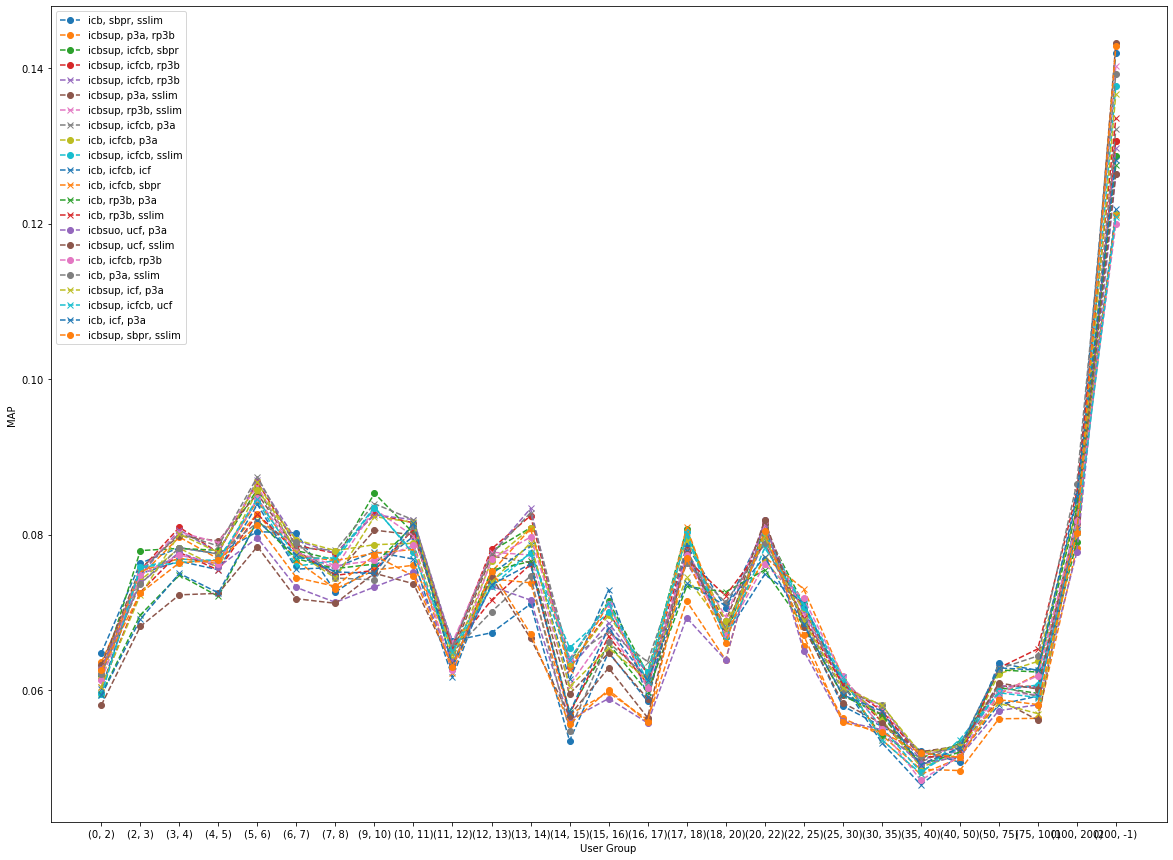

In [26]:
import matplotlib.pyplot as pyplot
%matplotlib inline  
pyplot.figure(figsize=(20,15))
for key, isCombo in to_be_plotted:
    l=[]
    if isCombo:
        for combo_dict in MAP_combo_per_group:
            l.append(combo_dict[key])
        if random.random() > 0.5:
            style = '--o'
        else:
            style = '--x'
        label = combo_labels['combo'+str(key+1)]
    """
    else:
        for merged_dict in MAP_merged_per_group:
            l.append(merged_dict[key])
        style = '--x'
        label = merged_labels[key]
        """
    pyplot.plot(l, style, label = label)

pyplot.xticks(ticks=range(0,len(f_ranges)), labels=f_ranges)
pyplot.ylabel('MAP')
pyplot.xlabel('User Group')
pyplot.legend()
pyplot.show()

In [9]:
f_ranges = [
    (0,20),
    (20,30),
    (30,40),
    (40,50),
    (50,60),
    (60,70),
    (70,80),
    (80,90),
    (90,115),
    (115,150),
    (150,-1)
]

MAP_combo_per_group = []
cutoff = 10

for f_range in f_ranges:
    
    
    combo_dict={}
    for k in range (num_combo):
        r = []
        for i in range (len(URM_list)):
            URM_test_group = parser.filter_URM_test_by_range(URM_list[i], URM_test_list[i], f_range)
            evaluator_test = EvaluatorHoldout(URM_test_group, cutoff_list=[cutoff])
            if not isinstance(list_rec[k][0], list):
                rec = list_rec[k][0]
                try:
                    rec = rec(URM_list[i], ICM_all, verbose = False)
                except:
                    rec = rec(URM_list[i], verbose=False)
                try:
                    rec.load_model(f'stored_recommenders/seed_{str(seed)}_hybrid_search3/{rec.RECOMMENDER_NAME}/', f'{str(seed)}_fold-{str(i)}')
                    print(f"{rec.RECOMMENDER_NAME} loaded. [seed={seed}, fold={i}]")
                except:
                    print(f"Fitting {rec.RECOMMENDER_NAME} ... [seed={seed}, fold={i}]")
                    rec.fit(**list_rec[k][1])
                    print(f"done.")
                    rec.save_model(f'stored_recommenders/seed_{str(seed)}_hybrid_search3/{rec.RECOMMENDER_NAME}/', f'{str(seed)}_fold-{str(i)}')
            else:
                rec = HybridCombinationSearchCV3(URM_list[i], ICM_all, list_rec[k][0], seed = seed, fold = i)
                rec.fit(**list_rec[k][1])

            results, _ = evaluator_test.evaluateRecommender(rec)
            r.append(results[cutoff]["MAP"])
        combo_dict[k]=np.average(r)

    MAP_combo_per_group.append(combo_dict)

HybridCombinationSearchCV3: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCV3: URM Detected 2381 (9.17 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=0]
ItemKNNCFRecommender loaded. [seed=1666, fold=0]
P3alphaRecommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 4675 ( 100.00% ) in 4.82 sec. Users per second: 970
HybridCombinationSearchCV3: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCV3: URM Detected 2439 (9.39 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=1]
ItemKNNCFRecommender loaded. [seed=1666, fold=1]
P3alphaRecommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 4612 ( 100.00% ) in 4.84 sec. Users per second: 954
HybridCombinationSearchCV3: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCV3: URM Detected 2402 (9.25 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=2]
ItemKNNCFRecommender loaded. [seed=1666, fold=2]
P3alphaRecommender loaded. [seed=1666, fold=2]
Evalua

P3alphaRecommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 4702 ( 100.00% ) in 4.97 sec. Users per second: 945
HybridCombinationSearchCV3: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCV3: URM Detected 2338 (9.00 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=3]
RP3betaRecommender loaded. [seed=1666, fold=3]
P3alphaRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 4667 ( 100.00% ) in 4.93 sec. Users per second: 947
HybridCombinationSearchCV3: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCV3: URM Detected 2398 (9.23 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=4]
RP3betaRecommender loaded. [seed=1666, fold=4]
P3alphaRecommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 4641 ( 100.00% ) in 4.87 sec. Users per second: 952
HybridCombinationSearchCV3: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCV3: URM Detected 2381 (9.17 %) cold items.
ItemKNNCBFRecommender loaded.

ItemKNNCBFRecommender loaded. [seed=1666, fold=0]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=0]
P3alphaRecommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 4675 ( 100.00% ) in 5.21 sec. Users per second: 897
HybridCombinationSearchCV3: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCV3: URM Detected 2439 (9.39 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=1]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=1]
P3alphaRecommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 4612 ( 100.00% ) in 5.10 sec. Users per second: 903
HybridCombinationSearchCV3: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCV3: URM Detected 2402 (9.25 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=2]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=2]
P3alphaRecommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 4702 ( 100.00% ) in 5.18 sec. Users per second: 908
HybridCombinationSearchCV3: URM Detected

HybridCombinationSearchCV3: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCV3: URM Detected 2338 (9.00 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=3]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=3]
SLIM_BPR_Recommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 4667 ( 100.00% ) in 5.35 sec. Users per second: 872
HybridCombinationSearchCV3: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCV3: URM Detected 2398 (9.23 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=4]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=4]
SLIM_BPR_Recommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 4641 ( 100.00% ) in 5.50 sec. Users per second: 844
HybridCombinationSearchCV3: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCV3: URM Detected 2381 (9.17 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=0]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=0]
ItemKNNCFRecommender loaded. [s

Special-ItemKNNCBFRec loaded. [seed=1666, fold=0]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=0]
UserKNNCFRecommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 4675 ( 100.00% ) in 6.20 sec. Users per second: 754
HybridCombinationSearchCV3: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCV3: URM Detected 2439 (9.39 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=1]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=1]
UserKNNCFRecommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 4612 ( 100.00% ) in 6.12 sec. Users per second: 754
HybridCombinationSearchCV3: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCV3: URM Detected 2402 (9.25 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=2]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=2]
UserKNNCFRecommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 4702 ( 100.00% ) in 6.25 sec. Users per second: 753
HybridCombinationSearchCV3: URM De

Special-ItemKNNCBFRec loaded. [seed=1666, fold=3]
ItemKNNCFRecommender loaded. [seed=1666, fold=3]
RP3betaRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 4667 ( 100.00% ) in 6.13 sec. Users per second: 761
HybridCombinationSearchCV3: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCV3: URM Detected 2398 (9.23 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=4]
ItemKNNCFRecommender loaded. [seed=1666, fold=4]
RP3betaRecommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 4641 ( 100.00% ) in 6.00 sec. Users per second: 773
HybridCombinationSearchCV3: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCV3: URM Detected 2381 (9.17 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=0]
ItemKNNCFRecommender loaded. [seed=1666, fold=0]
UserKNNCFRecommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 4675 ( 100.00% ) in 5.96 sec. Users per second: 785
HybridCombinationSearchCV3: URM Detected 68 (0.86 %) col

Special-ItemKNNCBFRec loaded. [seed=1666, fold=1]
UserKNNCFRecommender loaded. [seed=1666, fold=1]
P3alphaRecommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 4612 ( 100.00% ) in 5.57 sec. Users per second: 828
HybridCombinationSearchCV3: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCV3: URM Detected 2402 (9.25 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=2]
UserKNNCFRecommender loaded. [seed=1666, fold=2]
P3alphaRecommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 4702 ( 100.00% ) in 5.82 sec. Users per second: 808
HybridCombinationSearchCV3: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCV3: URM Detected 2338 (9.00 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=3]
UserKNNCFRecommender loaded. [seed=1666, fold=3]
P3alphaRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 4667 ( 100.00% ) in 6.02 sec. Users per second: 775
HybridCombinationSearchCV3: URM Detected 77 (0.97 %) cold 

Special-ItemKNNCBFRec loaded. [seed=1666, fold=4]
SLIM_BPR_Recommender loaded. [seed=1666, fold=4]
S-SLIMElasticNet loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 4641 ( 100.00% ) in 8.29 sec. Users per second: 560
HybridCombinationSearchCV3: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCV3: URM Detected 2381 (9.17 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=0]
P3alphaRecommender loaded. [seed=1666, fold=0]
S-SLIMElasticNet loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 4675 ( 100.00% ) in 8.10 sec. Users per second: 577
HybridCombinationSearchCV3: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCV3: URM Detected 2439 (9.39 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=1]
P3alphaRecommender loaded. [seed=1666, fold=1]
S-SLIMElasticNet loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 4612 ( 100.00% ) in 8.49 sec. Users per second: 543
HybridCombinationSearchCV3: URM Detected 56 (0.70 %) cold users.
Hyb

Special-ItemKNNCBFRec loaded. [seed=1666, fold=2]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=2]
S-SLIMElasticNet loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 4702 ( 100.00% ) in 8.67 sec. Users per second: 542
HybridCombinationSearchCV3: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCV3: URM Detected 2338 (9.00 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=3]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=3]
S-SLIMElasticNet loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 4667 ( 100.00% ) in 8.49 sec. Users per second: 549
HybridCombinationSearchCV3: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCV3: URM Detected 2398 (9.23 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=4]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=4]
S-SLIMElasticNet loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 4641 ( 100.00% ) in 8.52 sec. Users per second: 544
HybridCombinationSearchCV3: URM Detected 48 (0

ItemKNNCBFRecommender loaded. [seed=1666, fold=0]
P3alphaRecommender loaded. [seed=1666, fold=0]
S-SLIMElasticNet loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 4675 ( 100.00% ) in 7.35 sec. Users per second: 636
HybridCombinationSearchCV3: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCV3: URM Detected 2439 (9.39 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=1]
P3alphaRecommender loaded. [seed=1666, fold=1]
S-SLIMElasticNet loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 4612 ( 100.00% ) in 7.47 sec. Users per second: 618
HybridCombinationSearchCV3: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCV3: URM Detected 2402 (9.25 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=2]
P3alphaRecommender loaded. [seed=1666, fold=2]
S-SLIMElasticNet loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 4702 ( 100.00% ) in 7.46 sec. Users per second: 631
HybridCombinationSearchCV3: URM Detected 65 (0.82 %) cold users.
Hybri

SLIM_BPR_Recommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 4612 ( 100.00% ) in 3.04 sec. Users per second: 1519
SLIM_BPR_Recommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 4702 ( 100.00% ) in 3.02 sec. Users per second: 1557
SLIM_BPR_Recommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 4667 ( 100.00% ) in 3.17 sec. Users per second: 1474
SLIM_BPR_Recommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 4641 ( 100.00% ) in 3.00 sec. Users per second: 1545
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 4675 ( 100.00% ) in 3.67 sec. Users per second: 1275
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 4612 ( 100.00% ) in 3.41 sec. Users per second: 1353
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 4702 ( 100.00% ) in 3.46 sec. Users per second: 1358
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=3]
EvaluatorHoldout:

EvaluatorHoldout: Processed 381 ( 100.00% ) in 0.55 sec. Users per second: 693
HybridCombinationSearchCV3: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCV3: URM Detected 2439 (9.39 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=1]
ItemKNNCFRecommender loaded. [seed=1666, fold=1]
RP3betaRecommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 386 ( 100.00% ) in 0.59 sec. Users per second: 650
HybridCombinationSearchCV3: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCV3: URM Detected 2402 (9.25 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=2]
ItemKNNCFRecommender loaded. [seed=1666, fold=2]
RP3betaRecommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 364 ( 100.00% ) in 0.58 sec. Users per second: 625
HybridCombinationSearchCV3: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCV3: URM Detected 2338 (9.00 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=3]
ItemKNNCFRecommender load

P3alphaRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 383 ( 100.00% ) in 0.52 sec. Users per second: 736
HybridCombinationSearchCV3: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCV3: URM Detected 2398 (9.23 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=4]
UserKNNCFRecommender loaded. [seed=1666, fold=4]
P3alphaRecommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 378 ( 100.00% ) in 0.49 sec. Users per second: 774
HybridCombinationSearchCV3: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCV3: URM Detected 2381 (9.17 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=0]
UserKNNCFRecommender loaded. [seed=1666, fold=0]
RP3betaRecommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 381 ( 100.00% ) in 0.52 sec. Users per second: 733
HybridCombinationSearchCV3: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCV3: URM Detected 2439 (9.39 %) cold items.
ItemKNNCBFRecommender loaded

ItemKNNCBFRecommender loaded. [seed=1666, fold=1]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=1]
RP3betaRecommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 386 ( 100.00% ) in 0.64 sec. Users per second: 599
HybridCombinationSearchCV3: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCV3: URM Detected 2402 (9.25 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=2]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=2]
RP3betaRecommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 364 ( 100.00% ) in 0.60 sec. Users per second: 609
HybridCombinationSearchCV3: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCV3: URM Detected 2338 (9.00 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=3]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=3]
RP3betaRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 383 ( 100.00% ) in 0.64 sec. Users per second: 594
HybridCombinationSearchCV3: URM Detected 77

HybridCombinationSearchCV3: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCV3: URM Detected 2398 (9.23 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=4]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=4]
ItemKNNCFRecommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 378 ( 100.00% ) in 0.77 sec. Users per second: 491
HybridCombinationSearchCV3: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCV3: URM Detected 2381 (9.17 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=0]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=0]
P3alphaRecommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 381 ( 100.00% ) in 0.76 sec. Users per second: 504
HybridCombinationSearchCV3: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCV3: URM Detected 2439 (9.39 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=1]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=1]
P3alphaRecommender loaded. [seed=16

ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=1]
SLIM_BPR_Recommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 386 ( 100.00% ) in 0.76 sec. Users per second: 510
HybridCombinationSearchCV3: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCV3: URM Detected 2402 (9.25 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=2]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=2]
SLIM_BPR_Recommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 364 ( 100.00% ) in 0.73 sec. Users per second: 501
HybridCombinationSearchCV3: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCV3: URM Detected 2338 (9.00 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=3]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=3]
SLIM_BPR_Recommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 383 ( 100.00% ) in 0.80 sec. Users per second: 476
HybridCombinationSearchCV3: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearc

Special-ItemKNNCBFRec loaded. [seed=1666, fold=4]
ItemKNNCFRecommender loaded. [seed=1666, fold=4]
UserKNNCFRecommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 378 ( 100.00% ) in 0.70 sec. Users per second: 543
HybridCombinationSearchCV3: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCV3: URM Detected 2381 (9.17 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=0]
ItemKNNCFRecommender loaded. [seed=1666, fold=0]
SLIM_BPR_Recommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 381 ( 100.00% ) in 0.70 sec. Users per second: 547
HybridCombinationSearchCV3: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCV3: URM Detected 2439 (9.39 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=1]
ItemKNNCFRecommender loaded. [seed=1666, fold=1]
SLIM_BPR_Recommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 386 ( 100.00% ) in 0.73 sec. Users per second: 531
HybridCombinationSearchCV3: URM Detected 56 (0.70 %) co

Special-ItemKNNCBFRec loaded. [seed=1666, fold=2]
UserKNNCFRecommender loaded. [seed=1666, fold=2]
RP3betaRecommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 364 ( 100.00% ) in 0.60 sec. Users per second: 609
HybridCombinationSearchCV3: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCV3: URM Detected 2338 (9.00 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=3]
UserKNNCFRecommender loaded. [seed=1666, fold=3]
RP3betaRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 383 ( 100.00% ) in 0.63 sec. Users per second: 608
HybridCombinationSearchCV3: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCV3: URM Detected 2398 (9.23 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=4]
UserKNNCFRecommender loaded. [seed=1666, fold=4]
RP3betaRecommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 378 ( 100.00% ) in 0.61 sec. Users per second: 616
HybridCombinationSearchCV3: URM Detected 48 (0.60 %) cold use

Special-ItemKNNCBFRec loaded. [seed=1666, fold=0]
UserKNNCFRecommender loaded. [seed=1666, fold=0]
S-SLIMElasticNet loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 381 ( 100.00% ) in 0.94 sec. Users per second: 404
HybridCombinationSearchCV3: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCV3: URM Detected 2439 (9.39 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=1]
UserKNNCFRecommender loaded. [seed=1666, fold=1]
S-SLIMElasticNet loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 386 ( 100.00% ) in 0.97 sec. Users per second: 397
HybridCombinationSearchCV3: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCV3: URM Detected 2402 (9.25 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=2]
UserKNNCFRecommender loaded. [seed=1666, fold=2]
S-SLIMElasticNet loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 364 ( 100.00% ) in 0.86 sec. Users per second: 422
HybridCombinationSearchCV3: URM Detected 65 (0.82 %) cold users.
Hy

Special-ItemKNNCBFRec loaded. [seed=1666, fold=3]
RP3betaRecommender loaded. [seed=1666, fold=3]
S-SLIMElasticNet loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 383 ( 100.00% ) in 0.91 sec. Users per second: 421
HybridCombinationSearchCV3: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCV3: URM Detected 2398 (9.23 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=4]
RP3betaRecommender loaded. [seed=1666, fold=4]
S-SLIMElasticNet loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 378 ( 100.00% ) in 0.92 sec. Users per second: 409
HybridCombinationSearchCV3: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCV3: URM Detected 2381 (9.17 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=0]
SLIM_BPR_Recommender loaded. [seed=1666, fold=0]
S-SLIMElasticNet loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 381 ( 100.00% ) in 0.85 sec. Users per second: 449
HybridCombinationSearchCV3: URM Detected 68 (0.86 %) cold users.
Hybrid

RP3betaRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 383 ( 100.00% ) in 0.30 sec. Users per second: 1267
RP3betaRecommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 378 ( 100.00% ) in 0.28 sec. Users per second: 1347
P3alphaRecommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 381 ( 100.00% ) in 0.27 sec. Users per second: 1410
P3alphaRecommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 386 ( 100.00% ) in 0.26 sec. Users per second: 1512
P3alphaRecommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 364 ( 100.00% ) in 0.26 sec. Users per second: 1421
P3alphaRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 383 ( 100.00% ) in 0.26 sec. Users per second: 1492
P3alphaRecommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 378 ( 100.00% ) in 0.26 sec. Users per second: 1482
ItemKNNCFRecommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 381 ( 100.00% ) in 0.29 sec. Users

S-SLIMElasticNet loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 383 ( 100.00% ) in 0.50 sec. Users per second: 760
S-SLIMElasticNet loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 378 ( 100.00% ) in 0.50 sec. Users per second: 758
PureSVDRecommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 381 ( 100.00% ) in 0.29 sec. Users per second: 1331
PureSVDRecommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 386 ( 100.00% ) in 0.29 sec. Users per second: 1346
PureSVDRecommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 364 ( 100.00% ) in 0.29 sec. Users per second: 1267
PureSVDRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 383 ( 100.00% ) in 0.29 sec. Users per second: 1334
PureSVDRecommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 378 ( 100.00% ) in 0.29 sec. Users per second: 1318
Special-ItemKNNCBFRec loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 381 ( 100.00% ) in 0.36 sec. Users per 

HybridCombinationSearchCV3: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCV3: URM Detected 2402 (9.25 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=2]
ItemKNNCFRecommender loaded. [seed=1666, fold=2]
UserKNNCFRecommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 189 ( 100.00% ) in 0.29 sec. Users per second: 663
HybridCombinationSearchCV3: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCV3: URM Detected 2338 (9.00 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=3]
ItemKNNCFRecommender loaded. [seed=1666, fold=3]
UserKNNCFRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 176 ( 100.00% ) in 0.25 sec. Users per second: 691
HybridCombinationSearchCV3: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCV3: URM Detected 2398 (9.23 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=4]
ItemKNNCFRecommender loaded. [seed=1666, fold=4]
UserKNNCFRecommender loaded. [seed=1666, fold=4]
Ev

EvaluatorHoldout: Processed 180 ( 100.00% ) in 0.26 sec. Users per second: 700
HybridCombinationSearchCV3: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCV3: URM Detected 2381 (9.17 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=0]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=0]
ItemKNNCFRecommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 190 ( 100.00% ) in 0.36 sec. Users per second: 523
HybridCombinationSearchCV3: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCV3: URM Detected 2439 (9.39 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=1]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=1]
ItemKNNCFRecommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 173 ( 100.00% ) in 0.30 sec. Users per second: 573
HybridCombinationSearchCV3: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCV3: URM Detected 2402 (9.25 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=2]
ItemKNN_C

ItemKNNCBFRecommender loaded. [seed=1666, fold=2]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=2]
UserKNNCFRecommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 189 ( 100.00% ) in 0.32 sec. Users per second: 597
HybridCombinationSearchCV3: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCV3: URM Detected 2338 (9.00 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=3]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=3]
UserKNNCFRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 176 ( 100.00% ) in 0.30 sec. Users per second: 584
HybridCombinationSearchCV3: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCV3: URM Detected 2398 (9.23 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=4]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=4]
UserKNNCFRecommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 180 ( 100.00% ) in 0.29 sec. Users per second: 630
HybridCombinationSearchCV3: URM Detec

HybridCombinationSearchCV3: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCV3: URM Detected 2381 (9.17 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=0]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=0]
RP3betaRecommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 190 ( 100.00% ) in 0.43 sec. Users per second: 446
HybridCombinationSearchCV3: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCV3: URM Detected 2439 (9.39 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=1]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=1]
RP3betaRecommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 173 ( 100.00% ) in 0.35 sec. Users per second: 497
HybridCombinationSearchCV3: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCV3: URM Detected 2402 (9.25 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=2]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=2]
RP3betaRecommender loaded. [seed=1666

ItemKNNCFRecommender loaded. [seed=1666, fold=2]
P3alphaRecommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 189 ( 100.00% ) in 0.35 sec. Users per second: 544
HybridCombinationSearchCV3: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCV3: URM Detected 2338 (9.00 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=3]
ItemKNNCFRecommender loaded. [seed=1666, fold=3]
P3alphaRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 176 ( 100.00% ) in 0.33 sec. Users per second: 530
HybridCombinationSearchCV3: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCV3: URM Detected 2398 (9.23 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=4]
ItemKNNCFRecommender loaded. [seed=1666, fold=4]
P3alphaRecommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 180 ( 100.00% ) in 0.35 sec. Users per second: 518
HybridCombinationSearchCV3: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCV3: URM Detected 2381 

Special-ItemKNNCBFRec loaded. [seed=1666, fold=0]
P3alphaRecommender loaded. [seed=1666, fold=0]
RP3betaRecommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 190 ( 100.00% ) in 0.34 sec. Users per second: 564
HybridCombinationSearchCV3: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCV3: URM Detected 2439 (9.39 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=1]
P3alphaRecommender loaded. [seed=1666, fold=1]
RP3betaRecommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 173 ( 100.00% ) in 0.31 sec. Users per second: 564
HybridCombinationSearchCV3: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCV3: URM Detected 2402 (9.25 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=2]
P3alphaRecommender loaded. [seed=1666, fold=2]
RP3betaRecommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 189 ( 100.00% ) in 0.36 sec. Users per second: 520
HybridCombinationSearchCV3: URM Detected 65 (0.82 %) cold users.
Hy

Special-ItemKNNCBFRec loaded. [seed=1666, fold=3]
UserKNNCFRecommender loaded. [seed=1666, fold=3]
SLIM_BPR_Recommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 176 ( 100.00% ) in 0.33 sec. Users per second: 534
HybridCombinationSearchCV3: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCV3: URM Detected 2398 (9.23 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=4]
UserKNNCFRecommender loaded. [seed=1666, fold=4]
SLIM_BPR_Recommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 180 ( 100.00% ) in 0.33 sec. Users per second: 542
HybridCombinationSearchCV3: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCV3: URM Detected 2381 (9.17 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=0]
SLIM_BPR_Recommender loaded. [seed=1666, fold=0]
S-SLIMElasticNet loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 190 ( 100.00% ) in 0.55 sec. Users per second: 345
HybridCombinationSearchCV3: URM Detected 68 (0.86 %) cold u

Special-ItemKNNCBFRec loaded. [seed=1666, fold=1]
ItemKNNCFRecommender loaded. [seed=1666, fold=1]
S-SLIMElasticNet loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 173 ( 100.00% ) in 0.49 sec. Users per second: 354
HybridCombinationSearchCV3: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCV3: URM Detected 2402 (9.25 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=2]
ItemKNNCFRecommender loaded. [seed=1666, fold=2]
S-SLIMElasticNet loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 189 ( 100.00% ) in 0.55 sec. Users per second: 343
HybridCombinationSearchCV3: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCV3: URM Detected 2338 (9.00 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=3]
ItemKNNCFRecommender loaded. [seed=1666, fold=3]
S-SLIMElasticNet loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 176 ( 100.00% ) in 0.52 sec. Users per second: 338
HybridCombinationSearchCV3: URM Detected 77 (0.97 %) cold users.
Hy

ItemKNNCBFRecommender loaded. [seed=1666, fold=4]
SLIM_BPR_Recommender loaded. [seed=1666, fold=4]
S-SLIMElasticNet loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 180 ( 100.00% ) in 0.47 sec. Users per second: 381
HybridCombinationSearchCV3: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCV3: URM Detected 2381 (9.17 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=0]
RP3betaRecommender loaded. [seed=1666, fold=0]
S-SLIMElasticNet loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 190 ( 100.00% ) in 0.47 sec. Users per second: 402
HybridCombinationSearchCV3: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCV3: URM Detected 2439 (9.39 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=1]
RP3betaRecommender loaded. [seed=1666, fold=1]
S-SLIMElasticNet loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 173 ( 100.00% ) in 0.46 sec. Users per second: 379
HybridCombinationSearchCV3: URM Detected 56 (0.70 %) cold users.
Hybrid

UserKNNCFRecommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 190 ( 100.00% ) in 0.13 sec. Users per second: 1451
UserKNNCFRecommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 173 ( 100.00% ) in 0.11 sec. Users per second: 1547
UserKNNCFRecommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 189 ( 100.00% ) in 0.13 sec. Users per second: 1455
UserKNNCFRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 176 ( 100.00% ) in 0.11 sec. Users per second: 1609
UserKNNCFRecommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 180 ( 100.00% ) in 0.11 sec. Users per second: 1646
ItemKNNCBFRecommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 190 ( 100.00% ) in 0.14 sec. Users per second: 1351
ItemKNNCBFRecommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 173 ( 100.00% ) in 0.12 sec. Users per second: 1384
ItemKNNCBFRecommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 189 ( 100.00% ) i

ItemKNNCBFRecommender loaded. [seed=1666, fold=0]
ItemKNNCFRecommender loaded. [seed=1666, fold=0]
P3alphaRecommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 86 ( 100.00% ) in 0.14 sec. Users per second: 612
HybridCombinationSearchCV3: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCV3: URM Detected 2439 (9.39 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=1]
ItemKNNCFRecommender loaded. [seed=1666, fold=1]
P3alphaRecommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 94 ( 100.00% ) in 0.16 sec. Users per second: 602
HybridCombinationSearchCV3: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCV3: URM Detected 2402 (9.25 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=2]
ItemKNNCFRecommender loaded. [seed=1666, fold=2]
P3alphaRecommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 90 ( 100.00% ) in 0.16 sec. Users per second: 576
HybridCombinationSearchCV3: URM Detected 65 (0.82 %) cold users.

ItemKNNCBFRecommender loaded. [seed=1666, fold=3]
RP3betaRecommender loaded. [seed=1666, fold=3]
P3alphaRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 104 ( 100.00% ) in 0.16 sec. Users per second: 666
HybridCombinationSearchCV3: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCV3: URM Detected 2398 (9.23 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=4]
RP3betaRecommender loaded. [seed=1666, fold=4]
P3alphaRecommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 101 ( 100.00% ) in 0.16 sec. Users per second: 646
HybridCombinationSearchCV3: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCV3: URM Detected 2381 (9.17 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=0]
UserKNNCFRecommender loaded. [seed=1666, fold=0]
P3alphaRecommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 86 ( 100.00% ) in 0.13 sec. Users per second: 688
HybridCombinationSearchCV3: URM Detected 68 (0.86 %) cold users.
H

ItemKNNCBFRecommender loaded. [seed=1666, fold=1]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=1]
P3alphaRecommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 94 ( 100.00% ) in 0.19 sec. Users per second: 501
HybridCombinationSearchCV3: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCV3: URM Detected 2402 (9.25 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=2]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=2]
P3alphaRecommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 90 ( 100.00% ) in 0.17 sec. Users per second: 524
HybridCombinationSearchCV3: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCV3: URM Detected 2338 (9.00 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=3]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=3]
P3alphaRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 104 ( 100.00% ) in 0.20 sec. Users per second: 512
HybridCombinationSearchCV3: URM Detected 77 (

ItemKNNCBFRecommender loaded. [seed=1666, fold=4]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=4]
SLIM_BPR_Recommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 101 ( 100.00% ) in 0.21 sec. Users per second: 485
HybridCombinationSearchCV3: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCV3: URM Detected 2381 (9.17 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=0]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=0]
ItemKNNCFRecommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 86 ( 100.00% ) in 0.21 sec. Users per second: 415
HybridCombinationSearchCV3: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCV3: URM Detected 2439 (9.39 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=1]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=1]
ItemKNNCFRecommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 94 ( 100.00% ) in 0.24 sec. Users per second: 399
HybridCombinationSearchCV3: URM Detecte

Special-ItemKNNCBFRec loaded. [seed=1666, fold=2]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=2]
UserKNNCFRecommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 90 ( 100.00% ) in 0.19 sec. Users per second: 467
HybridCombinationSearchCV3: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCV3: URM Detected 2338 (9.00 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=3]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=3]
UserKNNCFRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 104 ( 100.00% ) in 0.22 sec. Users per second: 467
HybridCombinationSearchCV3: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCV3: URM Detected 2398 (9.23 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=4]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=4]
UserKNNCFRecommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 101 ( 100.00% ) in 0.22 sec. Users per second: 454
HybridCombinationSearchCV3: URM Detect

Special-ItemKNNCBFRec loaded. [seed=1666, fold=0]
ItemKNNCFRecommender loaded. [seed=1666, fold=0]
UserKNNCFRecommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 86 ( 100.00% ) in 0.16 sec. Users per second: 530
HybridCombinationSearchCV3: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCV3: URM Detected 2439 (9.39 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=1]
ItemKNNCFRecommender loaded. [seed=1666, fold=1]
UserKNNCFRecommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 94 ( 100.00% ) in 0.18 sec. Users per second: 535
HybridCombinationSearchCV3: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCV3: URM Detected 2402 (9.25 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=2]
ItemKNNCFRecommender loaded. [seed=1666, fold=2]
UserKNNCFRecommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 90 ( 100.00% ) in 0.19 sec. Users per second: 481
HybridCombinationSearchCV3: URM Detected 65 (0.82 %) cold 

Special-ItemKNNCBFRec loaded. [seed=1666, fold=3]
UserKNNCFRecommender loaded. [seed=1666, fold=3]
P3alphaRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 104 ( 100.00% ) in 0.19 sec. Users per second: 555
HybridCombinationSearchCV3: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCV3: URM Detected 2398 (9.23 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=4]
UserKNNCFRecommender loaded. [seed=1666, fold=4]
P3alphaRecommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 101 ( 100.00% ) in 0.19 sec. Users per second: 539
HybridCombinationSearchCV3: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCV3: URM Detected 2381 (9.17 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=0]
UserKNNCFRecommender loaded. [seed=1666, fold=0]
RP3betaRecommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 86 ( 100.00% ) in 0.16 sec. Users per second: 550
HybridCombinationSearchCV3: URM Detected 68 (0.86 %) cold user

Special-ItemKNNCBFRec loaded. [seed=1666, fold=1]
P3alphaRecommender loaded. [seed=1666, fold=1]
S-SLIMElasticNet loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 94 ( 100.00% ) in 0.33 sec. Users per second: 284
HybridCombinationSearchCV3: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCV3: URM Detected 2402 (9.25 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=2]
P3alphaRecommender loaded. [seed=1666, fold=2]
S-SLIMElasticNet loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 90 ( 100.00% ) in 0.30 sec. Users per second: 296
HybridCombinationSearchCV3: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCV3: URM Detected 2338 (9.00 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=3]
P3alphaRecommender loaded. [seed=1666, fold=3]
S-SLIMElasticNet loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 104 ( 100.00% ) in 0.36 sec. Users per second: 286
HybridCombinationSearchCV3: URM Detected 77 (0.97 %) cold users.
HybridComb

Special-ItemKNNCBFRec loaded. [seed=1666, fold=4]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=4]
S-SLIMElasticNet loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 101 ( 100.00% ) in 0.36 sec. Users per second: 278
HybridCombinationSearchCV3: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCV3: URM Detected 2381 (9.17 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=0]
RP3betaRecommender loaded. [seed=1666, fold=0]
S-SLIMElasticNet loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 86 ( 100.00% ) in 0.34 sec. Users per second: 256
HybridCombinationSearchCV3: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCV3: URM Detected 2439 (9.39 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=1]
RP3betaRecommender loaded. [seed=1666, fold=1]
S-SLIMElasticNet loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 94 ( 100.00% ) in 0.35 sec. Users per second: 266
HybridCombinationSearchCV3: URM Detected 56 (0.70 %) cold users.
Hy

ItemKNNCBFRecommender loaded. [seed=1666, fold=2]
P3alphaRecommender loaded. [seed=1666, fold=2]
S-SLIMElasticNet loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 90 ( 100.00% ) in 0.30 sec. Users per second: 299
HybridCombinationSearchCV3: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCV3: URM Detected 2338 (9.00 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=3]
P3alphaRecommender loaded. [seed=1666, fold=3]
S-SLIMElasticNet loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 104 ( 100.00% ) in 0.32 sec. Users per second: 328
HybridCombinationSearchCV3: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCV3: URM Detected 2398 (9.23 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=4]
P3alphaRecommender loaded. [seed=1666, fold=4]
S-SLIMElasticNet loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 101 ( 100.00% ) in 0.30 sec. Users per second: 335
RP3betaRecommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed

ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 94 ( 100.00% ) in 0.11 sec. Users per second: 859
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 90 ( 100.00% ) in 0.11 sec. Users per second: 823
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 104 ( 100.00% ) in 0.13 sec. Users per second: 832
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 101 ( 100.00% ) in 0.11 sec. Users per second: 923
S-SLIMElasticNet loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 86 ( 100.00% ) in 0.21 sec. Users per second: 415
S-SLIMElasticNet loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 94 ( 100.00% ) in 0.22 sec. Users per second: 423
S-SLIMElasticNet loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 90 ( 100.00% ) in 0.22 sec. Users per second: 402
S-SLIMElasticNet loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 104 ( 100.00% ) in 0.24 

ItemKNNCBFRecommender loaded. [seed=1666, fold=3]
ItemKNNCFRecommender loaded. [seed=1666, fold=3]
RP3betaRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 64 ( 100.00% ) in 0.11 sec. Users per second: 585
HybridCombinationSearchCV3: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCV3: URM Detected 2398 (9.23 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=4]
ItemKNNCFRecommender loaded. [seed=1666, fold=4]
RP3betaRecommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 59 ( 100.00% ) in 0.11 sec. Users per second: 539
HybridCombinationSearchCV3: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCV3: URM Detected 2381 (9.17 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=0]
ItemKNNCFRecommender loaded. [seed=1666, fold=0]
UserKNNCFRecommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 74 ( 100.00% ) in 0.11 sec. Users per second: 677
HybridCombinationSearchCV3: URM Detected 68 (0.86 %) cold user

ItemKNNCBFRecommender loaded. [seed=1666, fold=1]
UserKNNCFRecommender loaded. [seed=1666, fold=1]
RP3betaRecommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 66 ( 100.00% ) in 0.09 sec. Users per second: 704
HybridCombinationSearchCV3: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCV3: URM Detected 2402 (9.25 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=2]
UserKNNCFRecommender loaded. [seed=1666, fold=2]
RP3betaRecommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 75 ( 100.00% ) in 0.12 sec. Users per second: 600
HybridCombinationSearchCV3: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCV3: URM Detected 2338 (9.00 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=3]
UserKNNCFRecommender loaded. [seed=1666, fold=3]
RP3betaRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 64 ( 100.00% ) in 0.09 sec. Users per second: 683
HybridCombinationSearchCV3: URM Detected 77 (0.97 %) cold users.

ItemKNNCBFRecommender loaded. [seed=1666, fold=4]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=4]
RP3betaRecommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 59 ( 100.00% ) in 0.13 sec. Users per second: 472
HybridCombinationSearchCV3: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCV3: URM Detected 2381 (9.17 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=0]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=0]
UserKNNCFRecommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 74 ( 100.00% ) in 0.15 sec. Users per second: 508
HybridCombinationSearchCV3: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCV3: URM Detected 2439 (9.39 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=1]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=1]
UserKNNCFRecommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 66 ( 100.00% ) in 0.13 sec. Users per second: 528
HybridCombinationSearchCV3: URM Detected 5

Special-ItemKNNCBFRec loaded. [seed=1666, fold=2]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=2]
P3alphaRecommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 75 ( 100.00% ) in 0.19 sec. Users per second: 400
HybridCombinationSearchCV3: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCV3: URM Detected 2338 (9.00 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=3]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=3]
P3alphaRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 64 ( 100.00% ) in 0.14 sec. Users per second: 455
HybridCombinationSearchCV3: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCV3: URM Detected 2398 (9.23 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=4]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=4]
P3alphaRecommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 59 ( 100.00% ) in 0.14 sec. Users per second: 420
HybridCombinationSearchCV3: URM Detected 48 (0

Special-ItemKNNCBFRec loaded. [seed=1666, fold=0]
ItemKNNCFRecommender loaded. [seed=1666, fold=0]
P3alphaRecommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 74 ( 100.00% ) in 0.17 sec. Users per second: 431
HybridCombinationSearchCV3: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCV3: URM Detected 2439 (9.39 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=1]
ItemKNNCFRecommender loaded. [seed=1666, fold=1]
P3alphaRecommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 66 ( 100.00% ) in 0.16 sec. Users per second: 422
HybridCombinationSearchCV3: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCV3: URM Detected 2402 (9.25 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=2]
ItemKNNCFRecommender loaded. [seed=1666, fold=2]
P3alphaRecommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 75 ( 100.00% ) in 0.16 sec. Users per second: 480
HybridCombinationSearchCV3: URM Detected 65 (0.82 %) cold users.

Special-ItemKNNCBFRec loaded. [seed=1666, fold=3]
ItemKNNCFRecommender loaded. [seed=1666, fold=3]
SLIM_BPR_Recommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 64 ( 100.00% ) in 0.14 sec. Users per second: 455
HybridCombinationSearchCV3: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCV3: URM Detected 2398 (9.23 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=4]
ItemKNNCFRecommender loaded. [seed=1666, fold=4]
SLIM_BPR_Recommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 59 ( 100.00% ) in 0.14 sec. Users per second: 420
HybridCombinationSearchCV3: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCV3: URM Detected 2381 (9.17 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=0]
P3alphaRecommender loaded. [seed=1666, fold=0]
RP3betaRecommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 74 ( 100.00% ) in 0.16 sec. Users per second: 474
HybridCombinationSearchCV3: URM Detected 68 (0.86 %) cold user

Special-ItemKNNCBFRec loaded. [seed=1666, fold=1]
UserKNNCFRecommender loaded. [seed=1666, fold=1]
SLIM_BPR_Recommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 66 ( 100.00% ) in 0.14 sec. Users per second: 469
HybridCombinationSearchCV3: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCV3: URM Detected 2402 (9.25 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=2]
UserKNNCFRecommender loaded. [seed=1666, fold=2]
SLIM_BPR_Recommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 75 ( 100.00% ) in 0.17 sec. Users per second: 436
HybridCombinationSearchCV3: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCV3: URM Detected 2338 (9.00 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=3]
UserKNNCFRecommender loaded. [seed=1666, fold=3]
SLIM_BPR_Recommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 64 ( 100.00% ) in 0.14 sec. Users per second: 455
HybridCombinationSearchCV3: URM Detected 77 (0.97 %) cold 

Special-ItemKNNCBFRec loaded. [seed=1666, fold=4]
UserKNNCFRecommender loaded. [seed=1666, fold=4]
S-SLIMElasticNet loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 59 ( 100.00% ) in 0.25 sec. Users per second: 232
HybridCombinationSearchCV3: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCV3: URM Detected 2381 (9.17 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=0]
ItemKNNCFRecommender loaded. [seed=1666, fold=0]
S-SLIMElasticNet loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 74 ( 100.00% ) in 0.30 sec. Users per second: 251
HybridCombinationSearchCV3: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCV3: URM Detected 2439 (9.39 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=1]
ItemKNNCFRecommender loaded. [seed=1666, fold=1]
S-SLIMElasticNet loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 66 ( 100.00% ) in 0.27 sec. Users per second: 245
HybridCombinationSearchCV3: URM Detected 56 (0.70 %) cold users.
Hybri

ItemKNNCBFRecommender loaded. [seed=1666, fold=2]
SLIM_BPR_Recommender loaded. [seed=1666, fold=2]
S-SLIMElasticNet loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 75 ( 100.00% ) in 0.30 sec. Users per second: 249
HybridCombinationSearchCV3: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCV3: URM Detected 2338 (9.00 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=3]
SLIM_BPR_Recommender loaded. [seed=1666, fold=3]
S-SLIMElasticNet loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 64 ( 100.00% ) in 0.25 sec. Users per second: 252
HybridCombinationSearchCV3: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCV3: URM Detected 2398 (9.23 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=4]
SLIM_BPR_Recommender loaded. [seed=1666, fold=4]
S-SLIMElasticNet loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 59 ( 100.00% ) in 0.27 sec. Users per second: 218
HybridCombinationSearchCV3: URM Detected 48 (0.60 %) cold users.
Hybri

ItemKNNCFRecommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 66 ( 100.00% ) in 0.06 sec. Users per second: 1056
ItemKNNCFRecommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 75 ( 100.00% ) in 0.06 sec. Users per second: 1200
ItemKNNCFRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 64 ( 100.00% ) in 0.06 sec. Users per second: 1024
ItemKNNCFRecommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 59 ( 100.00% ) in 0.06 sec. Users per second: 944
UserKNNCFRecommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 74 ( 100.00% ) in 0.05 sec. Users per second: 1579
UserKNNCFRecommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 66 ( 100.00% ) in 0.05 sec. Users per second: 1407
UserKNNCFRecommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 75 ( 100.00% ) in 0.06 sec. Users per second: 1160
UserKNNCFRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 64 ( 100.00% ) in 0.05 sec. 

Special-ItemKNNCBFRec loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 75 ( 100.00% ) in 0.09 sec. Users per second: 800
Special-ItemKNNCBFRec loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 64 ( 100.00% ) in 0.08 sec. Users per second: 819
Special-ItemKNNCBFRec loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 59 ( 100.00% ) in 0.08 sec. Users per second: 755
HybridCombinationSearchCV3: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCV3: URM Detected 2381 (9.17 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=0]
ItemKNNCFRecommender loaded. [seed=1666, fold=0]
P3alphaRecommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 44 ( 100.00% ) in 0.08 sec. Users per second: 563
HybridCombinationSearchCV3: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCV3: URM Detected 2439 (9.39 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=1]
ItemKNNCFRecommender loaded. [seed=1666, fold=1]
P3alphaRecommender loaded. [s

ItemKNNCBFRecommender loaded. [seed=1666, fold=1]
RP3betaRecommender loaded. [seed=1666, fold=1]
P3alphaRecommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 45 ( 100.00% ) in 0.08 sec. Users per second: 576
HybridCombinationSearchCV3: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCV3: URM Detected 2402 (9.25 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=2]
RP3betaRecommender loaded. [seed=1666, fold=2]
P3alphaRecommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 49 ( 100.00% ) in 0.11 sec. Users per second: 448
HybridCombinationSearchCV3: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCV3: URM Detected 2338 (9.00 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=3]
RP3betaRecommender loaded. [seed=1666, fold=3]
P3alphaRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 45 ( 100.00% ) in 0.08 sec. Users per second: 576
HybridCombinationSearchCV3: URM Detected 77 (0.97 %) cold users.
Hybri

ItemKNNCBFRecommender loaded. [seed=1666, fold=4]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=4]
ItemKNNCFRecommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 45 ( 100.00% ) in 0.11 sec. Users per second: 411
HybridCombinationSearchCV3: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCV3: URM Detected 2381 (9.17 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=0]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=0]
P3alphaRecommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 44 ( 100.00% ) in 0.09 sec. Users per second: 469
HybridCombinationSearchCV3: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCV3: URM Detected 2439 (9.39 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=1]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=1]
P3alphaRecommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 45 ( 100.00% ) in 0.09 sec. Users per second: 480
HybridCombinationSearchCV3: URM Detected 56 

ItemKNNCBFRecommender loaded. [seed=1666, fold=2]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=2]
SLIM_BPR_Recommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 49 ( 100.00% ) in 0.12 sec. Users per second: 392
HybridCombinationSearchCV3: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCV3: URM Detected 2338 (9.00 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=3]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=3]
SLIM_BPR_Recommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 45 ( 100.00% ) in 0.11 sec. Users per second: 411
HybridCombinationSearchCV3: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCV3: URM Detected 2398 (9.23 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=4]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=4]
SLIM_BPR_Recommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 45 ( 100.00% ) in 0.11 sec. Users per second: 411
HybridCombinationSearchCV3: URM Detected

Special-ItemKNNCBFRec loaded. [seed=1666, fold=0]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=0]
UserKNNCFRecommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 44 ( 100.00% ) in 0.11 sec. Users per second: 402
HybridCombinationSearchCV3: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCV3: URM Detected 2439 (9.39 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=1]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=1]
UserKNNCFRecommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 45 ( 100.00% ) in 0.11 sec. Users per second: 411
HybridCombinationSearchCV3: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCV3: URM Detected 2402 (9.25 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=2]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=2]
UserKNNCFRecommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 49 ( 100.00% ) in 0.13 sec. Users per second: 392
HybridCombinationSearchCV3: URM Detected

Special-ItemKNNCBFRec loaded. [seed=1666, fold=3]
ItemKNNCFRecommender loaded. [seed=1666, fold=3]
RP3betaRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 45 ( 100.00% ) in 0.11 sec. Users per second: 411
HybridCombinationSearchCV3: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCV3: URM Detected 2398 (9.23 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=4]
ItemKNNCFRecommender loaded. [seed=1666, fold=4]
RP3betaRecommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 45 ( 100.00% ) in 0.11 sec. Users per second: 411
HybridCombinationSearchCV3: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCV3: URM Detected 2381 (9.17 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=0]
ItemKNNCFRecommender loaded. [seed=1666, fold=0]
UserKNNCFRecommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 44 ( 100.00% ) in 0.09 sec. Users per second: 469
HybridCombinationSearchCV3: URM Detected 68 (0.86 %) cold user

Special-ItemKNNCBFRec loaded. [seed=1666, fold=1]
UserKNNCFRecommender loaded. [seed=1666, fold=1]
P3alphaRecommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 45 ( 100.00% ) in 0.09 sec. Users per second: 480
HybridCombinationSearchCV3: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCV3: URM Detected 2402 (9.25 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=2]
UserKNNCFRecommender loaded. [seed=1666, fold=2]
P3alphaRecommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 49 ( 100.00% ) in 0.12 sec. Users per second: 408
HybridCombinationSearchCV3: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCV3: URM Detected 2338 (9.00 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=3]
UserKNNCFRecommender loaded. [seed=1666, fold=3]
P3alphaRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 45 ( 100.00% ) in 0.09 sec. Users per second: 480
HybridCombinationSearchCV3: URM Detected 77 (0.97 %) cold users.

Special-ItemKNNCBFRec loaded. [seed=1666, fold=4]
SLIM_BPR_Recommender loaded. [seed=1666, fold=4]
S-SLIMElasticNet loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 45 ( 100.00% ) in 0.22 sec. Users per second: 201
HybridCombinationSearchCV3: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCV3: URM Detected 2381 (9.17 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=0]
P3alphaRecommender loaded. [seed=1666, fold=0]
S-SLIMElasticNet loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 44 ( 100.00% ) in 0.21 sec. Users per second: 210
HybridCombinationSearchCV3: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCV3: URM Detected 2439 (9.39 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=1]
P3alphaRecommender loaded. [seed=1666, fold=1]
S-SLIMElasticNet loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 45 ( 100.00% ) in 0.24 sec. Users per second: 189
HybridCombinationSearchCV3: URM Detected 56 (0.70 %) cold users.
HybridCom

Special-ItemKNNCBFRec loaded. [seed=1666, fold=2]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=2]
S-SLIMElasticNet loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 49 ( 100.00% ) in 0.29 sec. Users per second: 172
HybridCombinationSearchCV3: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCV3: URM Detected 2338 (9.00 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=3]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=3]
S-SLIMElasticNet loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 45 ( 100.00% ) in 0.25 sec. Users per second: 182
HybridCombinationSearchCV3: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCV3: URM Detected 2398 (9.23 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=4]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=4]
S-SLIMElasticNet loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 45 ( 100.00% ) in 0.24 sec. Users per second: 189
HybridCombinationSearchCV3: URM Detected 48 (0.60 %)

ItemKNNCBFRecommender loaded. [seed=1666, fold=0]
P3alphaRecommender loaded. [seed=1666, fold=0]
S-SLIMElasticNet loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 44 ( 100.00% ) in 0.20 sec. Users per second: 217
HybridCombinationSearchCV3: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCV3: URM Detected 2439 (9.39 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=1]
P3alphaRecommender loaded. [seed=1666, fold=1]
S-SLIMElasticNet loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 45 ( 100.00% ) in 0.20 sec. Users per second: 221
HybridCombinationSearchCV3: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCV3: URM Detected 2402 (9.25 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=2]
P3alphaRecommender loaded. [seed=1666, fold=2]
S-SLIMElasticNet loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 49 ( 100.00% ) in 0.22 sec. Users per second: 220
HybridCombinationSearchCV3: URM Detected 65 (0.82 %) cold users.
HybridCombi

SLIM_BPR_Recommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 49 ( 100.00% ) in 0.05 sec. Users per second: 1045
SLIM_BPR_Recommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 45 ( 100.00% ) in 0.05 sec. Users per second: 960
SLIM_BPR_Recommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 45 ( 100.00% ) in 0.05 sec. Users per second: 960
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 44 ( 100.00% ) in 0.06 sec. Users per second: 704
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 45 ( 100.00% ) in 0.08 sec. Users per second: 576
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 49 ( 100.00% ) in 0.08 sec. Users per second: 627
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 45 ( 100.00% ) in 0.06 sec. Users per second: 720
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 45 

ItemKNNCBFRecommender loaded. [seed=1666, fold=1]
ItemKNNCFRecommender loaded. [seed=1666, fold=1]
RP3betaRecommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 35 ( 100.00% ) in 0.08 sec. Users per second: 448
HybridCombinationSearchCV3: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCV3: URM Detected 2402 (9.25 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=2]
ItemKNNCFRecommender loaded. [seed=1666, fold=2]
RP3betaRecommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 29 ( 100.00% ) in 0.06 sec. Users per second: 464
HybridCombinationSearchCV3: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCV3: URM Detected 2338 (9.00 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=3]
ItemKNNCFRecommender loaded. [seed=1666, fold=3]
RP3betaRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 31 ( 100.00% ) in 0.05 sec. Users per second: 661
HybridCombinationSearchCV3: URM Detected 77 (0.97 %) cold users.

ItemKNNCBFRecommender loaded. [seed=1666, fold=4]
UserKNNCFRecommender loaded. [seed=1666, fold=4]
P3alphaRecommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 37 ( 100.00% ) in 0.06 sec. Users per second: 592
HybridCombinationSearchCV3: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCV3: URM Detected 2381 (9.17 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=0]
UserKNNCFRecommender loaded. [seed=1666, fold=0]
RP3betaRecommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 34 ( 100.00% ) in 0.05 sec. Users per second: 725
HybridCombinationSearchCV3: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCV3: URM Detected 2439 (9.39 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=1]
UserKNNCFRecommender loaded. [seed=1666, fold=1]
RP3betaRecommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 35 ( 100.00% ) in 0.06 sec. Users per second: 560
HybridCombinationSearchCV3: URM Detected 56 (0.70 %) cold users.

ItemKNNCBFRecommender loaded. [seed=1666, fold=2]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=2]
RP3betaRecommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 29 ( 100.00% ) in 0.06 sec. Users per second: 464
HybridCombinationSearchCV3: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCV3: URM Detected 2338 (9.00 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=3]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=3]
RP3betaRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 31 ( 100.00% ) in 0.06 sec. Users per second: 496
HybridCombinationSearchCV3: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCV3: URM Detected 2398 (9.23 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=4]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=4]
RP3betaRecommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 37 ( 100.00% ) in 0.08 sec. Users per second: 474
HybridCombinationSearchCV3: URM Detected 48 (0

Special-ItemKNNCBFRec loaded. [seed=1666, fold=0]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=0]
P3alphaRecommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 34 ( 100.00% ) in 0.09 sec. Users per second: 363
HybridCombinationSearchCV3: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCV3: URM Detected 2439 (9.39 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=1]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=1]
P3alphaRecommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 35 ( 100.00% ) in 0.11 sec. Users per second: 320
HybridCombinationSearchCV3: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCV3: URM Detected 2402 (9.25 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=2]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=2]
P3alphaRecommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 29 ( 100.00% ) in 0.08 sec. Users per second: 371
HybridCombinationSearchCV3: URM Detected 65 (0

Special-ItemKNNCBFRec loaded. [seed=1666, fold=3]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=3]
SLIM_BPR_Recommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 31 ( 100.00% ) in 0.10 sec. Users per second: 321
HybridCombinationSearchCV3: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCV3: URM Detected 2398 (9.23 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=4]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=4]
SLIM_BPR_Recommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 37 ( 100.00% ) in 0.11 sec. Users per second: 338
HybridCombinationSearchCV3: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCV3: URM Detected 2381 (9.17 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=0]
ItemKNNCFRecommender loaded. [seed=1666, fold=0]
P3alphaRecommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 34 ( 100.00% ) in 0.08 sec. Users per second: 435
HybridCombinationSearchCV3: URM Detected 68 (0.8

Special-ItemKNNCBFRec loaded. [seed=1666, fold=1]
ItemKNNCFRecommender loaded. [seed=1666, fold=1]
SLIM_BPR_Recommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 35 ( 100.00% ) in 0.11 sec. Users per second: 329
HybridCombinationSearchCV3: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCV3: URM Detected 2402 (9.25 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=2]
ItemKNNCFRecommender loaded. [seed=1666, fold=2]
SLIM_BPR_Recommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 29 ( 100.00% ) in 0.08 sec. Users per second: 350
HybridCombinationSearchCV3: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCV3: URM Detected 2338 (9.00 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=3]
ItemKNNCFRecommender loaded. [seed=1666, fold=3]
SLIM_BPR_Recommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 31 ( 100.00% ) in 0.08 sec. Users per second: 397
HybridCombinationSearchCV3: URM Detected 77 (0.97 %) cold 

Special-ItemKNNCBFRec loaded. [seed=1666, fold=4]
UserKNNCFRecommender loaded. [seed=1666, fold=4]
RP3betaRecommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 37 ( 100.00% ) in 0.08 sec. Users per second: 474
HybridCombinationSearchCV3: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCV3: URM Detected 2381 (9.17 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=0]
UserKNNCFRecommender loaded. [seed=1666, fold=0]
SLIM_BPR_Recommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 34 ( 100.00% ) in 0.09 sec. Users per second: 363
HybridCombinationSearchCV3: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCV3: URM Detected 2439 (9.39 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=1]
UserKNNCFRecommender loaded. [seed=1666, fold=1]
SLIM_BPR_Recommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 35 ( 100.00% ) in 0.08 sec. Users per second: 448
HybridCombinationSearchCV3: URM Detected 56 (0.70 %) cold us

Special-ItemKNNCBFRec loaded. [seed=1666, fold=2]
UserKNNCFRecommender loaded. [seed=1666, fold=2]
S-SLIMElasticNet loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 29 ( 100.00% ) in 0.19 sec. Users per second: 155
HybridCombinationSearchCV3: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCV3: URM Detected 2338 (9.00 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=3]
UserKNNCFRecommender loaded. [seed=1666, fold=3]
S-SLIMElasticNet loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 31 ( 100.00% ) in 0.17 sec. Users per second: 180
HybridCombinationSearchCV3: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCV3: URM Detected 2398 (9.23 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=4]
UserKNNCFRecommender loaded. [seed=1666, fold=4]
S-SLIMElasticNet loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 37 ( 100.00% ) in 0.19 sec. Users per second: 197
HybridCombinationSearchCV3: URM Detected 48 (0.60 %) cold users.
Hybri

ItemKNNCBFRecommender loaded. [seed=1666, fold=0]
SLIM_BPR_Recommender loaded. [seed=1666, fold=0]
S-SLIMElasticNet loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 34 ( 100.00% ) in 0.19 sec. Users per second: 175
HybridCombinationSearchCV3: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCV3: URM Detected 2439 (9.39 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=1]
SLIM_BPR_Recommender loaded. [seed=1666, fold=1]
S-SLIMElasticNet loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 35 ( 100.00% ) in 0.19 sec. Users per second: 187
HybridCombinationSearchCV3: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCV3: URM Detected 2402 (9.25 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=2]
SLIM_BPR_Recommender loaded. [seed=1666, fold=2]
S-SLIMElasticNet loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 29 ( 100.00% ) in 0.19 sec. Users per second: 155
HybridCombinationSearchCV3: URM Detected 65 (0.82 %) cold users.
Hybri

P3alphaRecommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 29 ( 100.00% ) in 0.03 sec. Users per second: 928
P3alphaRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 31 ( 100.00% ) in 0.03 sec. Users per second: 992
P3alphaRecommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 37 ( 100.00% ) in 0.03 sec. Users per second: 1184
ItemKNNCFRecommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 34 ( 100.00% ) in 0.03 sec. Users per second: 1088
ItemKNNCFRecommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 35 ( 100.00% ) in 0.05 sec. Users per second: 747
ItemKNNCFRecommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 29 ( 100.00% ) in 0.03 sec. Users per second: 928
ItemKNNCFRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 31 ( 100.00% ) in 0.05 sec. Users per second: 662
ItemKNNCFRecommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 37 ( 100.00% ) in 0.05 sec. Users per 

PureSVDRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 31 ( 100.00% ) in 0.03 sec. Users per second: 992
PureSVDRecommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 37 ( 100.00% ) in 0.03 sec. Users per second: 1183
Special-ItemKNNCBFRec loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 34 ( 100.00% ) in 0.05 sec. Users per second: 725
Special-ItemKNNCBFRec loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 35 ( 100.00% ) in 0.06 sec. Users per second: 560
Special-ItemKNNCBFRec loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 29 ( 100.00% ) in 0.05 sec. Users per second: 619
Special-ItemKNNCBFRec loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 31 ( 100.00% ) in 0.03 sec. Users per second: 992
Special-ItemKNNCBFRec loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 37 ( 100.00% ) in 0.06 sec. Users per second: 592
HybridCombinationSearchCV3: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCV3: URM Detected 238

ItemKNNCBFRecommender loaded. [seed=1666, fold=4]
ItemKNNCFRecommender loaded. [seed=1666, fold=4]
UserKNNCFRecommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 19 ( 100.00% ) in 0.03 sec. Users per second: 608
HybridCombinationSearchCV3: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCV3: URM Detected 2381 (9.17 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=0]
RP3betaRecommender loaded. [seed=1666, fold=0]
P3alphaRecommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 17 ( 100.00% ) in 0.03 sec. Users per second: 544
HybridCombinationSearchCV3: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCV3: URM Detected 2439 (9.39 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=1]
RP3betaRecommender loaded. [seed=1666, fold=1]
P3alphaRecommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 23 ( 100.00% ) in 0.05 sec. Users per second: 491
HybridCombinationSearchCV3: URM Detected 56 (0.70 %) cold users.
H

ItemKNNCBFRecommender loaded. [seed=1666, fold=2]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=2]
ItemKNNCFRecommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 22 ( 100.00% ) in 0.06 sec. Users per second: 352
HybridCombinationSearchCV3: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCV3: URM Detected 2338 (9.00 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=3]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=3]
ItemKNNCFRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 22 ( 100.00% ) in 0.05 sec. Users per second: 469
HybridCombinationSearchCV3: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCV3: URM Detected 2398 (9.23 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=4]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=4]
ItemKNNCFRecommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 19 ( 100.00% ) in 0.05 sec. Users per second: 405
HybridCombinationSearchCV3: URM Detected

ItemKNNCBFRecommender loaded. [seed=1666, fold=0]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=0]
SLIM_BPR_Recommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 17 ( 100.00% ) in 0.05 sec. Users per second: 370
HybridCombinationSearchCV3: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCV3: URM Detected 2439 (9.39 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=1]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=1]
SLIM_BPR_Recommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 23 ( 100.00% ) in 0.06 sec. Users per second: 371
HybridCombinationSearchCV3: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCV3: URM Detected 2402 (9.25 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=2]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=2]
SLIM_BPR_Recommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 22 ( 100.00% ) in 0.05 sec. Users per second: 469
HybridCombinationSearchCV3: URM Detected

Special-ItemKNNCBFRec loaded. [seed=1666, fold=3]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=3]
RP3betaRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 22 ( 100.00% ) in 0.06 sec. Users per second: 352
HybridCombinationSearchCV3: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCV3: URM Detected 2398 (9.23 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=4]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=4]
RP3betaRecommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 19 ( 100.00% ) in 0.06 sec. Users per second: 304
HybridCombinationSearchCV3: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCV3: URM Detected 2381 (9.17 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=0]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=0]
UserKNNCFRecommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 17 ( 100.00% ) in 0.05 sec. Users per second: 363
HybridCombinationSearchCV3: URM Detected 68 

Special-ItemKNNCBFRec loaded. [seed=1666, fold=1]
ItemKNNCFRecommender loaded. [seed=1666, fold=1]
RP3betaRecommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 23 ( 100.00% ) in 0.08 sec. Users per second: 294
HybridCombinationSearchCV3: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCV3: URM Detected 2402 (9.25 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=2]
ItemKNNCFRecommender loaded. [seed=1666, fold=2]
RP3betaRecommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 22 ( 100.00% ) in 0.06 sec. Users per second: 352
HybridCombinationSearchCV3: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCV3: URM Detected 2338 (9.00 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=3]
ItemKNNCFRecommender loaded. [seed=1666, fold=3]
RP3betaRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 22 ( 100.00% ) in 0.05 sec. Users per second: 469
HybridCombinationSearchCV3: URM Detected 77 (0.97 %) cold users.

Special-ItemKNNCBFRec loaded. [seed=1666, fold=4]
P3alphaRecommender loaded. [seed=1666, fold=4]
RP3betaRecommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 19 ( 100.00% ) in 0.05 sec. Users per second: 406
HybridCombinationSearchCV3: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCV3: URM Detected 2381 (9.17 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=0]
UserKNNCFRecommender loaded. [seed=1666, fold=0]
P3alphaRecommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 17 ( 100.00% ) in 0.05 sec. Users per second: 363
HybridCombinationSearchCV3: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCV3: URM Detected 2439 (9.39 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=1]
UserKNNCFRecommender loaded. [seed=1666, fold=1]
P3alphaRecommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 23 ( 100.00% ) in 0.06 sec. Users per second: 368
HybridCombinationSearchCV3: URM Detected 56 (0.70 %) cold users.
H

Special-ItemKNNCBFRec loaded. [seed=1666, fold=2]
SLIM_BPR_Recommender loaded. [seed=1666, fold=2]
S-SLIMElasticNet loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 22 ( 100.00% ) in 0.17 sec. Users per second: 126
HybridCombinationSearchCV3: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCV3: URM Detected 2338 (9.00 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=3]
SLIM_BPR_Recommender loaded. [seed=1666, fold=3]
S-SLIMElasticNet loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 22 ( 100.00% ) in 0.19 sec. Users per second: 117
HybridCombinationSearchCV3: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCV3: URM Detected 2398 (9.23 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=4]
SLIM_BPR_Recommender loaded. [seed=1666, fold=4]
S-SLIMElasticNet loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 19 ( 100.00% ) in 0.17 sec. Users per second: 110
HybridCombinationSearchCV3: URM Detected 48 (0.60 %) cold users.
Hybri

Special-ItemKNNCBFRec loaded. [seed=1666, fold=0]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=0]
S-SLIMElasticNet loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 17 ( 100.00% ) in 0.17 sec. Users per second: 99
HybridCombinationSearchCV3: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCV3: URM Detected 2439 (9.39 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=1]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=1]
S-SLIMElasticNet loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 23 ( 100.00% ) in 0.19 sec. Users per second: 123
HybridCombinationSearchCV3: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCV3: URM Detected 2402 (9.25 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=2]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=2]
S-SLIMElasticNet loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 22 ( 100.00% ) in 0.19 sec. Users per second: 117
HybridCombinationSearchCV3: URM Detected 65 (0.82 %) 

ItemKNNCBFRecommender loaded. [seed=1666, fold=3]
RP3betaRecommender loaded. [seed=1666, fold=3]
S-SLIMElasticNet loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 22 ( 100.00% ) in 0.16 sec. Users per second: 141
HybridCombinationSearchCV3: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCV3: URM Detected 2398 (9.23 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=4]
RP3betaRecommender loaded. [seed=1666, fold=4]
S-SLIMElasticNet loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 19 ( 100.00% ) in 0.16 sec. Users per second: 122
HybridCombinationSearchCV3: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCV3: URM Detected 2381 (9.17 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=0]
P3alphaRecommender loaded. [seed=1666, fold=0]
S-SLIMElasticNet loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 17 ( 100.00% ) in 0.14 sec. Users per second: 121
HybridCombinationSearchCV3: URM Detected 68 (0.86 %) cold users.
HybridCombi

ItemKNNCBFRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 22 ( 100.00% ) in 0.03 sec. Users per second: 704
ItemKNNCBFRecommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 19 ( 100.00% ) in 0.02 sec. Users per second: 1217
SLIM_BPR_Recommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 17 ( 100.00% ) in 0.02 sec. Users per second: 1088
SLIM_BPR_Recommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 23 ( 100.00% ) in 0.03 sec. Users per second: 735
SLIM_BPR_Recommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 22 ( 100.00% ) in 0.03 sec. Users per second: 704
SLIM_BPR_Recommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 22 ( 100.00% ) in 0.03 sec. Users per second: 704
SLIM_BPR_Recommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 19 ( 100.00% ) in 0.02 sec. Users per second: 1219
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 17 ( 100.00% ) in 0.03 

ItemKNNCBFRecommender loaded. [seed=1666, fold=4]
ItemKNNCFRecommender loaded. [seed=1666, fold=4]
P3alphaRecommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 32 ( 100.00% ) in 0.06 sec. Users per second: 512
HybridCombinationSearchCV3: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCV3: URM Detected 2381 (9.17 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=0]
ItemKNNCFRecommender loaded. [seed=1666, fold=0]
RP3betaRecommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 36 ( 100.00% ) in 0.08 sec. Users per second: 461
HybridCombinationSearchCV3: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCV3: URM Detected 2439 (9.39 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=1]
ItemKNNCFRecommender loaded. [seed=1666, fold=1]
RP3betaRecommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 33 ( 100.00% ) in 0.08 sec. Users per second: 422
HybridCombinationSearchCV3: URM Detected 56 (0.70 %) cold users.

ItemKNNCBFRecommender loaded. [seed=1666, fold=2]
UserKNNCFRecommender loaded. [seed=1666, fold=2]
P3alphaRecommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 32 ( 100.00% ) in 0.06 sec. Users per second: 512
HybridCombinationSearchCV3: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCV3: URM Detected 2338 (9.00 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=3]
UserKNNCFRecommender loaded. [seed=1666, fold=3]
P3alphaRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 36 ( 100.00% ) in 0.06 sec. Users per second: 576
HybridCombinationSearchCV3: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCV3: URM Detected 2398 (9.23 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=4]
UserKNNCFRecommender loaded. [seed=1666, fold=4]
P3alphaRecommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 32 ( 100.00% ) in 0.06 sec. Users per second: 512
HybridCombinationSearchCV3: URM Detected 48 (0.60 %) cold users.

ItemKNNCBFRecommender loaded. [seed=1666, fold=0]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=0]
RP3betaRecommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 36 ( 100.00% ) in 0.09 sec. Users per second: 384
HybridCombinationSearchCV3: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCV3: URM Detected 2439 (9.39 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=1]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=1]
RP3betaRecommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 33 ( 100.00% ) in 0.09 sec. Users per second: 352
HybridCombinationSearchCV3: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCV3: URM Detected 2402 (9.25 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=2]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=2]
RP3betaRecommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 32 ( 100.00% ) in 0.08 sec. Users per second: 410
HybridCombinationSearchCV3: URM Detected 65 (0

Special-ItemKNNCBFRec loaded. [seed=1666, fold=3]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=3]
ItemKNNCFRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 36 ( 100.00% ) in 0.11 sec. Users per second: 329
HybridCombinationSearchCV3: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCV3: URM Detected 2398 (9.23 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=4]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=4]
ItemKNNCFRecommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 32 ( 100.00% ) in 0.11 sec. Users per second: 293
HybridCombinationSearchCV3: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCV3: URM Detected 2381 (9.17 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=0]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=0]
P3alphaRecommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 36 ( 100.00% ) in 0.11 sec. Users per second: 329
HybridCombinationSearchCV3: URM Detected 6

Special-ItemKNNCBFRec loaded. [seed=1666, fold=1]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=1]
SLIM_BPR_Recommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 33 ( 100.00% ) in 0.11 sec. Users per second: 302
HybridCombinationSearchCV3: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCV3: URM Detected 2402 (9.25 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=2]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=2]
SLIM_BPR_Recommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 32 ( 100.00% ) in 0.11 sec. Users per second: 292
HybridCombinationSearchCV3: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCV3: URM Detected 2338 (9.00 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=3]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=3]
SLIM_BPR_Recommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 36 ( 100.00% ) in 0.13 sec. Users per second: 288
HybridCombinationSearchCV3: URM Detected

Special-ItemKNNCBFRec loaded. [seed=1666, fold=4]
ItemKNNCFRecommender loaded. [seed=1666, fold=4]
UserKNNCFRecommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 32 ( 100.00% ) in 0.09 sec. Users per second: 341
HybridCombinationSearchCV3: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCV3: URM Detected 2381 (9.17 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=0]
ItemKNNCFRecommender loaded. [seed=1666, fold=0]
SLIM_BPR_Recommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 36 ( 100.00% ) in 0.11 sec. Users per second: 329
HybridCombinationSearchCV3: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCV3: URM Detected 2439 (9.39 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=1]
ItemKNNCFRecommender loaded. [seed=1666, fold=1]
SLIM_BPR_Recommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 33 ( 100.00% ) in 0.09 sec. Users per second: 352
HybridCombinationSearchCV3: URM Detected 56 (0.70 %) cold 

Special-ItemKNNCBFRec loaded. [seed=1666, fold=2]
UserKNNCFRecommender loaded. [seed=1666, fold=2]
RP3betaRecommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 32 ( 100.00% ) in 0.08 sec. Users per second: 409
HybridCombinationSearchCV3: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCV3: URM Detected 2338 (9.00 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=3]
UserKNNCFRecommender loaded. [seed=1666, fold=3]
RP3betaRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 36 ( 100.00% ) in 0.11 sec. Users per second: 324
HybridCombinationSearchCV3: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCV3: URM Detected 2398 (9.23 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=4]
UserKNNCFRecommender loaded. [seed=1666, fold=4]
RP3betaRecommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 32 ( 100.00% ) in 0.08 sec. Users per second: 409
HybridCombinationSearchCV3: URM Detected 48 (0.60 %) cold users.

Special-ItemKNNCBFRec loaded. [seed=1666, fold=0]
UserKNNCFRecommender loaded. [seed=1666, fold=0]
S-SLIMElasticNet loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 36 ( 100.00% ) in 0.22 sec. Users per second: 162
HybridCombinationSearchCV3: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCV3: URM Detected 2439 (9.39 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=1]
UserKNNCFRecommender loaded. [seed=1666, fold=1]
S-SLIMElasticNet loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 33 ( 100.00% ) in 0.21 sec. Users per second: 159
HybridCombinationSearchCV3: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCV3: URM Detected 2402 (9.25 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=2]
UserKNNCFRecommender loaded. [seed=1666, fold=2]
S-SLIMElasticNet loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 32 ( 100.00% ) in 0.20 sec. Users per second: 158
HybridCombinationSearchCV3: URM Detected 65 (0.82 %) cold users.
Hybri

Special-ItemKNNCBFRec loaded. [seed=1666, fold=3]
RP3betaRecommender loaded. [seed=1666, fold=3]
S-SLIMElasticNet loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 36 ( 100.00% ) in 0.24 sec. Users per second: 151
HybridCombinationSearchCV3: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCV3: URM Detected 2398 (9.23 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=4]
RP3betaRecommender loaded. [seed=1666, fold=4]
S-SLIMElasticNet loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 32 ( 100.00% ) in 0.21 sec. Users per second: 153
HybridCombinationSearchCV3: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCV3: URM Detected 2381 (9.17 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=0]
SLIM_BPR_Recommender loaded. [seed=1666, fold=0]
S-SLIMElasticNet loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 36 ( 100.00% ) in 0.21 sec. Users per second: 173
HybridCombinationSearchCV3: URM Detected 68 (0.86 %) cold users.
HybridCom

RP3betaRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 36 ( 100.00% ) in 0.03 sec. Users per second: 1152
RP3betaRecommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 32 ( 100.00% ) in 0.05 sec. Users per second: 683
P3alphaRecommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 36 ( 100.00% ) in 0.03 sec. Users per second: 1151
P3alphaRecommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 33 ( 100.00% ) in 0.03 sec. Users per second: 1055
P3alphaRecommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 32 ( 100.00% ) in 0.03 sec. Users per second: 1022
P3alphaRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 36 ( 100.00% ) in 0.05 sec. Users per second: 768
P3alphaRecommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 32 ( 100.00% ) in 0.03 sec. Users per second: 1024
ItemKNNCFRecommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 36 ( 100.00% ) in 0.05 sec. Users per secon

S-SLIMElasticNet loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 36 ( 100.00% ) in 0.16 sec. Users per second: 230
S-SLIMElasticNet loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 32 ( 100.00% ) in 0.16 sec. Users per second: 205
PureSVDRecommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 36 ( 100.00% ) in 0.03 sec. Users per second: 1151
PureSVDRecommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 33 ( 100.00% ) in 0.03 sec. Users per second: 1055
PureSVDRecommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 32 ( 100.00% ) in 0.03 sec. Users per second: 1026
PureSVDRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 36 ( 100.00% ) in 0.03 sec. Users per second: 1152
PureSVDRecommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 32 ( 100.00% ) in 0.03 sec. Users per second: 1025
Special-ItemKNNCBFRec loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 36 ( 100.00% ) in 0.06 sec. Users per second: 

HybridCombinationSearchCV3: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCV3: URM Detected 2402 (9.25 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=2]
ItemKNNCFRecommender loaded. [seed=1666, fold=2]
UserKNNCFRecommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 29 ( 100.00% ) in 0.06 sec. Users per second: 464
HybridCombinationSearchCV3: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCV3: URM Detected 2338 (9.00 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=3]
ItemKNNCFRecommender loaded. [seed=1666, fold=3]
UserKNNCFRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 26 ( 100.00% ) in 0.06 sec. Users per second: 416
HybridCombinationSearchCV3: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCV3: URM Detected 2398 (9.23 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=4]
ItemKNNCFRecommender loaded. [seed=1666, fold=4]
UserKNNCFRecommender loaded. [seed=1666, fold=4]
Eval

HybridCombinationSearchCV3: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCV3: URM Detected 2381 (9.17 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=0]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=0]
ItemKNNCFRecommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 29 ( 100.00% ) in 0.08 sec. Users per second: 371
HybridCombinationSearchCV3: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCV3: URM Detected 2439 (9.39 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=1]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=1]
ItemKNNCFRecommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 29 ( 100.00% ) in 0.12 sec. Users per second: 241
HybridCombinationSearchCV3: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCV3: URM Detected 2402 (9.25 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=2]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=2]
ItemKNNCFRecommender loaded. [seed=

ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=2]
UserKNNCFRecommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 29 ( 100.00% ) in 0.08 sec. Users per second: 371
HybridCombinationSearchCV3: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCV3: URM Detected 2338 (9.00 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=3]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=3]
UserKNNCFRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 26 ( 100.00% ) in 0.08 sec. Users per second: 333
HybridCombinationSearchCV3: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCV3: URM Detected 2398 (9.23 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=4]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=4]
UserKNNCFRecommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 32 ( 100.00% ) in 0.09 sec. Users per second: 341
HybridCombinationSearchCV3: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCV

Special-ItemKNNCBFRec loaded. [seed=1666, fold=0]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=0]
RP3betaRecommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 29 ( 100.00% ) in 0.09 sec. Users per second: 309
HybridCombinationSearchCV3: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCV3: URM Detected 2439 (9.39 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=1]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=1]
RP3betaRecommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 29 ( 100.00% ) in 0.09 sec. Users per second: 309
HybridCombinationSearchCV3: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCV3: URM Detected 2402 (9.25 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=2]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=2]
RP3betaRecommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 29 ( 100.00% ) in 0.10 sec. Users per second: 301
HybridCombinationSearchCV3: URM Detected 65 (0

Special-ItemKNNCBFRec loaded. [seed=1666, fold=3]
ItemKNNCFRecommender loaded. [seed=1666, fold=3]
P3alphaRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 26 ( 100.00% ) in 0.08 sec. Users per second: 333
HybridCombinationSearchCV3: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCV3: URM Detected 2398 (9.23 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=4]
ItemKNNCFRecommender loaded. [seed=1666, fold=4]
P3alphaRecommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 32 ( 100.00% ) in 0.11 sec. Users per second: 293
HybridCombinationSearchCV3: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCV3: URM Detected 2381 (9.17 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=0]
ItemKNNCFRecommender loaded. [seed=1666, fold=0]
RP3betaRecommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 29 ( 100.00% ) in 0.09 sec. Users per second: 309
HybridCombinationSearchCV3: URM Detected 68 (0.86 %) cold users.

Special-ItemKNNCBFRec loaded. [seed=1666, fold=1]
P3alphaRecommender loaded. [seed=1666, fold=1]
RP3betaRecommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 29 ( 100.00% ) in 0.08 sec. Users per second: 371
HybridCombinationSearchCV3: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCV3: URM Detected 2402 (9.25 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=2]
P3alphaRecommender loaded. [seed=1666, fold=2]
RP3betaRecommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 29 ( 100.00% ) in 0.09 sec. Users per second: 334
HybridCombinationSearchCV3: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCV3: URM Detected 2338 (9.00 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=3]
P3alphaRecommender loaded. [seed=1666, fold=3]
RP3betaRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 26 ( 100.00% ) in 0.08 sec. Users per second: 333
HybridCombinationSearchCV3: URM Detected 77 (0.97 %) cold users.
Hybri

Special-ItemKNNCBFRec loaded. [seed=1666, fold=4]
UserKNNCFRecommender loaded. [seed=1666, fold=4]
SLIM_BPR_Recommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 32 ( 100.00% ) in 0.09 sec. Users per second: 341
HybridCombinationSearchCV3: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCV3: URM Detected 2381 (9.17 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=0]
SLIM_BPR_Recommender loaded. [seed=1666, fold=0]
S-SLIMElasticNet loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 29 ( 100.00% ) in 0.22 sec. Users per second: 130
HybridCombinationSearchCV3: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCV3: URM Detected 2439 (9.39 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=1]
SLIM_BPR_Recommender loaded. [seed=1666, fold=1]
S-SLIMElasticNet loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 29 ( 100.00% ) in 0.21 sec. Users per second: 136
HybridCombinationSearchCV3: URM Detected 56 (0.70 %) cold users.
H

Special-ItemKNNCBFRec loaded. [seed=1666, fold=2]
ItemKNNCFRecommender loaded. [seed=1666, fold=2]
S-SLIMElasticNet loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 29 ( 100.00% ) in 0.21 sec. Users per second: 140
HybridCombinationSearchCV3: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCV3: URM Detected 2338 (9.00 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=3]
ItemKNNCFRecommender loaded. [seed=1666, fold=3]
S-SLIMElasticNet loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 26 ( 100.00% ) in 0.21 sec. Users per second: 124
HybridCombinationSearchCV3: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCV3: URM Detected 2398 (9.23 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=4]
ItemKNNCFRecommender loaded. [seed=1666, fold=4]
S-SLIMElasticNet loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 32 ( 100.00% ) in 0.24 sec. Users per second: 134
HybridCombinationSearchCV3: URM Detected 48 (0.60 %) cold users.
Hybri

ItemKNNCBFRecommender loaded. [seed=1666, fold=0]
RP3betaRecommender loaded. [seed=1666, fold=0]
S-SLIMElasticNet loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 29 ( 100.00% ) in 0.20 sec. Users per second: 146
HybridCombinationSearchCV3: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCV3: URM Detected 2439 (9.39 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=1]
RP3betaRecommender loaded. [seed=1666, fold=1]
S-SLIMElasticNet loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 29 ( 100.00% ) in 0.19 sec. Users per second: 155
HybridCombinationSearchCV3: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCV3: URM Detected 2402 (9.25 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=2]
RP3betaRecommender loaded. [seed=1666, fold=2]
S-SLIMElasticNet loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 29 ( 100.00% ) in 0.19 sec. Users per second: 155
HybridCombinationSearchCV3: URM Detected 65 (0.82 %) cold users.
HybridCombi

UserKNNCFRecommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 29 ( 100.00% ) in 0.04 sec. Users per second: 823
UserKNNCFRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 26 ( 100.00% ) in 0.03 sec. Users per second: 791
UserKNNCFRecommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 32 ( 100.00% ) in 0.03 sec. Users per second: 966
ItemKNNCBFRecommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 29 ( 100.00% ) in 0.03 sec. Users per second: 928
ItemKNNCBFRecommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 29 ( 100.00% ) in 0.03 sec. Users per second: 928
ItemKNNCBFRecommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 29 ( 100.00% ) in 0.03 sec. Users per second: 928
ItemKNNCBFRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 26 ( 100.00% ) in 0.03 sec. Users per second: 832
ItemKNNCBFRecommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 32 ( 100.00% ) in 0.03 sec. U

HybridCombinationSearchCV3: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCV3: URM Detected 2439 (9.39 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=1]
ItemKNNCFRecommender loaded. [seed=1666, fold=1]
P3alphaRecommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 52 ( 100.00% ) in 0.16 sec. Users per second: 333
HybridCombinationSearchCV3: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCV3: URM Detected 2402 (9.25 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=2]
ItemKNNCFRecommender loaded. [seed=1666, fold=2]
P3alphaRecommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 53 ( 100.00% ) in 0.17 sec. Users per second: 308
HybridCombinationSearchCV3: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCV3: URM Detected 2338 (9.00 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=3]
ItemKNNCFRecommender loaded. [seed=1666, fold=3]
P3alphaRecommender loaded. [seed=1666, fold=3]
EvaluatorH

ItemKNNCBFRecommender loaded. [seed=1666, fold=4]
RP3betaRecommender loaded. [seed=1666, fold=4]
P3alphaRecommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 51 ( 100.00% ) in 0.16 sec. Users per second: 326
HybridCombinationSearchCV3: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCV3: URM Detected 2381 (9.17 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=0]
UserKNNCFRecommender loaded. [seed=1666, fold=0]
P3alphaRecommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 53 ( 100.00% ) in 0.12 sec. Users per second: 424
HybridCombinationSearchCV3: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCV3: URM Detected 2439 (9.39 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=1]
UserKNNCFRecommender loaded. [seed=1666, fold=1]
P3alphaRecommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 52 ( 100.00% ) in 0.12 sec. Users per second: 416
HybridCombinationSearchCV3: URM Detected 56 (0.70 %) cold users.
H

ItemKNNCBFRecommender loaded. [seed=1666, fold=2]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=2]
P3alphaRecommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 53 ( 100.00% ) in 0.21 sec. Users per second: 255
HybridCombinationSearchCV3: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCV3: URM Detected 2338 (9.00 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=3]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=3]
P3alphaRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 54 ( 100.00% ) in 0.21 sec. Users per second: 259
HybridCombinationSearchCV3: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCV3: URM Detected 2398 (9.23 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=4]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=4]
P3alphaRecommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 51 ( 100.00% ) in 0.19 sec. Users per second: 272
HybridCombinationSearchCV3: URM Detected 48 (0

Special-ItemKNNCBFRec loaded. [seed=1666, fold=0]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=0]
ItemKNNCFRecommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 53 ( 100.00% ) in 0.30 sec. Users per second: 179
HybridCombinationSearchCV3: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCV3: URM Detected 2439 (9.39 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=1]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=1]
ItemKNNCFRecommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 52 ( 100.00% ) in 0.25 sec. Users per second: 205
HybridCombinationSearchCV3: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCV3: URM Detected 2402 (9.25 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=2]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=2]
ItemKNNCFRecommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 53 ( 100.00% ) in 0.27 sec. Users per second: 197
HybridCombinationSearchCV3: URM Detected

Special-ItemKNNCBFRec loaded. [seed=1666, fold=3]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=3]
UserKNNCFRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 54 ( 100.00% ) in 0.24 sec. Users per second: 227
HybridCombinationSearchCV3: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCV3: URM Detected 2398 (9.23 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=4]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=4]
UserKNNCFRecommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 51 ( 100.00% ) in 0.23 sec. Users per second: 225
HybridCombinationSearchCV3: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCV3: URM Detected 2381 (9.17 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=0]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=0]
SLIM_BPR_Recommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 53 ( 100.00% ) in 0.31 sec. Users per second: 170
HybridCombinationSearchCV3: URM Detected

Special-ItemKNNCBFRec loaded. [seed=1666, fold=1]
ItemKNNCFRecommender loaded. [seed=1666, fold=1]
UserKNNCFRecommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 52 ( 100.00% ) in 0.19 sec. Users per second: 271
HybridCombinationSearchCV3: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCV3: URM Detected 2402 (9.25 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=2]
ItemKNNCFRecommender loaded. [seed=1666, fold=2]
UserKNNCFRecommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 53 ( 100.00% ) in 0.19 sec. Users per second: 277
HybridCombinationSearchCV3: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCV3: URM Detected 2338 (9.00 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=3]
ItemKNNCFRecommender loaded. [seed=1666, fold=3]
UserKNNCFRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 54 ( 100.00% ) in 0.21 sec. Users per second: 261
HybridCombinationSearchCV3: URM Detected 77 (0.97 %) cold 

Special-ItemKNNCBFRec loaded. [seed=1666, fold=4]
UserKNNCFRecommender loaded. [seed=1666, fold=4]
P3alphaRecommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 51 ( 100.00% ) in 0.17 sec. Users per second: 297
HybridCombinationSearchCV3: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCV3: URM Detected 2381 (9.17 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=0]
UserKNNCFRecommender loaded. [seed=1666, fold=0]
RP3betaRecommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 53 ( 100.00% ) in 0.19 sec. Users per second: 283
HybridCombinationSearchCV3: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCV3: URM Detected 2439 (9.39 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=1]
UserKNNCFRecommender loaded. [seed=1666, fold=1]
RP3betaRecommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 52 ( 100.00% ) in 0.19 sec. Users per second: 277
HybridCombinationSearchCV3: URM Detected 56 (0.70 %) cold users.

Special-ItemKNNCBFRec loaded. [seed=1666, fold=2]
P3alphaRecommender loaded. [seed=1666, fold=2]
S-SLIMElasticNet loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 53 ( 100.00% ) in 0.38 sec. Users per second: 140
HybridCombinationSearchCV3: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCV3: URM Detected 2338 (9.00 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=3]
P3alphaRecommender loaded. [seed=1666, fold=3]
S-SLIMElasticNet loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 54 ( 100.00% ) in 0.38 sec. Users per second: 142
HybridCombinationSearchCV3: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCV3: URM Detected 2398 (9.23 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=4]
P3alphaRecommender loaded. [seed=1666, fold=4]
S-SLIMElasticNet loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 51 ( 100.00% ) in 0.36 sec. Users per second: 140
HybridCombinationSearchCV3: URM Detected 48 (0.60 %) cold users.
HybridCombi

Special-ItemKNNCBFRec loaded. [seed=1666, fold=0]
RP3betaRecommender loaded. [seed=1666, fold=0]
S-SLIMElasticNet loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 53 ( 100.00% ) in 0.47 sec. Users per second: 112
HybridCombinationSearchCV3: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCV3: URM Detected 2439 (9.39 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=1]
RP3betaRecommender loaded. [seed=1666, fold=1]
S-SLIMElasticNet loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 52 ( 100.00% ) in 0.38 sec. Users per second: 137
HybridCombinationSearchCV3: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCV3: URM Detected 2402 (9.25 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=2]
RP3betaRecommender loaded. [seed=1666, fold=2]
S-SLIMElasticNet loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 53 ( 100.00% ) in 0.39 sec. Users per second: 134
HybridCombinationSearchCV3: URM Detected 65 (0.82 %) cold users.
HybridCombi

ItemKNNCBFRecommender loaded. [seed=1666, fold=3]
P3alphaRecommender loaded. [seed=1666, fold=3]
S-SLIMElasticNet loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 54 ( 100.00% ) in 0.33 sec. Users per second: 163
HybridCombinationSearchCV3: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCV3: URM Detected 2398 (9.23 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=4]
P3alphaRecommender loaded. [seed=1666, fold=4]
S-SLIMElasticNet loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 51 ( 100.00% ) in 0.32 sec. Users per second: 161
RP3betaRecommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 53 ( 100.00% ) in 0.09 sec. Users per second: 565
RP3betaRecommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 52 ( 100.00% ) in 0.09 sec. Users per second: 554
RP3betaRecommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 53 ( 100.00% ) in 0.08 sec. Users per second: 678
RP3betaRecommender loaded. [seed=1666, fold=3]
Evalua

ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 54 ( 100.00% ) in 0.14 sec. Users per second: 384
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 51 ( 100.00% ) in 0.14 sec. Users per second: 363
S-SLIMElasticNet loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 53 ( 100.00% ) in 0.24 sec. Users per second: 222
S-SLIMElasticNet loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 52 ( 100.00% ) in 0.24 sec. Users per second: 217
S-SLIMElasticNet loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 53 ( 100.00% ) in 0.29 sec. Users per second: 186
S-SLIMElasticNet loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 54 ( 100.00% ) in 0.22 sec. Users per second: 242
S-SLIMElasticNet loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 51 ( 100.00% ) in 0.25 sec. Users per second: 201
PureSVDRecommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 53 ( 100.00% ) in 0.06 sec. Users per second

In [12]:
to_be_plotted = []
for i in range(0, len (f_ranges)):
    print(f"RANGE {f_ranges[i]}")
    maxp = 0
    difference = 0
    old_name = ''
    max_name=''
    max_isCombo=None
    old_isCombo=None
    max_key=None
    old_key=None
    old_maxp=0
    
    combo_dict = MAP_combo_per_group[i]
    for key, value in combo_dict.items():
        #value = combo_dict.get(key)
        print(f"> MAP combo-{combo_labels['combo'+str(key+1)]}:\t {value}")
        if value > maxp:
            difference=value - maxp
            maxp=value
            old_name=max_name
            old_isCombo=max_isCombo
            max_name=combo_labels['combo'+str(key+1)]
            max_isCombo=True
            old_key=max_key
            max_key=key
        elif value > old_maxp:
            difference=maxp - value
            old_maxp=value
            old_name=combo_labels['combo'+str(key+1)]
            old_key=key
           
    if not check_if_present(to_be_plotted, (max_key, max_isCombo)):
        to_be_plotted.append((max_key, max_isCombo))
    
    if not old_key is None and not check_if_present(to_be_plotted, (old_key, old_isCombo)):
        to_be_plotted.append((old_key, old_isCombo))
    
    
    print(f"Max MAP is {maxp} from {max_name}({'COMBO' if max_isCombo else 'MERGED'}) with difference from previous max of {difference} from {old_name}({'COMBO' if old_isCombo else 'MERGED'}) \n")
        

RANGE (0, 20)
> MAP combo-icb, icf, p3a:	 0.07312340071260195
> MAP combo-icb, icf, rp3b:	 0.07366760587490861
> MAP combo-icb, icf, ucf:	 0.0711467550623551
> MAP combo-icb, rp3b, p3a:	 0.07365658990911912
> MAP combo-icb, ucf, p3a:	 0.06981593403513109
> MAP combo-icb, ucf, rp3b:	 0.07391271092163634
> MAP combo-icb, icfcb, icf:	 0.07438301899995416
> MAP combo-icb, icfcb, p3a:	 0.07631563111371512
> MAP combo-icb, icfcb, rp3b:	 0.07541142659679624
> MAP combo-icb, icfcb, ucf:	 0.07509436918380817
> MAP combo-icb, icfcb, sbpr:	 0.07560793359203566
> MAP combo-icbsup, icfcb, icf:	 0.07442812798560594
> MAP combo-icbsup, icfcb, p3a:	 0.07668034931396932
> MAP combo-icbsup, icfcb, rp3b:	 0.07669529805358369
> MAP combo-icbsup, icfcb, ucf:	 0.07519223289570245
> MAP combo-icbsup, icfcb, sbpr:	 0.07603590393120546
> MAP combo-icbsup, icf, p3a:	 0.07503876035638685
> MAP combo-icbsup, icf, rp3b:	 0.07528187861685104
> MAP combo-icbsup, icf, ucf:	 0.07297213408632382
> MAP combo-icbsup, icf

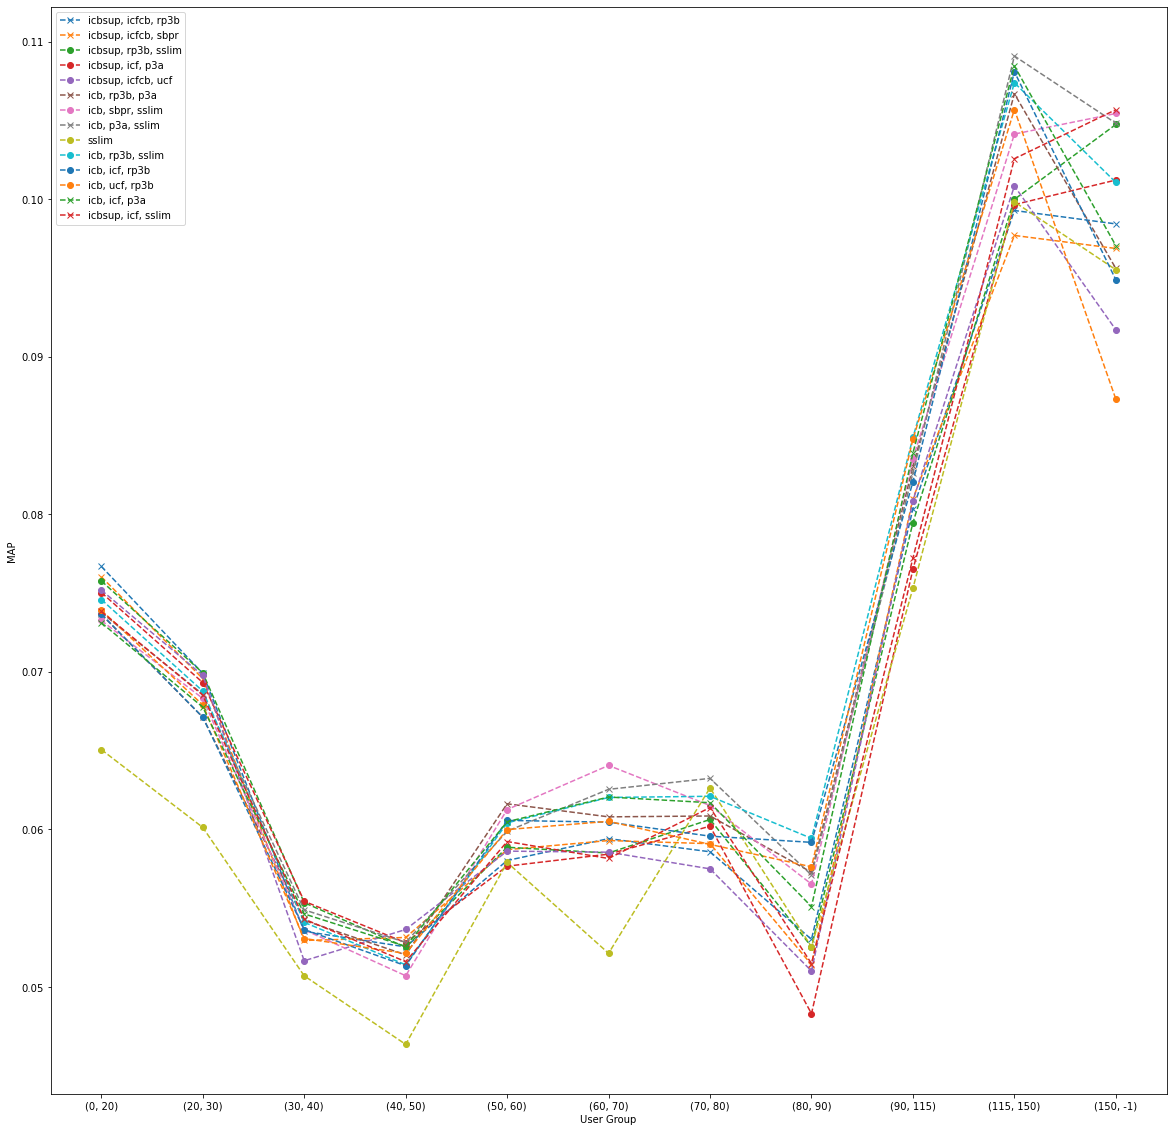

In [13]:
import matplotlib.pyplot as pyplot
%matplotlib inline  
pyplot.figure(figsize=(20,20))
for key, isCombo in to_be_plotted:
    l=[]
    if isCombo:
        for combo_dict in MAP_combo_per_group:
            l.append(combo_dict[key])
        if random.random() > 0.5:
            style = '--o'
        else:
            style = '--x'
        label = combo_labels['combo'+str(key+1)]
    """
    else:
        for merged_dict in MAP_merged_per_group:
            l.append(merged_dict[key])
        style = '--x'
        label = merged_labels[key]
        """
    pyplot.plot(l, style, label = label)

pyplot.xticks(ticks=range(0,len(f_ranges)), labels=f_ranges)
pyplot.ylabel('MAP')
pyplot.xlabel('User Group')
pyplot.legend()
pyplot.show()

In [ ]:
f_ranges = [
    (0,20),
    (20,30),
    (30,40),
    (40,50),
    (50,60),
    (60,70),
    (70,80),
    (80,90),
    (90,115),
    (115,150),
    (150,-1)
]

MAP_combo_per_group = []
cutoff = 10

for f_range in f_ranges:
    
    
    combo_dict={}
    for k in range (num_combo):
        r = []
        for i in range (len(URM_list)):
            URM_test_group = parser.filter_URM_test_by_range(URM_list[i], URM_test_list[i], f_range)
            evaluator_test = EvaluatorHoldout(URM_test_group, cutoff_list=[cutoff])
            if not isinstance(list_rec[k][0], list):
                rec = list_rec[k][0]
                try:
                    rec = rec(URM_list[i], ICM_all, verbose = False)
                except:
                    rec = rec(URM_list[i], verbose=False)
                try:
                    rec.load_model(f'stored_recommenders/seed_{str(seed)}_hybrid_search3/{rec.RECOMMENDER_NAME}/', f'{str(seed)}_fold-{str(i)}')
                    print(f"{rec.RECOMMENDER_NAME} loaded. [seed={seed}, fold={i}]")
                except:
                    print(f"Fitting {rec.RECOMMENDER_NAME} ... [seed={seed}, fold={i}]")
                    rec.fit(**list_rec[k][1])
                    print(f"done.")
                    rec.save_model(f'stored_recommenders/seed_{str(seed)}_hybrid_search3/{rec.RECOMMENDER_NAME}/', f'{str(seed)}_fold-{str(i)}')
            else:
                rec = HybridCombinationSearchCV3(URM_list[i], ICM_all, list_rec[k][0], seed = seed, fold = i)
                rec.fit(**list_rec[k][1])

            results, _ = evaluator_test.evaluateRecommender(rec)
            r.append(results[cutoff]["MAP"])
        combo_dict[k]=np.average(r)

    MAP_combo_per_group.append(combo_dict)

to_be_plotted = []
for i in range(0, len (f_ranges)):
    print(f"RANGE {f_ranges[i]}")
    maxp = 0
    difference = 0
    old_name = ''
    max_name=''
    max_isCombo=None
    old_isCombo=None
    max_key=None
    old_key=None
    old_maxp=0
    
    combo_dict = MAP_combo_per_group[i]
    for key, value in combo_dict.items():
        #value = combo_dict.get(key)
        print(f"> MAP combo-{combo_labels['combo'+str(key+1)]}:\t {value}")
        if value > maxp:
            difference=value - maxp
            maxp=value
            old_name=max_name
            old_isCombo=max_isCombo
            max_name=combo_labels['combo'+str(key+1)]
            max_isCombo=True
            old_key=max_key
            max_key=key
        elif value > old_maxp:
            difference=maxp - value
            old_maxp=value
            old_name=combo_labels['combo'+str(key+1)]
            old_key=key
           
    if not check_if_present(to_be_plotted, (max_key, max_isCombo)):
        to_be_plotted.append((max_key, max_isCombo))
    
    if not old_key is None and not check_if_present(to_be_plotted, (old_key, old_isCombo)):
        to_be_plotted.append((old_key, old_isCombo))
    
    
    print(f"Max MAP is {maxp} from {max_name}({'COMBO' if max_isCombo else 'MERGED'}) with difference from previous max of {difference} from {old_name}({'COMBO' if old_isCombo else 'MERGED'}) \n")
        

import matplotlib.pyplot as pyplot
%matplotlib inline  
pyplot.figure(figsize=(20,20))
for key, isCombo in to_be_plotted:
    l=[]
    if isCombo:
        for combo_dict in MAP_combo_per_group:
            l.append(combo_dict[key])
        if random.random() > 0.5:
            style = '--o'
        else:
            style = '--x'
        label = combo_labels['combo'+str(key+1)]
    """
    else:
        for merged_dict in MAP_merged_per_group:
            l.append(merged_dict[key])
        style = '--x'
        label = merged_labels[key]
        """
    pyplot.plot(l, style, label = label)

pyplot.xticks(ticks=range(0,len(f_ranges)), labels=f_ranges)
pyplot.ylabel('MAP')
pyplot.xlabel('User Group')
pyplot.legend()
pyplot.show()